## 실험을 위한 모듈 불러오기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and di

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font',family='Malgun Gothic')

In [5]:
!pip install selenium

     |████████████████████████████████| 968 kB 7.3 MB/s 
     |████████████████████████████████| 359 kB 79.7 MB/s 
     |████████████████████████████████| 138 kB 100.2 MB/s 
     |████████████████████████████████| 55 kB 5.6 MB/s 
     |████████████████████████████████| 3.6 MB 66.3 MB/s 
     |████████████████████████████████| 58 kB 7.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [8]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 7.9 MB/s 
     |████████████████████████████████| 448 kB 49.2 MB/s 


In [9]:
import os
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [10]:
import pandas as pd
import numpy as np
import time
from selenium import webdriver

In [11]:
!apt-get update
!apt install chromium-chromedriver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/u

In [12]:
!pip install konlpy 
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

import requests # http 불러오기
import pandas as pd
from bs4 import BeautifulSoup # 파이썬 크롤링

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## 크롤링 진행

In [13]:
date_list = []
for i in range(1,29):
  if 9<i<29:
    date_list.append(f'202202{i}')
  else:
    date_list.append(f'2022030{i}')

In [14]:
news_title_url ='https://news.naver.com/main/ranking/popularDay.naver?date={}'.format(date_list[2])
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req_news = requests.get(news_title_url, headers = headers)
soup = BeautifulSoup(req_news.text, 'html.parser')
news_titles = soup.select('.rankingnews_list > li > div > a')#['href']
#news_titles[1]['href']

In [15]:
data = pd.DataFrame(data=[], columns=(['기사내용']))

In [16]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') 
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [17]:
def collector(driver, data, link):
    driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
    url = link
    #soup = BeautifulSoup(req_news.text, 'html.parser')


    driver.get(url)
    time.sleep(2) # 2초간 멈추기 
    
    #해당 프레임으로 이동
    names = driver.find_elements_by_xpath('/html/body/div/div[2]/div/div[1]/div[1]/div[2]/div[1]/div') # 각각 XPath 의 정보
    print(names)
    for i in range(len(names)):
        temp = []
          
          #요소를 추가하는 코드
          
          #temp.append(num)
        try:
            temp.append(names[i].text)
            print(temp)
              #temp.append(user_ids[i].text)
              
            temp = pd.DataFrame(data=[temp], columns=data.columns)
              
              #여러 범위 또는 문자열의 텍스트를 결합
            data = pd.concat([data,temp])
        except : pass
    driver.close()
    
    return data

In [20]:
date_list = []
for i in range(1,29):
  if 9<i<29:
    date_list.append(f'202202{i}')
  else:
    date_list.append(f'2022030{i}')
for i in date_list:
  news_title_url ='https://news.naver.com/main/ranking/popularDay.naver?date={}'.format(i)
  headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
  req_news = requests.get(news_title_url, headers = headers)
  soup = BeautifulSoup(req_news.text, 'html.parser')
  news_titles = soup.select('.rankingnews_list > li > div > a')#['href']
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless') 
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
  driver.get('https://news.naver.com/main/ranking/popularDay.naver?date={}'.format(i)) # url 이 달라질 때 마다 드라이버 초기화
  multi_title = []
  try : 
    for j in range(15):
      multi_title.append(news_titles[j]['href'])
    for k in range(len(multi_title)):
      data = collector(driver,data,multi_title[k])
  except: pass


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cf11d37f9233f5c56cbbc181fb2a7ff6", element="843a84c5-16be-44a5-ae12-4dc14c71c9f0")>]
['[본지·정당학회, 2050 표심이동 분석]\n한달새 안 지지자 중 33% 마음 바꿔\n심상정 지지 14%는 이, 12%는 윤으로\n20대 남성 중 이→윤 이동 많고\n30대 여성 선 윤→안·이 변경 많아\n25일 오후 서울 마포구 상암동 SBS스튜디오에서 열린 중앙선거방송토론위원회 주관 제20대 대통령선거 후보 초청 2차 법정 TV 토론회에서 대선 후보들이 토론을 준비하고 있다. 왼쪽부터 기호순서대로 더불어민주당 이재명, 국민의힘 윤석열, 정의당 심상정, 국민의당 안철수 대선후보. [뉴스1]\n\n지난 한 달 사이 이재명 더불어민주당, 윤석열 국민의힘 후보 지지자 10명 중 8명 이상은 동일 후보를 계속 지지했다. 이에 비해 안철수 국민의당, 심상정 정의당 후보 지지자들은 3명, 5명 꼴로 다른 후보로 갈아탔다. 특히 안 후보에서 이탈한 이들은 2대 1의 비율로 윤 후보, 이 후보에게 옮겨갔다.\n\n중앙일보와 한국정당학회(회장 윤광일 숙명여대 교수)가 여론조사 기관인 에스티아이에 의뢰해 17~24일 전국 만 18세 이상 59세 이하 남녀 1752명을 대상으로 실시한 2차 패널 조사 결과다. 1월 19~25일 실시했던 1차 조사에 참여했던 2100명의 83.4%가 이번 조사에 응했다.\n\n이재명 후보(1차 38.7%→2차 36.9%)와 윤석열 후보(22.6%→28.3%)의 경우 1·2차 조사에서 지지를 유지한 응답자가 각각 82.5%, 87.5%였다. 상대 후보로의 이탈은 5%(이 후보→윤 후보), 3.1%(윤 후보→이 후보)로 낮았다. 김준석 동국대 교수는 “당선가능성을 감안한 결집 현상으로 보인다"며 “다만 2030 집단이 스윙보터로서 크게 작용하는 현상이 일관되게 나타난다”고 분석했다.\n\n한

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="3695fd634e967a03581c6c69e0d940ba", element="c717a379-4f6a-4055-84d0-49ce27ccb843")>]
["2022학년도 대학수학능력시험(수능)을 하루 앞둔 지난해 11월 17일 오후 서울 송파구 잠실고등학교에서 방역업체 관계자들이 코로나19 예방을 위해 시험실을 소독하고 있다. [사진공동취재단]\n\n\n대표 소독제 염화벤잘코늄의 위험성\n\n\n코로나19 소독제로 흔히 쓰이는 염화벤잘코늄의 용법과 용량을 제대로 지키지 않으면 가습기 살균제 당시와 같은 폐질환을 일으킬 수 있다는 연구가 나왔다. 경희대는 박은정 의과대 교수 연구팀이 4가 암모늄계 계열 살균ㆍ소독제의 대표적 물질인 염화벤잘코늄의 호흡기 독성을 연구한 결과, 해당 물질에 반복적으로 노출되면 폐 염증과 폐 조직 손상 등을 일으킬 수 있다는 결론을 얻었다고 1일 밝혔다. 연구 결과를 국제학술지 톡시콜로지 앤 어플라이드 파마콜로지 온라인판에 게재됐다.\n\n염화벤잘코늄은 손소독제ㆍ코세정제ㆍ점안제ㆍ방부제ㆍ보존제ㆍ항균티슈ㆍ바닥청소제 등의 생활용품과 수술용 도구 소독제, 피부질환 치료제 등 의약용품으로 광범위하게 사용되는 살균ㆍ소독 성분이다. 일부 가습기 살균제 제품과 항공방제용 소독제 등에도 활용된 것으로 알려져 있다. 가습기 살균제 이후에도 그 호흡기 독성에 관한 문제가 지속해서 제기됐지만, 그동안 왜 문제가 되는지에 대한 정확한 원인과 과정이 밝혀지지 않았다. 이번 연구는 박 교수가 그간 진행해온 살균ㆍ소독제의 위험성을 재확인한 연구다. 염화벤잘코늄이 폐 건강을 손상시키는 과정과 함께 폐 건강을 지키기 위해 허용 가능한 최대 노출량을 제시하고자 했다고 박 교수는 밝혔다.\n2020년 2월 서울 경복궁역 메트로미술관에서 가습기살균제 피해자 가족 및 참석자들이 가습기살균제 참사 희생자를 기리는 퍼포먼스를 하고 있다. 촛불로 수놓은 '1528'은 피해 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2420566bf53980fcd16e6077190a21ab", element="edeb5099-c521-406f-828e-89d61614bbb8")>]
['국내 아파트 최고가 분양 기록\n고급 빌라, 리모델링 아파트\n딱 29가구만 분양하는 이유\n송파 성지 아파트 조감도. ［사진 포스코건설］\n서울 송파구에서 3.3㎡당 분양가가 6000만 원대인 아파트가 처음 나온다. 역대 최고가 분양가를 기록한 서초구 반포동 ‘래미안 원베일리’(3.3㎡당 5273만원)’를 훌쩍 뛰어넘는 초고가 분양가다. 1일 정비업계에 따르면 송파구 송파동 성지아파트의 3.3㎡당 분양가가 6500만원으로 책정됐다. 두 동짜리 아파트로, 일반 분양할 가구 수는 딱 29가구다. 모두 전용면적 106㎡(40평대)로, 분양가가 25억원이 넘어설 전망이다. 인근 대단지인 헬리오시티 전용 110㎡가 지난해 7월 25억2000만원(14층)에 거래됐고, 현재 호가가 29억원인 것을 고려하면 시세를 웃도는 분양가가 책정됐다.\n\n1992년 준공된 성지 아파트는 국내 첫 수직증축 리모델링 단지다. 리모델링을 통해 최고층수는 15층에서 18층으로 높여지고, 가구 수는 298가구에서 327가구로 늘어난다. 이 단지는 당초 리모델링으로 42가구를 늘리려다가 29가구로 바꿨다. 현행법상 리모델링하면 가구 수를 15%까지 늘릴 수 있지만 오히려 일반분양 가구 수를 줄였다. 분양가상한제를 피하기 위해서다. 분양가상한제와 주택도시보증공사(HUG)의 고분양가 심사는 30가구 이상부터 적용된다. 29가구만 분양할 경우 분양가나 청약 규제를 받지 않는다. 전매제한도 없고, 청약통장 유무 및 주택 소유 여부 등과 관계없이 청약할 수 있다.\n\n\n\n아이유 빌라도 29가구\n\n이에 따라 리모델링 아파트나 고급 빌라 등에서 ‘29가구 분양’이 늘어나고 있다. 가수 아이유가 지난해 130억원에 분양받아 화제가 된 강남

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d8e95b92a8474f937cfc0500b05ba2cf", element="8ecc8a77-6e59-4586-a0ac-733b8a092697")>]
['응급구조사로 근무하는 직원의 업무 처리가 마음에 들지 않는다는 이유로 12시간 동안 가혹하게 폭행해 숨지게 한 응급환자 이송업체 대표에게 징역 18년형이 확정됐다.\n\n대법원 2부(주심 조재연 대법관)는 살인과 근로기준법 위반 등의 혐의로 기소된 경상남도 김해시의 한 응급환자 이송업체 대표 A(45)씨에게 징역 18년을 선고하고, 10년간 위치추적 전자장치 부착을 명령한 원심을 확정했다고 29일 밝혔다.\n\nA씨는 2020년 12월 24일 피해 직원이 사설구급차를 운전하다가 교통사고를 일으키고도 조치를 제대로 하지 않았다는 이유로 회사 사무실에서 폭행하기 시작했다. A씨는 그날 오후 1시30분 경부터 오후 6시 30분까지 발로 피해자의 허벅지, 배, 가슴 부위를 차고 주먹과 손바닥으로 얼굴과 몸, 다리 부위를 수회 때렸다. 피해 직원이 바닥에 넘어졌지만 폭행은 이어졌다. 피해자에게 ‘열중쉬어’ 자세를 취하도록 한 다음 욕설을 하면서 발로 허벅지와 종아리 부위를 차기도 했다.\n\n그날 오후 7시가 되자 A씨는 피해 직원에게 “집에 가자”고 하면서 걸어보라고 했지만 피해자가 잘 걷지 못하자 “또 연기하네, 오늘 집에 못 가겠네”라고 말하며 다시 폭행을 시작했다. 폭행은 다음 날 새벽 1시까지 이어졌으며, 그 사이 A씨는 치킨을 시켜먹기도 했다.\n\n피해 직원은 갈비뼈 골절, 경막하 출혈 등 외상성 쇼크 상태에 빠져 생명이 위험한 상태가 됐다. A씨는 이런 상태를 인식했지만, 어떤 구호 조치도 하지 않고 피해자를 난방도 되지 않는 차가운 사무실 바닥에 방치했다. A씨는 그리고 아내와 함께 숙직실로 들어가 약 7시간 동안 잠을 잤다.\n\n다음 날 아침 8시30분경 피해자가 신음소리만 내면서 제대로 대

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b2879cfdc5ffa45df12ed15e3c58c63c", element="3a7aa45d-a5f4-42f5-a868-e96db8442b9e")>]
['젤렌스키, 러시아군 전술 비판 연설\n獨 통역사 눈물 \'왈칵\'\n볼로디미르 젤렌스키 우크라이나 대통령이 26일(현지시간) 수도 키예프에서 러시아의 침공과 관련한 대국민 브리핑을 하고 있다. [이미지출처=연합뉴스]\n\n\n볼로디미르 젤렌스키 우크라이나 대통령의 연설을 전달하던 독일 통역사가 생방송 도중 눈물을 흘려 방송이 중단되는 일이 발생했다.\n\n독일 매체 벨트는 27일(현지시각) 젤렌스키 대통령이 사회관계망서비스(SNS)에 공개한 3분20초의 대국민 연설을 보도했다.\n\n영상 속 젤렌스키 대통령은 발전소, 유치원, 병원 등 민간시설을 파괴하고 대량학살 조짐을 보이는 러시아군의 파괴적 전술에 대해 비판했다. 그는 "지난밤 우크라이나에서의 총격은 잔인했다"며 "러시아가 또다시 주택가와 민간 시설물에 대한 폭격을 가했다"고 지적했다.\n\n이날 뉴스에서 젤렌스키 대통령의 연설을 독일어로 전달하던 여성 동시 통역가는 울먹이기 시작하며 목이 멘 듯한 모습이었다. 그는 "러시아는 악의 길을 걷고 있다"며 "러시아는 UN에서 의결권을 박탈당해야 한다"고 전했다.\n\n젤렌스키 대통령이 러시아에 투쟁하겠다는 의지를 밝히자 통역가는 말을 잇지 못할 정도로 흐느끼기 시작했다. 통역가는 "우크라이나는 확실히 알고 있다"며 잠시 말을 멈췄다. 이어 "죄송하다"며 통역을 중단했다. 젤렌스키 대통령의 영상을 송출하던 뉴스 화면도 앵커의 모습으로 전환됐다.\n\n한편 러시아의 우크라이나 침공 4일째인 27일(현지시간) 우크라이나 내무부는 이날까지 352명이 사망했고 1684명의 부상했다고 밝혔다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="762f28eabc97029e08ea26e43dd0b141", element="963a856f-a74b-402d-a6d2-deea40cd1edd")>]
['서방권 강력 제재에 대응책 마련 부심하는 푸틴 (모스크바 AFP=연합뉴스) 블라디미르 푸틴 러시아 대통령이 24일(현지시간) 재계 지도자들과의 회의를 주재하기 위해 크렘린궁 내의 회의장으로 걸어가고 있다. 그는 우크라이나 침공에 따른 서방권 제재 대응 방안을 논의한 이 자리에서 러시아가 세계 경제 체제의 일원으로 남길 원하고 세계 경제에 해를 끼칠 생각도 없다고 주장했다. 앞서 미국을 주축으로 한 서방권은 러시아의 우크라이나 침공에 맞서 강력한 제재 계획을 발표했다. 2022.2.25 alo95@yna.co.kr (끝) ＜저작권자(c) 연합뉴스, 무단 전재-재배포 금지＞\n\n\n우크라이나를 둘러싼 군사적 긴장감이 최고조로 치닫는 가운데 중국 주재 러시아대사관이 강도 높은 경고 성명을 발표했다.\n\n주중 러시아대사관은 28일 웨이보(중국판 트위터) 계정에 올린 성명에서 "블라디미르 푸틴 대통령이 연설에서 밝힌 바와 같이 우리는 러시아 군사 행동에 개입할 것을 고려하거나 무력으로 러시아를 위협할 것을 고려하는 측에 경고한다"고 밝혔다. 이어 "간섭하지 말라"면서 "그렇지 않으면 곧 당신들은 역사상 가장 비참한 후과를 보게 될 것"이라고 덧붙였다.\n\n협상 장소 변경 제의하는 우크라 대통령 (키예프 AFP=연합뉴스) 볼로디미르 젤렌스키 우크라이나 대통령이 27일(현지시간) 수도 키예프에서 동영상을 통한 연설을 하고 있다. 젤렌스키 대통령은 러시아와의 협상할 용의는 있으나 벨라루스에서 협상하는 것을 거부했다. 그 대신 폴란드나 슬로바키아, 헝가리, 터키, 아제르바이잔에서 협상할 것을 제의했다. 2022.2.27 jsmoon@yna.co.kr (끝) ＜저작권자(c) 연합뉴스, 무단 전재-재배포 금지＞\n\

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="dcfce2edda1a548e178741b9827da27c", element="135def69-65fe-42a2-891c-caaa7258f0af")>]
['서울 서대문구 독립공원에 마련된 선별검사소에서 시민들이 검사를 받고 있다. [이미지출처=연합뉴스]\n\n\n코로나19 사망자가 폭증하며 연일 110명대를 기록했다. 정부는 오미크론 변이를 계절 독감에 빗대어 관리 가능한 수준이라고 강조했지만, 전문가들은 아직 풍토병을 거론하기엔 위험한 질병이라고 경고했다.\n\n1일 중앙방역대책본부에 따르면 이날 0시 기준 코로나19 사망자는 112명을 기록했다. 역대 최다 기록을 세운 전날(114명)보다 2명 줄었다.\n\n이날까지 누적 사망자는 8170명으로, 최근 한 달간 1492명이 코로나19로 숨졌다. 일주일간 662명이 사망했고 하루 평균 94.6명이 목숨을 잃었다. 누적 치명률은 0.25%로 전날(0.26%)보다 0.1%포인트 감소했다.\n\n사망자 연령대는 80세 이상이 69명으로 가장 많았고 이어 70대(24명), 60대(8명), 50대(5명) 순이다.\n\n최근 2주간(2월16일~3월1일) 사망 추이는 \'39→36→45→71→51→45→58→99→82→94→112→49→114→112명\' 흐름을 보였다. 1주일간 100명대 사망자가 세 번 발생했다.\n\n사망자와 더불어 위중증 환자도 늘어나고 있다. 이날 기준 병원에서 치료를 받고 있는 위중증 환자는 727명으로 전날(715명)보다 12명 증가했다. 지난달 14일 300명대에 진입한 이후 빠른 속도로 증가해 전날부터 700명대를 기록 중이다.\n\n최근 급격히 불어난 신규 확진자의 영향으로 위중증 환자와 사망자 수가 급증한 것으로 보인다. 문제는 확진자 증가가 이어지며 피해가 더 커질 수 있다는 점이다.\n\n방역당국은 이날 국내외 연구진의 최근 예측을 종합해 "3월9일 일일 확진자 23만명 이상 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="36d68e1ebf62511e029b71d6b0cb7f1f", element="3a33ab6f-331b-40ba-a4de-015905dd2638")>]
['"오래 놔두면 상할까봐"… 법정까지 서게 된 사연\n\n\n지난해 7월1일 저녁. 서울 강남구의 한 오피스텔에 거주 중인 A씨(49·여)가 집 앞에 놓인 택배 박스를 발견했다. 김치 600g과 마스크팩 6개가 들어 있었다. 앞서 그 집에 살았던 B씨(24·여) 앞으로 온 택배였다. B씨의 어머니가 주소지를 착각한 탓이었다.\n\nB씨는 A씨의 집으로 택배가 갈 것이란 점을 알고 있었다. 당일 오전 택배기사가 "A씨 집 주소로 아이스박스 택배 배달 의뢰가 있다. 현 주소지를 보내주면 다음 날 도착할 것이다"라고 문자를 보냈고, B씨는 "A씨 집 앞에 놔두면 가지러 가겠다"고 답장한 상황이었다. 택배기사는 오전 11시55분쯤 \'배송 완료\' 문자를 보냈다.\n\n이를 모르던 A씨는 난감했다. 그는 다음날 해외로 출국할 예정이었다. 택배 송장의 \'받는 사람\'란에 기재된 B씨의 이름과 전화번호도 일부가 \'별표\'(*)로 처리돼 연락이 안됐다. A씨는 그릇들에 김치를 소분해 냉장고에 넣어뒀다.\n\n피해자 측 찾아왔지만 일부만 돌려줘\n\n\nB씨는 저녁 7시가 넘어 A씨의 집에 도착했고, 초인종을 눌러 택배에 관해 물었다. A씨는 "상할까봐 냉장고에 넣어뒀다"며 김치통 하나를 줬다.\n\nB씨는 집에 돌아와 어머니와 통화하던 중 김치 일부와 마스크팩을 받지 못했단 점을 깨달았다. B씨가 다시 찾아가 항의했고, A씨는 마스크팩은 돌려주면서도 김치를 전부 돌려주진 않았다.\n\nB씨의 신고로 A씨는 수사를 받게 됐다. A씨는 수사기관에 "개인 업무 중이라 (처음부터) 마스크팩을 주는 것을 잊었다. 일부 김치는 남의 그릇에 담겨 있어 (바로) 돌려주지 못했다"는 취지로 해명했다. 또한 "당일은 택배 주인이 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="345ffadb51e87cf9b1f2e09726553611", element="3b811395-d13d-4176-8c43-45f2473b7240")>]
['윤석열 때 287명, 이재명 때 300명 최종합격\n사법시험 합격자 1000명 넘어선 건 2004년부터\n지난해 10월 21일 한동훈 검사장의 명예를 훼손한 혐의로 기소된 유시민 전 노무현재단 이사장이 서울 마포구 서울서부지방법원에서 열린 첫 공판에 출석하며 취재진의 질문에 답변하고 있다. /문호남 기자 munonam@\n\n\n제20대 대통령선거를 10여일 앞두고 TV에 출연해 윤석열 국민의힘 대선후보에 대한 허위사실을 유포한 혐의로 유시민 전 노무현재단 이사장이 고발됐다.\n\n그는 이재명 더불어민주당 대선후보는 사법시험 합격자가 300명일 때 합격했고, 윤 후보는 합격자가 1000명일 때 합격했다며 "일반 지능에서 큰 차이가 있다"고 발언했는데, 사실은 두 사람 모두 사법시험 합격자가 약 300명인 시절 합격했고, 오히려 실제 최종 합격자 수는 윤 후보가 합격했을 때가 더 적었다.\n\n시민단체 법치주의 바로 세우기 행동연대(대표 이종배)는 1일 공직선거법상 허위사실공표 및 정보통신망법상 허위사실 적시에 의한 명예훼손 혐의로 유 전 이사장을 서울중앙지검에 고발했다.\n\n이 대표는 "피고발인 유시민 전 노무현재단 이사장은 2022년 2월 24일 MBC \'뉴스외전\'에 출연해 \'강점은 머리가 좋은 거다. 윤 후보는 1000명 뽑을 때 9번 만에 된 분이고, 이 후보는 300명 뽑을 때 두 번 만에 됐다. 거기에서 일단 큰 차이가 있다\'고 주장했다. 또 피고발인은 윤 후보에 대해 \'지적으로 뛰어난 것 같지도 않다\'고 주장했다"고 했다.\n\n이어 "하지만 윤석열 후보자가 최종 합격했던 1991년 제33회 사법시험 당시 선발인원은 이재명 후보자와 마찬가지로 300여명을 선발했다"며 "따라서 \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ef0249b0cd299bd2e85d6a12dc2324d9", element="60bc29f5-1992-4ed8-8f4a-61fc2172bfdb")>]
['국민의힘 홍준표 의원의 당내 경선캠프 인사들이 더불어민주당 이재명 후보를 지지한다고 선언했습니다.\n\n홍 의원의 당내 경선 당시 청년 특보였던 김영재 씨 등은 오늘 민주당사 앞에서 기자회견을 열고 이 후보를 "박정희의 추진력을 가진, 결기 있는 언행은 홍준표와도 닮은꼴" 이라고 표현하며 지지 의사를 밝혔습니다.\n\n이들은 "진영을 뛰어넘어 하나 된 대한민국을 만들 젊고, 유능하고, 위기에 강한 이재명 후보가 우리의 선택"이라고 말했습니다.\n\n또 국민의힘 경선 당시 신천지 개입 의혹과 관련해 "신천지 세력에게 빼앗긴 우리의 자리를 되찾을 수는 없게 됐다"며 관련 의혹에 무게를 실었습니다.\n\n그러면서 윤 후보를 가리켜 "정권교체라는 미명으로 검찰 세력이 나라를 찬탈하려고 세운 후보"라며 이를 저지하겠다고 했습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="654f5b9a0d86b9d6bc03ea373f3d621d", element="06c01e12-8ba1-4ab3-95e2-7fd8402319c8")>]
['1일 저녁 부산 수영구 광안리해수욕장에서 드론 1천 대가 우크라이나 국기를 표현하고 있다.\n\n3.1절이었던 어젯밤 부산 광안리해수욕장에 갑자기 1천 대의 드론이 날아올랐습니다. 사전 예고가 없었던 갑작스러운 드론의 등장에 지나가던 시민들이 발길을 멈췄던 건 물론 도로에는 멈춰선 차들로 잠시 정체가 빚어지기도 했습니다.\n\n반짝반짝 불빛을 밝히며 일제히 뜬 1,000대의 드론에 사람들이 "와"하며 탄성을 내뱉은 것도 잠시. 춤을 추듯 비행하던 드론이 하늘 위에서 나란히 직사각형을 만들더니 파란색과 노란색으로 색을 나누어 빛을 내기 시작했습니다.\n\n푸른 하늘과 광활한 밀밭을 상징한다는 우크라이나 국기입니다. 지켜보던 시민들의 박수가 쏟아졌습니다. 대한민국 부산 밤하늘에 드론으로 초대형 우크라이나 국기가 반짝인 순간입니다.\n\n행사를 준비한 수영구 관계자는 "러시아의 침공에 맞서고 있는 우크라이나를 응원하고 반전을 촉구하기 위해 준비한 것"이라고 설명했습니다.\n\n원래 이날 행사는 3.1절에 맞춰 태극기를 만드는 \'드론 쇼\'로 기획됐습니다. 코로나19 감염을 막기 위해 시민들에게 행사 내용도 사전에 공지하지 않았죠.\n\n하지만 러시아의 침공 소식에 태극기만이 아니라 우크라이나 국기를 추가하도록 행사 방향을 수정했습니다.\n\n수영구 관계자는 "원래는 ‘No War’(전쟁 반대) 문구도 추가하려 했으나 기존에 짜진 프로그램에 급하게 추가를 하다 보니 기술적으로 글자를 표현하는 것까지는 어려웠다"고 아쉬움을 토로했습니다.\n\n부경대학교 총학생회 등은 2일 학내에서 러시아의 우크라이나 침공을 규탄하고 반전을 촉구하는 기자회견을 열었다.\n\n전날 깜짝 드론 쇼에 이어 오늘(2일)은 부산 지역 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="5a9903d2596aa4dd47d632955b0a1ce3", element="dab9180a-41c4-428a-b8c6-f99c64951506")>]
['"경찰의 체력은 국민의 안전입니다. 건강하고 행복한 삶을 위해 \' 경찰 체력단련장\'이 있습니다". 명칭만 보면 운동 기구가 즐비한 체육관이 떠오르지만, 이곳은 너른 잔디밭이 펼쳐진 \' 경찰 골프장\'이다. 경찰 공무원의 복지와 체력 증진을 위해 경기 용인에 286,214㎡, 충남 아산에 400,000㎡ 규모로 두 곳이 있다. 각각 9개 홀과 클럽하우스, 연습장, 라운딩 중 휴식을 위한 그늘집을 갖추고 있다.\n\n■이용료가 단돈 2만 원 … \'경찰 골프장\'\n\n이용 요금(그린피)은 매우 저렴하다. 현직 경찰 공무원과 배우자는 1인당 평일과 휴일 구분 없이 2만 원, 20년 이상 근속한 퇴직자는 3만원이다. 일반 골프장과 비교하면 10분의 1 수준이다. (2022년 1월 한국소비자원 조사 결과, 회원제 골프장 주말 평균 1인 이용료는 약 24만 원, 대중제 골프장 주말 평균 1인 이용료는 약 19만 원이다.) 골프장이 위치한 경기 용인시와 충남 아산시 주민들은 매주 화요일과 수요일 제한적으로 예약할 수 있고 이용료는 6만 원이다. (주말은 경찰 공무원과 동반해야만 이용할 수 있고 이용료는 9만 원이다.)\n\n이렇게 저렴한 이용료가 가능한 이유가 있다. 골프장 관리와 운영을 경찰공무원들이 직접 하는 데다, 공무원 인건비를 빼고도 한 해 많게는 10억 원이 넘는 운영 적자가 나도 세금으로 보전되기 때문이다.\n\n경찰 체력단련장은 저렴한 가격에 골프 인기가 점점 높아지면서 예약 경쟁이 매우 치열하다. 특히 주말이 심한데 2020년 11월 7일 토요일의 경우 총 33개 시간대에 275개 팀이 지원했다. 경쟁률이 8 : 1이 넘었다.\n\n예약 배정은 경찰청 훈령에 근거해 엄정하게 이뤄진다. 기본적

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="361c1fbfd8629ed77ef6e561510ec325", element="eff525f9-fa70-4384-850e-756bb3aa44bc")>]
['“영웅에 대한 기억 간직하겠다”\n자택 폭격·키예프 교전 중 숨져\n드미트로 마르티넨코(25)와 비탈리 사필로(21)\n러시아의 우크라이나 침공 엿새째인 2일(한국시간) 러시아군은 우크라이나 동부 도시 하리코프와 수도 키예프, 남부 도시 헤르손 등을 중심으로 공격을 계속하고 있다. 우크라이나의 완강한 저항으로 주요 도시 가운데 한 곳도 확실히 점령하지 못한 가운데 러시아군은 민간인 주거지도 가리지 않고 무차별 포격과 폭격에 나서고 있다.\n\n축구계에서도 희생자가 나왔다. 국제축구선수협회(FIFPro)는 이날 공식 트위터 계정을 통해 우크라이나 축구 선수 2명의 사망 소식을 전했다. FIFPro는 “러시아의 우크라이나 침공으로 인한 축구계의 첫 번째 희생”이라며 “젊은 우크라이나 축구선수 드미트로 마르티넨코(25)와 비탈리 사필로(21)의 가족, 친구, 팀 동료들에게 애도를 표한다”고 밝혔다.\n\n지역 클럽 FC 호스토멜에서 뛰는 아마추어 선수 마르티넨코는 어머니와 함께 키예프 인근 자택에서 러시아군의 폭격에 목숨을 잃었다.\n\n우크라이나 구단 카르파티 리비프의 유스팀 출신인 사필로는 전차 승무원으로  입대했다가 지난달 25일 수도 키예프 근교에서 러시아군과 교전 중 숨진 것으로 알려졌다. 리비프 구단은 “영웅에 대한 기억을 영원히 간직하겠다”며 고인을 추모했다.\n지난해 10월 잉글랜드와 안도라의 월드컵 유럽예선 경기 부심을 맡았던 마르냐 스틸레스카(왼쪽). 영국 미러 캡처\n러시아의 침공 닷새째인 28일(현지시간) 우크라이나 수도 키예프에서 총탄에 맞아 파손된 차량 유리창 밖으로 구급차가 지나가는 모습이 보인다. 키예프 로이터 연합뉴스\n폐허로 변한 우크라이나 시내\n전쟁터에 놓인 여성심판 절규

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="91a358f392a11bc342c2aa31523cbfba", element="1e9cf8a6-a09e-4f24-a506-ed6a8d76d1b8")>]
['미국 등 서구세계 경제 제재로 루블화 가치 폭락\n수입 물가 폭등으로 러시아 ‘보통 사람들’ 피해\n푸틴의 ‘그릇된 판단’에 러 전체 혹독한 대가\n미국과 유럽의 대러 제재가 시작된 직후인 28일(현지시간) 러시아 수도 모스크바에서 시민들이 환전소 앞을 지나가고 있다. 현재 러시아 전역에서 달러 사재기 현상이 벌어지고 있다. 모스크바 AP 연합뉴스\n미국과 유럽 주요국, 캐나다, 일본이 지난 주말 러시아 주요 은행을 국제은행간통신협회(SWIFT·스위프트) 결제망에서 차단한 데 이어 미 재무부도 28일(현지시간) 러시아 중앙은행·국부펀드·재무부와의 거래를 차단하는 ‘핵폭탄’ 제재를 추가하면서 러시아 경제에 ‘쓰나미’가 들이닥쳤다. 루블화 가치가 사상 최저치로 떨어지자 러시아인들은 달러와 비트코인을 쟁여 두려고 동분서주했다. 수입 물가도 폭등해 서민들이 불안에 떨고 있다. 블라디미르 푸틴 대통령의 잘못된 판단으로 러시아 전체가 혹독한 대가를 치르게 됐다.\n\n이날 AP·AFP통신 등에 따르면 미국이 러시아 제재를 발표한 지난 주말 이후 러시아 전역의 은행 자동화기기(ATM)에는 현금을 찾으려는 뱅크런(대규모 예금 인출 사태) 인파가 몰렸다. 모스크바 시민 안톤 자하로프(45)는 “우리는 1990년에도 국가 부도 사태로 인한 대재앙을 겪은 적이 있어 정부에 대한 신뢰가 없다”고 말했다. 스베틀라나 파라모노바(58)도 “무슨 일이 일어날지 알 수 없다. 일단 현금을 찾아 집에 보관하는 것이 더 안전하다”고 토로했다.\n\n달러 사재기 수요도 폭증해 환전소마다 외화를 인출하려는 이들로 넘쳐났다. 달러가 소진되자 러시아 최대 국영은행인 스베르방크는 달러와 유로화를 거래하는 애플리케이션 서비스를 중단했다. BBC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="21d730922f92cb4a854fb3a06b00c987", element="bcccdcbf-5304-400e-8b69-f65198c4e38f")>]
['1일(현지시간) 스위스 제네바에서 열린 유엔 군축회의에서 세르게이 라브로프 러시아 외무장관이 화상을 통해 연설을 시작하자 세계 각국의 외교관들이 러시아의 우크라이나 침공에 대한 항의의 표시로 회의장을 줄지어 빠져나가고 있다. 2022.3.2 제네바 AP 연합뉴스\n우크라 사태 놓고 갈라진 남북\n유엔 총회서 치열한 논리 대결\n\n러시아의 우크라이나 침공 사태에 대해 남북이 유엔 특별총회에서 치열한 논리 대결을 펼쳤다. 한국은 러시아의 무력 침공을 규탄한 반면, 북한은 오히려 사태 책임을 미국에 돌렸다.\n\n남북은 1일(현지시간) 미국 뉴욕 유엔본부에서 열린 우크라이나 사태에 관한 유엔 긴급특별총회 2일차 회의에서 약 1시간 간격으로 연단에 올라 상반된 입장을 내놨다.\n\n조현 주유엔 한국대사는 “우크라이나에 대한 러시아의 무력 침공을 강하게 규탄한다”며 “한국은 유엔 안보리와 총회 결의안에 공동제안국으로 참여했다”고 밝혔다.\n\n상임이사국인 러시아의 거부권 행사로 무산된 안보리 결의안은 물론 2일쯤 표결 예정인 총회 결의안에도 참여한 사실을 전 세계에 강조한 것이다.\n\n조 대사는 “회원국의 주권, 독립, 영토보전을 심각하게 침해하는 어떠한 행동도 규탄한다”며 우크라이나의 주권, 독립, 영토보전을 존중하고 러시아군이 즉각 철수해야 한다고 목소리를 높였다.\n\n조 대사는 긴급특별총회 소집의 근거가 된 ‘평화를 위한 단결’ 결의가 1950년 한국전쟁을 계기로 마련됐다는 역사적 사실을 부각하며 우크라이나에 대한 연대의 뜻을 나타내기도 했다.\n\n조 대사는 “유엔 초창기에 한국은 유엔이 ‘평화를 위한 단결’ 결의에 따라 침공 행위에 대응해 지원한 첫 번째 나라였다”며 “우리나라는 유엔이 그 당시 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="62d98b0745d7b7cc4e7a27cb686b63c5", element="9135ad25-dc87-4343-b230-82ace8f63d92")>]
['일본 방위성 “러시아 소속 추정 헬기에 경고”\n일본 방위성. 연합뉴스DB\n일본 방위성은 2일 러시아 소속 추정 헬기 1대가 자국 영공을 침범했다고 밝혔다.\n\n방위성에 따르면 러시아 추정 헬기는 이날 오전 10시 23분쯤 홋카이도 네무로 반도 앞바다 일본 영공에 등장했다. 교도통신에 따르면 이 헬기는 일본 영공을 수십초 동안 침범해 머물렀다.\n\n이에 일본 항공자위대 전투기가 긴급 발진했고 영공에서 퇴거하라고 경고했다.\n\n일본 외무성은 “외교 경로를 통해 러시아 측에 영공 침범에 대해 엄중히 항의하고 재발 방지를 촉구했다”고 밝혔다.\n\n교도통신은 “우크라이나에 대한 군사 침공을 계속 중인 러시아가 아시아에서도 도발했을 가능성이 있다”고 전했다.\n\n앞서 일본은 일찍이 대(對)러시아 제재 정책을 발표했다.\n\n푸틴 러시아 대통령이 지난달 21일 우크라이나 친러시아 분리주의자들이 선포한 도네츠크인민공화국(DPR)·루간스크인민공화국(LPR) 독립을 승인하자 이틀 뒤 첫 제재를 발표한 것이다.\n\n러시아의 우크라이나 침공이 대만을 향한 중국의 무력 행사를 자극할 경우 일본 안보에 직접 영향을 끼칠 수 있다는 계산이 깔린 것으로 분석된다.\n\n실제 외신에선 중국이 러시아의 우크라이나 침공에 미국 등 국제사회가 대처하는 모습을 보면서 대만에 어떻게 대처할지 가늠하고 있다는 보도가 이어졌다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="5fc025edb769abd475d180ae2ff3c6db", element="57f002be-a490-4ac1-84f7-bb4e4807e22c")>]
['[서울신문 나우뉴스]\n우크라이나 방공호로 대피한 중국인들의 모습\n중국 정부가 우크라이나에 체류 중인 자국민의 육로 철수 시작을 알린 가운데 현지에 남은 중국인들 사이에 검문소를 통과할 때 일본인을 가장해 신변 안전을 보장받았다는 경험담이 공유됐다.\n\n중국 관영매체 인민일보는 지난 28일 1차로 중국인 유학생들이 버스 편으로 우크라이나 수도 키예프를 떠나 육로로 국경선을 넘었다고 보도했다. 당초 중국은 항공편으로 자국민을 철수시킬 계획이었으나 러시아 침공 사태가 악화되면서 교민 안전을 위해 육로 대피 이동령을 내렸다.\n\n키예프 시를 떠난 1차 중국인 유학생들은 우크라이나 국경선과 인접한 루마니아, 헝가리, 폴란드 등을 통해 중국 귀국을 앞두고 있는 상태다. 하지만 1차 대피 차량에 탑승하지 못한 상당수 중국인들이 현지에 체류 중이며, 이들 중 대부분은 중국인 신분을 감춘 채 우크라이나 내부에 악화된 반중 감정으로 인한 위협을 견뎌내고 있다고 현지 매체는 전했다.\n실제로 자신을 키예프 농업대학 재학생이라고 신분을 밝힌 한 중국인 유학생은 “외출할 때마다 어쩔 수 없이 중국인 신분을 감춘다”면서 “얼마 전 외출을 감행했다가 도로에서 검문 중인 무장한 우크라이나 군인을 마주쳤고, 그들이 내게 중국인이냐고 물었는데 나는 일본인이라고 답변하고 무사히 검문소를 빠져나왔다”고 주장했다.\n\n그는 자신이 운영하는 소셜네트워크서비스 트위터에 이 같은 경험담을 공유하고 “현지에 남아 있는 중국인들은 스스로를 중국인민이라고 칭할 수 조차 없는 상황”이라면서 “총에 맞아 죽고 싶지 않다면 이 방법 뿐”이라고 했다.\n\n이 같은 반중 감정 확산은 최근 중국 SNS를 통해 일부 중국 누리꾼들이 우크라이나 전쟁과 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="771c6cff10a9fdb3f6e651b6a92bec5d", element="d57671d7-d8a9-4d83-b2a5-d27aa2ce1fa4")>]
['현장 폐회로텔레비전 영상 확인\n들어갔다가 상반신부터 넘어져\n현대제철 중대재해법 적용 사업장\n2일 현대제철 노동자가 사고를 당한 당진제철소 도금 포트(금속을 녹이는 설비) 현장으로, 작업이 중단된 상태라 포트 안 금속이 굳어있는 것으로 보인다. 고인은 사진 오른쪽에서 작업하다 포트에 빠져 숨진 것으로 알려졌다. 전국금속노동조합 충남지부 제공.\n\n\n현대제철 당진제철소에서 도금작업에 투입됐던 노동자가 금속을 녹이는 설비(포트)에 빠져 숨졌다. 현대제철은 상시노동자수가 1만명이 넘어 ‘중대재해 처벌 등에 관한 법률’(중대재해법) 적용 사업장이다.\n\n2일 <한겨레> 취재를 종합하면, 2일 새벽 5시40분께 충남 당진 현대제철 냉연공장에서 노동자 ㅊ(58)씨가 도금 포트에 빠져 숨졌다. 도금 포트는 강판을 도금하기 위한 아연을 485℃의 온도로 녹여 액체로 만드는 설비인데, ㅊ씨는 포트 근처에 쪼그려 앉아 액체 상태의 금속 위로 떠오르는 찌꺼기(슬러지)를 길다란 도구로 걷어내는 작업을 하다 변을 당한 것으로 알려졌다. 사고 현장 사진을 보면, ㅊ씨가 작업하던 위치와 도금 포트 사이의 턱이 한 뼘도 채 되지 않을 정도로 좁아, 중심을 잃고 넘어지기 쉬운 것으로 보인다.\n\n도금 작업은 2019년 산업안전보건법이 전부개정될 당시 ‘도급’을 금지할 정도로 유해한 작업이다. 하청업체에 공정을 맡겨 ‘위험의 외주화’를 하지 말고, 설비를 운영하는 사업주가 공정을 직접 관리하며 안전을 확보하라는 것이 법 개정의 취지다. 이 법이 2020년 1월 시행되면서, 원래 사내하청업체에 도급을 줬던 현대제철은 ‘무기계약직’ 형태로 별도 채용해 해당 공정을 운영해왔다. ㅊ씨도 이 즈음 무기계약직으로 입사한 것으로 파악됐

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="9d648be1a46a91cf4c26d647bc326fe5", element="349ddc84-a981-48b7-a445-ab746106fe6b")>]
['TBS 라디오 “김건희가 관리하나” 질문에\n김재원 최고위원 “나중에…” 즉답 피해\n“누가 올렸든 우크라 저항 지지 의미”\n윤석열 국민의힘 대선 후보의 트위터 계정에 올라온 귤 사진. 현재는 삭제된 상태다. 트위터 갈무리\n\n\n윤석열 국민의힘 대선 후보가 사회관계망서비스(SNS)에 우크라이나를 지지하는 글과 함께 성난 얼굴이 그려진 귤 사진을 올려 논란이 불거진 것에 대해, 김재원 국민의힘 최고위원이 2일 “누가 올렸든 어떤 내용이든 우크라이나의 저항을 지지한다는 의미는 분명한 것”이라고 말했다.\n\n김 최고위원은 이날 <티비에스>(TBS) 라디오 ‘김어준의 뉴스공장’ 인터뷰에서 ‘캠프에서 이런 짓을 할 리가 없다’는 질문에 이처럼 답했다. ‘개사과’에 이어 ‘문제적’ 게시글들이 올라오는 윤 후보의 사회관계망서비스(SNS)를 윤 후보의 부인 김건희씨 쪽에서 직접 관리하고 있다는 의혹을 파고든 것이다.\n\n김재원 국민의힘 최고위원. 한겨레 자료사진\n\n\n김 최고위원은 “오렌지야, 오렌지 혁명을 지원하는 의미도 있을 수 있다”며 문제가 될 것이 없다는 태도를 보이면서도 ‘이 에스엔에스를 윤 후보의 선거 캠프가 아닌 윤 후보의 부인 김건희씨가 관리하는 게 아니냐’는 진행자 김어준씨의 거듭된 질문에는 계속 ‘알아보겠다’고 얼버무리며 답변을 피했다. 그는 김건희씨의 선거운동 등판 여부에 대해서도 “그것도 제가 알아보고 나중에 말씀드린다”고 답했다가, 김어준씨로부터 ‘곤란한 건 다 나중에 알아보는 거냐’는 핀잔을 받기도 했다.\n\n앞서 윤 후보는 전날 공식 트위터 계정에 “우리는 우크라이나와 함께 합니다(We stand with Ukraine)”라는 글과 함께 성난 얼굴을 그려넣은 귤 사진을 올렸

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="8009d72cc1c288d299c401d9898ce3c0", element="d2677cc3-97d6-45e1-afcf-df3d8ff88a87")>]
['권오수 전 회장 등 공소장 추가 분석\n김씨 모녀 ‘초 단위’ 통정매매 정황도\n“검찰 이미 파악하고도 왜 수사 미루나”\n\n윤 쪽 “검찰, 투자자는 기소하지 않아”\n모녀 거래는 “한건으로 시세 안 올라”\n‘공소장 오류’ 주장하다 단순투자 해명으로 선회\n윤석열 국민의힘 대선 후보 장모 최아무개씨. 연합뉴스\n윤석열 국민의힘 대선 후보의 부인 김건희씨뿐 아니라 장모 최아무개씨 증권계좌도 도이치모터스 주가조작에 수십차례 이용된 사실을 검찰이 지난해 이미 파악했던 것으로 확인됐다. 권오수(구속기소) 전 도이치모터스 회장이 최씨 소유 주식 수만주를 내놓자마자 김씨가 몇십초 만에 곧바로 사들이는 통정매매 의심 거래도 새로 드러났다. 모녀 증권계좌가 같은 시기에 주가조작에 이용됐다는 것인데, 윤 후보 쪽은 여전히 두 사람 모두 단순 투자자였을 뿐 주가조작에 관여하지 않았다는 입장이다. 주가조작 시점에 김씨가 도이치모터스 이사로 활동하는 등 단순 투자자 이상의 역할을 했다는 점에서, 검찰이 수개월째 직접 수사를 미루는 것에 대한 비판이 나온다.\n\n2일 <한겨레>가 국회에 제출된 권 전 회장 등 주가조작 가담자 공소장에 담긴 범죄일람표 등을 분석한 결과, 검찰은 2010년 9~11월 최씨 계좌를 통한 시세조종 혐의 37건을 확인했다. 수법으로는 통정거래(9건), 물량소진(13건), 고가매수(6건), 허수매수(7건), 종가관여(1건), 시가관여(1건) 등이다.\n\n검찰이 주가조작에 쓰였다고 판단한 최씨 명의 계좌는 2개다. 검찰은 △최씨가 권 전 회장에게 맡긴 계좌 △권 전 회장의 비정상적 매수 권유로 최씨가 직접 주식을 사는 데 이용한 계좌를 통해 각각 29건, 8건의 시세조종이 있었다고 판단했다. 구체

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="c49998ceb41d83b6df405989c654d9b3", element="1776301d-5c52-44e2-a815-f025232b2f27")>]
['박찬수의 직선 ㅣ스피드스케이팅 김보름 선수\n\n평창올림픽 뒤 그만둘까 생각했지만\n스케이트 못 탄다는 걸 견딜 수 없었다\n처음엔 빙판 보는 것도 너무 힘들어\n\n평창 은메달 땄지만 웃는 사진 한장 없어\n베이징에선 시상대 서서 맘껏 웃고 싶었다\n좀더 나은 상황에서 준비 못한 점 아쉬워\n\n이번 올림픽 마지막일 거라 생각했지만\n지금이 너무 좋아 다시 시작하고 싶어\n스케이트 타면서 가장 기뻤던 순간?\n나중에 은퇴할 때 꼽기 위해 남겨둘래요\n스피드스케이팅 국가대표 김보름 선수가 24일 오전 경기도 별내의 한 카페에서 지난 4년간의 심경과 앞으로의 포부 등을 이야기 하고 있다. 윤운식 선임기자 yws@hani.co.kr\n\n\n\n\n그날의 기억은 지금도 또렷하다. 평창 동계올림픽 여자 팀추월 8강전에서 한 선수가 뒤쳐진 채 두 선수만 빠르게 결승선을 통과하자 ’왕따 주행’ 논란이 일었다. 해프닝 같던 사안은 김보름 선수가 피식 웃는 듯한 표정을 짓고 방송사 중계진이 “절대 일어나선 안 될 일”이라고 말하면서 엄청난 국민적 비난을 받는 사건으로 떠올랐다. 김보름·박지우 두 선수의 국가대표 자격을 박탈해야 한다는 청와대 청원엔 순식간에 60만명 이상이 동참했다. 그 직후 메스스타트 종목에서 은메달을 딴 김보름은 눈물을 흘리며 빙판 위에서 큰절을 했지만, 들끓는 비난 여론을 잠재울 순 없었다. 4년 뒤 상황은 극적으로 달라졌다. 베이징 올림픽 기간인 2월16일 김보름이 노선영 선수를 상대로 낸 손해배상소송 1심에서 일부 승소하자 여론은 180도 바뀌었다. 메스스타트에서 5위를 한 뒤 김 선수는 취재진에게 “메달 땄을 때보다 지금이 더 행복하다”고 말했다. \n\n이 사건은 ’여론’이란 이름의 대

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="6471503e5e1724a9178a471353fbb36e", element="a6306ad3-828c-47cc-bec3-c6b98a391da8")>]
['리얼미터 조사서 ‘윤석열 책임론’ 고조되자\n국힘 “투표 전까지 단일화 여전히 열려있다”\n안철수엔 “완주땐 정권교체 주역 못돼” 비판\n결렬 책임 피하고 정권교체 여론 흡수 안간힘\n윤석열 국민의힘 대선 후보가 지난 1일 오후 서울 서대문구 현대백화점 신촌점 유플렉스 앞에서 열린 유세에서 지지를 호소하고 있다. 공동취재사진\n\n\n야권 후보 단일화 논의가 결렬된 데는 ‘윤석열 국민의힘 대선 후보의 책임이 더 크다’는 여론조사 결과가 2일 나왔다.\n\n국민의힘은 안철수 국민의당 대선 후보 측과의 접촉이 사실상 끊긴 상황 속에서도 ‘투표 전날까지 단일화를 위해 노력하겠다’는 말만 되풀이하고 있다. 단일화 무산에 따른 책임을 피하는 한편 정권교체 여론을 최대한 흡수하기 위한 의도로 풀이된다.\n\n여론조사기관 리얼미터가 <뉴시스> 의뢰로 2월 28일∼3월1일 이틀간 전국 18살 이상 1007명을 대상으로 ‘단일화 결렬 책임이 누구에게 더 크다고 생각하느냐’고 조사(신뢰수준 95%에 표본오차 ±3.1%포인트, 중앙선거여론조사심의위원회 누리집 참고)한 결과, 응답자 50.4%가 ‘윤석열 국민의힘 대선 후보와 지도부’를 꼽은 것으로 나타났다. ‘안철수 국민의당 대선 후보와 지도부’를 택한 응답은 43.4%였고, ‘잘 모름’은 6.3%로 집계됐다.\n\n권역별로 보면, 광주·전남·전북(72.7%)과 제주(70.5%), 서울(50.5%)에서 ‘윤석열 책임론’이 높았다. 안 후보 쪽에 더 큰 책임이 있다는 의견은 대구·경북(57.8%)에서만 절반을 넘겼고, 부산·울산·경남(47.7%)이 뒤를 이었다. 연령대별로는, 60대 이상만 안철수 책임론(59.4%)이 높게 나타났다.\n\n국민의힘에선 여전히 ‘단일화 가능성

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6ea255f41eb0e45329d69b8a6f47516b", element="7a3851ef-3f94-46d3-ae66-9e4450b2a567")>]
['탁현민 청와대 의전비서관 / 조선일보DB\n탁현민 청와대 의전비서관이 2일 밤늦게 SNS에 글을 하나 올렸다. 여야 대선주자들의 마지막 법정 TV토론 생방송이 끝난 직후였다.\n\n그는 임기 초 방송사 관계자와 국가 주요 행사의 생중계 여부를 두고 논쟁을 벌인 일화를 거론하며, 대뜸 "TV조선 같은 \'것\' 때문에 나도 많이 성장할 수 있었다"고 했다. "임기 초 생방송을 하는데 대본 리허설을 한 것을 두고 참석자와 짜고 했다는 얼빵한 지적을 했다"는 점을 예로 들었다.\n\n지난 2017년 8월 20일, 청와대가 문재인 대통령의 국정 운영 성과를 알리겠다며 국민을 청와대로 초청해 \'대국민 보고대회\'를 열고, 이를 생방송한 행사를 거론한 것으로 보인다.\n\n당시 배성재 SBS 아나운서와 고민정 청와대 대변인이 진행한 100분짜리 행사는 리허설 모습까지 현장에 있던 언론사들에 공개됐다.\n\n고 대변인은 대본에 따라, 질문하기로 예정된 국민들을 미리 일으켜 세우고, 직접 마이크까지 잡아 질문해 보도록 했다. 어떤 청와대 참모가 대답을 할지 미리 정해두고, 참모 대신 대역이 나서 답을 하는 모습도 연출했다.\n\n행사 중간에 깜짝 등장할 예정인 김정숙 여사의 대역도 나타나 동선을 맞췄는데, 이 모든 모습을 현장에 참석한 국민들이 고스란히 지켜봤다.\n\n\'얼빵하다\'다는 탁 비서관의 비판은, \'리허설\'의 국어사전 정의처럼 "공연을 앞두고 실제처럼 하는 연습"이라는 데 방점이 찍힌 것으로 보인다. 리허설이라는 게 원래 짜고 하는 거란 취지인 것이다.\n\n굳이 방송 관계자가 아니더라도, 생방송 중 갑자기 튀어나오는 사람을 찾으러 카메라가 앵글을 허둥대는 게 끔찍한 방송 사고라는 것쯤은 다 알 것

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="83d30dd00ee3605451276ae3adcea4a6", element="eaf30e55-7cc7-4207-beb0-7f625cf42580")>]
['친문 이낙연 지지단체인 문꿀 오소리부대 2만 명이 윤석열 국민의힘 후보를 지지하기로 했다고 밝혔다.\n\n문꿀 오소리부대는 오늘 오후 4시 30분 여의도 국민의힘 당사 인근에서 지지선언을 할 예정이다.\n\n이들은 앞서 3월 1일부터 이틀간 모집한 지지선언 서명문에서, "민주당원이지만 이번 대선에서 진영을 넘어 2번 후보를 지지한다"고\n입장을 표명했다.\n\n이들은 서명문에서 "사사오입을 통해 억지로 올린 후보가 함량미달이라는 점에 많은 분들이 동의하실 것"이라면서 "민주당을 사랑하기 때문에 이같은 선택을 했다"며 지지 이유를 밝혔다.\n\n그러면서 "숱한 범죄와 비리 의혹과 부도덕에도 불구하고 우리 진영에서 나온 후보니까 무조건 제 표를 줘야 한다고 생각하지 않는다"면서 "우리 편이니까 무조건 찍어준다는 인식을 뿌리뽑아야 다음에도 국민을 우습게 보고 썩은 후보를 낼 안이한 생각을 하지 못할 것"이라고 설명했다.\n\n또 "민주당보다 대한민국을 사랑하기 때문에 2번 후보를 찍겠다"면서 "촛불국민이라는 자부심과 정의로움 속에 있던 우리들은 자신도 모르는 새 진영논리에 갇혀 있었던것 같다"고 했다. "사사오입으로 드러난 민주당의 민낯을 대면하면서 많은 사람들이 뒤늦게 조국의 강을 건넜다"면서 "민주당이 주장하는 것처럼 더이상 절대선, 절대악은 없다"고 덧붙였다.\n\n또한 "대한민국의 민주주의가 지금까지 성장해온 과정에서 과거의 민주당과 민주정부들이 해온 일을 존경한다"면서 "하지만 지금의 민주당은 이전의 자랑스러운 민주당이 아니라 과거의 진보팔이, 이념팔이로 권력을 얻은 자들의 밥그릇 지키기, 권력 나눠먹기 카르텔로 보인다"고 비판했다.\n\n이어서 "이미 국회의 절대과반 이상을 차지하고 있는 민주당의

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ea9f5166909dfc0b3930a6990abb0e1f", element="9ddd14e1-d4f2-4151-a639-c871d320d164")>]
['홍준표 "마음 편히 완승"\n국민의힘 이준석 대표 / 연합뉴스\n국민의힘 윤석열 대선후보와 국민의당 안철수 대선후보가 3일 야권 후보 단일화를 선언한 것에 대해, 국민의힘 이준석 대표는 "정권교체 대의를 위해 국민의힘 일원이 되기로 큰 결정 내린 안철수 대표와 국민의당 구성원을 환영한다"는 입장을 밝혔다.\n\n이 대표는 이날 오전 7시 15분쯤 자신의 페이스북에 "조건없는 우리후보에 대한 지지선언과 합당을 결심한 용기에 감사하다"며 이 같이 말했다.\n\n두 후보의 공식 단일화 기자회견이 열렸던 8시보다 앞서, 이 대표가 먼저 단일화 뉴스를 공식화 한 것이다.\n\n이 대표는 "지난 서울시장 선거이후의 혼선과 같은 일이 생기지 않기를 바란다"며 "지방선거등을 고려해 대통령선거가 종료된 이후 1주일 이내로 합당에 대한 실무적인 절차를 마무리 해 국민의당 출신 인사들의 국민의힘 내에서의 정치활동이 지방선거등에서 원활하게 진행될 수 있도록 하겠다"고 했다.\n\n이 대표는 또 "국민의힘의 모든 당원은 오늘부터 바로 국민의당의 구성원들을 따뜻하게 환대해달라"며 "공정한 경쟁의 원칙은 국민의힘 내에서 국민의당 출신들을 포함해 누구에게나 열려있고, 적용될 것"이라고 했다.\n\n윤 후보의 당내 경선 경쟁자였던 국민의힘 홍준표 의원도 자신의 소통채널인 \'청년의 꿈\'에서 \'단일화를 어떻게 보느냐\'는 질문에 "이제 마음 편하게 완승하겠다"고 입장을 밝혔다.\n\n홍 의원은 그동안 "정권교체를 위해선 후보 단일화가 필요하다"며 승리를 위해 윤석열, 안철수 후보의 결단이 필요하다는 뜻을 여러차례 드러낸 바 있다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f5f62b4e045c8c4c4c3bf8c8284ac7f2", element="17264352-9430-4dbb-8a49-106ad2636da2")>]
["배우 최철호 / TV조선 스타다큐 마이웨이 캡처\n배우 최철호가 술에 취한 채 서울 강남구의 한 빌라에서 난동을 부리다 경찰에 체포됐다.\n\n서울 강남경찰서에 따르면 최씨는 3일 오전 12시 40분쯤 서울 강남구 역삼동 빌라 건물에 들어가 문을 두드리며 소리를 지른 혐의를 받고 있다. 최씨는 해당 건물에 거주하는 회사 대표를 만나러 갔지만 만나지 못했다고 진술한 것으로 알려졌다.\n\n최씨의 음주 논란은 처음이 아니다. 2010년 드라마 '동이'에 함께 출연한 여성 후배를 폭행한 장면이 CCTV를 통해 공개되면서 여론의 뭇매를 맞기도 했다.\n\n이후 방송에서 자취를 감춘 최씨는 지난해 한 방송에 출연해 근황을 알렸다. 사업실패로 거액의 빚을 진 뒤 택배 물류센터에서 일용직으로 일했고 현재는 지인이 운영하는 크루즈 회사에서 근무 중이라고 밝혔다.\n\n1990년에 데뷔한 최씨는 2002년 드라마 '야인시대'에서 김두한과 한판 대결을 펼쳤던 신마적으로 출연하면서 이름을 알렸다. '불멸의 이순신', '대조영', '내조의 여왕' 등에도 출연했다."]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="53da25329fddc88d6190612c428e1e2a", element="e81f06c9-562e-4e85-a521-5ce56ad9fc63")>]
["MSCI·FTSE 러셀 지수서 퇴출…러시아 유동성 부족 86조원\n\n\n금융시장 불안에 현금 인출 서두르는 러시아인들\n(상트페테르부르크 로이터=연합뉴스) 27일(현지시간) 러시아 상트페테르부르크의 주민들이 현금자동인출기(ATM) 앞에 장사진을 치고 있다. 이날 러시아 각지에서는 루블화가 붕괴할지 모른다는 두려움으로 달러화 인출이 잇따랐다. 2022.2.28 jsmoon@yna.co.kr\n\n\n(서울=연합뉴스) 김윤구 기자 = 세계 3대 신용평가사가 국제사회의 경제 제재에 포위된 러시아의 신용등급을 투기등급으로 일제히 강등했다.\n\n이에 따라 러시아가 국채 채무불이행(디폴트) 상태인 국가부도 가능성이 커졌다는 전망이 잇따르고 있다.\n\n3일 로이터통신에 따르면 신용평가사 무디스와 피치는 러시아의 신용등급을 투기등급으로 한꺼번에 6계단씩 낮췄다. 그러면서 서방의 제재로 러시아의 채무 상환이 불투명해졌으며 러시아 경제가 타격을 입을 것이라고 지적했다.\n\n앞서 스탠더드앤드푸어스(S&P)는 지난주 러시아를 투기등급으로 강등한 바 있다.\n\n이날 피치는 러시아 신용등급을 종전 'BBB'에서 'B'로 낮추고 '부정적 관찰대상'에 올렸다. 무디스는 러시아의 등급을 'Baa3'에서 'B3'로 하향했다.\n\n피치는 국가 신용등급이 한 번에 6계단이나 낮아진 것은 1997년 국제통화기금(IMF) 구제금융 사태 당시의 한국 이후 처음이라고 지적했다.\n\n2일 모스크바의 환율 전광판 [EPA=연합뉴스]\n\n\n피치는 보고서에서 러시아의 우크라이나 침공에 대응한 국제적 제재로 러시아의 국가채무 상환 의지가 약해질 수 있다고 지적했다.\n\n또 러시아 중앙은행과의 거래를 금지한 미국과 유럽연합(EU)의 제재

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b2a63d13c5cb8c2bd13806a5b2469012", element="a0637e14-110a-40b1-8e36-f4fd487f1cd7")>]
['공황·사재기 없지만 물건값 매일 인상…한 물건에 가격표 두개\n주요국 철수 권고로 외국인들 출국 러시…일부 한국교민도 귀국 준비\n\n\n모스크바 시내 중심의 \'모스크바 시티\'(Moscow City) 내에 있는 쇼핑센터 \'아피몰\'\n(모스크바=연합뉴스)\n\n\n(모스크바=연합뉴스) 유철종 특파원 = 러시아의 우크라이나 침공과 이를 응징하는 서방의 초강력 제재로 국제사회가 들썩이고 있지만 정작 러시아 수도 모스크바에선 일부 상품 가격이 뜀박질하는 것 이외에 큰 혼란은 느껴지지 않고 있다.\n\n모스크바인들은 평소와 다름없이 정상 생활을 하고 있고, 시내 분위기도 평온한 편이다. 현지 통화인 루블화 가치 폭락 여파로 물건값이 이미 10~30% 정도씩 오르긴 했지만, 매장에서 물건을 사재기하거나, 달러를 찾으려는 사람들이 은행 현금입출금기(ATM) 앞에 장사진을 치는 것과 같은 모습은 찾아볼 수 없다.\n\n2일(현지시간) 찾은 모스크바 시내 북서쪽 호딘스키 불바르 거리의 대형 쇼핑몰 \'아비아파르크\'도 평소와 다름없이 영업 중이다.\n\n물건을 사는 사람들이 평소보다 많이 늘어나지도 않았으며 매대의 상품들도 대부분 그대로 차 있다.\n\n이 쇼핑몰 내에 있는 ATM기 앞에 4~5명이 돈을 찾으려 줄을 서 있지만 서두르거나 다급한 모습은 목격되지 않는다.\n\n모스크바의 대형 쇼핑몰 \'아비아파르크\' ATM기에서 현금 찾는 모스크바 시민들\n(모스크바=연합뉴스)\n\n\n당국의 외화 통제 조치로 시내 대부분의 ATM기에서 달러 등 외화를 찾는 것은 이미 어려워져 대부분 현지 통화인 루블화를 인출하고 있다.\n\n모스크바에 사는 한 한국 교민은 지난 24일 우크라이나 전쟁 개전 후 하루 이틀 동안

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d04eed6e69e62fb59c4bb4e477608cc1", element="b40ec6a5-a48b-4b73-a101-73c2e24610ba")>]
['"두 사람은 원팀…상호보완적으로 유능하고 준비된 정권 만들 것"\n"국민통합정부로…인수위·공동정부 구성까지 함께 협의"\n安 "윤석열 지지" 尹 "뜻 받아 반드시 승리"…선거 후 합당 추진키로\n\n\n윤석열·안철수, 후보 단일화 선언\n(서울=연합뉴스) 이정훈 기자 = 국민의힘 윤석열 대선 후보와 국민의당 안철수 대선 후보가 3일 오전 국회 소통관에서 단일화 기자회견을 마치며 포즈를 취하고 있다. 2022.3.3 [국회사진기자단] uwg806@yna.co.kr\n\n\n(서울=연합뉴스) 이유미 김동현 기자 = 국민의힘 윤석열, 국민의당 안철수 대선 후보가 3일 후보 단일화를 전격 선언했다.\n\n이에 따라 이번 대선은 민주당 이재명, 국민의힘 윤석열, 정의당 심상정 후보의 3자 구도로 치러지게 됐다. 대선을 6일 앞두고 막판 단일화가 성사되면서 대선 판도에 미칠영향이 주목된다.\n\n두 후보는 이날 오전 8시 국회 소통관에서 기자회견을 열어 "더 좋은 대한민국을 만드는 시작으로서의 정권교체, 즉 \'더 좋은 정권교체\'를 위해 뜻을 모으기로 했다"고 밝혔다.\n\n이들은 "오늘 단일화 선언으로 완벽한 정권교체가 실현될 것임을 추호도 믿어 의심치 않는다"며 "반드시 정권교체를 이뤄, 오직 국민의 뜻에 따라, 대한민국의 변화와 혁신을 위한 대전환의 시대를 준비해 나가겠다"고 말했다.\n\n대선 사전투표 D-1, 윤-안 후보 단일화 선언\n(서울=연합뉴스) 김도훈 기자 = 제20대 대선 사전투표를 하루 앞둔 3일 오전 사전투표소가 마련된 서울역 대합실 인근에 설치된 TV화면에 국민의힘 윤석열- 국민의당 안철수 후보 단일화 기자회견이 중계되고 있다. 2022.3.3 superdoo82@yna.co.kr\n\

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f7cf81d17aba6c5e2acd0f8a89fd55f4", element="c6864656-b63c-453e-b2eb-be12d0ecb6a0")>]
['단일화 선언 전 조사…문화·한경 "접전"·중앙 "尹 우세" 엇갈려\n단일화 가정 "安지지층 중 31.2% 李 지지, 29.2% 尹 지지"\n\n\n방송토론 참석한 이재명 대선후보(왼쪽)와 윤석열 대선후보\n(서울=연합뉴스) 더불어민주당 이재명 대선후보와 국민의힘 윤석열 대선후보가 2일 저녁 서울 영등포구 KBS 본관 스튜디오에서 열린 중앙선거관리위원회 주관 제20대 대통령선거 후보자 3차 사회분야 방송토론회에서 토론회 준비를 하고 있다. 2022.3.2 [국회사진기자단] srbaek@yna.co.kr\n\n\n(서울=연합뉴스) 김동현 기자 = 국민의힘 윤석열, 국민의당 안철수 대선 후보가 3일 전격 단일화를 선언한 가운데 양자 대결 또는 야권 단일화를 가정한 조사에서 엇갈린 조사 결과가 3일 잇따라 나왔다.\n\n이날 발표된 두 곳의 조사에서는 더불어민주당 이재명 후보와 윤 후보가 오차범위 내에서 접전을 벌였지만 다른 한 조사에서는 윤 후보가 오차범위를 넘어서는 격차로 우세를 보인 것으로 나타났다.\n\n엠브레인퍼블릭이 문화일보 의뢰로 단일화 이전이자 여론조사 공표 금지 직전인 지난 1∼2일 전국 만 18세 이상 남녀 1천2명을 대상으로 조사한 가상 양자 대결에서 윤 후보는 45.9%, 이 후보는 45.0%의 지지율을 각각 기록했다.\n\n두 후보간 격차는 오차범위(95% 신뢰수준에 ±3.1%포인트) 내인 0.9%포인트다.\n\n안 후보와 정의당 심상정 후보까지 포함한 다자 대결에서는 윤 후보 43.7%, 이 후보 41.9%로 역시 오차범위 내 접전이었다.\n\n입소스가 한국경제 의뢰로 지난 1∼2일 전국 18세 이상 유권자 1천명을 대상으로 한 조사에서는 야권이 단일화할 경우 지지율은 윤 후보 48.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b907c5039e6bee6ea7aa01fda624734f", element="af0719bc-9c9d-470b-a80e-9c1b45c0cf43")>]
['키이우로 향하는 러시아군 차량행렬\n(우크라이나 AP=연합뉴스) 우크라이나 침공 8일째인 3일(현지시간) 러시아군 차량이 이동하는 모습을 군 헬기가 촬영한 사진. 러시아군은 우크라이나의 완강한 저항에도 수도 키이우(키예프)를 향해 전진하고 있으며, 제2의 도시 하르키우(하리코프)를 집중 공격 중이다. [러시아 국방부 제공] 2022.3.3 sungok@yna.co.kr\n\n\n(서울=연합뉴스) 장재은 기자 = 우크라이나 수도 키이우(키예프)로 향하던 러시아군 차량 행렬이 연료 부족 등의 이유로 진군을 사실상 멈췄다고 영국방송 ITV가 미국 국방부 당국자를 인용해 2일(현지시간) 보도했다.\n\n보도에 따르면 미국 국방부 당국자는 "많은 사례를 보면 행렬에 말 그대로 연료가 떨어졌다"며 "이제 러시아는 병사들에게 먹일 음식까지 동나기 시작했다"고 말했다.\n\n미국 언론들은 민간 위성사진 분석을 토대로 길이 64㎞에 이르는 차량행렬이 키이우 도심에 27㎞ 정도까지 접근한 것으로 나타났다고 지난달 28일 보도했다.\n\n장갑차, 탱크, 대포, 지원차량 등으로 구성된 행렬은 키이우 포위 작전과 무차별적인 포격에 동원될 수 있다는 우려를 불렀다.\n\n키이우로 향하는 러시아군 차량행렬\n[AFP 연합뉴스 자료사진. DB 및 재판매 금지]\n\n\n미국 국방부 당국자는 "러시아군이 지난 24시간 동안 키이우를 향해 거의 나아가지 못했다"며 "아마도 계속되는 보급 문제의 결과"라고 말했다.\n\n전장에서 군용 차량의 행렬이 이렇게 길게 늘어서는 것은 전략적으로 좋지 않다. 공습에 그대로 노출될 위험이 크기 때문이다.\n\n영국도 러시아군의 키이브 진군이 정체됐다며 비슷한 진단을 내렸다.\n\n벤 월리스 영국 국

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="c16972d31d384975ebc7c29e2f896510", element="e45e12a9-91dc-46db-a3cb-42825e194390")>]
['질병관리청 코로나19 정례브리핑\n“PCR검사 결과 안나왔으면 확진자 아냐”\n오전 6시에서 오후 6시까지 투표 가능\n\n20대 대통령 선거 사전 투표일을 하루 앞둔 3일 오후 서울역에 설치된 사전투표소에서 모의 투표가 진행되고 있다. /연합뉴스\n\n신속항원검사에서 양성 판정을 받았더라도 PCR(유전자증폭)검사에서 확진 판정을 받지 않았다면 오는 5일과 9일 제 20대 대통령 선거에서 일반 유권자와 함께 투표가 가능하다.\n\n이상원 중앙방역대책본부 역학조사분석단장은 3일 코로나19 정례 브리핑에서 “PCR 검사에서 확진되지 않은 사람들은 투표가 가능하다”고 말했다.\n\n고재영 질병관리청 대변인은 이어 “(신속항원에서 양성을 받고 PCR검사를 받았더라도) PCR 검사가 아직 나오지 않은 상황”이라며 “이 분들은 외출 허용 대상인 확진자가 아니기 때문에 일반 유권자 투표시간에 투표를 하면 된다”고 말했다.\n\n고 대변인은 또 “신속항원검사가 양성인데 아직 PCR 검사를 못 받은 경우에도 마찬가지로 확진자가 아니다”라고 설명했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="fb3428868bc0a0a090d700fe7b8ce7c8", element="7142a799-695f-484a-ac28-2ca9037c04a4")>]
['모건스탠리캐피털인터내셔널(MSCI)이 러시아를 신흥국 지수에서 제외했다고 야후파이낸스가 3일 보도했다.\n\n모스크바에 있는 러시아 중앙은행 앞을 걸어가는 사람들.\n\n야후파이낸스에 따르면 MSCI는 이날 성명을 통해 러시아를 신흥국(EM) 지수에서 제외시키고 독립(Standalone) 국가로 분류한다고 발표했다. 변경된 지수는 오는 9일 장 마감 후 발효될 예정이다.\n\nMSCI 측은 “지난달 28일 글로벌 기관 투자자들과 논의한 결과 러시아 주식 시장이 현재 투자할 수 있는 상태로 볼 수 없다는 결론이 나왔다”며 “다수의 기관 투자자들이 러시아 주식 시장에 대한 접근성과 투자 가능성이 크게 악화됐다는 의견을 밝혔다”고 설명했다.\n\n러시아는 외국 자본이 빠져나가는 것을 막기 위해 지난달 28일부터 사흘 연속 주식시장을 열지 않았다. 뉴욕증시 등에 상장된 러시아 주식은 거래가 일시 중단된 상태다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="07a1afe33c66b211b8932a3f72eeb7d7", element="136fe5c7-be65-4d30-8578-26dbca7c5486")>]
['야권 단일화로 진보 표심 이재명 쏠림?\n“이재명한테 갈 표는 다 갔다”\n\n심상정 정의당 대선 후보가 3일 안철수 국민의당 대선 후보가 윤석열 국민의힘 대선 후보와 단일화 합의를 한 데 대해 “안타깝고 또 마음 한 켠이 허전하다”며 “양당 사이에 심상정 하나 남았다”고 말했다.\n\n정의당 심상정 대선후보가 1일 경기 고양시 덕양구 화정역 광장 집중 유세 현장에서 시민들에게 지지를 호소하고 있다. /연합뉴스\n\n심 후보는 이날 오전 MBC 라디오 ‘김종배의 시선집중’에 출연해 “사실 거대한 양당의 장벽 사이에서 버텨낸다는 게 쉬운 일은 아니다”라면서 이렇게 말했다. 그러면서 “그 거대한 성벽 안에 온갖 권력도 있고 또 풍요롭지 않느냐”며 “그 장벽 사이에서 이 길을 버텨오려면 수많은 좌절을 딛고 자기 자신을 수 없이 갈아 넣어야 버틸 수 있다”고 했다.\n\n그는 “안 후보가 양당체제 종식과 다당제가 소신이라고 말씀하셔서 저는 다당제를 만들어나가는 파트너로 버텨주시길 바랐는데, 결국 단일화를 했다”며 “사명감을 가지고 대한민국 정치의 변화를 위해 남은 기간 최선을 다 하겠다”고 했다.\n\n윤 후보와 안 후보 단일화가 대선 정국 막판 표심에 어떤 영향을 줄 지 관심이 집중된다. 심 후보는 ‘더불어민주당과 정의당 사이에서 전략적으로 투표하는 층 같은 경우, 윤석열-안철수 단일화 선언으로 이 후보 쪽으로 더 쏠릴 가능성도 있다’는 질문에 심 후보는 “이재명 민주당 대선 후보한테 갈 표는 다 갔다”고 했다.\n\n심 후보는 “큰 당에 의지해서 작은 미래를 도모해보고 싶은 분들 이미 다 갔다. 저랑 진보 정치 같이 하시던 분들도. 제 남은 표가 이 후보로 더 갈 가능성도 별로 없다”며 “서로 정권 교체나

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="33e8fddf650a7637821decfe3905d8dc", element="5d2b9a20-1646-4a2b-ad74-ab8fa49557ea")>]
['중증 폐렴 환자 일부는 중화항체 1년 유지\n무증상자는 감염 직후에도 중화항체 없어\n“무증상 감염자는 백신 접종 미루면 안돼”\n\n지난 12월 13일 서울 구로구 미소들병원 치료 병동 상황실의 모니터 모습. /연합뉴스\n\n코로나19 감염 이후 증상을 심하게 앓을수록 변이 바이러스를 무력화해 재감염을 막는 ‘중화항체’가 오래 지속된다는 연구 결과가 나왔다.\n\n2일 의료계에 따르면 서울대병원 감염내과 오명돈·박완범·최평균 교수 연구팀은 ‘코로나19 초기 감염 환자의 델타 변이 중화반응 연구’ 논문을 지난 28일 대한의학회지(JKMS)에 발표했다.\n\n해당 논문에 따르면 연구팀은 지난 2020년 2~6월 서울대병원 격리 병동에 입원한 초기 코로나19 환자 16명을 12개월 동안 추적 관찰했다. 이들 중 8명은 코로나19가 폐렴으로 번져 산소요법 치료 등이 필요한 중환자였고, 4명은 경증, 4명은 무증상 환자였다. 16명 모두 연구 기간 중 코로나19 백신을 접종하지 않은 상태였다.\n\n연구팀은 초점 감소 중화 시험(focus reduction neutralization test·FRNT)을 통해 중화항체가(예방 효과가 있는 항체량)를 측정했다. FRNT는 바이러스에 감염된 세포들을 염색한 뒤, 시간 흐름에 따라 이들이 뭉쳐있는 영역(focus)의 크기가 얼마만큼 줄어드는지 보는 시험이다. 환자 몸속에 중화항체가 있다면 감염 후 시간이 지나면서 염색된 세포들이 줄어드는데 이를 기준으로 중화항체가를 계산한 것이다.\n\n연구 결과 폐렴을 심하게 앓은 중환자 8명 모두에게서 감염 2개월이 지난 시점에 코로나19 델타 변이 바이러스를 무력화하는 중화항체가 측정됐다. 감염 5개월 후까지는 5명이, 12개

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="a779d6554327a9f5bdb406cbde547f15", element="7b6b3dd1-1564-4d74-bff8-56c13df5b572")>]
["GOS, 게임 앱 실행시 기기 성능 낮추는 기능\n“발열 문제 예방”…갤럭시S22부터 의무화\n“제품 광고보다 실제 성능 낮다” 이용자 불만\n집단소송 준비 카페 등장… “과장광고 소지”\n\n네이버 카페 ‘갤럭시 GOS 집단 소송 준비 방’의 메인 배너. /웹사이트 캡처\n\n지난달 출시된 스마트폰 신제품 삼성 ‘갤럭시S22′의 소비자들이 삼성전자를 상대로 집단소송을 준비 중인 것으로 나타났다. 기기 성능을 고의로 떨어뜨리는 갤럭시 스마트폰의 ‘게임 옵티마이징 서비스(GOS)’ 기능이 논란의 핵심이다. 이 기능 때문에 삼성전자가 강조했던 기기 성능을 사용자가 제대로 활용하지 못하고 있다는 불만이 국내 온라인 커뮤니티를 중심으로 제기되고 있다.\n\n3일 정보기술(IT) 업계에 따르면 전날 ‘갤럭시 GOS 집단 소송 준비 방’이라는 네이버 카페가 개설돼 이튿날인 이날 오후 기준 550명이 넘는 회원이 가입했다. 카페 측은 ‘삼성전자 스마트폰에 대한 소송을 준비합니다’라는 제목의 게시글을 통해 “누구도 테슬라 혹은 포르쉐를 타면서 (시속) 100㎞ 속도 제한을 걸어둔 차량을 구매하려고 하지 않는다”라며 “(스마트폰) 성능을 최대한 발휘해줘야 할 게임에서 성능을 줄이고 관련 공지조차 없었는데 가격은 100만원이 넘는다. 사용자에게 낮은 벤치점수(성능) 기기를 사용하게 하는 행위를 근절해야겠다고 생각하시면 (소송에) 동참해달라”고 밝혔다. 이날 오전 기준 이 게시글엔 소송에 동참하겠다는 댓글이 240개 이상 달렸다.\n\n지난달 25일 오후 서울 한 KT 대리점에서 갤럭시S22 판매 광고가 부착돼 있다. 삼성전자는 플래그십 스마트폰 갤럭시S22 시리즈를 전 세계 주요 국가에서 이날 본격 출시했다. /연합뉴스

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="0dcf8c6e9b8a93e76658c171dc78f5b2", element="fa49104d-cd8c-485a-9658-8ad7122839e8")>]
['푸틴 "러·우크라 같은 민족 확신"…마크롱과 통화에서도 공격 지속하겠다고 밝혀\nS&P, 러 신용등급 CCC-로 강등…경제 제재만으로 푸틴 멈추기엔 역부족 분석도\n블라디미르 푸틴 러시아 대통령 [사진 제공= EPA연합뉴스]\n\n\n서방의 강력한 경제 제재 조치로 러시아가 24년 만에 국가 부도 위기에 처할 수 있다는 전망이 나오지만 블라디미르 푸틴 러시아 대통령은 침공을 멈추지 않겠다는 입장을 고수하고 있다.\n\n3일(현지시간) 주요 외신에 따르면 푸틴은 이날 화상으로 진행된 안보회의에서 "러시아인과 우크라이나인은 같은 민족이라는 확신을 결코 포기하지 않을 것"이라고 말했다. 이 회의는 러시아 국영 TV를 통해 방송됐다.\n\n러시아인과 우크라이나인이 같은 민족이라고 강조한 것은 우크라이나 공격을 지속하겠다는 뜻을 나타낸 것으로 해석된다.\n\n푸틴의 이 같은 의지는 이날 에마뉘엘 마크롱 프랑스 대통령과의 통화에서도 확인됐다. 크렘린궁에 따르면 푸틴은 마크롱 대통령에게 러시아의 목적은 우크라이나가 러시아에 위협이 되지 않는다는 점을 분명히 하는 것이라며 러시아의 군사작전 목표는 무슨 일이 일어나도 달성될 것이라고 말했다. 프랑스 측 관계자는 푸틴이 우크라이나가 무기를 내려놓아야 폭격을 멈출 것이라고 말했다고 전했다. 이 관계자는 "러시아의 목적은 실질적으로 우크라이나 전체를 통제하는 것"이라며 "최악의 상황은 아직 오지 않았다"고 덧붙였다.\n\n◆美, ‘푸틴의 입’까지 제재= 러시아의 우크라이나 공격이 지속되면서 서방의 대러 제재 수위는 갈수록 높아지고 있다.\n\n미국은 이날 러시아 신흥재벌인 올리가르히와 그 가족들을 대상으로 한 추가 제재를 단행했다. 억만장자 알리셰르 우스마노프, 푸틴의 대

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f8a77a334e93aa4e24f001adce307ccf", element="7fce0309-b841-4959-b28e-fcd05ed1f4ef")>]
['-미 스페이스뉴스 보도\n-대전 소재 쎄트렉아이 자회사 SIIS\n-"한국 정부가 사용시간 늘려 공유할 이미지 없다"\n[이미지출처=연합뉴스]\n\n\n"도울 방법이 없다." 한국의 위성정보업체가 러시아군의 이동 정보를 달라는 우크라이나 정부의 도움 요청을 거절한 것으로 알려졌다.\n\n4일 우주전문매체 스페이스뉴스 등에 따르면 대전 소재 위성정보업체 SIIS(SI Imaging Service)는 미하일로 페도로프 우크라이나 부총리겸 디지털 장관이 지난 1일 트위터를 통해 요청했던 합성개구레이더(SAR) 위성 이미지 제공 요청을 받아들이지 않았다.\n\n김문규 SIIS 대표는 이 매체와의 전화 통화에서 "우리는 최소한 지금 현재로선 우크라이나에 제공할 것이 없다"면서 "4대의 한국 정부 소유 원격 감지 위성을 이용해 이미지를 확보하는데, 정부에게 우선권이 있다"고 말했다. 특히 그는 "전투가 시작된 후 한국 정부가 특히 우크라이나 상공을 지날 때 위성 사용 시간을 대폭 늘려서 우리가 우크라이나의 이미지를 만들 수 있는 시간이 거의 없다"며 페도로프 부총리의 요청에 대한 거절 의사를 표시했다. SIIS는 한국의 대표적 민간 위성 제작업체인 쎄트렉아이의 자회사다. 정부 소유 아리랑 2호와 3호, 3A호, 5호 등 일부 위성이 촬영한 이미지에 대한 해외 판매권을 갖고 있는 것으로 알려졌다.\n\n앞서 지난 1일 페도로프 부총리는 트위터에 공문과 함께 글을 올려 SIIS와 플래닛 랩스, 막사 테크놀로지, 에어버스 SAS, 블랙스카이 글로벌, 아이스아이, 스페이스뷰, 카펠라 스페이스 등 전세계 유명 위성 정보 업체들을 특정해 우크라이나 및 주변 지역에 대한 SAR 위성 이미지 제공을 공개적으로 요청했었다. 우크

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b1e936af8c02327d522d278df52fad3e", element="4687b3d0-3125-42a6-87b4-6c8989682444")>]
['이재명 더불어민주당 대선 후보는 3일 "이재명이 대통령이 될 가능성이 있다고 믿어지면 앞으로 자산증식은 부동산이 아니고 주식시장으로, 자본시장으로 가라"고 밝혔다.\n\n이 후보는 이날 오후 서울 강서구 유세에서 "여러분도 앞으로 투자 방향을 바꿔야 한다"면서 이같이 말했다.\n\n이 후보는 "민주당이 여러분께 부동산으로 고생시킨 것을 알고 있다"며 "여러 차례 정책으로 국민들의 더 나은 삶을 만들어야 했지만 부동산 가격 폭등에 내 집 마련의 꿈이 멀어지고, 집값 올려 달라고 한 것이 아니었는데 올랐다고 세금 더 내서 화나는 것 이해한다"고 말했다.\n\n그러면서 "이재명의 민주당 정부는 그러지 않을 것"이라며 "시장에서 주택이 부족하다고 하면 추가 공급하고, 수요가 왜곡돼 투기용으로 사는 것 철저히 제재하고 한 집 내가 사서 평생 살아보겠다는 집은 보호해주고, 시장에서 정상적 수요와 공급에 의해 만들어진 가격은 존중하겠다"고 강조했다.\n\n그는 부동산이 한물갔으니 꼭 필요한 집만 사고 금융 자산 시장으로 옮겨가야 한다고 목소리를 높였다. 이 후보는 "시장이 정상화되고 공매도 못 하게 하고, 물적 분할 재상장해서 기존 주주들을 탈탈 털어먹고 이런 짓만 못 하게 하면 주식시장이 살아나고 4000포인트를 넘으면서 국민 주머니가 튼튼해진다"고 강조했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="257cc8ea0b1f33d8c65aa0c2d0a37f1c", element="6bc5404d-cbbe-4890-911d-25d8ce906b9a")>]
['부산 사상·북구 돌며 유세\n"부패한 사람 특징 거짓말"\n윤석열 국민의힘 대선 후보가 4일 오후 부산 구포시장 유세 현장에서 지지를 호소하고 있다. 2022.3.4 [공동취재] [이미지출처=연합뉴스]\n\n\n윤석열 국민의힘 대선후보가 4일 안철수 국민의당 대선후보직 사퇴를 놓고 "철수한 것이 아니라 진격하신 것"이라고 말했다.\n\n윤 후보는 이날 부산 사상구 한 유세 현장에서 "국민들의 기대에 부응해 전격적으로 단일화를 성사시켰다"며 "안 후보와 국민의당 여러분께 감사드린다"고 했다.\n\n그는 "안 후보께서는 단일화로 사퇴를 하셨지만 이것은 철수한 것이 아니라 정권교체 해서 더 좋은 나라로 만들기 위해 진격하신 것이다. 안철수의 진격"이라고 강조했다. 이어 "저희 국민의힘도 그동안 가지고 있던 정치철학과 가치의 외연을 더 넓혀서 국민을 더 잘 모실 수 있도록 노력하겠다"고 했다.\n\n윤 후보는 이날 단일화 협상의 주역이라며 장제원 국민의힘 의원을 소개했다. 윤 후보는 "장 의원이 인내와 끈기를 가지고 결정적 역할을 했다"면서 "서로 간에 가질 수 있는 불신을 제거하고 저와 안 후보가 서로 믿고 신뢰할 수 있도록 했다"고 말했다.\n\n이에 장 의원은 "(윤 후보는) 국민의힘이 모자라서 어디에 기댈 데도 없을 때 홀연히 살아있는 부정과 맞서 싸움 아니냐"면서 "윤 후보의 정의를 여러분 눈으로 확인하지 않았느냐"며 지지를 호소했다.\n\n이어진 부산 구포시장에서 윤 후보는 이재명 더불어민주당 대선후보와 여당을 비판하며 정권교체의 필요성을 강조했다. 그는 "부패한 사람들의 특징이 바로 거짓말이고 조작"이라며 "그런 거 없으면 국민 속여서 정권 잡고 집권 연장하고 계속 해먹을 수가 없다"고 했다.\n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="393e5e2b138c827417cbdef245266654", element="9abf4e12-7a8f-4d35-885d-6eda84dcda19")>]
['"삼프로티비 염승환입니다. 아무나 드리는 정보가 아닙니다. 대선 관련 진짜 마지막 테마주입니다. 10배 이상 폭등합니다. 손실 보시게 된다면 1억원 보상해드립니다. 대선 이후 계좌잔고 5억원 이상까지 불려드리겠습니다."\n\n유명한 애널리스트, 주요 증권사를 사칭해 개인 투자자들의 투자금을 낚아채는 사기 행위가 기승이다. 코로나19 이후 주식 시장 열풍에 뛰어든 주린이(주식+어린이)들이 보다 적극적으로 투자 정보를 모색하는 점을 노린다. 게다가 올해 들어서는 시장 부진으로 소위 손실이 눈덩이처럼 불어나자 짧은 주식 경력·경험으로 감당하지 못하는 개인 투자자들을 현혹하기 위한 행보가 거침없다.\n\n지난 1일 개인 투자자들에게 \'염승환입니다\'라는 문구의 메시지가 뿌려졌다. \'염블리\'라는 애칭으로 불리고 있는 염 연구원은 이베스트투자증권의 이사다. 구독자 190만명을 보유한 유명 경제 유튜브 \'삼프로TV\'에도 자주 출연하며 개인 투자자들에게 인기가 많다. 염승환 이름으로 속인 메시지에는 그의 소속 이베스트투자증권\', \'삼프로TV\' 등으로 밝히며 하단에는 의심스러운 URL이 포함되어 있다. 문제는 이를 받고 URL을 클릭하는 개인 투자자들이다. 2일에도 비슷한 내용을 담아 염승환 이름을 사칭한 메시지가 뿌려졌다. 메시지 속에 500~600명 모집한다고 밝힌 것을 고려하면 수백명 이상에게 스팸 메시지가 발송된 것으로 추정된다.\n\n올해 주식 시장에 뛰어들어 고작 주식 투자 경험이 2개월에 불과한 20대 대학생 김 모씨는 "삼프로TV를 자주 즐겨보고 있고, 개인 투자자들에게 유명한 염블리의 투자 조언을 잘 듣는 편이라 나도 모르게 URL을 클릭해 주식 리딩방에 입장하게 됐다"면서 " 다행히 눈

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="75b94a1fb75d23e12b0ed22870715c91", element="d4bcfc07-7336-4508-84bf-87e377d9bb88")>]
["[러, 우크라 무차별 포격···'전쟁범죄' 증거 잡는 ICC]\n로켓·대포 총동원···주택 등 포격\n어린이 포함 최소 2000명 사망\nICC, 반인륜적 민간인 공격 수집\n美 의회도 '푸틴 전범 조사' 추진\n러-우크라 2차 회담···휴전 등 논의\n러시아군의 포격이 이어진 2일(현지 시간) 우크라이나 수도 키이우(키예프) 외곽의 고렌카 지역에서 한 민병대가 포격으로 폐허가 된 민가의 잔해를 살펴보고 있다. AP연합뉴스\n\n[서울경제]\n\n키이우(키예프)와 하르키우(하리코프) 등 우크라이나 주요 도시를 타격 중인 러시아군이 남동부 항구 도시인 마리우폴에 15시간 동안 무차별 포격을 가했다고 영국 BBC가 2일(현지 시간) 보도했다. 포격이 휘몰아친 마리우폴은 시신 수습도 어려운 ‘반인도주의적 재앙’의 현장이 되고 있다. 침공 8일째인 이날까지 최소 우크라이나 민간인 2000명이 러시아군의 공격을 받고 사망한 것으로 알려진 가운데 국제형사재판소(ICC)는 우크라이나 내 ‘전쟁범죄’에 대한 조사를 개시하고 증거 수집에 나섰다. 러시아의 우크라이나 침공이 전쟁범죄 또는 반인륜 범죄로 규정될 수 있다.\n\n러시아의 침공이 일주일 넘게 지속되는 가운데 2일(현지 시간) 우크라이나 수도 키이우(키예프) 시민들이 러시아의 포격을 피해 지하철역 내에서 무리를 지어 노숙을 하고 있다. EPA연합뉴스\n\n\n아비규환 된 마리우폴…“저들은 도시를 부수고 있다”\n\n지난 1일 흑해 연안 도시인 헤르손을 장악한 러시아군은 흑해 북부 아조프해와 맞닿은 항구 도시 마리우폴에 포탄을 쏟아부었다. 마리우폴은 우크라이나 동부 돈바스와 크름반도(크림반도) 사이에 위치한 항구도시로 러시아가 이곳을 장악하면 우크라이나 친러 반

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d978edecb5b59c2e0760879b90936c97", element="0f69163c-6432-4f6e-bb95-96711e781562")>]
['지난해 뉴스 들고 와 "중국·러시아에서만 가격 올렸다" 비난\n"한국과 다른 재료 사용해 건강 해친다"···오리온 "번역에 의한 오해"\n중국에서 판매되는 초코파이\n\n[서울경제]\n\n중국과 러시아에서 큰 인기를 끌고 있는 초코파이가 가격인상 논란에 휩싸였다. 중국의 트위터 격인 웨이보를 통해 오리온이 “중국과 러시아에서만 가격을 인상한다”라는 게시물이 빠르게 확산하고 있기 때문이다.\n\n지난 2일 중국 매체 관찰자망은 오리온이 중국에서만 가격을 인상하고 다른 나라와 다른 원재료를 사용하고 있다는 의혹을 받고 있다고 전했다. 이같은 근거 없는 내용이 중국 온라인상에서 빠르게 확산하자 1일 저녁 오리온은 중국 법인 공식 웨이보 계정을 통해 이를 전면 부인했다.\n\n오리온 공식 입장에 따르면 현재 논란이 되고 있는 가격 인상 소식은 지난해 뉴스로, 중국과 러시아에서만 가격을 인상한다는 것은 사실이 아니다. 오리온은 실제로 지난해 9월 원가 상승 등의 이유로 중국과 러시아 두 나라에서 일부 제품 가격을 6~10% 가량 인상한 바 있다. 그러나 최근 과거의 가격 인상이 현 시점의 일인 것처럼 소문이 퍼져나가면서 오해를 낳고 있다고 설명했다.\n\n오리온은 지난해 9월 이후로는 모든 제품 가격은 인상한 바 없고 나라마다 현지 인건비와 원재료 가격 등이 상이해 가격 인상폭도 조금씩 다르게 반영하고 있다고 설명했다. 그러면서 유독 중국과 러시아를 겨냥해 가격을 인상한 것은 아니라고 강조했다.\n\n/웨이보 캡처\n\n\n이 외에도 한국 현지와 중국에서 판매하고 있는 초코파이의 성분이 다르다는 주장도 나오고 있다. 관찰자망은 한국에서 판매하는 초코파이 원재료명과 중국에서 판매하는 초코파이 원재료명 비교하며 이

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="38fca9e97b24c240e1f945e2cb86e69c", element="407e22b6-3ac9-4813-94e9-3fc870917de0")>]
['김혜경. 각종 논란에 투표사실 사후 공개할 듯\n국민의힘 윤석열 대선 후보의 부인 김건희 씨가 4일 오전 서울 서초구 서초1동 주민센터에 마련된 사전투표소에서 기표한 후 기표소를 나오고 있다. /연합뉴스\n\n[서울경제]\n\n제20대 대통령 선거 사전투표 첫날인 4일 윤석열 국민의힘 대선후보 배우자 김건희씨가 서울 서초구 주민센터에서 한표를 행사했다.\n\n김씨는 이날 오전 자택 인근인 서울 서초구 서초1동 주민센터를 찾았다. 최지현 선대본부 대변인이 동행했다.\n\n국민의힘 윤석열 대선 후보의 부인 김건희 씨가 4일 오전 서울 서초구 서초1동 주민센터에 마련된 사전투표소에서 기표한 후 기표소를 나오고 있다. /공동취재단\n\n\n김씨는 검은색 상하의에 국민의힘을 상징하는 붉은색 계열의 양말을 신고 스카프를 두른 채 나타났다. 그는 1층 동사무소 입구에서 체온 측정을 마친 뒤 계단으로 올라가 관내선거인(서초구 거주자) 대기열에서 약 6분간 말없이 차례를 기다렸다. 이후 본인확인 절차를 거친 뒤 10초가량 기표소에서 투표했다,\n\n투표를 마친 김 씨는 곧바로 주민센터를 나서며 사전투표 소감을 묻는 취재진을 향해 “고생 많으시다”고 짧게 인사했다. 이어 \'공식 선거운동에 참여하지 않을 것이냐\'는 질문에는 답하지 않고 차에 타고 자리를 떠났다.\n\n국민의힘 윤석열 대선 후보가 4일 부산 남구 대연동 부산남구청에 마련된 사전투표소를 찾아 투표하고 있다. /공동취재단\n\n\n앞서 윤 후보는 이날 집중 유세에 나선 부산에서 남구청을 찾아 오전 9시쯤 사전투표를 했다. 윤 후보는 투표 이후 유엔기념공원에서 참배한 뒤 기자들과 만나 “사전투표는 우리 국민 여러분께서 이 정권을 교체하고 새로운 희망을 찾기 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cb1b5ad9dc5aec082cfda2e97a839e11", element="54c1ae59-bf0b-48c5-9df6-fa89540e7459")>]
['방범카메라에 촬영된 우크라이나 자포리자 원전에 대한 러시아군의 공격과 화재 상황. /유튜브 캡처\n\n[서울경제]\n\n우크라이나 자포리자의 원자력 발전소가 러시아군의 공격으로 화재가 발생했다. 자포리자 원전은 우크라이나에서 가동 중인 원자로 15기 중 6기를 보유한 대규모 원전이다. 우크라이나 전체 전력 생산의 4분의1 정도를 차지하고 있다. 유럽 최대 규모의 원자력 발전소라는 평가를 받는다.\n\n4일(현지시간) 로이터 통신 등 외신보도에 따르면 우크라이나 남동부 자포리자주 에네르호다르시의 트미트로 오를로프 시장은 텔레그램을 통해 원전이 이날 새벽 러시아군의 공격을 받았다면서 이같이 밝혔다.\n\n자포리자 원전의 안드리이 투스 대변인은 현지 방송 인터뷰에서 러시아군의 포격이 자포리자 원전 단지의 원자로 6기 가운데 하나를 직격, 화재가 발생했다고 밝혔다. 투스 대변인은 화재가 발생한 원자로는 보수 작업 대상으로 가동하지는 않고 있었으나 내부에 핵연료가 저장돼 있다고 밝혔다. 투스 대변인은 텔레그램에서 러시아군을 향해 "중화기 공격을 멈추라. (자포리자 원전은) 유럽 최대 규모의 원전이다. 진짜 핵 위험이 도사리고 있다"고 경고했다. 투스 대변인은 소방대도 포격을 받을 수 있어 화재를 진압하지 못했다고 덧붙였다.\n\n이번 화재를 두고 우려의 목소리가 나오고 있다. 드미트로 쿨레바 우크라이나 외무장관은 "러시아군이 유럽 최대 원전이 자포리자 원전을 사방에서 공격하고 있다. 벌써 화재가 났다"며 "만약 폭발한다면 체르노빌보다 10배는 더 클 것"이라고 경고했다.\n\n이런 가운데 공격으로 주변의 방사능 수치가 올라가고 있다는 보도가 나오고 있다. 우크라이나 정부 관계자는 AP통신에 자포리자 원전 인근의

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="8ec0386520f893decf31a8e60b814b26", element="0775639c-edb8-45d1-a3db-c3d054d87f62")>]
['여러상품이 품절된 中온라인 상점 \'러시아 국가관\'/연합뉴스\n\n[서울경제]\n\n우크라이나 전면 침공을 강행한 러시아를 향한 국제사회의 고강도 경제 제재가 쏟아지고 있는 가운데 러시아의 우방인 중국에서는 친러 중국 네티즌들 사이에 러시아 제품 열풍이 불면서 매진 사례가 속출하고 있다.\n\n중국은 우크라이나가 미국이 이끄는 북대서양조약기구(나토) 가입을 시도해 러시아에게 침공 명분을 제공했다면서 러시아에 대한 서방의 경제 제재에 반대의 뜻을 거듭 밝힌 바 있다.\n\n주중 러시아 대사관의 위임을 받은 중국 내 온라인 쇼핑몰 \'러시아 국가관(館)\'에 따르면 3일 오후 기준으로 러시아 유명 과자 브랜드 알룐카 초콜릿을 비롯해 웨하스, 젤리, 티백, 찻잎, 땅콩 캔디, 과일잼, 생수, 와인, 세제 등이 \'품절\' 상태로 표시돼 있다.\n\n해당 쇼핑몰 팔로워는 현재 103만명을 넘어선 상태로 2일 하루동안에만 20만명 이상 늘었다고 관찰자망은 전했다.\n\n이에 대해 세르게이 바이체프 러시아 상공회의소 주중 비즈니스 대사는 전날 \'러시아 국가관\' 메인 페이지에 영상을 올려 "어려운 시기에 중국 친구들이 러시아와 \'러시아 국가관\'을 지원해 줘서 감사하다"며 "이 깊은 정을 기억하면서 중국 친구들에게 이성적인 소비를 호소한다"고 밝혔다.\n\n한편 러시아의 우크라이나 침공으로 미국을 비롯한 세계 여러 국가가 러시아에 대한 경제 제재를 잇따라 내놓으면서 압박에 나선 상황에서도 중국은 "제재를 통한 문제 해결을 찬성하지 않는다"며 이에 대한 반대 입장을 분명히 하고 있다.\n\n중국 금융당국인 은행보험감독관리위원회(CBIRC·은보감회) 궈수칭(郭樹淸) 주석은 전날 기자회견을 통해 \'러시아에 대한

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="748f5d74db5b51ec4267ec9c6ffe35ab", element="cc2013b6-34be-49b3-b876-5be44bf7c709")>]
['제20대 대통령선거 사전투표 첫날인 4일 서울역에 설치된 남영동 사전투표소에서 시민들이 투표를 위해 줄을 서 있다. 〈사진-연합뉴스〉\n제20대 대통령 선거 사전투표 첫날인 오늘(4일) 전국 사전투표율은 오후 5시 기준으로 15.84%입니다. 역대 전국단위 선거로 봤을 때 동시간대 최고치입니다.\n\n중앙선거관리위원회에 따르면 이날 오후 5시까지 전국에서 사전투표를 한 사람은 700만 0844명입니다. 전체 유권자 4419만 7692명의 15.84%에 해당합니다.\n\n역대 전국단위 선거와 비교해보면 높은 수치입니다. 2020년 4월 21대 총선 당시엔 사전투표 첫날 오후 5시 기준 투표율이 10.93%였습니다. 2017년 5월 19대 대선 때는 사전투표 첫날 오후 5시 기준으로 10.60%였습니다.\n\n역대 최종 사전투표율이 가장 높았던 건 21대 총선 때 26.69%입니다. 이번 대선 사전투표율이 이를 넘어설 수 있을지 주목되고 있습니다.\n\n현재 오후 5시까지 사전투표율이 가장 높은 지역은 전남(25.77%)입니다. 전북(23.18%), 광주(21.68%), 경북(19.14%), 강원(18.26%)이 뒤를 이었습니다.\n\n내일(5일)까지 진행되는 사전투표는 별도의 신고 없이 전국 사전투표소 어디든 본인이 편한 곳으로 가면 됩니다. 투표 시간은 오전 6시부터 오후 6시까지입니다. 신분증을 반드시 챙겨야 합니다.\n\n코로나 19 확진자나 격리자는 사전투표 2일 차인 내일만 투표가 가능합니다. 외출 허용 시각인 오후 5시부터 오후 6시까지 투표소에 도착하면 됩니다. 보건소에서 발송하는 외출 안내문자 또는 확진·격리 통지 문자도 함께 챙겨야 합니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="372b0c3b24e98b7a37f891bf3af502b3", element="3e47c3b7-9ab8-43fb-967c-ae7353cc9da4")>]
['〈사진=수서경찰서 제공/연합뉴스〉\n코로나19 방역 지침인 영업제한 시간을 어기고, 강남 한복판에 있는 10층짜리 건물에서 \'백화점식\' 성매매 영업을 해온 업주가 경찰에 적발됐습니다.\n\n오늘(4일) 경찰에 따르면, 서울 수서경찰서는 지난 2일 밤 10시 40분쯤 서울 강남구 역삼동 한 유흥주점을 단속해 업주 A 씨와 손님 42명을 감염병예방법 위반과 성매매처벌법 위반 혐의로 입건했습니다. 현장에서 함께 적발된 종업원 15명에게는 감염병예방법 위반 혐의를 적용했습니다.\n\n해당 업소는 지난해 4월부터 10층짜리 건물 전 층을 \'미러룸\'과 노래방, 모텔 등 시설로 꾸며 성매매 영업을 벌여왔습니다.\n\n불법 성매매 영업을 하고 있다는 신고를 받고 잠복근무에 나선 경찰은 외부에서 망보는 직원과 손님이 드나드는 모습 등을 확인하고 소방당국과 함께 출입문을 강제로 열고 들어가 단속했습니다. 경찰은 단속 과정에서 비밀문과 도피 공간 등을 확인하고, 이곳에 숨어있던 종업원 등을 발견하기도 했습니다.\n\n경찰 관계자는 "현장에서 확보한 증거물 등을 토대로 성매매 알선 등 혐의에 대해 수사를 이어갈 계획"이라고 밝혔습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cba1196dd6da9f85157d46c6f80bb6a7", element="e79035dd-b204-4861-bdd3-b366ffdefd7f")>]
['〈사진=드미트로 쿨레바 우크라이나 외무장관 트위터 캡처〉\n"러시아 거짓말쟁이들이 우크라이나 도시 폭격을 하지 않는다고 말할 때마다 이 사진을 보여줘라"\n\n드미트로 쿨레바 우크라이나 외무장관은 현지 시간으로 어제(3일) 자신의 트위터에 사진 한장을 올리며 이렇게 말했습니다.\n\n쿨레바 장관이 올린 사진에는 우크라이나 수도 키이우(키예프) 북부 보로디얀카의 한 아파트 건물 모습이 담겼습니다. 러시아군 공격을 받아 건물 전체가 새까맣게 탄 모습입니다. 건물 일부는 처참히 무너져 내렸고, 바닥에는 무너진 건물 잔해들이 보입니다.\n\n쿨레바 장관은 "러시아가 이 마을을 이틀 동안 폭격해 많은 민간인이 숨졌다"며 "야만적인 러시아는 이제 그만두고 지금 당장 멈춰라"라고 말했습니다.\n\n러시아군이 지난 24일 블라디미르 푸틴 대통령 명령으로 우크라이나 침공을 개시한지 일주일 째. 러시아 주장과 달리, 점점 민간인을 대상으로 한 무차별적인 공격도 이어지고 있는 모습입니다.\n\n키이우 북부 체르니히우에선 학교와 민가가 피해를 입은 모습이 확인됐습니다. 현재까지 최소 22명이 숨졌습니다. 비아체슬라프 차우스 체르니히우 주지사는 "러시아가 학교 두 곳과 민가를 공격했다"고 말했습니다.\n\n러시아군은 남부 항구도시 헤르손을 점령하고 마리우폴도 전면 포위한 것으로 전해집니다. 바딤 보이첸코 마리우폴 시장은 현지 방송을 통해 "지난 24시간 동안 공격이 끊이지 않았다"며 "현재 수도와 전력 공급이 끊겼다"고 말했습니다. "복구를 위해선 휴전이 필요한 상황"이라고도 했습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="891c126df2457b5417f645c019312963", element="80e29165-c317-4961-aefe-7c6d6319187d")>]
['자가검사키트 정확도 떨어져…검사 여러 번 해도 음성\nPCR서 뒤늦게 확진에…의사소견서 문의 증가하기도\n전문가 "의심 증상 있으면 꼭 병원 검사 받아야"\n지난달 15일 서울 시내 한 약국에서 소분해 판매하는 신종 코로나바이러스 감염증(코로나19) 자가검사키트가 놓여있다. 〈사진=연합뉴스〉\n인후통, 기침 등 신종 코로나바이러스 감염증(코로나19) 증상이 있어도 자가검사키트 등에서 음성 판정이 잇따라 나오면서 불안함을 호소하는 사례가 늘고 있습니다. 전문가들은 의심 증상이 있다면 곧바로 병원을 찾아가 신속항원검사와 PCR 검사를 받으라고 조언했습니다.\n\n대학원생 이모씨(26)는 "인후통과 두통이 있어 자가검사키트를 두 번이나 했는데 음성이 나왔다"며 "다행히 가족과 지인 등이 별다른 증상이 없어 안심했지만 잠복기가 얼마나 가는지 몰라 불안한 마음으로 계속 키트를 하게 된다"고 JTBC에 밝혔습니다.\n\n대학생 정모씨(24)도 JTBC와 통화에서 "지인이 확진 판정을 받아 바로 자가검사키트를 진행했는데 음성 판정이 나왔다"며 "혹시 몰라 병원에 가서 신속항원검사를 받으니 양성 판정이 나왔다. 이후 보건소에서 진행한 PCR 검사에서도 양성이 나와 자가격리를 했다"고 말했습니다.\n\n그러면서 "자가격리를 하며 방역당국이 전화가 온 건 안내 정도를 위해 딱 한 번"이라며 "격리통지서도 격리 끝나기 전에 왔고 심지어 날짜도 잘못 표기돼 있었다"고 덧붙였습니다.\n\n이처럼 코로나19 의심 증상이 있음에도 자가검사키트에서 음성이 나오는 사례가 줄지어 나오자 병원에 의사소견서를 요구하는 일이 많아졌습니다. 의사 소견서가 있을 경우에는 선별진료소에서 무료 PCR 검사가 가능하기 때문입니다.\n\n경기 용인시

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="4a84402a01c085eadcd02b81c8240c3d", element="b0742a84-89fb-476a-8966-b00ea9d999ab")>]
['이 기사는 국내 최대 해외 투자정보 플랫폼 “한경 글로벌마켓”에 게재된 기사입니다.\n\n\n러시아가 우크라이나를 침공한 지난달 24일, 대한민국 직장인들은 나스닥에 상장된 한 러시아 주식에 대거 몰려들었습니다. ‘러시아의 구글’로 불리는 얀덱스 주가가 급락하자 ‘초저점 매수’에 나선 것입니다.\n\n러시아 검색엔진 1위인 얀덱스는 국내 직장인들 사이에도 알음알음 알려져 있습니다. 현대모비스, KT 등 국내 기업들과 공동으로 사업을 벌이며 좋은 인상을 줬기 때문입니다. 하지만 지난달 28일 나스닥에서 거래가 정지됐습니다.\n\n‘불개미 구조대’ 이번 편에서는 우크라이나 전쟁의 전망과 러시아 주식 대응법을 알려드리고자 합니다. 러시아에서 8년을 거주하고 러시아를 전공한 기자가 우크라이나 사태의 본질과 얀덱스 전망을 분석했습니다.\n\n얀덱스는 러시아 검색엔진(점유율 60.7%)과 차량호출(점유율 70%) 분야에서 1위 기업입니다. 검색엔진과 차량호출에서 나오는 현금을 바탕으로 차량공유, 음식배달, e커머스 등으로 사업을 넓히고 있습니다.\n\n사진=구글 캡쳐\n\n하지만 87달러(작년 11월)까지 올랐던 주가는 전쟁 발발 이후 18달러까지 급락했습니다. 시가총액은 8조2715억원입니다. 단순 숫자로만 보면 초저평가의 영역에 있습니다.\n\n쿠팡을 다니는 한 직장인은 주당 17달러에 4000주를 매수했습니다. 전체 투자금액이 6만8000달러(8200만원)에 달합니다. 이 직장인은 “20년 후에 연금 받을 생각으로 얀덱스에 투자했다”고 밝혔습니다.\n\n현대모비스, KT, 한미약품 등에 다니는 직장인들도 매수에 나섰습니다. 현대모비스 직원은 주당 24달러에 67주를 매수했습니다. 현재 40%의 손실을 보고 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="5f98901f03a7f2ebf51498c18d5254bf", element="2a6c1440-5880-499d-a1be-4f6ee8899f5a")>]
['"이대로 가면 90년대생은 국민연금을 한푼도 받을 수 없습니다."\n\n국민연금은 최근 몇년 간 이같은 비판을 지속적으로 받아왔다. 기금이 빠르게 고갈되고 있어 90년대생이 연금을 받을 것으로 예상되는 시기가 되면 한푼도 남지 않는다는 것이다.\n\n이번 대통령 선거에서도 국민연금 등 공적연금 개혁이 화두로 떠올랐다. 문재인 정부는 5년 가까이 국민연금 개혁을 회피했지만 다음 정부에선 개편 작업이 이뤄질 전망이다.\n앞당겨진 기금 고갈시기\n국민연금은 1988년 도입됐다. 10년 이상 보험료를 내면 만 62세부터 연금을 받는다. 수급 연령은 단계적으로 올라 지금의 젊은 세대는 만 65세가 돼야 연금을 받는다.\n\n보험료는 월소득의 9%다. 직장가입자라면 회사와 반반(각 4.5%) 낸다. 40년을 냈다면 받는 연금은 평균 소득의 40% 수준이다.\n\n전문가들은 진작부터 이 같은 구조에 대해 ‘내는 돈은 적고, 받는 돈은 많다’고 지적해왔다. 기금 적립금이 쌓였다가 고갈되는 것은 당연하다는 진단이다. 문제는 고갈 시기다. 국회 예산정책처와 기획재정부, 보건복지부 등은 현재 920조원까지 쌓인 적립금이 2040년께 1000조원 이상으로 불어났다가 이후 빠르게 소진돼 2055년께 고갈될 것으로 전망하고 있다.\n\n복지부는 2018년 기금 고갈 시기를 2057년으로 제시했다. 2020년 국회 예산정책처는 2055년, 기재부는 2056년 등으로 1~2년 고갈이 앞당겨질 것으로 전망했다. 국민연금 가입자 100명당 부양해야 할 연금 수급자는 2020년 19.4명에서 2050년 93.1명으로 다섯 배로 급증한다.\n\n\n2055년 무렵은 지금의 90년대생이 국민연금 수급 연령이 되는 시점이다. "지금의 국민연

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="24a445fd3eece543af7952dc2c3b2874", element="86ff663e-b39d-4839-88f3-490ddc7da963")>]
['사진=게티이미지뱅크\n\n래퍼 타이거 JK로 하여금 오랜 시간 활동을 중단하게 한 강직성 척추염은 중장년층에서 주로 발생하는 다른 척추 질환과는 달리 대부분 젊은층에서 발생하는 것으로 알려져 있다.\n\n건강보험심사평가원에 따르면 국내 강직성 척추염 환자는 10년 사이 약 1.5배 증가했다. 전체 환자의 65% 이상이 40대 이하이며 남성 환자는 여성 환자보다 2.6배 많았다.\n\n한 전문의는 강직성 척수염에 대해 "죽음보다 더한 허리통증"이라고 정의한 바 있다. 극심한 통증으로 직장생활뿐만 아니라 일상생활까지 불가능한 상황에 놓인다는 것.\n\n척추뼈 사이에는 디스크가 있고 인대가 디스크를 감싸고 있어 허리를 움직이고 구부리는 행동이 가능하다. 강직이란 오랜 기간의 염증 후 관절에 변화가 일어나 관절의 움직임이 둔해지는 것을 의미하며 척추염은 척추에 염증이 생기는 병이라는 뜻이다.\n\n강직성 척수염은 말 그대로 \'척추에 염증이 생겨 움직임이 둔해지는 병\'이라 할 수 있다. 이 질환에 걸리면 척추나 고관절에 염증이 침범하면서 인대 조직이 딱딱하게 굳어버려 허리, 목을 움직이기 힘든 지경에 이른다.\n\n강직성 척추염의 원인은 아직 정확히 밝혀져 있지 않지만, 유전적, 환경적 요인으로 나뉜다. 유전적 요인으로는 HLA-B27이라는 유전자와 깊은 연관이 있다는 것은 오래전부터 알려져 왔다. 강직성 척추염 환자들의 90% 이상에서 HLA-B27이 양성으로 나타나며, 가족 중 강직성 척추염 환자가 있으면서 HLA-B27이 양성이면 발병 빈도가 10~30%로 높은 편이다.\n\n그러나 건강한 사람의 5%에서도 HLA-B27이 발견된다는 점에서 유전적 요인으로만 강직성 척추염의 원인을 모두 설명할 수는 없

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="023a5a183ed1d78c8b839885f04d9496", element="4fea2450-7ba9-4010-9aca-4ced055200b1")>]
['安 "정권교체 위해 단일화 결단"\n"지금 할 일, 윤석열 당선 위해 최선 다하는 것"\n대선 후보직을 사퇴한 안철수 국민의당 대표가 5일 오전 서울 영등포구 여의동주민센터에 마련된 사전투표소에서 투표함에 투표용지를 넣고 있다. 사진=연합뉴스\n\n\n안철수 국민의당 대표는 5일 "지금 제가 해야 할 일은 정권교체를 위해, 그리고 윤석열 국민의힘 후보 당선을 위해 최선을 다하는 것"이라고 밝혔다.\n\n안 대표는 이날 오전 서울 영등포구 여의동 주민센터에서 사전투표를 마치고 "정권교체를 위해 단일화의 결단을 내렸다"면서 이같이 말했다.\n\n안 대표는 투표용지에 인쇄된 \'안철수\' 이름 석자 옆에 \'사퇴\' 표시를 봤을 때 심경이 어땠느냐는 질문에 "제 결심에 따른 결과라서 담담한 심정이었다"고 말했다.\n\n안 대표는 사전투표에 앞서 여의도 국회의사당 인근에서 캠프 해단식을 마쳤다.\n\n비공개로 열린 해단식에서 안 대표는 당원과 지지자들에게 "너무 고맙고 미안하다. 그런데 이게 끝이 아니고 진짜 정권교체를 제대로 해서 국민들에게 더 나은 대한민국을 만들자"라고 말한 것으로 전해졌다.\n\n\'사퇴\' 표시 있는 서울시장 선거 투표용지 (사진=연합뉴스)\n\n\n안 대표는 이날 오후 2시 30분쯤 경기 이천, 오후 6시쯤 서울 광진구에서 각각 열리는 윤 후보 유세 지원일정을 소화한다.\n\n안 대표는 전날 유튜브 라이브를 통해 "더 좋은 대한민국을 만들 수 있는 사람을 선택해달라고 호소했지만 제가 부족해서 선거 일주일을 앞두고도 많은 분을 설득하지 못했다"라면서 "오히려 정권교체 자체의 열망이 더 컸던 것 같다. 그 한계를 뛰어넘지 못한 게 제가 부족한 탓이라고 말씀드린다"라고 전했다.\n\n윤 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="75472a1189d8bcff4d220131424ecbab", element="08609d47-6850-4a12-a627-513d67739bd1")>]
['2020년 웃었던 개인투자자, 2021년엔 쓴맛\n\n고점서 떨어지는 종목 추격매수\n동학개미 하위권 43% 손실\n\n서학개미는 평균 -13%로 더 부진\n밈주식 사들인 뒤 못 빠져나온 탓\n\nETF 투자자는 -4%대로 선방\n사진=게티이미지뱅크\n\n개인투자자들이 최근 1년간 국내외 주식 투자에서 평균 10%가량 손실을 본 것으로 나타났다. 2020년 코로나19 사태 이후 큰 수익을 맛봤지만 최근 1년간은 주가 하락으로 좋지 않은 성적표를 받은 것이다. 전문가들은 섣부른 추격 매수나 테마주 위주의 포트폴리오를 개선하지 않으면 수익률 하락을 피할 수 없다고 지적한다.\n\n○동학개미보단 서학개미 수익률 격차↑\n국내 대형증권사 A사 전체 고객(208만2599명)의 최근 1년(2021년 2월~2022년 1월) 수익률을 분석한 결과 국내주식에 투자한 고객이 거둔 평균 수익률은 -10%로 집계됐다. 이 기간 코스피지수 하락률이 -10.51%인 점을 감안하면 코스피지수가 추락한 만큼 개별 투자자들의 수익률도 덩달아 떨어진 것으로 보인다.\n\n해외주식 투자는 상황이 더 좋지 않았다. 해외에 투자한 계좌를 집계한 서학개미 평균 수익률은 -13.9%까지 떨어졌다. 1년간 나스닥지수가 8.95% 올랐지만 개인투자자들은 매수 시점과 종목 선택에 실패하며 부진한 성적을 올렸다.\n\n개별 주식에 비해 안정성이 높은 투자처로 알려진 상장지수펀드(ETF)의 경우 주식 대비 수익률이 양호했다. 국내와 해외 ETF 투자자의 1년 수익률은 각각 -4.1%와 -4.4%였다. 같은 기간 펀드 수익률은 -3.1%로 투자상품군 중 가장 선방했다.\n\n금리 인상, 우크라이나 사태 등이 증시에 본격적인 타격을 주기 직전인 작년 말 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="c17c750b2995a5317e343b5bc8b6bccd", element="f95d63e0-9119-4b64-aa05-c18a119000e5")>]
['변동성지수(VIX) 추종하는 ETN·ETF 수익률↑\n“롤오버 비용 계속 발생…‘단타’ 적합”\n\n\n주식 투자로 틈틈이 ‘용돈 벌이’를 해온 직장인 박윤호(37, 가명)씨는 지난달 중순 한 파생상품에 2000만원을 베팅했다. 미 연방준비제도(Fed·연준)의 긴축이 임박하고 우크라이나의 지정학적 위기가 커지고 있으니 현금을 들고 있으라는 주변 친구들의 권유도 소용없었다.\n\n박씨의 판단은 적중했다. 투자한 지 보름 만에 2000만원을 약 2500만원으로 불리며 한 번에 월급보다 많은 돈을 번 것이다. 그가 선택한 파생상품은 바로 변동성지수(VIX)에 투자하는 상장지수증권(ETN). 불안정한 하락장에서 고수익을 가져다주는 상품이다.\n\n4일(현지 시각) 크림반도의 심페로폴에서 한 여성이 블라디미르 푸틴 러시아 대통령의 사진이 새겨진 현수막을 지나치고 있다. /AFP연합뉴스\n\n러시아·우크라이나 전쟁이 장기화하며 전세계 금융 시장을 뒤흔들고 있다. 전쟁을 일으킨 러시아에서는 단일 종목도 아닌 종합주가지수가 하루 만에 반토막나고 루블화 가치가 폭락하는 등 전방위적 경제난이 발생했다. 미국과 유럽 및 아시아 증시도 높은 변동성 가운데 한치 앞을 내다보기 어려운 상태가 지속되고 있다.\n\n이 같은 상황에서도 박씨와 같이 고변동성에 베팅한 투자자들은 오히려 단기간에 높은 수익을 올리며 헤지(위험 회피)에 성공했다. VIX지수의 상승을 1.5배 추종하는 상장지수펀드(ETF)에 투자한 경우, 한 달 만에 40% 넘는 수익률을 기록한 것으로 나타났다.\n\n변동성 1.5배 추종하는 ‘울트라빅시’, 한 달 수익률 42%\n\nVIX는 미 뉴욕 증시에서 스탠더드앤드푸어스(S&P)500 옵션의 향후 30일 간 변동

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6ef7dccb68081a88cd7274aeb94adac3", element="221c8890-ac3d-4644-8fe0-61595266cdbc")>]
['선거 사무원이 임시로 ‘바구니’ 등에\n투표용지 받았다가 투표함에 대신 넣는 방식\n선거법 따르면 유권자가 투표함에 직접 넣어야\n일각에선 부정선거 의혹 제기도\n“확진자, 투표용지와 투표용지 넣을 봉투 받는데\n봉투 안에 기호 1번 기표된 투표용지 있었다”\n\n“투표를 하는데 투표함도 참관인도 없었다.”\n\n“누군가가 투표함을 바꿔치기 하는 것도 충분히 가능해 보인다.”\n\n코로나19 확진자와 격리자의 사전투표가 실시된 5일 오후 5시. 전국 곳곳의 사전투표소에서 이같은 유권자들의 항의가 빗발쳤다. 기표를 마친 투표용지를 투표함이 아닌 ‘쇼핑백’ ‘플라스틱 바구니’ 등에 담으라는 투표 진행 요원들의 발언에 일부 투표소에서는 투표가 중단되는 사태까지 벌어졌다. 코로나에 확진된 김부겸 국무총리도 투표함이 아닌 선거사무원이 들고 있는 비닐봉지에 투표용지를 넣는 모습을 보이기도 했다. 일각에서는 부정선거 의혹이 제기되기도 했다.\n\n코로나19 확진자·격리자 사전투표 첫날인 5일 한 네티즌이 자신이 투표한 사전투표소에서 간이 투표함으로 쇼핑백이 쓰였다고 올린 게시물. /SNS 캡처\n\n중앙선거관리위원회는 코로나 확진자와 격리자도 사전투표에 참여할 수 있도록 방법을 마련했다. 이들은 사전투표 2일차인 5일 오후 5시부터 외출이 허용되고, 오후 6시 전까지 사전투표소에 도착하면 투표를 할 수 있다. 일반 선거인과 동선이 분리된 임시 기표소에서 투표하는 방식이다. 그런데 임시 기표소에서 투표 관리가 지나치게 허술했다는 지적이 전국 곳곳에서 터져 나왔다. 제대로 된 투표함이 마련되지 않았고, 투표 진행 요원이 허술한 용기에 투표용지를 건네받아 보관하고 있다가 투표함에 유권자 대신 넣었기 때문이다.\n\n서울

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="3c1b7dae1ee3654818c09fb1c1304082", element="9749af98-c743-49e3-ab9f-86b1986f90a2")>]
['朴측 “검찰·영장 심사 출석 때\n입은 코트와 동일한 것”\n\n박근혜 전 대통령이 5일 제20대 대통령선거 사전투표 때 입은 남색 코트가 이재명 더불어민주당 대선 후보를 지지하는 뜻이라는 해석이 여권에서 나왔다. 민주당의 당색은 파란색이다. 박 전 대통령 측은 해당 주장에 대해 “전혀 사실이 아니다”라고 반박했다.\n\n박근혜 전 대통령이 지병 치료차 입원하기 위해 서울 서초구 서울성모병원으로 들어서고 있는 모습. /연합뉴스\n\n박 전 대통령 측 유영하 변호사는 “오늘 (박 전 대통령이) 입으신 남색 코트는 예전 검찰에 출석할 때와 영장 심사에 출석할 때 입은 코트와 동일한 것”이라며 “이 코트를 입으시고 구치소로 가셨고 따라서 옷 등 물품이 영치돼 있었다”고 말했다.\n\n이어 “예상보다 (수감)기간이 길어지며 영치된 옷과 물품들 외 박 전 대통령의 개인 물품은 모두 박스에 보관돼 있어 꺼내기 힘든 상황”이라며 “오늘 투표장에 가시기 위해 영치된 물품 중 신발과 코트를 건네드려서 입으신 것이지, 여권 성향 사람들이 말하는 것처럼 그런 의도가 있던 것은 전혀 아니다”라고 했다.\n\n맛칼럼니스트 황교익씨는 이날 페이스북에 “남색은 영어로 딥 블루(Deep blue)로 짙고 깊은 파란색”이라고 적었다. 이 후보를 공개지지한 바 있는 여론조사업체 윈지코리아의 박시영 대표도 “박근혜 ‘남색 옷’ 입고 투표, 홍준표 ‘파란 마스크’ 쓰고 투표, 속마음(을) 드러낸 것일까”라고 했다.\n\n한편 박 전 대통령은 이날 오전 9시쯤 입원해있는 삼성서울병원 인근 사전투표장에서 투표했다. 박 전 대통령은 휠체어를 타는 대신 걸어서 투표소에 입장한 것으로 알려졌다. 박 전 대통령은 당초 예상했던 것보다 퇴원이 늦어지

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ff5673af137974755b5666e9329de0ae", element="930bcd60-fb19-4114-83b7-9350f465ca99")>]
['지난 3일 단일화 발표 후 첫 공개 일정\n“비판의 말씀 가슴에 새기겠다”\n“다당제 가능한 국회의원 선거제도 만들고 싶어”\n\n윤석열 국민의힘 대선 후보와 단일화를 선언하고 대선 후보직을 사퇴한 안철수 국민의당 대표는 4일 “많은 분들께 죄송하다는 말씀부터 드리겠다”면서 후보 단일화 결정에 반발하는 지지자들에게 사과했다. 그러면서도 “‘진짜 협박당한 것 아닌가’라는 분도 있는데 그런 말은 전부 가짜뉴스”라고 말했다.\n\n윤석열 국민의힘 대선 후보와 안철수 국민의당 대선 후보가 지난 3일 오전 서울 여의도 국회에서 단일화 및 합당 관련 공동 기자회견을 하고 있다. /뉴스1\n\n안 대표는 이날 오후 유튜브 ‘안철수 소통 라이브’ 방송을 통해 “해외에서 그 먼 길을 찾아 저에게 투표해주셨던 분들, 또 제 딸도 해외에서 제게 투표를 했었다. 또 돌아가신 손평오 위원장님께 제가 모자란 탓에 보답을 못 해 드린 것 같다”면서 이같이 말했다. 안 대표의 이번 방송은 지난 3일 윤 후보와 단일화를 발표한 이후 첫 공개일정이다.\n\n안 대표는 이날 페이스북을 통해 공개한 자필 편지를 읽은 후 “손편지를 사실 오전 내내 썼다. 거의 열 몇 장 정도 쓰고 찢어버리고, 쓰고 찢어버리고, 그래서 오전 내내 써서 점심 조금 지나서 올린 편지입니다만 그 편지가 부족하다고 말씀해주셨다”며 “제 부족함 탓”이라고 했다.\n\n그는 채팅창 댓글 중 유세 버스 사망 사고와 관련한 댓글을 언급하며 “‘일찍 사퇴했으면 고인이 차라리 살았겠지’라는 말씀이 제 가슴을 찌른다”고 했다.\n\n또 “‘은퇴하라’는 분도 계시고 ‘누굴 찍어야 하는지 모르겠다’, ‘정계 은퇴하라’, ‘너무 실망이 큽니다’. ‘10년을 지지했는데 단일화 때 너

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="aee69640760cb2412a1a0837ede81e65", element="24cc7fec-41db-48ff-b2d9-1c26552262b6")>]
['국민의힘 “이재명, 선거 위해서라면\n文대통령 ‘법정 세우겠다’라고 얼마든지 몰아세울 사람”\n\n이재명 더불어민주당 대선 후보가 ‘지금도 군사독재 시절과 다르지 않나’는 취지의 연설을 해 정치권에서 논란이 되고 있다. 이준석 국민의힘 대표는 “급하니 문재인 대통령도 맹공한다”고 했다.\n\n더불어민주당 이재명 대선 후보가 4일 오후 서울 강동구 상일동 강동아트센터에서 열린 "강동의 선택은 이재명입니다!" 유세에서 지지를 호소하고 있다. /연합뉴스\n\n이 후보는 지난 4일 KBS 1TV에서 방송된 연설에서 태어나서 처음으로 대통령 선거에 참여하는 청년 유권자를 향해 “제게 첫 대통령선거는 1987년이었다”라며 “여러분은 태어나지도 않았을 그 당시는 군사 독재에 맞서서 민주화 운동이 한창이던 시절이었다”라고 했다.\n\n이어 “내 손으로 직접 대통령을 뽑는 직선제를 얻기 위해서 수많은 젊은이들이 죽고, 다치고, 갇히고, 거리에서 싸웠다”라며 “그렇게 해서 마침내, 제 손에 대통령을 뽑는 투표 용지 한 장 쥘 수 있었다”라고 말했다.\n\n그러면서 “그때도 어려운 시절이었지만 사실 지금도 별반 다르지가 않다. 공권력의 위협과 폭압이, 양극화와 불평등, 저성장, 기회 부족으로 바뀌었을 뿐”이라고 했다.\n\n이준석 대표는 이 발언에 대해 페이스북에서 “아무리 친문(親文) 지지자들이 최근에 도저히 이재명 후보는 못 찍겠다고 우리 후보에게 지지선언을 하는 움직임이 가속화된다고 해도 어떻게 자당 출신 대통령이 집권 중인 상황에서 그 정권을 군사독재로 지칭하는지”라고 비판했다. 이어 “(이 후보는 지지율이) 급하면 여시(온라인 커뮤니티 ‘여성시대’)도 가고 문 대통령도 맹공한다”고 썼다.\n\n차승훈 국민의힘 상

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e0ef3b403c754b2ceb94a81ace552960", element="b12f9f27-3121-4786-980f-157741a15dde")>]
['여러상품이 품절된 中온라인 상점 \'러시아 국가관\'/연합뉴스\n\n[서울경제]\n\n우크라이나 전면 침공을 강행한 러시아를 향한 국제사회의 고강도 경제 제재가 쏟아지고 있는 가운데 러시아의 우방인 중국에서는 친러 중국 네티즌들 사이에 러시아 제품 열풍이 불면서 매진 사례가 속출하고 있다.\n\n중국은 우크라이나가 미국이 이끄는 북대서양조약기구(나토) 가입을 시도해 러시아에게 침공 명분을 제공했다면서 러시아에 대한 서방의 경제 제재에 반대의 뜻을 거듭 밝힌 바 있다.\n\n주중 러시아 대사관의 위임을 받은 중국 내 온라인 쇼핑몰 \'러시아 국가관(館)\'에 따르면 3일 오후 기준으로 러시아 유명 과자 브랜드 알룐카 초콜릿을 비롯해 웨하스, 젤리, 티백, 찻잎, 땅콩 캔디, 과일잼, 생수, 와인, 세제 등이 \'품절\' 상태로 표시돼 있다.\n\n해당 쇼핑몰 팔로워는 현재 103만명을 넘어선 상태로 2일 하루동안에만 20만명 이상 늘었다고 관찰자망은 전했다.\n\n이에 대해 세르게이 바이체프 러시아 상공회의소 주중 비즈니스 대사는 전날 \'러시아 국가관\' 메인 페이지에 영상을 올려 "어려운 시기에 중국 친구들이 러시아와 \'러시아 국가관\'을 지원해 줘서 감사하다"며 "이 깊은 정을 기억하면서 중국 친구들에게 이성적인 소비를 호소한다"고 밝혔다.\n\n한편 러시아의 우크라이나 침공으로 미국을 비롯한 세계 여러 국가가 러시아에 대한 경제 제재를 잇따라 내놓으면서 압박에 나선 상황에서도 중국은 "제재를 통한 문제 해결을 찬성하지 않는다"며 이에 대한 반대 입장을 분명히 하고 있다.\n\n중국 금융당국인 은행보험감독관리위원회(CBIRC·은보감회) 궈수칭(郭樹淸) 주석은 전날 기자회견을 통해 \'러시아에 대한

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="11853053bf7854d179860a32683d0136", element="9bcae756-31c2-4d9d-a01b-81b237981d43")>]
['[서울경제]\n\n허경영 국가혁명당 대선 후보가 4일 이재명 더불어민주당 대선 후보를 향해 "정책에 이어 명언도 도둑질해서 화제"라고 비판했다.\n\n허 후보는 이날 오후 자신의 페이스북에 이 후보의 춘천 유세 관련 기사를 공유하며 “이재명 ‘국가에 돈이 없는게 아니라 도둑놈이 많다’라는 글을 올렸다. 이러면서 ”허경영 정책에 이어 명언도 도둑질해서 화제로군요"라며 이같이 밝혔다.\n\n이 후보는 이날 춘천 유세에서 “나라에 돈이 없는 게 아니라 도둑이 너무 많다”고 주장했다.\n\n그는 "똑같은 성남시 예산을 가지고 빚지거나 세금을 안 올리고도 전임 시장이 맡긴 7285억원 부채를 3년 6개월 만에 대부분 정리하고 현금 5000억원을 갚았다"며 이같이 말했다.\n\n이어 "도둑이 너무 많을 뿐 아니고 도둑이 선량한 도둑 잡는 사람한테 도둑이라고 뒤집어씌우더라"면서 "이게 정치"라고 말했다.\n\n이 후보가 인용한 발언은 허 후보가 지난해 서울시장 보궐선거에서 했던 발언이다.\n\n허 후보는 앞서도 이 후보의 ‘따라하기’를 비판한 적이 있다. 이 후보가 유세현장에서 하이킥 ‘부스터슛’을 선보이자 “허경영의 공약 표절도 모자라 무궁화 발차기까지 따라한다”고 했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="eb48a3d581bacc4dd868f6611eb735a0", element="3313bced-d95a-4dc7-9797-37edf56cacc3")>]
['[서울경제]\n\n미하일로 페도로프(사진) 우크라이나 부총리 겸 디지털혁신부 장관이 4일(현지시간) ‘삼성은 러시아에서의 사업을 중단해 달라’고 촉구했다.\n\n그는 이날 자신의 트위터에 한종희 삼성전자 대표이사 부회장에게 보낸 공문을 공개했다. 공문에는 "우크라이나 정부는 러시아 침략군에 맞서 평화와 주권을 지키기 위해 싸우고 있으며 전세계 정부와 기업, 단체들이 각종 제재로 돕고 있다. 공동의 노력만이 사태를 완화시킬 수 있을 것이며 일시적으로 러시아에서의 삼성페이 서비스, 삼성 스토어 등 사업을 멈춰달라"는 내용이 담겼다. 또 "이 같은 행동이 젊은층과 러시아의 반전 세력에 큰 힘이 될 것이며, 우크라이나 민간 주거지역과 유치원, 병원을 겨냥한 러시아의 탱크와 미사일에 대한 최고의 대답이 될 것"이라는 내용도 포함됐다.\n\n페도로프 부총리는 공문과 함께 “삼성은 세계 평화를 위해 멈춰달라. 러시아 탱크와 미사일이 우크라이나 유치원과 병원을 공격하는 한, 러시아인들이 삼성의 쿨한 기기를 쓸 수 없도록 해 달라”고 호소했다.\n\n\n\n한편 페도로프 총리는 애플의 팀 쿡 CEO, 제프 베조스 아마존 창업자뿐만 아니라 미국 결제 서비스인 페이팔, 일본 라쿠텐 등에도 이 같은 공문을 보냈다고 트위터에서 공개했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="fcdcc619514a6f5e6791390fcd5c393b", element="1c59cf16-b4de-4753-95d1-b92139b61b20")>]
['/유튜브 캡처\n\n[서울경제]\n\n선거방송심의위원회가 TBS ‘김어준의 뉴스공장’에 대한 법정제재를 논의 중이다.\n\n20대 대통령선거 선거방송심의위원회는 4일 회의를 통해 ‘김어준의 뉴스공장’에 대해 ‘의견진술’을 의결했다. 김어준(사진)씨는 앞서 이재명 더불어민주당 후보에 대한 공개 지지 의사를 밝혔으며, 공식 선거운동 시작일인 지난 15일 이후에도 계속 진행자로 출연했다. ‘선거방송심의에 관한 특별규정’ 21조 3항에는 “특정한 후보자나 정당에 대한 지지를 공표한 자 및 정당의 당원을 선거기간 중 시사정보프로그램의 진행자로 출연시켜서는 아니된다”는 내용이 포함돼있다.\n\n‘의견진술’은 심의위원들이 법정제재가 필요하다고 의결한 사항에 대해 해당 방송사의 소명을 듣는 절차다. 주의·경고·관계자 징계 등의 법정제재는 방송사 재승인 심사 과정에서 감점 요인이 되는 중징계다. 이에 대해 9명의 심의위원 중 5명은 ‘법정제재’ 의견을, 2명은 행정지도에 해당하는 ‘권고’ 의견, 2명은 의견 보류를 밝혔다.\n\n이번 대선 선거방송심의위원회는 선거일 후 30일인 오는 4월 8일까지 운영된다. ‘김어준의 뉴스공장’ 의견 진술을 받을 회의 일정은 아직 결정되지 않았다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="50e7c3675bbf84aeb57c17987e67a251", element="aa4cf607-2ce8-44e2-93aa-b6f32b7726f7")>]
['코·목 등에 바이러스 넣고 감염자들과 파티했지만\n참가자 34명 중 중 16명 코로나 고의 감염 실패\n"유전적 내성 추정···희귀 유전자 변이 찾고 있다"\n지난해 3월 코로나19를 극복하기 위해 영국에서 시작된 ‘휴먼 챌리지’에서 코로나 바이러스를 주입해도 음성이 나오는 참가자 16명이 발견돼 이에 대한 연구가 진행 중이다. /이미지투데이\n\n[서울경제]\n\n바이러스를 강제로 주입해도 신종 코로나바이러스 감염증(코로나19)에 절대 걸리지 않는 사람들이 등장했다. 영국에서 이 ‘면역자’들에 대한 연구가 진행되고 있다.\n\n영국 일간지 가디언은 최근 ‘휴먼 챌린지’라고 불리는 해당 연구의 과정을 설명하는 내용의 기사를 게재했다. 지난해 3월부터 코로나19를 극복하기 위해 시작된 휴먼 챌리지의 목표는 코로나19 연구를 위해 일부러 감염돼 인체 내에서 반응을 살펴보고 치료법과 예방법을 찾는 것이다.\n\n그런데 연구 과정에서 온갖 방법을 동원해도 코로나19에 걸리지 않는 참가자가 나왔다. 피비 가렛(22)은 휴면 챌린지에 참여해 코로나19에 걸리기 위한 여러 시도를 했다. 코, 목 등으로 바이러스를 침투시키고, 감염자들 틈에서 파티를 벌이기도 했지만 그는 지금까지도 감염되지 않고 있다.\n\n가렛은 “어머니는 우리 집 사람들은 절대로 독감에 걸리지 않는다고 말하곤 했다. 뭔가 있긴 있는 것 같다”고 말했다. 실제로 유전적인 내성의 가능성도 있다. 안드라스 스판 미국 록펠러대 교수는 "감염자와 같은 집에서 생활했지만 감염되지 않은 사람들 중에 유전적 내성을 가진 사람들이 있을 것으로 판단하고 있다"며 "감염으로부터 완전히 보호할 수 있는 희귀한 유전자 변이를 찾고 있다"고 말했다.\n\n휴먼챌린지에 참

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="7e44b2cf3d4bc111fd9151460fa4ade3", element="bb377abe-b56d-433d-a438-e82a824d1e23")>]
['선관위, 사전투표 혼선에 "내일 오전 10시 긴급위 소집"\n\n선관위 "3월 9일 한치 오차도 차질 없이 선거 관리 최선"\n\n◇ 자세한 뉴스가 이어집니다.\n\n※ \'당신의 제보가 뉴스가 됩니다\'\n[카카오톡] YTN 검색해 채널 추가\n[전화] 02-398-8585\n[메일] social@ytn.co.kr']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cf4b6eeec4a0f54205dd6a254f12db1f", element="22c18950-d832-4e39-8693-bbbe07e6683c")>]
["사진 출처 : 연합뉴스\n\n더불어민주당 이재명 대선 후보는 조금만 잘못하면 또 촛불을 들고 보도블록을 깨는 일이 생길 수도 있다며, 대한민국 민주주의를 반드시 지켜내야 한다고 강조했습니다.\n\n이 후보는 신촌 연설에서 다시 분열과 증오의 역사가 생겨나지 않도록 오는 3월 9일 다시 국민 승리의 역사를 써 달라며 이같이 호소했습니다.\n\n또 자신이 청년 정책을 자주 발표하지만 표를 얻겠다는 얄팍한 생각으로 하는 얘기가 아니라면서 남녀 간에 싸운다고 한쪽 편을 들어 표를 얻을 생각이 없다고 말했습니다.\n\n이 후보는 청년이 집을 사고, 직장을 구하고, 자산을 형성할 기회를 만들어가겠다며 실패해도 일어설 수 있는 청년 기회 국가를 확실하게 만들겠다고 약속했습니다.\n\n※ '당신의 제보가 뉴스가 됩니다'\n[카카오톡] YTN 검색해 채널 추가\n[전화] 02-398-8585\n[메일] social@ytn.co.kr"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="abca8a0e0af90f06249051ab78c621d8", element="0d263dc0-a7fb-4aff-a992-5134a336b3e5")>]
["국민의힘 윤석열 대선 후보는 북한의 잇따른 미사일 발사와 관련해 북한은 우리 국민이 불안하면 현 정권을 지지할 것이란 계산으로 김정은이 계속 쏘는 것이라며 정부를 맡겨준다면 저런 버르장머리도 정신이 확 들게 하겠다고 말했습니다.\n\n윤 후보는 경기도 의정부 유세에서 북한이 올해 들어 미사일 실험을 9번이나 했는데 왜 정부는 이를 도발이라고 규탄도 못 하느냐며 이같이 비판했습니다.\n\n그러면서 북한이 이렇게 핵을 탑재할 수 있는 미사일 실험을 계속하는 건 선거를 앞두고 국민에게 불안감을 부추기기 위해서라고 지적했습니다.\n\n윤 후보는 또 현 정권이 강성노조 전대위를 앞세워 갖은 못된 짓을 다 하는데, 그 첨병 중에 첨병이 언론노조라며 정치개혁에 앞서 언론도 뜯어고쳐야 한다고 주장했습니다.\n\n※ '당신의 제보가 뉴스가 됩니다'\n[카카오톡] YTN 검색해 채널 추가\n[전화] 02-398-8585\n[메일] social@ytn.co.kr"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="3cb7f9885058db86952f11c444b7f624", element="fbb6d597-c823-42b5-afd0-0bb157f5f083")>]
['"작전 계획대로 진행…서방 대러 제재는 선전포고와 유사"\n\n\n푸틴 대통령\n[리아노보스티 연합뉴스 자료사진. 재판매 및 DB 금지]\n\n\n(모스크바=연합뉴스) 유철종 특파원 = 우크라이나 사태와 관련해 서방이 러시아에 대해 시행하고 있는 강력한 제재들은 선전포고에 가깝다고 블라디미르 푸틴 러시아 대통령이 5일(현지시간) 주장했다.\n\n푸틴 대통령은 이날 국제 여성의 날(8일)을 앞두고 자국 항공사 여승무원들과 한 면담에서 러시아의 우크라이나 침공에 대한 서방 제재와 관련해 "현재 시행되고 있는 제재들은 선전포고와 비슷하다"고 지적했다.\n\n러시아가 이 같은 제재에 맞서 강력한 대응 조처를 해나갈 것임을 시사한 발언이었다.\n\n푸틴 대통령은 이어 우크라이나 내 군사 인프라 제거 작전이 거의 종료돼가고 있다고도 했다.\n\n그는 "(우크라이나 작전에서) 우선하여서 한 일은 군사 인프라 제거였다"면서 "모든 인프라는 아니지만 주로 무기고, 탄약고, 군용기, 방공미사일 시스템 등을 파괴했다. 사실상 이 작업이 거의 완료됐다"고 설명했다.\n\n푸틴 대통령은 "우크라이나 작전은 (러시아군)총참모부가 설정한 계획과 일정대로 진행되고 있다"면서 러시아군이 설정된 모든 과제를 수행할 것이라고 강조했다.\n\n그러면서 러시아는 우크라이나 군사작전 과제를 수행할 충분한 전력을 갖고 있다고 주장했다.\n\n그는 그러면서도 우크라이나 내 특별군사작전 개시 결정은 쉽지 않았다고 털어놓기도 했다.\n\n푸틴 대통령은 우크라이나에서 중동이나 일부 유럽국가들에서 온 전투원들이 싸우고 있는 걸 안다면서 그들의 무선 교신을 포착하고 있다고 전했다.\n\n이어 어떤 나라든 우크라이나에 비행금지구역을 설정하는 경우 러시아는

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b39951f5ef5c095d34be4fd0683c9eae", element="3d754d64-144a-4fe7-a6bf-e827a2e85b56")>]
['화상 면담에 300명가량 참여…젤렌스키, 비행금지구역·원유 수입금지 등 요청\n\n\n볼로미디르 젤렌스키 우크라이나 대통령\n[우크라이나 대통령실 제공. AFP 연합뉴스 자료사진. 재판매 및 DB 금지]\n\n\n(워싱턴=연합뉴스) 류지복 특파원 = 볼로디미르 젤렌스키 우크라이나 대통령이 5일(현지시간) 수백 명의 미국 의원들과 화상 면담을 하고 미국의 추가 지원을 강력히 요청했다.\n\n정치전문매체 폴리티코 등에 따르면 수도 키이우(키예프)에 남아 러시아와 전쟁을 진두지휘하는 젤렌스키 대통령은 이날 온라인 플랫폼 \'줌\'을 통해 미국의 상·하원 의원들을 만났다.\n\n이 면담에 참석한 의원들은 300명가량인 것으로 전해졌다. 미 의원이 535명임을 감안하면 주말인 토요일임에도 불구하고 상당수 의원이 동참할 정도로 큰 관심을 보인 것이다.\n\n군용 티셔츠 차림의 젤렌스키 대통령은 자신이 살아있는 모습을 보는 마지막이 될 수 있다고 감성을 자극하며 전쟁 종식을 위해 군사 지원과 러시아 제재 등 더 많은 일을 해달라고 호소했다.\n\n그는 미국과 유럽의 그간 지원에 감사를 표시하면서도 우크라이나 영공의 비행금지 구역 설정, 러시아산 원유 수입 금지, 항공기·드론·방공 미사일 등 추가적인 군사 지원을 요청했다.\n\n또 우크라이나인이 겪는 고통을 언급하며 러시아 국민도 제재의 고통을 느낄 필요가 있다고 한 뒤 비자와 마스터카드 결제망에서 차단해야 한다고 말했다.\n\n그는 민간인까지 포격하는 러시아를 악마라고 칭하면서 의원들에게도 "여러분이 몇 달 전 러시아 제재를 시작했다면 전쟁은 일어나지 않았을 것"이라고 토로했다.\n\n민주당 척 슈머 상원 원내대표는 "당신과 우크라이나 국민의 용기에 고취됐다"고 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2a092aa3892050201daaa6e2bfc267d9", element="d83cadde-88a2-4e74-a84e-25480fec4dcb")>]
['보행로 없는 도로 옆 배수로…산림과학원 "모든 가능성 열어둬"\n\n\n(울진=연합뉴스) 김현태 기자 = 경북 울진에서 시작해 강원 삼척까지 번진 대형 산불의 최초 발화지로 추정된 곳은 보행로가 없는 왕복 2차선 도로 옆 배수로였다.\n\n발화지 살펴보는 산림청 관계자\n(울진=연합뉴스) 김현태 기자 = 6일 산림청 관계자들이 울진·삼척 산불 발화 추정지를 살펴보고 있다.\nmtkht@yna.co.kr\n(끝)\n\n\n6일 찾아가 본 현장은 출입 통제선과 조사를 위한 깃발들로 가득했다.\n\n최초 발화 지점 주변으로 불이 번져나간 방향을 뜻하는 파랑·노란·붉은 깃발 여러 개가 지름 약 2m의 반원을 그리며 불타버린 나무들 사이로 산등성이를 가리켰다.\n\n한눈에 봐도 작은 불씨가 순식간에 거센 불길로 커지는 과정을 짐작게 했다.\n\n30여 분 현장을 둘러보는 동안 지나간 차량은 고작 서너 대 정도로 평소에도 한적한 도로였다.\n\n산림 당국에 발화를 목격하고 두 번째로 신고한 주민 전정배(47)씨는 "사람들이 걸어 다니는 길은 아니다"라며 "차를 타고 지나가던 누군가가 담배꽁초를 창밖으로 던져 불이 났을 수도 있다고 생각한다"고 말했다.\n\n발화지에서 약 200m 떨어진 곳에 사는 전 씨는 "4일 오전 인근에서 경운기를 손보다가 발화 지점에서 연기가 피어오르는 것을 보고 신고했다"고 설명했다.\n\n덧붙여 "연기가 피어오르다 강한 바람이 불자 순식간에 거센 불길이 치솟았다"고 했다.\n\n이날 현장을 찾은 산림청 관계자는 "현장을 먼저 조사한 산림과학원에서 아직 발화 원인에 대해서는 미상이라고 했다"고 전하면서 "담뱃불도 가능성 있는 여러 발화 요인 중 하나라는 것으로 알고 있다"고 말했다.\n\

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d0f1e222b2f28e16cf3ea9ed90033a21", element="67f01e65-4c34-4a7e-af59-3696bc9044f7")>]
['선관위 사과에도 여야 맹비판…"2022년 선관위 맞나", "초교 반장선거냐"\n민주·국힘, 9일 투표율 영향 줄라…\'부정선거론\'은 선긋기 속 사태 예의주시\n\n\n[사전투표] 선관위가 비치한 확진자용 투표용지 수거박스\n(부산=연합뉴스) 사전투표 마지막 날인 5일 부산 해운대구 한 사전투표소 측이 준비한 확진자·격리자용 투표용지 종이박스. 2022.3.5 [독자 제공. 재판매 및 DB 금지] warm@yna.co.kr\n\n\n(서울=연합뉴스) 고상민 한지훈 기자 = 5일 사전투표장에서 터진 초유의 확진·투표용지 관리 부실 파문이 대선판의 막바지 뇌관으로 떠올랐다.\n\n사전투표를 독려해 온 정치권은 37%에 육박하는 사상 최고 투표율에 반색할 새도 없이 그야말로 대혼돈에 빠진 모습이다.\n\n여야는 6일 선거 관리 책임이 있는 중앙선거관리위원회를 나란히 비판하며 본투표일인 9일 문제가 재발되지 않도록 대책 마련을 주문했다. 그러면서도 정치권 일각에서 주장하는 \'부정선거론\'에는 선을 그으며 사태를 예의주시했다.\n\n선관위는 이날 사태 발생 하루 만에 입장문을 내고 "코로나19 확진 선거인의 사전투표에 불편을 드려 매우 안타깝고 송구하다"면서도 "모든 과정에 정당 추천 참관인의 참관을 보장해 절대 부정의 소지는 없다"고 강조했다.\n\n민주당, 대장동특검 반대 국민의힘 규탄 기자회견\n(서울=연합뉴스) 이정훈 기자 = 더불어민주당 윤호중 원내대표가 6일 오전 서울 여의도 중앙당사에서 열린 대장동진상규명 특검수사 반대하는 국민의힘 규탄 기자회견에 참석하고 있다. 2022.3.6 [국회사진기자단] uwg806@yna.co.kr\n\n\n여야는 앞다퉈 선관위의 관리 부실을 비판한 데 이어 진상 규명

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="06c5b696bb0aed59be46651d42ed3da9", element="bf0aaeeb-5210-4411-a7b5-a92a1ed4229d")>]
['은행권 "별다른 협의 없이 대상 확대…팔수록 손해인데 생색은 정부가"\n"사회 공헌, 젊은 고객 확보 차원에서 협조할 것"\n\n\n(서울=연합뉴스) 신호경 이지헌 김유아 오주현 기자 = 젊은이들의 자산 관리를 돕겠다며 정부가 설계한 청년희망적금 상품에 불과 열흘 사이 290만명이 가입했다.\n\n이런 가입자 수는 정부가 당초 예상한 수요의 약 8배로, 정부가 수혜 대상을 늘려 일단 가입조건만 맞으면 모든 신청자에게 가입을 허용한 영향이 크다.\n\n하지만 이에 따른 추가 비용 등 수습의 부담은 사실상 은행들이 떠안게 됐다.\n\n은행권에서는 "공익 차원에서 손해를 감수하면서 상품 판매에 동참한 것인데, 수요를 전혀 예측하지 못한 정부를 대신해 은행이 뒷감당하고 생색은 정부가 낸다"는 볼멘소리가 나오고 있다.\n\n청년희망적금에 290만명 가입…정부 예상의 7.6배, 은행도 \'당혹\'\n(서울=연합뉴스) 강민지 기자. 2022.2.21 mjkang@yna.co.kr\n\n\n38만명 수요 예측에 실제 가입은 290만명\n6일 금융권에 따르면 KB국민·신한·하나·우리·NH농협·기업·부산·대구·광주·전북·제주은행 비대면(앱)·대면(창구) 창구를 통해 지난달 21∼25일, 28일∼3월 4일 2주에 걸쳐 10일간 청년희망적금 신청을 받은 결과 약 290만명이 가입을 마쳤다.\n\n가입했다가 이 기간 바로 해지한 계좌를 제외하고 4일 오후 6시 마감 시한 이후까지 살아남은 계좌(활동계좌)만 집계한 수치다.\n\n이는 정부가 당초 예상한 가입 지원자(약 38만명)의 7.6배에 이르는 규모다.\n\n정부가 저축장려금, 비과세 혜택 등을 지원하는 이 적금이 사실상 일반 과세형 적금 상품 기준으로 10% 안팎의 금리

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="6222285c713899fb89422b3abd71f38a", element="2636fa5c-6689-479f-a12c-3ffdb494a2ff")>]
['문재인 대통령이 22일 청와대 국가위기관리센터에서 열린 국가안전보장회의 및 대외경제안보전략회의 연석회의에서 발언하고 있다. 〈사진=청와대 제공〉\n문재인 대통령은 확진자 사전투표 과정에서 부실 선거관리 논란이 불거진 것과 관련해 "유감스럽게 생각한다"고 말했습니다.\n\n문 대통령은 오늘(6일) 사전투표 관리에 대해 "중앙선거관리위원회가 그 경위를 국민이 납득할 수 있도록 상세하고 충분히 설명할 필요가 있다고 본다"며 이렇게 밝혔다고 박경미 청와대 대변인이 서면 브리핑을 통해 전했습니다.\n\n또한 문 대통령은 "본 투표에서는 이런 논란이 재발하지 않도록 대책을 빈틈없이 마련해야 할 것"이라며 "확진자와 격리자의 투표권이 온전히 보장되고 공정성 논란이 생기지 않게 만전을 기해 달라"고 당부했습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b6be3519e4807ca16ff3bb6b8a066d10", element="6f8f762f-f4e2-4bc3-9101-9219ed412593")>]
['유니폼 상의에 \'Z\' 표시를 부착한 러시아 체조 선수 이반 쿨리악. 〈사진-타데우스 긱잔 트위터〉\n러시아 체조 선수 이반 쿨리악(20)이 2022 FIG 기계체조 월드컵 시상식에 우크라이나 침공을 지지하는 듯한 \'Z\' 표식이 달린 유니폼을 입고 나와 논란이 일고 있습니다.\n\n현지시간 7일 AFP통신은 쿨리악이 지난 5일 카타르 도하에서 열린 2022 FIG 기계체조 월드컵 시상식에 \'Z\' 표식이 달린 유니폼을 입고 나왔다고 보도했습니다.\n\n\'Z \'표식은 러시아어로 승리를 뜻하는 이니셜입니다. 러시아 국방부는 \'Z\'는 승리를 의미한다는 성명까지 발표한 바 있습니다.\n\n이 매체는 "\'Z\' 표시는 우크라이나를 침공한 러시아 탱크나 차량에 부착된 표시로 침략을 지지하는 것으로 인식된다"면서 "FIG는 윤리위원회를 통해 쿨리악의 행동에 문제가 있는지 조사할 방침"이라고 전했습니다.\n\n영국 BBC도 "러시아에서 전쟁에 찬성하는 정치인들도 이 \'Z\' 표시를 사용한다"고 밝혔습니다.\n\n한편 클리악은 이번 대회 평행봉에서 동메달을 획득했습니다. FIG는 이번 주부터 러시아와 벨라루스 선수들의 국제 대회 출전을 금지합니다.\n\n☞ 구독하기 https://page.stibee.com/subscriptions/166791']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="aba6b1a51d78afd9c51d0ad92847c6a3", element="68635cef-f4b9-47ea-99fa-50242a0f8510")>]
['〈사진=연합뉴스〉\n윤석열 국민의힘 대선 후보가 부산저축은행 사건 관련해 \'봐주기 수사\'를 했다는 취지의 화천대유 대주주 김만배 씨 녹취록이 언론에 공개됐습니다. 윤석열 국민의힘 대선 후보 측은 "명백한 허위"라고 반박했고, 이재명 더불어민주당 후보는 "(해당 보도 내용을) 널리 알려달라"고 말했습니다.\n\n뉴스타파는 어제(6일) 김만배 씨가 지난해 9월 지인인 신학림 전 언론노조위원장과 나눈 대화라면서 음성 파일을 공개했습니다.\n\n보도에 따르면, 김 씨는 대화에서 2011년 부산저축은행 사건에 연루된 \'대출 브로커\' 조우형 씨가 조사받을 당시 윤석열 대검찰청 중앙수사부 2과장이 박영수 변호사 부탁을 받고 수사를 무마했다는 취지의 주장을 했습니다.\n\n김 씨는 또 화천대유가 대장동 사업 추진 운영비 250억 원을 내게 된 데 대해선 당시 이재명 성남시장이 사업을 정밀하게 설계해 당초 계획이 무산됐다는 취지의 주장을 하기도 했습니다.\n\nJTBC는 지난달 21일 조 씨가 2011년 2월 대검 중수부 조사를 받자 김 씨가 조 씨에게 "오늘은 올라가면 커피 한잔 마시고 오면 된다"고 했으며, 조 씨는 조사를 받고 나온 뒤 실제로 주임검사가 커피를 타줬고 첫 조사와 달리 잘해줬다고 말했다고 남욱 변호사가 검찰에 진술한 내용을 보도했습니다.\n\n이와 관련해 지난달 25일 대선 후보 토론에서 이재명 후보는 윤석열 후보에게 "조우형에게 왜 커피를 타줬나"라고 물었습니다. 이에 윤 후보는 "전 그 사람 본 적 없다"고 받아쳤고, 이 후보는 "아이고 참 희한하네"라며 공방을 이어갔습니다.\n\n〈사진=공동취재〉\n이양수 국민의힘 수석대변인은 입장문을 통해 "뉴스타파는 윤 후보가 조 씨를 \'봐주기 수

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e423f2008c7b82f6d848b9a7591c123d", element="e05fd57f-0ed3-4fc4-a99b-821d141c533b")>]
['사전 투표함 보관된 사무실 진입 시도하며 \'몸싸움\'…"공직선거법 위반"\n〈자료사진=JTBC 방송화면 캡처〉\n제20대 대통령 선거 사전투표 둘째 날 "투표함을 감시하겠다"며 선거관리위원회 건물에서 소란을 피운 보수 유튜브 채널 구독자들이 경찰에 붙잡혔습니다.\n\n서울 성북경찰서는 지난 5일 오후 10시쯤 서울 성북구 선거관리위원회 건물에 들어가 직원들을 폭행하는 등 공직선거법을 위반한 혐의로 2명을 불구속 입건했습니다.\n\n이들은 보수 유튜브 채널 \'가로세로연구소\'의 구독자로, 이날 저녁 "부정선거가 이뤄지는지 감시하겠다"며 다른 구독자 10여 명과 함께 사전 투표함이 보관되는 선관위 사무실 복도에 난입했습니다.\n\n이후 투표함을 보기 위해 사무실에 들어가려 하거나, 선관위 직원들의 퇴근을 막으며 몸싸움이 벌어진 것으로 확인됐습니다.\n\n공직선거법에서는 선거사무를 맡는 공무원을 폭행하거나 선거사무소에서 소요를 일으키는 경우, 최대 10년 이하 징역 또는 3000만 원 이하의 벌금형에 처하도록 규정하고 있습니다.\n■ 뉴스레터 구독 https://page.stibee.com/subscriptions/166791']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="79f2d43e9cdceaf4c35c996fa0842940", element="72fe5c87-84e7-4d97-b618-162c59f740a3")>]
['우크라이나 의용군으로 참전하기 위해 출국한 이근 전 해군특수전전단(UDT/SEAL) 대위가 오늘(7일) 우크라이나에 도착했다고 밝혔다. 〈사진=인스타그램〉\n우크라이나 의용군으로 참전하기 위해 출국한 이근 전 해군특수전전단(UDT/SEAL) 대위가 오늘(7일) 우크라이나에 도착했다고 밝혔습니다.\n\n이 전 대위는 이날 인스타그램에 "우크라이나 도착했습니다. 6·25 전쟁 당시 도와주셔서 감사합니다. 이제는 우리가 도와드리겠습니다"라는 내용의 글을 올렸습니다.\n\n6·25 전쟁 때 일부 우크라이나계 미국인들이 미군으로 참전했던 것을 거론한 겁니다. 다만 별다른 설명이 적히지 않은 글에 네티즌들이 "당시 우크라이나는 소련으로 소련은 북한을 돕기 위해 참전했다"며 의아해하자, 이 전 대위는 다시 글을 올리고 "6·25 전쟁 당시 세계가 한국을 도왔다. 우크라이나 사람도 미군으로 참전했다"며 "이제는 우리가 우크라이나를 돕겠다"고 했습니다.\n\n이 전 대위는 외교부가 그의 여권에 대한 행정 제재를 검토한다는 기사를 공유하며 "저의 팀은 우크라이나 무사히 도착했다. 시간 낭비하면서 우리 여권 무효화하는 것보다 어떻게 지원할 수 있는지나 고민해보세요. 최전방에서 전투할 겁니다"라고도 남겼습니다.\n\n〈사진=인스타그램〉\n앞서 이 전 대위는 어제(6일) 인스타그램에 공항에서 동료 2명과 함께 출국하는 사진을 올리고 "최초의 대한민국 의용군인 만큼 우리나라를 대표해 위상을 높이겠다"고 썼습니다.\n\n그는 "처음에는 공식 절차를 통해 우크라이나로 출국하려 했으나 한국 정부의 강한 반대를 느껴 마찰이 생겼다"며 "여행 금지국가에 들어가면 범죄자로 취급받고 1년 징역 또는 1000만원 벌금 처벌받을 수 있다고 협

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ea28ea43f17abdb49fa7347691e2178b", element="2947eab6-9ac5-4ae0-9c36-84e73ebaf0a3")>]
['[KB국민은행 7일부터 주담대 0.2%P 인하, 마통한도 최대 1.5억 복원\nNH농협도 "신용대출 2.5억까지" 올해 가계대출 감소 예대금리차 커져]\n\n(서울=뉴스1) 민경석 기자 = 정부의 대출 규제로 막혀있던 서민들의 자금 숨통이 내년 초 트일 전망이다. 27일 금융권에 따르면 각 은행들은 내년 1월을 기점으로 기존에 적용했던 일시적 대출 제한조치를 해제할 것으로 알려졌다. 우대금리 역시 이전과 비슷한 수준으로 상승된다. 사진은 27일 서울 시내 한 은행 영업점 대출창구 모습. 2021.12.27/뉴스1\nKB국민은행이 7일부터 다음달 6일까지 한 달간 주택담보대출 금리를 최대 0.20%포인트 한시적으로 내린다. 마이너스 통장 한도도 최대 1억5000만원까지 늘렸다. 올 들어 가계대출 감소세가 이어지면서 대출 여력이 생긴 데다 가파른 금리 인상으로 커진 실수요자 부담을 완화하기 위한 조치다. 다른 은행들도 지난해 9월 이후 높였던 대출 문턱을 속속 원상 복구하는 분위기다.\n\nKB국민은행은 이날부터 금리 변동형인 신규·신잔액 코픽스(COFIX·6개월) 기준 주담대 금리를 0.20%포인트씩 인하한다. 고정형 주담대인 혼합금리(5년 고정) 상품은 0.10%포인트 내린다. 이에 따라 국민은행 신규 코픽스 주담대 금리는 현행 3.67~5.17%에서 3.47~4.97%로 낮아진다. 신잔액 코픽스 주담대도 3.77~5.27%에서 3.57~5.07%로 내려간다. 혼합형 주담대의 경우 3.85~5.35%에서 3.75~5.25%로 하향 조정된다.\n\n국민은행은 실수요 자금 지원을 위해 가계 한도거래방식 신용대출(마이너스통장) 한도도 7일부터 최대 1억5000만원까지 상향 조정한다. 전문직군 대상인 KB 닥

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="7c28dfdeea78af9c95cea9181503ce2b", element="edb0207e-9230-4925-8c3e-0e53a5f4a950")>]
['남양주왕숙, 인천계양 등 3기 신도시 인기지역에서 올해 첫 공공 사전청약 1800여 가구가 공급된다. 시세의 60~80% 수준에 분양하는 신혼희망타운 물량으로 신혼부부는 물론 예비신혼부부, 한부모가족도 청약할 수 있다.\n\n한국토지주택공사(LH)는 최근 올해 첫 사전청약 입주자모집공고를 내고 남양주왕숙 582가구, 남양주왕숙2 483가구, 인천계양 284가구, 인천가정2 491가구 등 신혼희망타운 총 1840가구를 공급한다고 밝혔다.\n\n전체가 전용 55㎡ 단일 면적으로 방 3개(알파룸), 욕실 2개 위주로 설계됐으며 안방에는 드레스룸이 도입된다. 초등학교, 유치원, 국·공립 어린이집 등이 집적화된 종합보육센터가 설치되고 층간소음 저감, 수납·가변성 평면 등 육아특화설계가 적용된다. 임산부 주차구획이 설치되며 주차장은 100％ 지하로 넣는다. 이외에 작은도서관, 테마놀이터 등 편의시설도 마련된다.\n\n사전청약이 처음 공급되는 인천가정2에서는 491가구(A2블록)가 공급될 예정이다. 인근에 인천아시아드주경기장, 승학산, 연희공원이 있어 다양한 문화생활을 즐길 수 있으며, 인천2호선 서구청역과 가정역, 경인고속도로, 인천국제공항고속도로 등 쾌속 교통망이 구축돼 서울과 인근 도심으로의 이동이 편하다.\n\n수도권 동북부에 위치한 남양주왕숙(A20블록)·왕숙2(A4블록) 신도시에서는 총 1065가구가 공급된다. 남양주왕숙지구는 서울 경계로부터 3.5㎞ 떨어진 곳에 위치해 있다. GTX-B노선(예정), 강동-하남-남양주 간 도시철도 등으로 서울 및 수도권 접근성이 우수한 편이다. 남양주왕숙2의 경우, 남양주시청에서 3㎞ 거리에 있고 다산신도시, 양정역세권의 생활 인프라를 공유할 수 있다. 도시철도를 이용하

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="5d9459dfe1d5e4164e1128027e425ee4", element="4b9d5c7c-a7f0-4817-91a1-46568817c3c1")>]
['[편집자주] 기업이 만든 일자리가 인구 규모와 구조에 영향을 주면서 도시를 바꾸고 있다. 사람들이 모이면서 도시에 활기가 생기고 지역 경제도 살아나고 있다. 변화하는 인구 패러다임에 달라지고 있는 기업과 도시를 관심있게 들여다본다.\n\n[[기업이 바꾼 도시]⑥SK하이닉스 본사 \'이천시\' 경기도 전체 고용률 1위..2030년 인구 30만명 목표]\n\n/사진제공=SK하이닉스\n\n"SK하이닉스 임직원 여러분 수고 많으셨습니다."\n\n지난해 SK하이닉스가 분기 사상 최대 매출을 기록하자 경기도 이천 본사 정문 앞에 상인들이 붙인 현수막이다. 지역경제에 미치는 기업의 힘을 그대로 보여준 사례다. 실제로 하이닉스가 2012년 SK그룹에 편입된 후 10년간 이천시는 다양한 분야에서 성장을 경험했다. 우선 인구가 당시보다 10% 가까이 늘었다.\n\n6일 행정안전부 주민등록인구통계에 따르면 2011년 이천시 총 인구수는 20만4566명이었지만 지난해 12월에 22만3177명으로 1만8621명이 늘었다. 같은 기간 이천시의 재정자립도도 42.88%에서 50.98%로 높아졌다. 이천시 재정에 SK하이닉스가 미치는 영향은 절대적이다. 2019년 SK하이닉스가 납부한 지방소득세는 3279억원으로 당시 이천시 한해 예산 1조원의 3분의 1을 차지했다. 앞으로도 이천 사업장에서만 기대되는 세수 효과는 연간 1조원을 넘어설 전망이다.\n\n특히 매년 일자리를 찾아 이천시로 유입되는 청년 인구가 증가세다. 이천시 전체 인구 중 30%가 소득이 높고 소비가 활발한 만 19~39세인 청년인구로 6만3000여명(2020년 기준)에 달한다. 이천시 빅데이터 조사를 보면 이들은 SK하이닉스 및 인접 상권에서 높은 유동인구 비율을

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2f68fd2ba917112e7f35f71bb61ab4be", element="2e36ed5a-d52d-4ddf-999c-571c14fad358")>]
["/사진=유튜버 '동작사람 박찬호' 캡처\n\n송영길 더불어민주당 대표가 7일 오전 서울 신촌 거리에서 선거 운동을 하다 한 남성이 휘두른 물체에 머리를 다쳐 응급실로 급히 옮겨졌다.\n\n민주당 관계자에 따르면 송 대표는 서울 신촌의 한 쇼핑몰 앞 이재명 대선 선대위 유세차량 현장에서 참가자들에게 인사를 하던 중 뒤에서 나타난 인물에게 머리를 맞았다.\n\n송 대표는 현장에서 세브란스병원으로 옮겨졌다. 위중한 상태는 아니며 지혈 등 응급처치와 검사를 받은 걸로 보인다.\n\n경찰이 현장에서 체포한 이 남성의 신원 등은 아직 확인되지 않았다. 이 남성이 쓴 물체는 망치로 추정되고 있다."]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="bd76faa67e0d81ee356b2e346e58fde6", element="21244df7-b3e1-4035-8c65-20b360b7a3bc")>]
['[[우크라 침공]]\n\n국제대회에 참여한 러시아 체조선수가 유니폼에 \'Z\' 표식을 부착하고 나와 논란이 되고 있다. 러시아 국기 부착이 금지되자 러시아의 우크라이나 침공 지지를 상징하는 표식을 스스로 붙인 것이다. 공교롭게도 이날 경기에서 러시아 선수는 동메달을 따고, 우크라이나 선수가 금메달을 얻어 두 선수는 시상대에 나란히 섰다.\n\n/사진=트위터\n러시아 체조대회에 참석한 이반 쿨리악의 모습 /사진=트위터\n6일(현지시각) AFP 등 외신에 따르면 전날 카타르 도하에서 열린 체조 월드컵 평행봉에서 러시아 체조 선수 이반 쿨리악이 3위(동메달)를 차지했다. 동시에 우크라이나 선수는 금메달, 카자흐스탄 선수는 은메달을 획득했다.\n\n한편 논란은 시상식에서 벌어졌다. 이 러시아 체조 선수가 자신의 유니폼에 우크라이나 침공을 지지하는 \'Z\' 기호를 부착한 채 시상대에 오른 것이다. 앞서 국제체조연맹(FIG)은 이번 대회에서 러시아의 우크라이나 침공을 항의한다는 이유로 러시아와 벨라루스 국기 부착을 금지했다.\n\n이날 금메달을 딴 우크라이나의 일리카 코브룬 선수는 어두운 표정으로 시상대에 오른 뒤 시상 직후 은메달을 딴 카자흐스탄 선수와만 악수를 나누고 퇴장한 것으로 알려졌다.\n\n국제체조연맹(FIG)은 성명을 내고 이러한 충격적 행동에 대한 조사와 함께 러시아 제조선수에 대한 징계 절차에 착수할 것이라고 밝혔다.\n\n러시아군의 탱크와 트럭들이 크림반도를 통해 우크라이나로 이동하고 있다. /사진=로이터\n\'Z\' 기호는 블라디미르 푸틴 러시아 대통령의 지지자들이 우크라이나 침공에 대한 지지 및 러시아의 승리를 나타내기 위해 착용하는 기호로 알려져 있다. 우크라이나를 침공한 러시아군의 탱

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="032cdafd638c7499a84b9e90c3091d68", element="193f7273-7e7f-402c-bf04-13ec963537ce")>]
['<뉴스타파> 지난해 9월 녹음된 김만배 음성파일 보도\n화천대유 대주주 김만배씨.\n\n\n2011년 부산저축은행 불법 대출 수사 당시, 주임검사였던 윤석열 국민의힘 대선 후보와 박영수 전 특별검사를 통해 사건을 무마했다는 화천대유자산관리 대주주 김만배씨의 주장이 담긴 음성파일이 공개됐다.\n\n<뉴스타파>는 6일 김씨가 대장동 검찰 수사 직전인 지난해 9월15일 신학림 전 언론노조위원장과 나눈 대화 음성파일을 공개했다. 이 매체는 “김씨가 박영수 변호사에게 (불법 대출 브로커) 조아무개씨를 소개했고, 박 변호사와 윤석열 당시 대검 중수부 검사를 통해 부산저축은행 사건을 해결했다”고 보도했다.\n\n2011년 당시 대검 중수2과장이었던 윤 후보는 부산저축은행 불법 대출 사건 주임검사로 대장동 사업가에게 1155억원가량의 불법 대출을 알선한 조씨를 상대로 계좌 추적까지 벌였지만, 참고인 조사만 하고 그를 돌려보냈다. 당시 조씨의 변호인은 박영수 전 특검이었다. 검사 시절부터 박 전 특검과 윤 후보는 친분이 두터운 것으로 알려졌다. 이 때문에 윤 후보가 당시 ‘봐주기 수사’를 한 것 아니냐는 의혹이 일었다.\n\n<뉴스타파>가 공개한 음성 파일에는 김씨가 신 전 위원장과 만나, “내가 조씨를 박영수 변호사에게 소개해줬다. 당시에 윤석열이 (대검 중앙수사부) 과장. 박아무개가 주임검사야. 그래서 내가 (조씨에게) 박영수(변호사)를 소개해줬다”는 내용이 담겼다. 김씨는 그러면서 “박영수가 (조씨 사건 관련) 진단을 하더니 나한테, ‘야, 그놈 보고, 대검에서 부르면 가서 커피 한 잔 마시고 오라고 그래’. 그래서 나도 모르고 그냥 (조씨한테) ‘야, 형님(박영수)이 그랬는데 커피 한 잔 마시고 오란다’ 그러니

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="57c2874dd74c820787a59ec704dd1143", element="d390a510-5973-417b-920f-c269c22dd6e0")>]
['서울 민심 르포｜야권 단일화\n윤석열·안철수 단일화에 반응 엇갈려\n“뉴스보고 ‘끝났다’ 생각…투표 안할 것”\n“윤, 초보라 답답했는데 든든한 우군”\n\n이재명 멀리하던 민주 지지층 결집\n“뻔한 선거용, 등돌린 이들 뭉칠 것”\n6일 오후 서울 도봉구 도봉산 입구에서 열린 이재명 더불어민주당 대선 후보의 ‘사통팔달 도봉, 서울의 신경제중심지! 이재명은 합니다!’ 도봉 집중유세에 참석한 시민들이 이 후보의 연설을 듣고 있다. 김봉규 선임기자 bong9@hani.co.kr\n\n\n제20대 대통령선거를 사흘 앞두고 여야가 모두 서울 민심 공략에 사활을 걸고 있다. 서울은 전체 유권자(4419만명)의 20%에 이르는 833만명의 유권자가 포진한 명실상부한 ‘최대 승부처’다. 1997년 이후 역대 대선에서 2012년 대선을 제외하고는 서울에서 이긴 후보가 대선 승리를 거머쥐었다. 이에 <한겨레>는 지난 3일 서울 시내를 돌며 이번 대선의 핵심 의제인 야권 단일화와 부동산 민심, 자영업자, 2030세대 등의 목소리를 직접 들어봤다.\n“이재명, 윤석열 다 뽑기 싫어서 그나마 깨끗하고 똑똑한 안철수 뽑아야겠다 싶었는데…”\n\n윤석열 국민의힘 후보와 안철수 국민의당 대표가 ‘단일화’를 전격 선언한 지난 3일 낮, 서울 중구에서 고깃집을 하는 유아무개(39)는 가게 안 티브이(TV)에서 나오는 단일화 뉴스를 보면서 혀를 찼다. 안 후보를 지지했다는 유씨는 “투표를 하지 않으려고 한다. 이재명과 윤석열 중 누가 될지는 모르겠지만, 누가 돼도 그닥 마음에 들지 않는다”고 했다.\n\n단일화 선언 직후 <한겨레>가 만난 서울 시민들의 반응은 크게 엇갈렸다. 윤석열 후보의 지지자들은 단일화 효과에 따른 기대감을 내비

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="94a485f63a667181aebaf6376399bec7", element="4247f403-1e4f-425f-9d5d-286776d819ca")>]
['“접종 완료자에겐 독감 수준…치명률 0.08%\n5% 미만 미접종자가 전체 위중증·사망자 절반”\n전자현미경으로 본 코로나19 바이러스. 출처=미국 국립 알레르기·감염병연구소(NIAID)\n\n\n코로나19 신규 확진자가 나흘 연속 20만명대인 가운데, 사망자도 늘고 있다. 방역당국은 예방접종을 완료한 경우 오미크론의 치명률은 독감 수준이지만, 미접종자의 경우 독감의 6배에 달한다며 3차 접종을 권고했다.\n\n중앙방역대책본부는 7일 0시 기준 사망자가 139명이라고 밝혔다. 전날 161명보다는 22명 적지만, 여전히 100명대를 유지하고 있다. 누적 사망자는 9096명으로, 치명률은 0.19%다. 사망자를 연령대로 보면 80대 이상이 87명으로 가장 많고, 70대 28명, 60대 10명, 50대 8명, 40대 3명, 30대 2명, 20대 1명 등이다.\n\n이날 사망자의 접종 여부를 살펴보면, 사망자 139명 가운데 미접종자는 71명으로 51% 수준이다. 미접종 사망자는 80대 이상 38명, 70대 18명, 60대 5명, 50대 6명, 40대 2명, 30대 1명, 20대 1명이다. 이날 현재 백신 예방접종이 가능한 만 12살 이상의 백신 2차 접종 완료율은 94.3%로. 5.7%의 미접종자에서 사망자의 절반이 나온 셈이다.\n\n코로나19 사망자 추이. 오미크론 확산으로 7일 평균 사망자가 꾸준히 늘고 있다. ※ 이미지를 누르면 크게 볼 수 있습니다.\n\n\n방역패스 일시 중단, 영업시간 제한 1시간 연장 등 방역 완화 기조를 유지하고 있는 정부는 3차 접종과 방역 수칙 준수를 강조했다. 권덕철 중앙재난안전대책본부(중대본) 1차장(보건복지부 장관)은 이날 중대본 회의 모두 발언에서 “오미크론 치명률

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="7aed530265360849a2638847ffb8a244", element="68627746-92e6-456f-9673-d4b5a340ea12")>]
['민주당 쪽 “서울 신촌 선거운동 중 한 남성이 수차례 가격”\n한 남성이 7일 낮 유세 중인 송영길 더불어민주당 대표를 향해 둔기를 휘둘렀다. 독자 제공 영상 갈무리.\n\n\n한 남성이 7일 낮 유세 중인 송영길 더불어민주당 대표를 향해 둔기를 휘둘렀다. 송 대표를 가격한 둔기로 추정되는 물건. 독자 제공\n\n\n송영길 더불어민주당 대표가 7일 선거운동 중에 한 남성이 휘두른 둔기에 머리를 맞아 병원으로 이송됐다.\n\n민주당 대표실 관계자는 이날 “신촌 선거운동 중에 한복 비슷한 복장을 입은 사람이 둔기로 수차례 가격했다”고 밝혔다. 송 대표는 이날 낮 12시15분 서울 신촌 유플렉스 앞 광장에서 예정된 유세를 위해 현장에 도착했고, 송 대표가 지지자들과 인사를 나누던 중 한 남성이 갑자기 달려들어 둔기로 머리를 가격했다. 송 대표는 곧바로 근처 신촌세브란스 병원으로 이송돼 곧바로 봉합수술을 받았다. 현장에 함께 있던 민주당 관계자는 “순식간에 벌어진 일이라 뭐에 당했는지도 몰랐는데, 정신 차리고 보니 장도리였다”며 “대표가 갑자기 소리를 질러서 가보니 머리에 피가 떨어지고 있었다. 급하게 손수건으로 지혈을 하고 병원으로 이송부터 했다”고 말했다.\n\n송 대표는 안정이 필요하다는 의료진의 판단에 따라 이날 오후 예정된 광명·서울 유세 등을 모두 취소했다. 김영진 사무총장은 이날 세브란스 응급실 앞에서 “송 대표가 망치로 뒷머리를 맞아 긴급하게 봉합수술을 받았다. 시티(CT) 촬영 결과 두개골 바깥층은 부분 함몰됐지만, 뇌의 내부나 조직파괴, 뇌출혈 등은 없는 뇌진탕 소견이 나왔다”고 상황을 전했다. 송 대표는 사고 뒤 “서로 다른 생각을 갖고 있더라도 폭력은 있을 수 없다”며 “증오와 적개심이 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="5447a1f58f1036c38ec37d9d87f0521f", element="a6292549-c55c-49b5-a543-fcb02000b6f7")>]
['검사 윤석열의 ‘봐주기 수사’ 의혹 재점화\n김, 2011년 대장동 불법대출 수사 거론하며\n“내가 (윤석열에) 통할 만한 사람 소개…박영수”\n국민의힘 “새벽에 제보”…검찰 수사기록 공개\n브로커 조씨 “윤석열 검사 만난 적 없다” 진술\n화천대유 대주주 김만배씨. 공동취재사진\n\n\n윤석열 국민의힘 대선 후보의 2011년 부산저축은행 대장동 불법 대출 봐주기 수사 의혹이 선거 막판 주요 변수로 다시 떠올랐다. 대장동 개발 민간사업자 김만배(구속기소)씨가 ‘박영수-윤석열 라인’을 통해 수사를 무마했다는 취지의 지난해 9월 음성파일이 언론에 공개되자, 국민의힘은 불과 몇 시간 만에 이와는 다른 내용의 지난해 11월 서울중앙지검 수사기록을 제보 받았다며 진화에 나섰다.\n\n대장동 사건은 이재명 더불어민주당 대선 후보는 물론 윤석열 후보에게도 아킬레스건이 될 수 있다는 평가가 많았다. 지난 2일 대선 후보 마지막 토론회에서 두 후보가 ‘대장동 특검’ 도입을 두고 설전을 벌인 이유이기도 하다. 이 후보는 성남시장으로서 포괄적 책임 문제에 직면해 있다면, 윤 후보는 아버지 집 급매 등 대장동 사건 관련자들과 구체적 연결고리가 있다. 특히 2011년 대검찰청 중앙수사부 검사였던 윤 후보는 부산저축은행 사건을 수사하며, 남욱(구속기소·천화동인 4호 소유주) 변호사 등이 브로커 조아무개씨를 통해 1155억여원을 불법 대출 받을 사실을 파악하고도 제대로 수사하지 않았다는 의혹을 받고 있다. 당시 조씨 변호인은 검찰 시절 윤 후보와 친분이 두터웠던 박영수 변호사였다. 조씨에게 박 변호사를 소개시켜 준 사람은 김만배씨다.\n\n이와 관련해 김씨와 친분이 있는 신학림 전 언론노조위원장이 지난해 9월15일 김씨와 나눈 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="43d252b9a248c9370a06d40e4f9a2d11", element="9db4a9e7-34dc-4c6d-b837-d80d6774fc90")>]
["잠실 롯데월드타워에 들어서 있는 '시그니엘' 70층이 주거용으로 역대 최고가인 334억여원에 거래됐다.\n\n\n[안장원의 부동산 노트] 초고가 부동산시장 큰손\n\n지난해 전국 1420만 공동주택(아파트·다세대·연립주택) 가운데 공시가격 1위를 차지한 서울 강남구 청담동 더펜트하우스청담 20층 전용 407㎡. 갓 입주했고 시세보다 훨씬 낮은 공시가격만 해도 163억원인 이 집의 주인이 의외의 인물이어서 부동산 시장을 놀라게 했다. 사교육계에서 유명한 ‘1타 강사’인 30대 현우진씨였다. 200억원으로 알려진 집값을 대출 없이 전액 현금으로 치렀다.\n\n최근1타 강사를 비롯해 유명 연예인, 아이돌, 스포츠 스타의 초고가 주택 구입 소식이 심심찮게 들렸다. 부동산 시장에서 재벌 2·3세 등에 이어 새롭게 떠오른 '큰손'들이다.\n\n그런데 이들을 제치고 새로운 큰손이 또 등장했다. 코로나 등으로 급성장한 IT업계 인물들로 국내 주거용 부동산 거래가격 기록을 경신하고 있다.\n\n\n\n잠실 월드타워 70층 334억\n\n\n법원 등기부등본 확인 결과 지난해 12월 서울 송파구 신천동 잠실 롯데월드타워 70층 전용 795㎡가 매매됐다. 거래금액이 334억4933만원이었다. 단독주택·공동주택·오피스텔을 포함해 주거용으로 쓰는 건물 실거래가 중 최고가다. 주택으로는 같은 달 강남구 역삼동과 성동구 성수동에서 각각 거래된 단독주택 300억원이 가장 비싸다. 건물연면적(대지면적)이 각각 2536(627)㎡, 1494(653)㎡다.\n\n롯데월드타워 전용 795㎡는 123층(555m) 월드타워 내 44~70층에 들어선 주거용 오피스텔 ‘시그니엘’이다. 223실 중 두 번째로 크다. 2016년 말 준공 후 계속 미

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="a5e6ffe5d143d08eee56255ca2177e5b", element="aba2cbae-60ba-4c72-ac39-8d5b059d8ccf")>]
['7일(현지시간) 시민들이 우크라이나 키이우에서 근무하는 우크라이나 군인과 민방위대원들을 위해 음식을 준비하고 있다. [AP 연합뉴스]\n우크라이나 키이우 인근 고스토멜의 시장이 러시아군에 의해 사살됐다고 시 당국은 7일(현지시간) 밝혔다.\n\n키이우 북서쪽에 위치한 고스토멜에는 전략적인 안토노프 군 공항이 위치해 있다. 이곳은 지난달 25일 우크라이나군과 러시아군의 치열한 전투가 벌어졌던 곳이다.\n\n월스트리트저널(WSJ)에 따르면 이날 시 관계자는 “유리 일리치 프립코 시장이 배고픈 사람들에게 빵과 아픈 사람들에게 약을 나눠주다가 숨졌다”고 밝혔다.\n\n시 관계자는 프립코 시장이 다른 2명과 함께 총격을 받아 사망했다고 전했다. 언제 사망했는지는 특정되지 않았다.\n고스토멜시의 유리 일리치 프립코 시장. SNS 캡처\n\n시 관계자는 “아무도 그에게 점령군의 총탄을 향해 들어가라고 강요하지 않았다”면서도 “그는 고스토멜을 위해 죽었다. 그는 영웅으로 죽었다”고 말했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6efcc9b04df2629a2e138e0c870f8382", element="269c54b4-7c6e-4a5a-82e4-8e87ce1bfa7a")>]
['[사진 청와대국민청원 캡처]\n지난 4일 포항에서 달리던 택시에서 뛰어내려 숨진 여대생 A씨 사건과 관련해 친동생이 “누나의 억울한 죽음을 바로 잡고 싶다”며 진상 규명을 촉구하는 글을 ‘청와대 국민청원’에 올렸다.\n\n동생 B씨는 7일 올린 청원글에서 “누나의 사망과 관련한 기사가 인과관계를 생략하고 보도되고 있어 누나가 왜 그런 무서운 선택을 했는지 사람들이 함부로 상상하고 이야기한다”며 “사람들이 잘못된 정보로 오해를 하고 있을 것 같아 하나뿐인 동생으로 죽을만큼 고통스럽고 진실을 밝히고 싶다”고 호소했다.\n\n이전까지의 언론 보도에는 경찰에서 확인해 준 부분을 토대로 택시기사가 목적지를 잘못 알아들었다는 내용만 포함이 돼 있었다.\n\n청원인에 따르면 A씨는 지난 4일 오후 8시 50분쯤 포항 KTX역에서 남자친구의 도움을 받아 택시를 잡아타고 대학 기숙사로 향했다. 하지만 출발 직후 택시가 목적지와 다른 낯선 곳으로 향하자 A씨가 택시기사에게 멈춰달라고 했지만 아무런 반응이 없었다고 한다.\n\n극도의 불안감을 느낀 A씨는 남자친구에게 카카오톡에 “이상 한데로가 택시가. 나 무서워. 엄청 빨리 달려. 말걸었는 데 무시해” 등의 문자를 보냈다. 여러 차례 멈춰달라는 요구에도 택시기사가 미동도 없이 빠르게 주행하자 A씨는 남자친구에게 전화를 걸었다. 남자친구는 전화기를 통해 “아저씨 세워주세요. 아저씨 세워주세요!”라고 요청하는 A씨의 목소리를 들었으나 여전히 택시기사는 아무런 반응이 없었다고 했다.\n\n청원인은 “어둡고 낯선 길에 빠르게 달리는 택시 안에서 누나는 극도의 공포감과 생명의 위협을 느껴 차에서 뛰어내리는 선택을 했고 의식이 있는 상태로 뒤따라오는 차량과 충돌해 사망했다”고 주장

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f1c4e998775c8232a3a45db6b41cbd28", element="3fdd8b81-0ba9-479e-b869-866189c12ffe")>]
['[쉬시위안 인스타그램 캡처]\n\n\'클론\' 출신 DJ 구준엽(53)이 대만 배우 쉬시위안(徐熙媛·서희원·46)과 결혼했다.\n\n구준엽은 8일 인스타그램에 "저 결혼한다. 20년 전 사랑했던 여인과 매듭 못 지은 사랑을 이어가려한다"며 "그녀의 이혼 소식을 듣고 20년 전 그 번호를 찾아 연락을 해봤다. 다행히 그 번호 그대로여서 우린 다시 연결될 수 있었다"고 말했다.\n\n그는 "이미 많이 지나간 시간 더이상 허비할 수 없어 제가 결혼을 제안했고 그녀도 받아들여 혼인신고만 하고 같이 살기로 결정했다. 저의 늦은 결혼이니 만큼 여러분들의 응원과 축복 부탁드린다"고 말했다.\n\n쉬시위안도 자신의 인스타그램을 통해 구준엽과의 결혼 소식을 전했다.\n\n[구준엽 인스타그램 캡처]\n구준엽과 쉬시위안은 과거 1년 정도 교제했던 사이다. 구준엽은 2010년께 예능 프로그램에서 "10년 전 쉬시위안과 1년 정도 만났다"고 전했다.\n\n쉬시위안은 지난 2011년 중국인 사업가 왕샤오페이와 결혼해 슬하에 1남1녀를 뒀으나 지난해 이혼했다. 쉬시위안은 2001년 대만판 \'꽃보다 남자\'인 \'유성화원\'에 출연하면서 얼굴을 알렸다.\n\n구준엽은 1996년 강원래와 함께 남성 듀오 클론으로 데뷔, 현재 DJ이자 화가로 활동 중이다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="1ad8b5a3b7277a5c03b481ceba53b4bf", element="44334255-7ae2-4b80-a091-b19729bd8608")>]
['20대 대통령선거 사전투표 마지막날인 지난 5일 서울 은평구 신사1동 주민센터 투표소에서 \'더불어민주당 이재명 후보\'가 기표가 된 투표용지를 배부했다가 유권자들의 항의로 잠시 투표가 중단되는 일이 발생했다. 뉴스1\n\n제20대 대선에 출마한 한 후보가 지난 4~5일 확진자·격리자 사전투표 과정에서 이재명 더불어민주당 후보에게 기표된 투표지가 선거인에게 전달돼 개표를 막아달라고 법원에 신청했지만 각하됐다. 그 이유는 법원이 ‘각하’ 처분의 의미 그대로 “사전투표는 행정소송의 대상이 아니다”라고 판단했기 때문이다.\n\n서울행정법원 행정7부(정상규 수석부장판사)는 8일 20대 대선 후보자 중 기호 8번인 옥은호 새누리당 후보가 서울 은평구 선거관리위원장과 성북구 선거관리위원장을 상대로 낸 사전투표 개표 집행정지 신청을 각하했다. 각하는 소송의 요건을 충족하지 못한 경우 본안 판단 없이 내리는 결정이다.\n\n옥 후보 측은 이날 재판에서 "선거인에게 제공된 사전투표 봉투에 선거인이 기표해야 할 투표지 이외에 1번 후보(이재명 후보)에게 이미 기표된 위조된 투표지가 들어있었다"며 "또 선거사무원이 확진자의 신분증을 선거사무원이 일괄 취합해 사전투표용지를 대신 발급받았고 대신 투표해 비밀투표권리를 침해했다"고 목소리를 높였다. 선관위 측은 이미 기표한 다른 유권자의 투표지를 투표사무원의 “실수”로 다시 배부한 것이라고 해명한 데 대해 대리 투표 의혹을 제기한 것이다.\n\n옥 후보 측은 그러면서 "이 같은 이유로 은평구와 성북구 선거관리위원장 운영권한 내에 있는 사전투표소에서 이뤄진 사전투표는 무효"라며 "사전투표함을 개표해 오염된 표가 섞이면 회복 불가능해 법원에서 위법 여부를 확인한 후 이뤄져야 한다"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="165f91fc243d6e33ca93daf90b2d8a67", element="5134bb80-fb01-45a9-a715-d4654987614f")>]
['지난달 28일(현지시간) 우크라이나 남동부 헤르손 지하 대피소에서 다리아(34)와 소피아(2)이 서로를 안고 있다. 소피아는 친부를 따라 한국 국적을 갖고 있다. 이들은 지난해 12월 헤르손의 친정집을 찾아 우크라이나에 입국했다가 러시아의 침공으로 발목이 묶였다. 지난 3일 이들이 머무는 헤르손은 러시아군에 함락됐다./사진제공=다리아의 친구 우크라이나인 조 태티아나\n\n#지난달 28일 우크라이나 남동부 도시 헤르손에 있는 지하 대피소. 섭씨 영하 4도의 날씨에 다리아(34)는 두살 딸 소피아를 외투 속으로 바싹 끌어안았다. 소피아는 엄마 품이 좋은 듯 활짝 웃었다.\n\n소피아의 국적은 한국이다. 아버지가 한국인이기 때문이다. 한국에 있는 아버지 왕모씨(44)는 머니투데이와 한 전화통화에서 "러시아군이 도로를 통제하고 휘발유도 충분치 않아 아내와 딸이 헤르손을 빠져나오지 못하고 있다"고 밝혔다.\n\n한국에 살던 다리아는 헤르손에 있는 친정집에 지난해 12월 소피아와 함께 방문했다. 온 가족이 오래 전부터 세웠던 계획이었다. 왕씨도 이달 초 출국해 헤르손에서 한달간 머물 계획이었다.\n\n하지만 러시아군이 지난달 24일 우크라를 침공하며 계획은 망가졌다. 헤르손은 우크라 남부의 전략적 요충지로 꼽힌다. 러시아의 침공 초기부터 격한 전투가 시작됐다. 경찰서와 공항뿐 아니라 민간 주택과 백화점, 대학 캠퍼스가 폭격을 당했다.\n\n다리아는 매일 폭격에 가슴을 졸였다. 밤마다 공습 경보가 \'왱\'하고 울렸다. 그럴 때면 식료품 등을 저장하는 지하 창고로 숨었다. 지하에 숨어도 지상 폭격의 진동은 그대로 느껴졌다고 한다.\n\n다리아의 딸 소피아가 헤르손 지하 대피소에서 책을 읽고 있다./사진제공=소피아의

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="018262713a325cec3258a1264e425126", element="0e262939-40c5-481b-8e97-d2847c4c41f6")>]
['제 1003회 로또복권에서 1등 번호만 5번찍어 약 90억원에 달하는 당첨금을 받은 당첨자가 공개한 거래내역 확인증. /사진=온라인 커뮤니티\n\'1등 번호만 5개 찍어 모두 당첨\'\n\n지난달 제1003회 로또복권에서 1등 번호만 5번 찍어 약 90억 원에 달하는 당첨금을 받게 된 주인공의 실수령 금액이 공개됐다.\n\n8일 여러 온라인 커뮤니티에는 \'로또 1등 90억 당첨된 사람의 수령 인증\'이란 제목의 글이 올라왔다.\n\n해당 글에는 당첨금을 받으며 받은 거래내용 확인증 사진이 첨부돼 있다. 확인증을 보면 지난달 19일 당첨 확인 후 이틀 뒤인 21일 농협은행 본점에서 당첨금을 받았다.\n\n확인증에는 티켓번호가 적혀 있는데 앞서 공개됐던 1등 번호가 5개 연속 적힌 로또복권 속 번호와 일치한다.\n\n번호 옆에는 1등 당첨금 약 18억 원의 5배를 뜻하는 숫자가 적혔다. 총 당첨금은 90억 5558만 4110원이다. 여기서 소득세와 지방소득세를 제한 후 약 61억 원이 지급됐다.\n\n제 1003회 로또복권에서 1등 번호만 5번찍은 로똑복권. /사진=온라인 커뮤니티\n소득세법상 복권 당첨금은 \'기타 소득\'으로 분류된다. 5만 원까지는 세금을 떼지 않지만, 수령액이 3억 원을 넘으면 세율 33%(기타소득세 30%+지방소득세 3%)를 적용한다.\n\n로또 당첨금은 판매액으로 지급한다. 판매액의 절반 정도는 발행 경비와 판매·위탁 수수료, 복권 기금 등에 들어가고 나머지가 당첨금에 쓰인다.\n\n누리꾼들은 "기 받아서 다음에는 내 순서 제발", "아직도 안 믿긴다. 이게 가능한가?", "도대체 무슨 꿈을 꾼 거냐", "세금 떼고도 61억 그저 부럽다", "와 세금이 30억이구나" 등 반응을

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="630e7e83f19b7b5f09f76059d92ba21c", element="bac1b3b5-d7cb-4fb1-918b-0e90c9c18796")>]
['/사진=네이트 판 갈무리\n\n"돈 없으면 사 입질 말아 거지야."\n\n여성 의류를 취급하는 한 온라인 쇼핑몰에서 잘못된 상품을 받아 항의한 고객에게 폭언을 한 사연이 알려져 누리꾼들의 공분을 사고 있다.\n\n한 온라인 커뮤니티에 따르면 고객 A씨는 지난 2일 이 온라인 쇼핑몰에서 울니트 바지를 구매했다. A씨가 구매한 상품은 \'울 100%, 총 기장 106㎝\'였지만, 실제 도착한 상품은 \'울 50% 총 기장 102㎝\'였다.\n\n판매자에게 문의를 넣은 A씨는 별다른 답을 받지 못해 반품 신청을 했다. A씨는 "판매자가 반품 신청을 수락하지 않았는데 우체국 택배 기사로부터 반품 물건을 문 앞에 내놓으라는 이야기를 들었다"며 "의아함을 느껴 해당 쇼핑몰에 연락을 계속 취했지만 받지 않았다"고 썼다.\n\nA씨는 판매자에게 다시 문자메시지를 남겼지만 결국 답을 받지 못하자 신고를 넣었다. 그러자 이 판매자는 "뭐로 신고했는지 궁금하다. 전혀 다른 상품은 무슨"이라며 "환불 안 해줄 것 같아서 혼자 난리 치는 것 같은데 오바(오버)하지 말고 물건 도착 후에 신고해라. 영업시간도 아닌데 아침부터 전화에 문자에 재수 없다"고 답장을 보냈다.\n\nA씨가 "뭔 X소리냐. 금요일에는 장사 안 하냐. 그 마인드면 장사 접어라"라고 응수하자, 판매자는 본격적으로 욕설이 담긴 메시지를 보내기 시작했다.\n\n판매자는 "별 미XX 다 본다. 거지 같은 X이 세일하는 거 사놓고 진상 떤다. 돈 없으면 사 입지 마라, 거지야"라며 "너 같은 X 없어도 되니까 구제품이나 사 입어라. 다른 사람들 피해 주지 말고 의류 수거함에서 옷 주워 입어라"라고 말했다.\n\n이어 "환불 안 해준다고 한 적 없으니까 걱정하지 말라

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b69f732d42319c9f94998758d69ab199", element="720f64e6-0f75-4177-b10f-5515e2f2ccea")>]
['지난달 21일 오전 충남 천안 동남경찰서에서 이별을 통보한 여성을 살해한 혐의를 받고 있는 조현진이 검찰로 송치되고 있다. /사진=뉴스1\n이별 통보에 격분해 엄마와 함께 있던 여자친구를 화장실로 데려가 무참히 살해한 조현진(27)의 첫 공판이 지난 7일 대전지법 천안지원에서 열렸다.\n\n이날 공판에서 검찰은 살인 혐의로 구속 기소된 조씨에게 무기징역형과 함께 위치 추적 전자장치 부착명령 20년 등을 구형했다.\n\n검찰은 "피해자를 살해하기 위해 흉기를 구매하고 이를 주머니에 넣고 간 것은 계획성이 명확하게 인정되는 부분"이라며 "온 힘을 다해 흉기를 휘둘러 결국 피해자가 과다출혈로 사망하게 됐다"고 밝혔다.\n\n이어 "유족에 대해 사과하는 모습을 보이거나 참회하는 모습도 없다"며 "사이코패스 성향이 강하게 보였고 재범 위험성도 높아 엄중한 형사처분을 내려 사회로부터 격리해야 한다"고 구형 이유를 설명했다.\n\n피해자의 어머니는 의견 진술에서 미리 써온 글을 통해 "20대 제일 가장 예쁜 딸이 살려달라는 데 도움을 주지 못했다. 혼자 있을 때면 그날이 생각나고 밤에 잠을 못 잔다"며 "아직도 \'엄마\' 하면서 문자가 올 것 같고 어디에선가 잘 살고 있을 것 같아서 너무 보고 싶고 가슴이 아프다"며 눈물을 흘렸다.\n\n이어 "하고 싶은 것도 많은 스물일곱 살. 조현진이 평생 죗값을 치르고 사형에 처하더라도 내 딸은 돌아올 수 없으니 용서가 안 된다. 살인자는 사형이 마땅하다"며 "사람을 죽여놓고 자기는 살겠다고 하는 파렴치한 저런 인간에게는 법정 최고형을 내려달라"고 호소했다.\n\n조씨 측 변호인은 최후 변론에서 "씻을 수 없는 범죄를 저지르고 어떤 말로도 용서받을 수 없다"면서도 "과거 불

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="8b14b48add202228fa6de32d81ad2de5", element="75689033-3935-4dd6-8f9e-d319d71c029e")>]
['청원인이 공개한 누나와 남자친구가 주고 받은 카카오톡 문자 내용. /사진=뉴스1\n포항에서 달리던 택시에서 뛰어내려 숨진 여대생 사건과 관련해 그의 친동생이 누나의 죽음을 바로 잡고 싶다며 사건이 벌어지게 된 배경을 공개했다.\n\n지난 7일 청와대 국민청원 게시판에는 \'스무살 우리 누나가 왜 달리는 택시에서 뛰어내려야만 했는지, 누나의 죽음을 바로잡고 싶습니다\'라는 제목의 글이 올라왔다.\n\n여대생의 친동생이라 밝힌 청원인 A씨는 "누나의 사망과 관련한 기사가 인과관계를 생략하고 보도되고 있다"며 "누나가 왜 그런 무서운 선택을 했는지 사람들이 함부로 상상하고 있어 하나뿐인 동생으로 죽음 만큼 고통스럽고 진실을 밝히고 싶다"고 말문을 열었다.\n\nA씨 주장에 따르면 여대생 B씨는 지난 4일 오후 9시쯤 포항 KTX역에서 남자친구의 도움을 받아 택시를 타고 대학 기숙사로 향하던 중이었다.\n\n그런데 택시가 목적지와 다른 낯선 곳으로 향했고 택시기사에게 멈춰줄 것을 여러 차례 요구했지만 아무 반응도 보이지 않았다.\n\n택시기사가 미동도 없자 극도의 불안감을 느낀 B씨는 남자친구에게 "이상 한데로 가 택시가. 나 무서워. 엄청 빨리 달려. 말 건 데 무시해" 등의 문자를 보냈다.\n\n멈추지 않는 택시에 B씨는 남자친구에게 전화도 걸었다. 남자친구는 전화기로 "아저씨 세워주세요. 아저씨 세워주세요"라고 요청하는 B씨의 목소리를 들었으나 택시기사는 아무런 반응이 없었다고 했다.\nA씨는 "어둡고 낯선 길에 빠르게 달리는 택시 안에서 누나는 극도의 공포감과 생명의 위협을 느껴 차에서 뛰어내리는 선택을 했고 의식이 있는 상태로 뒤따라오는 차량과 충돌해 사망했다"고 적었다.\n\n이어 "누나는 웃음기 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="21825d033ea4a5de86006f3861d983fa", element="ea1071b0-0a4f-4e99-a7ea-51daab117fb3")>]
['원주·창원·포항 등 비규제지역\n무차입 역전세 투자 크게 늘어\n이자 부담 없이 수천만원 확보\n"대출 규제에 풍선효과" 지적\n[서울경제]\n\n\n\n지난해 하반기부터 정부의 대출 규제 강화 기조가 이어지면서 역전세 단지를 노린 무자본·무차입 투자가 고개를 들고 있다. 일각에서는 사실상 이자 부담 없이 최대 수천만 원가량을 조달하게 되는 만큼 현금 확보 수단으로 역전세를 낀 투자가 악용되는 게 아니냐는 우려가 나온다.\n\n3일 국토교통부 실거래가에 따르면 강원 원주시, 경남 창원시, 경북 포항시 등 비규제 지역을 중심으로 매매계약 후 시세보다 높은 전세 임대를 계약하는 사례가 늘고 있다. 원주시의 S 단지 전용 84㎡는 지난해 12월 1억 7400만 원에 매매계약된 뒤 최근 보증금 2억 원에 전세 계약됐다. 전세가가 매매가보다 2600만 원 더 높다. 원주시의 또 다른 단지도 1억 6500만 원에 매매 거래된 지 한 달여 만에 1억 9000만 원에 전세 계약이 이뤄졌다. 창원시의 D 단지 전용 84㎡도 3억 원에 매수된 후 3억 3500만 원에 전세 계약이 체결돼 집주인은 투자하면서 3500만 원을 되레 남겼다.\n\n이들 단지는 특히 모두 공시가격이 1억 원 이상으로 지난해 주택 시장을 휩쓸었던 공시가 1억 미만 아파트 투자와는 다소 결이 다르다는 것이 시장의 설명이다. 공시가 1억 원 미만 주택 투자의 경우 주택 수 미산정에 따른 세제 혜택이 주목적이었다면 최근에 나타나는 역전세 투자는 주택 가격과 상관없이 자기자본 투입 비중을 낮추기 위해 매매가·전세가 역전 상황을 적극적으로 활용한다는 것이다.\n\n이에 역전세 단지 투자가 사실상 해당 단지에 대한 투자 목적이 아닌 추가 투자금 등 현금 확

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cc5b2593a0c9aaf1b7e9e99f0f928bbc", element="6d4a1438-b792-41bb-979a-90576c25f6fa")>]
['오후 6시~7시 30분 투표 가능\n외출은 오후 5시 50분부터\n신분증과 외출 안내 문자 등 필수\n지난 5일 오전 서울역 대합실에 마련된 사전투표소를 찾은 시민이 투표용지를 들고 기표소를 나서고 있다. 연합뉴스\n\n[서울경제]\n\n코로나19 확진자와 격리자도 오늘(9일) 진행되는 20대 대통령 선거 본투표에 참여할 수 있게 되면서 투표 방법에 시선이 쏠리고 있다. 지난 5일 사전투표 마지막 날에는 확진·격리자 유권자가 임시기표소에서 기표한 투표용지를 비닐 팩이나 종이 상자, 플라스틱 소쿠리 등에 담아 투표함으로 옮기면서 논란을 빚은 바 있다. 확진·격리 유권자의 본투표 방식에 대한 궁금증을 질의응답으로 풀어본다.\n\n\n\nQ. 확진·격리자 유권자는 언제 투표할 수 있는가?\n\n\n\nA. 확진·격리자는 비확진 유권자 투표가 끝난 뒤인 오후 6시부터 7시 30분까지 투표할 수 있다. 다만 일반 유권자가 투표소에서 모두 퇴장한 이후부터 투표가 가능하므로 투표소별 지연 상황에 따라 별도의 대기 장소에서 기다려야 할 가능성이 있다. 투표를 위한 외출은 오후 5시 50분부터 허용된다. 농산어촌 등에 거주하는 교통약자는 5시 30분부터 외출이 가능하다.\n\n지난 5일 인천시 연수구 송도2동행정복지센터 지하 주차장에 마련된 확진자·격리자 임시 사전투표소 밖으로 투표 대기 행렬이 길게 이어지고 있다. 연합뉴스\n\n\n\nQ. 확진·격리자가 투표를 하기 위해 무엇을 챙겨야 하는가?\n\n\n\nA. 본인의 주민등록증·여권·운전면허증·청소년증이나 관공서·공공기관이 발행한 사진이 있는 신분증(모바일 신분증 포함)을 지참해야 한다. 모바일 신분증은 화면 캡처 등 저장된 이미지는 사용할 수 없다. 신분증 등을

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="3d47ecd4c259f88cb7fcee071b77a073", element="fde4c5de-a1bd-4529-a619-08d8a22a8b99")>]
['온라인 커뮤니티 캡처\n\n[서울경제]\n\n한 여자고등학교 앞에 마치 \'여성 노예\'를 구한다는 뉘앙스의 현수막이 등장해 논란이 일고 있다.\n\n8일 온라인 커뮤니티에 \'여자 노예 구합니다\'라는 제목의 글이 올라왔다. 해당 게시물에 첨부된 사진을 보면 한 남성이 논란의 현수막을 트럭에 게재하고 있다.\n\n현수막에는 작은 글씨로 "세상과 뜻이 달라 도저히 공부가 하기 싫은 학생은 이 차량으로 와라"라고 적혔다. 이어 파란색 큰 글씨로 "혼자 사는 험한 60대 할아버지의 아이를 낳고 살림할 희생종 하실 13~20세 사이 여성분 구한다"는 내용이 담겼다.\n\n해당 사진은 당초 한 트위터 이용자가 공개해 커뮤니티로 퍼졌다. 현재 원글은 삭제된 상태다.\n\n커뮤니티에 따르면 여성의 날을 맞은 이날 한 트럭이 여자고등학교 앞에 멈추더니 어떤 남성이 현수막을 달았다.\n\n문구 아래에는 연락처로 추정되는 번호도 함께 쓰여 있었다. 이를 본 해당 여고 선생님들이 신고해 출동한 경찰이 트럭 운전자를 데려간 것으로 전해졌다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ba346fde114c6d6156b7cd6ad66b0e0e", element="68f8ba0d-4e10-4985-8f41-b79e8734de6c")>]
['9일 오후 서울 영등포구 영등포다목적배드민턴체육관에 마련된 제20대 대통령선거 개표소에서 개표 작업이 진행되고 있다. /연합뉴스\n\n[서울경제]\n\n제20대 대통령 선거일인 9일 오후 11시 기준 개표현황에 따르면 이재명 더불어민주당 후보 50.11%(239만4635표), 윤석열 국민의힘 후보는 46.67%(223만273표) 득표율을 기록했다. 전국 개표율은 14.15%로, 선거인 수 4419만7692명 가운데 개표는 481만9733건 완료됐다.\n\n심상정 정의당 후보가 9만4494표로 1.97%를 얻어 3위를 달리고 있고 허경영 국가혁명당 후보가 3만5913표(0.75%)로 그 뒤를 잇고 있다.\n\n중앙선거관리위원회에 따르면 이날 오후 8시11분쯤 경북을 시작으로 현재 전국에서 개표가 진행 중이다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f8416a8b1c8cd2a1ddbbaf3533b47366", element="fb83075e-98f2-4cfb-9ad1-ec6e1f5f7bda")>]
['우크라이나 정부가 러시아 침공에 맞서는 외국인에게 시민권을 발급하겠다고 밝힌 가운데 국제 의용군 참여 의사를 밝히며 우크라이나로 향한 이근씨도 시민권을 받게 될 지 관심이 집중되고 있다./이근 인스타그램 캡처\n\n[서울경제]\n\n러시아의 침공에 맞선 외국인들에게 우크라이나 정부가 시민권을 발급하겠다는 방침을 밝혔다. 이에 우리나라에서 국제의용군에 참여하겠다며 떠난 UDT(해군특수전전단) 출신 유튜버 이근씨도 시민권을 받게 될지 관심이 쏠린다.\n\n영국 일간 가디언은 8일(현지시간) 예벤 예닌 우크라이나 내무부 제1차관이 러시아 침공에 맞서기 위해 우크라이나로 입국하는 외국인들은 우크라이나 시민권을 받게 될 것이라고 발표했다고 보도했다. 예닌 차관은 “우크라이나 정부가 발급한 군용 여권을 통해 거주 허가를 받을 수 있다”며 “참전 외국인 가운데 시민권을 취득하고자 하는 사람들이 있다면 우리 법률은 그런 기회를 제공한다”고 설명했다.\n\n드미로 쿨레바 우크라이나 외무장관의 발표에 따르면 지난 7일까지 52개국에서 2만명 이상의 외국인이 우크라이나에서 싸우겠다고 자원했다. 자원봉사자들은 주로 리투아니아, 네덜란드, 영국, 프랑스 등 유럽 국가들을 통해 우크라이나로 입국하고 있다고 외신들은 전했다.\n\n지난 6일 이근 예비역 대위가 유튜브 채널에 자신의 출국 사실을 알렸다./유튜브 캡처\n\n\n이씨도 폴란드 국경을 통해 우크라이나에 도착해 현지 체류 중인 것으로 전해졌다. 앞서 이씨는 지난 6일 자신의 인스타그램과 유튜브 채널 등의 사회관계망서비스(SNS)를 통해 자신의 출국 사실을 알렸다. 하루 뒤 “우크라이나에 무사히 도착했다”며 막사 등의 사진을 인스타그램에 올리기도 했다.\n\n이에 외교부는

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="9b3354c2189f1bcc517361641d7d01ba", element="b93afa27-9e4c-4f09-8fe2-62950b9889c0")>]
['이재명·윤석열 "주택공급·GTX 확대"\n개발이슈에 들썩…"단기 상승 불가피"\n주요 대선 후보들은 9일 선거 직전까지 연일 부동산 문제를 언급하며 막판 표심 잡기에 나섰다. 특히 선거 막바지 서울과 수도권 유세에 집중하면서 재건축·재개발 규제 완화와 수도권광역급행철도(GTX) 확대 등 개발 관련 공약을 집중적으로 내세웠다.\n\n이재명 더불어민주당 후보와 윤석열 국민의힘 후보 모두 대규모 공급 확대를 통해 부동산 시장을 안정화하겠다는 입장이다. 하지만 주택 공급 확대 공약과 맞물려 지역 개발 이슈가 부각하면서 벌써 일부 지역의 집값이 들썩이는 모습이다. 전문가들은 장기적인 시장 안정화를 위해 단기 집값 상승은 불가피하다고 지적한다.\n\n/그래픽=비즈니스워치.\n재건축·재개발 규제 완화…높아진 기대감\n\n이재명 후보와 윤석열 후보는 주택 공급을 확대하겠다는 데에 한 목소리를 냈다. 이 후보는 임기 내 307만 가구, 윤 후보는 250만 가구가 목표다. 이 후보가 주로 공공 주도로 주택 공급을 확대한다면, 윤 후보는 민간 개발을 활성화하겠다는 기조다.\n\n이재명 후보는 현 정부의 부동산 정책에 대해 "명백한 정책 실패"라며 연일 사과의 입장을 밝혔다. 그러면서 주택 공급 확대를 주요 해결책으로 강조했다. 그는 지난 7일 JTBC 방송 연설에서 "시장에서 공급이 부족하다고 여기는 만큼 주택 공급을 늘려야 한다"며 "정부가 이미 발표한 206만호 공급 계획에서 이재명 정부는 105만호를 추가로 공급할 것"이라고 강조했다.\n\n윤 후보 역시 유세마다 현 정부의 부동산 정책 실패를 꼬집었다. 윤 후보는 지난 7일 경기 하남시 유세에서 "민주당 정권이 부동산 정책을 28번이나 바꿨는데, 28번이나 실수를 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f1c565956b84cbdb79d5e68635ecaffd", element="f7f6996d-97d1-4ced-bde8-9acad86e3756")>]
['주가 부진속 시총·거래대금 모두 감소\n긴축기조에 자금이탈…상반기 실적이 관건\n공모단계부터 기록을 갈아치우며 기대를 한 몸에 받았던 LG에너지솔루션의 분위기가 좋지 않다. 아직 공모가를 웃돌고 있지만 외국인투자자들의 공백이 이어지면서 현재 주가는 저조한 흐름을 보이며 당초 기대에 미치지 못하는 모습이다.\n\nLG에너지솔루션의 최근 부진은 대내외 시장 상황과 관련이 있다는 게 금융투자업계 전문가들의 시각이다. 불확실성이 커지고 있는 만큼 상반기 실적 확인후 진입 결정을 내릴 필요가 있다는 견해도 나온다.\n\n/그래픽=비즈니스워치\n을씨년스러운 LG에너지솔루션\n\n9일 한국거래소에 따르면 상장후 이달 8일까지 외국인 투자자들은 LG에너지솔루션 주식을 2조3000억원 넘게 처분했다. 특히 지난달 15일부터는 하루도 빠짐없이 팔아치우고 있다. 이 기간 매도액만 6700억원이 넘는다.\n\n외국인 지분율도 상장 첫날 5.5%에서 3.5% 수준으로 낮아졌다. 상장전 LG에너지솔루션으로부터 배정받은 1285만6250주 가운데 현재는 833만3536주만 남아있다.\n\n주가도 하락세다. 첫 거래일 당시 시초가보다 주당 1000원 높은 59만8000원까지 오르며 60만원 선을 위협하기도 했지만 현재는 41만원대로 내려왔다.\n\n시가총액 규모도 줄었다. 한 때 118조원이 넘던 시총은 96조원 수준으로 축소됐다. 코스피 시총 3위 SK하이닉스(8일 종가 기준 85조9043억원)와 격차가 좁혀지면서 2위 자리도 안심할 수 없다는 관측이다.\n\n주가가 부진을 거듭하면서 투자 심리도 위축되고 있는 모양새다. 상장초 1조~2조원 수준을 유지했던 거래대금은 최근 1500억~1600억원 규모로 급감했다. 투자자들의 시선

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b271c51a3a901bc152ac871d2af9daa4", element="1b58a16f-657e-406c-8de1-2abd99962cd7")>]
['[거버넌스워치] [時時骨骨]\n●…시가총액 1조원대의 중견 상장사 오너가 증시 입성 이후 3년째 총 150억원이 넘는 배당금을 마다해 이채. 세계 최대 전자상거래 업체 아마존(Amazon)에서 침대 매트리스 판매 1위 업체인 지누스(ZINUS)의 이윤재(73) 회장이 주인공. \n\n이윤재 지누스 회장\n9일 금융감독원에 따르면 지누스는 2021사업연도 결산 현금배당으로 주주들에게 주당 850원(액면가 500원) 총 82억원을 지급키로 결정. 2020년과 비교하면 주당 50원(11억원) 인상된 액수. \n\n한데, 지누스의 배당계획이 여느 기업에 비해 이례적인 것은 회사 소유의 자기주식 말고도 최대주주인 이윤재 회장도 지급 대상에서 제외한다는 점. 지누스 지분 35.3%를 소유 중인 이 회장이 자신에게 주어지는 47억원의 배당금을 받지 않는다는 뜻. \n\n게다가 이 회장의 ‘노(NO) 배당’은 지누스가 2019년 증시에 상장한 이래 연례적이라는 점. 2020년 41억원(주당 800원), 앞서 2019년에는 63억원(주당 1250원)을 포기한 것. 올해 몫까지 포함하면 도합 151억원. \n\n현재 지누스는 상장 이후 벌이가 기대에 못 미치는 모습. 따라서 이 회장의 행보는 실적 부진에 대한 책임을 지고 배당금을 과감히 포기하는 주주 친화적인 마인드를 엿볼 수 있는 대목. \n\n지누스는 매트리스를 비롯해 침대 프레임 등 침실가구를 주력으로 하는 업체로 국내보다 미국에서 더 유명한 곳. 반면 상장 이후 작년 1조1200억원 사상 최대 매출로 외형은 부쩍 커졌지만 벌이는 되레 축소되는 양상. 2019년 1040억에서 2020년 867억원, 작년에는 743억원으로 줄곧 뒷것음질치는 모습. \n\n이렇다 보

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e339ba4ec6780d064c7569d1067bd8ac", element="9593e7a9-64e6-4f98-ae17-e307ff53f796")>]
['막판까지 세금 깎아주기 경쟁…"동결"약속도\n1주택자 종부세·다주택자 양도세도 완화\n제20대 대통령선거를 하루 앞두고 후보들은 부동산 세금 깎아주기 경쟁을 지속했다. \n\n누가 대통령이 되든 생애 최초로 집을 마련하는 경우 취득세 감면이 예상된다. 1주택자들도 종부세 완화를 기대할 수 있을 전망이다. 양도소득세 부담에 주택 매도를 미뤘던 다주택자들도 당분간 중과를 면할 수 있을 것으로 보인다.\n\n1주택자 종부세 완화 \'확실\'\n\n8일 이재명 더불어민주당 대선 후보는 서울 여의도 민주당사에서 기자회견을 열고 "부동산세금 등 주요 공공요금을 코로나19 종식 시점까지 동결하겠다"며 마지막까지 부동산세제 개편을 강조했다.\n\n윤석열 국민의힘 대선 후보는 하루 전인 7일 경기 오산시 오산역 광장에서 "지금 민주당이 양도소득세를 중과해 집값이 올랐다"며 "월급봉투와 주머니 사정은 똑같은데 세금을 더 내야 하고, 집이 있는 분들이나 세 들어 사는 분들이나 다 같이 고통스럽고 힘들다"고 지적했다.\n\n이들 후보는 하나같이 \'종합부동산세(종부세)\' 완화를 공약했다. 이 후보는 "종부세로 인한 억울함이 없도록 개선하겠다"며 주택 1채를 장기 보유한 저소득층과 노인가구의 종부세 납부를 연기하겠다고 밝혔다.\n\n다주택자 중에선 △이직, 취학 등 일시적 2주택자 △상속지분으로 인한 다주택자 △종중 명의 가택, 전통보전 고택, 협동조합형 사회주택, 농어촌주택 등 투기 목적이 아닌 사례에 한해 종부세 중과에서 벗어날 수 있을 전망이다.\n\n다만 이 후보는 이같은 보유세 감면 기조와 달리 증세가 예상되는 \'토지이익배당제\' 도입을 강조해 논란을 키우고 있다. 토지이익을 거둬 국민 모두에게 \'기본소득\'으

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="bcb3349d599e42527d1f2210efaecbd5", element="4c6f61a5-09e4-48ba-a058-fe53451a76c3")>]
['앱·코인 등 서비스 개발 가능한 블록체인 플랫폼\n러시아 경제 제재로 러시아발 코인 투자자 늘어\n그래픽 = 김용민 기자 kym5380@\n2017년 가상자산 광풍이 몰아친 이후 5년이 지났으나 관련 정보는 여전히 부족합니다. 관련 정보를 마주친다 해도 어려운 기술 용어에 둘러싸여 있어 내용을 파악하기가 만만치 않습니다. 백서읽기에선 한 주간 주요 거래소에서 주목받았던 코인을 선정해 쉽고 자세히 풀어드리겠습니다.\n\n\n우크라이나 침공으로 러시아를 경제적으로 제재하는 흐름이 거세지는 가운데, 러시아와 연관된 일부 가상자산(코인)들의 가격이 뚜렷한 호재 없이 오르고 있습니다. 대표적인 가상자산으로 웨이브(WAVES)를 꼽을 수 있습니다. \n\n지난달 27일 업비트에서 1만3000원대로 종가를 기록한 웨이브는 다음날 최고가 2만원대로 치솟은 뒤 횡보하는 흐름을 보이고 있습니다. 웨이브는 자신들의 블록체인 플랫폼(메인넷)을 바탕으로 이용자들이 어플리케이션(앱)이나 코인 등을 개발할 수 있는 서비스로, 러시아 출신 개발자가 만들어 \'러시아의 이더리움\'이라고도 불립니다. 최근 러시아에서 경제 제재를 우회하기 위해 가상자산을 사들이는 이들이 늘면서, 대표 러시아발 코인인 웨이브가 떠오르는 것이란 분석이 지배적입니다.\n\n"최고 킬러 콘텐츠는 블록체인 그 자체"\n\n웨이브는 블록체인 기업 웨이브 테크에서 운영 중인 동명의 프로젝트 \'웨이브\'에서 사용되는 코인입니다. 게임이나 의료, 보험 등 뚜렷한 방향성을 지닌 프로젝트들과 달리, 웨이브는 블록체인 서비스 자체를 제공하는 B2B 기업입니다. 쉽게 말해 자신들의 블록체인 플랫폼에서 개발자들이 자유롭게 원하는 서비스를 만들 수 있도록 도와줍니다.\n\n웨

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="8ad62c9ca4e7db39005beb85fd0099df", element="846a44e9-fc0e-4c1c-8c2c-b2ec25b8237e")>]
['경기 오산시의 한 투표소에서 투표하러 온 유권자가 자신의 투표용지가 이미 배부된 것으로 돼 있어 투표하지 못하고 돌아가는 일이 발생했습니다.\n\n선관위는 부정행위 여부는 추후 밝히더라도 해당 유권자의 투표권을 보장하기 위해 투표할 기회를 줬어야 하지만 "투표할 수 없다"고 잘못 안내한 것으로 확인됐습니다.\n\n오늘(9일) 오전 8시 30분쯤 오산시 중앙동행정복지센터에 마련된 중앙동 제2 투표소에 투표하러 온 A씨는 수기로 작성하게 돼 있는 선거인명부에 서명하려다가 투표사무원으로부터 "이미 투표하신 걸로 돼 있다"는 안내를 받았습니다.\n\n선거인명부 서명란은 \'가\'란과 \'나\'란이 있는데 일반적으로 본 투표하는 유권자는 공란으로 돼 있는 \'가\'란에 자신의 이름을 쓰고 투표용지를 배부받습니다.\n\n사전투표를 완료한 유권자는 \'가\'란에 사전투표했다는 내용이 적히고, \'나\'란은 사실상 비고란으로, 특이사항이 있을 때만 활용됩니다.\n\n그런데 A씨의 선거인명부 \'가\'란에는 이미 그의 이름이 정확하게 쓰여 있었습니다.\n\n▲위 사진은 기사 내용과 관련이 없습니다.\n\n이에 투표사무원들은 오전 8시 49분 선관위 직원들이 참가해 있는 SNS 대화방을 통해 조치사항을 질의했고, 오전 9시 선관위 측은 전화로 "한 명에게 두 장의 투표용지가 배부돼선 안 된다"며 투표하지 못하게 하라고 안내했습니다.\n\nA씨는 이 설명을 듣고는 "지금 용인에 있는 회사로 출근하는 길이라 꼭 투표하고 싶어 들렀는데 왜 이런 일이 일어난 거냐"며 항의한 뒤 돌아갔습니다.\n\n하지만 23분 뒤 선관위 측은 해당 투표소 관리관에게 전화를 걸어 "일단 투표용지를 내어 주고 투표하게 하라"며 조치사항을 번복했습

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2960927e7233a4c2eb8c6fe2202b6b5c", element="f92e26e6-cf91-4d73-b54f-9c52dd3c887f")>]
['▲위 사진은 기사 내용과 관련이 없습니다.\n\n전북 전주의 한 투표소에서 선거관리원이 유권자를 모욕했다는 신고가 들어와 경찰이 출동하는 소동이 빚어졌습니다.\n\n전북경찰청에 따르면 오늘(9일) 오전 9시 55분쯤 전주시 덕진구의 한 투표소에서 선거관리원이 신원확인 차 신분증을 내민 여성 유권자에게 "살이 쪄서 사진과 다르다"고 말했습니다.\n\n모욕감을 느낀 유권자는 선거관리원에게 항의하고 경찰에 신고했습니다.\n\n둘 사이에 한동안 승강이가 있었으나 선거관리원이 유권자에게 사과하면서 사태는 일단락됐습니다.\n\n경찰 관계자는 "서로 화해했으므로 처벌 없이 상황을 종결할 것"이라고 말했습니다.\n\n또 오늘 오전 10시 28분쯤 군산의 한 투표소에서는 한 유권자가 "투표 중인데 가림막을 치웠다"고 경찰에 신고했고, 오전 11시 10분쯤에는 "투표관리관 확인란에 사인이 없다"는 신고가 접수됐습니다.\n\n경찰은 이들 신고 모두 선거관리위원회 매뉴얼 상 문제가 없는 것으로 파악됐다고 전했습니다.\n\n(사진=연합뉴스)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6370dd94da09c1af93b5602b94a33901", element="9e5423b6-8a58-4a4a-ab9a-e6bcb0d8965c")>]
['중앙선거관리위원회가 오늘(9일) 오후 5시 현재 제20대 대통령 선거의 투표율이 73.6%로 잠정 집계됐다고 밝혔습니다.\n\n이는 19대 대선의 같은 시간대 투표율인 70.1%보다 3.5%포인트 높은 결과입니다.\n\n선관위는 또 오후 5시까지 이번 대선 총선거인 수 4천419만 7천692명 가운데 3천251만 5천203명이 투표를 마쳤다고 밝혔습니다.\n\n이는 지난 4∼5일 사전투표를 비롯해 재외국민·선상·거소투표 집계를 반영한 결과입니다.\n\n시·도별로는 전남 79.0%, 광주 78.7%, 전북 78.1% 등 호남 지역 3곳이 전국 최고 수준의 투표율을 보였습니다.\n\n이어 세종 77.2%, 경북 75.6%, 대구 75.2%, 울산 74.6%, 서울 74.0%, 대전 73.2%, 경기 72.9% 순이었습니다.\n\n투표율이 가장 낮은 곳은 제주 69.5%로 유일하게 60%대에 머물렀습니다.\n\n이어 인천 71.0%, 부산 71.3%, 충북 71.4%, 경남 72.6%, 강원 72.7%의 순이었습니다.\n\n투표율이 19대 대선의 동 시간대 대비 높게 나타남에 따라 최종 투표율이 1997년 15대 대선 이후 처음으로 80% 선을 돌파할지도 관심입니다.\n\n지난 19대 대선의 최종 투표율은 77.2%였습니다.\n\n중앙선관위는 "이번 대선의 최종 투표율은 지난 대선보다 약간 높을 것"이라고 전망했습니다.\n\n투표함은 코로나 19 확진·격리자의 투표 공식 종료 시각인 오후 7시30분 이후 전국 251개 개표소로 이송되며, 선관위는 오후 8시 10분쯤 개표가 시작될 것으로 보고 있습니다.\n\n같은 시각 대선과 함께 치러지는 국회의원 재·보궐선거 지역구 5곳 중 서울 종로 투표율은 73.8%,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="6c681c30145230e86621ee99f2f62bf2", element="90ebf3eb-0e52-4ef1-a810-22c5108049e3")>]
['미국 정부의 코로나19 대응 중소기업 긴급대출 프로그램을 악용해 허위로 대출금을 타낸 후 거액을 들여 희귀 만화 카드를 사들인 30대 남성이 실형을 선고받았습니다.\n\n코로나 허위 대출금으로 사들인 포켓몬 카드 몰수 명령서 (사진=미국 연방법원 웹사이트 캡처, 연합뉴스)\n\n연방 검찰 조지아주 남부지검은 8일(현지시간) 연방법원이 전날 올해 31세인 남성 비나스 오돔신에 대해 금융사기 혐의로 징역 3년을 선고했다고 밝혔습니다.\n\n기소장에 따르면, 이 남성은 지난 2020년 7월 연방정부 중소기업청(SBA)에 경제피해재난대출(EDIL)을 신청해 8만5천 달러(1억 원)를 대출받았고 이중 5만7천789달러(7천100만 원)를 희귀 포켓몬 카드 구매에 사용했습니다.\n\n그가 구매한 포켓몬 카드는 만화 주인공을 담은 트레이딩 카드 중 하나로, 희귀 카드는 수집가들 사이에 비싼 가격으로 거래되고 있습니다.\n\n그는 대출 신청서에 자신이 종업원 10명을 고용하고 있으며 1년 매출이 23만5천 달러(2억8천만 원)라고 허위 신고했던 것으로 드러났습니다.\n\n연방의회에서 \'경기부양 패키지\'의 일환으로 마련한 이 대출제도는 코로나19 사태로 경영난에 처한 중소기업구제를 위한 것입니다.\n\n오돔신은 징역 3년 실형과 함께 보호관찰 3년, 1만 달러(한화 1천200만 원) 벌금, 8만5천 달러(한화 1억 원) 반환을 명령받았고, 법원은 문제의 희귀 포켓몬 카드를 몰수했습니다.\n\n이 사건을 수사한 연방수사국(FBI) 애틀랜타 지부는 "코로나19 재난구제 대출금은 기업 회생을 위한 것이며, 상품 수집을 위한 것이 아니다"라고 밝혔습니다.\n\n법무부에 따르면 코로나19 긴급 대출 제도를 시행한 2020년

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="014023b9fe2854c6fef7edbe024bfa6c", element="421a4baa-33c2-4b5b-922f-532b63b73b6a")>]
["2022 베이징 동계올림픽에 참가 중인 러시아 여자 피겨 스타 카밀라 발리예바가 금지약물인 트리메타지딘 양성 반응을 보인 것으로 알려졌다고 러시아 매체들이 보도했습니다.\n\n러시아 일간 코메르산트는 발리예바의 도핑 샘플에서 문제가 생겼으며, 트리메타지딘이 발견된 것으로 보인다고 전했습니다.\n\n유력 매체 RBC도 복수의 자체 소식통을 인용해 발리예바 선수의 도핑 샘플에서 검출된 성분이 협심증 치료제인 트리메타지딘일 수 있다고 소개했습니다.\n\n러시아올림픽위원회는 발리예바가 금지 약물 양성 반응을 보였다는 보도에 대해 논평을 거부했습니다.\n\n협심증 치료에 사용되는 트리메타지딘은 흥분제로도 이용될 수 있다는 이유로 2014년부터 도핑 불법 약물 목록에 올랐습니다.\n\n※ '당신의 제보가 뉴스가 됩니다'\n[카카오톡] YTN 검색해 채널 추가\n[전화] 02-398-8585\n[메일] social@ytn.co.kr"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="935e48479ee829ee307c40217cf6fb38", element="4c853414-2dfc-4364-b69e-440d7fa3ca8c")>]
['연예계 대표 커플 현빈과 손예진이 2년 열애 끝에 결혼한다.\n\n현빈은 10일 소속사 VAST엔터테인먼트 공식 SNS를 통해 "결혼이라는 중요한 결정을 하고, 인생의 2막에 조심스레 발을 디뎌보려 한다"며 결혼 소식을 전했다.\n\n현빈은 "항상 저를 웃게 해주는 그녀와 약속했다. 앞으로의 날들을 함께 걸어가기로. 작품 속에서 함께했던 정혁이와 세리가 함께 그 한 발짝을 내디뎌보려 한다. 지금까지 보내주셨던 따뜻하고 애정 어린 시선으로 저희 둘의 첫 발걸음을 기쁘게 응원해 주시리라 생각한다"고 말했다.\n\n손예진도 자신의 SNS 계정을 통해 "제 남은 인생을 함께할 사람이 생겼다"고 현빈을 소개하며 "그는 함께있는 것 만으로도 참 따뜻하고 든든한 사람이다. 남녀가 만나 마음을 나누고 미래를 약속한다는 것은 뭔가 상상 밖의 일이라고 생각했는데, 우리는 자연스럽게 여기까지 오게 됐다"고 전했다.\n\n손예진은 이어 "우리의 인연을 운명으로 만들어준 우리를 둘러싼 모든것에 감사드린다. 우리가 함꼐 만들어갈 미래를 축하해달라"고 부탁했다.\n\n\n두 사람의 인연은 2019년 개봉된 영화 \'협상\'에 함께 출연하며 시작됐다. 영화 개봉 당시 특출난 케미스트리로 열애설이 불거지기도 했다. 2019년 1월엔 미국 LA의 한 마트에 함께 있는 모습이 포착되면서 열애설이 급물살을 탔지만, 당시 두 배우는 이에 대해 즉각 부인했다.\n\n이후 같은 해 겨울 첫 방송된 tvN 드라마 \'사랑의 불시착\'을 통해 연인으로 거듭났다. 지난해 1월 1일, 열애 사실을 인정하며 연예계 대표 커플이 됐다.\n\n\'사랑의 불시착\'이 아닌 \'사랑의 정시착\'이다. 대한민국은 물론 전세계 시청자들의 응원 속에서 사랑을 키워

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="094299370d598cfd65b7baefcbea54d3", element="5b783f41-4c78-4917-bc7e-574c9eb12784")>]
['ⓒ 연합뉴스\n\n2022 베이징 동계올림픽 쇼트트랙 남자 1,000m에서 석연치 않은 판정으로 금메달을 획득한 중국의 런쯔웨이가 1,500m에서 실격된 뒤 황당한 변명을 했다.\n\n런쯔웨이는 9일 열린 2022 베이징올림픽 쇼트트랙 남자 1,500m 준결승에서 고의 블로킹 반칙으로 실격됐다. 그는 경기 도중 카자흐스탄의 아딜 갈리악 메토프를 손으로 밀었다는 판정을 받고 비디오 판독 후 탈락했다.\n\n런쯔웨이는 경기 이후 중국 취재진과의 인터뷰에서 "저급한 실수를 저질렀다. 생각이 너무 많았던 것 같다"며 "결승에서 어떻게 하면 금메달을 딸지 고민하다 작은 것을 놓쳤다. 다음 경기를 잘 준비하겠다"고 말했다. 결승도 오르기 전에 \'금메달을 생각하다 반칙을 저질렀다\'는 황당한 변명을 한 셈이다.\n\n중국 선수들이 모두 탈락한 1,500m 결승에서 우리나라의 황대헌 선수는 처음부터 선두로 자리를 잡으며 금메달을 획득했다.\n\n런쯔웨이는 지난 2018년 평창 올림픽 때도 인터뷰에서 무례한 발언을 했다. 그는 이번 올림픽에서 가장 기억에 남는 순간을 묻는 취재진의 질문에 "한국 대표팀이 넘어졌을 때"라고 답해 국내에서 비판을 받았다. 당시 런쯔웨이는 "모든 경기를 통틀어 생각해도 역시 그 순간이 가장 기억에 남는다"라며 "나 속 보이는 건가"라며 웃었다.\n\n당시 쇼트트랙 남자 5,000m 계주 경기에서 현재 중국으로 귀화한 임효준 선수가 넘어지면서 헝가리가 금메달을 땄고, 은메달은 중국에 돌아갔다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="3d8692d4513a47cc48161c7647dd9b67", element="290af650-b569-42d8-94c1-66114ee33b7c")>]
['ⓒ 연합뉴스\n\n중국 네티즌들이 베이징올림픽 쇼트트랙 남자 1,500m에서 금메달을 딴 국가대표 황대헌(강원도청)의 인스타그램에 악성 댓글을 도배하고 있다.\n\n9일, 황대헌 선수의 인스타그램 최근 게시물이 중국 네티즌의 악성 댓글로 뒤덮였다. 이들은 중국 국기와 욕설 이모티콘, 그리고 남성의 신체 특정 부위를 비하하는 의미의 이모티콘을 도배하며 황대헌 선수를 비하하고 나섰다.\n\n또한 "반칙으로 딴 메달", "작은 나라의 작은 마음"과 같이 황대헌 선수의 메달을 깎아내리는 댓글을 달며 선수를 공격했다.\n\n우리 네티즌들이 이에 맞서 중국 네티즌들을 비난하는 댓글을 달면서 10일 현재 황대헌 선수의 SNS 최근 게시물에는 무려 302만 개가 넘는 댓글이 달려 있다.\n\n그러나 해당 계정은 황대헌이 과거에 사용하던 것으로, 현재는 다른 계정으로 대체해 운영하고 있다. 황대헌을 공격하려는 중국인이 웹상에 예전 SNS 주소를 뿌리면서 이곳에서 한중 네티즌 간의 설전이 벌어지게 된 것으로 보인다.\n\n앞서 황대헌은 지난 7일 열린 쇼트트랙 남자 1,000m 준결승에서 가장 먼저 결승선을 통과했지만 \'레인변경 반칙\' 판정으로 어처구니없는 실격패를 당했다. 그러나 황대헌은 좌절하지 않고 9일 열린 1,500m 종목에서 마침내 금메달을 목에 걸었다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="827f32b951dd9d4da42f869415c48196", element="009b0cc5-8964-46ba-a1c8-d7292f759f67")>]
['법원, 회생절차 18개월 만에 중단\n채무액 2200억∼2300억 규모 추정\n\n\n서울 서대문구 명지대 전경. 명지대 제공\n명지대·명지전문대를 비롯해 명지초·중·고등학교 등을 운영하는 학교법인 명지학원의 회생절차가 중단됐다. 회생절차가 개시된 지 1년6개월 만이다.\n\n9일 법조계에 따르면 서울회생법원 회생18부(재판장 안병욱)는 전날 명지학원에 대한 회생절차를 폐지하기로 결정·공고했다.\n\n재판부는 “법률상 관리인이 제출한 회생 계획안은 수행 가능성이 없다는 이유로 관계인 집회의 심리에 부치지 아니하기로 한다”고 밝혔다.\n\n지난해 4월 기준 명지학원의 채무는 SGI서울보증보험 500억원, 세금 1100억원, 기타 700억원 등 2200억~2300억원에 이르는 것으로 추산된다. 이번 회생절차는 2020년 8월 SGI서울보증이 신청에 따라 개시됐다.\n\n명지학원의 위기는 이른바 ‘실버타운 분양 사기’ 사건으로 거슬러 올라간다. 명지대는 2004년 용인캠퍼스 내에 골프장을 짓겠다고 광고하면서 실버타운 명지엘펜하임을 분양했으나 골프장을 건설하지 못했다. 소송을 당한 명지학원에 법원은 2013년 분양 피해자 33명에게 모두 192억원을 배상하라고 판결했다. 하지만 배상이 이뤄지지 않자 채권자들은 명지학원을 상대로 파산 신청을 냈다.\n\n회생절차 폐지 결정은 공고된 날부터 14일 이내에 즉시항고할 수 있다. 다만 재판부가 이미 회생 계획안의 수행이 어렵다고 판단했기 때문에 항고가 받아들여질지 회의적이다. 회생절차 폐지 결정이 확정되면 파산 수순에 들어갈 것으로 보인다.\n\n파산절차가 개시되면 학생들이 큰 피해를 볼 수 있다. 명지학원 내 재학생 수만 2만여명이다. 교육부에 따르면 명지학원이 파

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="a6264d9fb835e7fdba20d9fd6cb21b7d", element="3c5bc984-f8db-458c-92e6-cfae972952f2")>]
['“지자체장들한테 물었더니 ‘지사 부인이 시장에 장 보러 가는 거 봤냐’고 하더라”\n\n유인태 전 국회 사무총장. 연합뉴스\n여권 원로인 유인태 전 국회 사무총장은 10일 이재명 더불어민주당 대선 후보 배우자 김혜경씨를 둘러싼 공무원 및 법인카드 사적 이용 의혹 관련해 “조금 억울한 대목이 있다”고 말했다.\n\n유 전 총장은 10일 CBS라디오 ‘김현정의 뉴스쇼’에서 “김건희씨가 좀 특이한 분이고, 영기도 있고 여러 가지 많은 혐의를 가지고 있다. 그런데 김혜경씨 건은 이번에 직원이 폭로하고 나서 보니 국민들 감정은 훨씬 더 이게 악재 같아 보인다”며 이같이 말했다.\n\n이어 “다른 지자체장들한테 물어봤더니 ‘지사 부인이 시장에 장보러 가는 거 봤어요?’ (하더라) 그러니까 그럼 아마 기사가 나올 것”이라고 했다. ‘지사 부인들은 장 보러 안 가냐’고 진행자가 다시 묻자 윤 전 총장은 “집 서비스하는 사람이 공관에 대개 다 있다. 대부분이 그렇다고 봐야 한다”고 답했다.\n\n‘공관에서 그 일을 하도록 고용된 분들은 문제가 없는데 총무부에서 와서 하는 경우도 있느냐’는 질문에는 “대부분이 공무원들은 공관 관리 비슷하게 보게 하는데 이건 잘못된 관행으로 개선해야 한다”고 했다.\n\n아울러 유 전 총장은 “업무추진카드도 우리가 이걸 계기로 제도를 정비해야 한다”며 “업무추진 카드로 고등학교 친구들 밥 산 것은 업무추진이냐 아니냐”고 반문했다. 그러면서 “집에 누굴 불러서 밥 먹을 때 그거는 지금 더 밝혀져 봐야 하지만, 일반적인 관행을 말씀드리는 건데 업무추진카드를 쓰는 데 있어서 공사 구분이 애매한 대목이 많다”고 지적했다.\n더불어민주당 이재명 대선 후보의 배우자 김혜경씨가 9일 오후 서울 여의도

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6b76e9605310406bbc9d46e84fcf158b", element="2d70263b-8afa-4ae4-8b48-6cd46d3e11f0")>]
['주한 중국대사관, 관영 매체 “논쟁 없는 진짜 실력 발휘“ 칭찬\n“황 선수 규정 잘 지켰다”며 이전 논란 편파 판정 아님을 강조\n\n한국 쇼트트랙 대표팀 황대헌이 9일 오후 중국 베이징 캐피털 실내 경기장에서 열린 2022 베이징 동계올림픽 쇼트트랙 남자 1500m 결승에서 금메달을 획득한 후 기뻐하고 있다. 베이징=연합뉴스\n중국이 베이징 동계올림픽 쇼트트랙 종목의 석연치 않은 판정에 대한 한국의 강한 반발을 의식한 듯 황대헌 선수의 금메달을 축하하며 한 발 물러서는 모습을 보였다. 하지만, 황 선수에 대해 “규정을 잘 지켰다”며 이전 경기가 편파 판정이 아님을 강조했다.\n\n10일 주한 중국대사관은 웨이보(중국판 카카오톡) 등에 황 선수의 쇼트트랙 1500m 금메달 획득에 대해 “싱하이밍 대사를 비롯해 중국대사관은 황 선수와 한국 대표팀에 진심으로 축하의 말을 전한다”며 “황 선수의 활약을 중국 국민들도 긍정적으로 평가하고 있는 것은 양국 국민의 깊은 정을 보여준다”고 주장했다.\n\n대사관 측은 “올림픽에서 한·중 양국 선수가 선전하고, 한·중 간 우호적 정서가 빛을 발할 것으로 기대한다”며 “베이징 올림픽과 한·중 수교 30주년을 계기로 한·중 우호협력 관계가 더욱 발전하기를 기대한다”고 강조했다.\n\n최근 쇼트트랙 경기의 한국 선수들에 대한 석연치 않은 판정으로 국내에서 반중 정서가 매우 심화하자, 우호적인 발언을 통해 진화에 나선 것으로 보인다.\n\n주한 중국대사관은 전날 “한국 일부 언론과 정치인들이 반중 감정까지 부추겨 양국 국민의 감정을 악화시키고 있다”며 “‘동계올림픽에 흑막이 있다’는 억측과 ‘중국 정부와 스포츠 부문이 반성해야 한다’는 무책임한 한국 언론과 정치인들의 말을

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ca694df02cb6ee29d0f406621df5cc9e", element="8d139266-36ae-491e-b0a9-0aa0ffecb1fa")>]
['윤석열 ‘적폐 수사’ 발언에 문 대통령 격분하자\n\n국민의힘 윤석열 대선 후보(가운데)와 이준석 대표가 지난 9일 서울 여의도의 한 카페에서 열린 김근식 교수의 대북정책 관련 북콘서트에 참석, 기념 촬영을 한 뒤 악수하고 있다. 오른쪽은 김기현 원내대표. 국회사진기자단\n국민의힘 이준석 대표는 10일 문재인 대통령이 자당 윤석열 대선 후보의 ‘전(前) 정권 적폐 청산 수사’ 발언에 대한 사과를 요구한 것을 두고 “(대통령이) 야당 후보를 흠집 내려는 행위는 명백한 선거 개입”이라고 목소리를 높였다.\n\n이 대표는 이날 문 대통령의 참모회의 발언이 언론에 보도된 직후 사회관계망서비스(SNS)에 글을 올려 “정권을 막론하고 부정한 사람들에 대한 수사를 공정하게 진행했던 우리 후보가 문재인정부도 잘못한 일이 있다면 성역이 될 수 없다는 원칙론을 이야기한 것에 대해 청와대가 발끈했다”며 이 같이 밝혔다. 그는 “앞으로 (대선일까지) 28일 간 청와대가 야당 후보를 사사건건 트집 잡아 공격하려고 하는 전초전이 아니길 바란다”고도 경고했다.\n\n그러면서 이 대표는 “한국 문화를 자국 문화인양 왜곡하고 스포츠의 공정성을 무너뜨리는 중국에는 한마디도 못하면서 야당에게만 극대노하는 선택적 분노는 머리로도, 가슴으로도 이해하기 어렵다”며 문 대통령을 향해 “야당과 싸우지 말고 대한민국의 국민들의 자존심과 선수들의 명예를 위해 눈 뜨고 코 베이지 않도록 할 말을 해 달라”고 당부했다.\n\n이 대표는 오후엔 서울 여의도 국회에서 기자들과 만나 “선거를 앞두고 청와대가 선거 개입이라는 오해를 받지 않으려는 게 관례인데, 한 달도 안 남은 상황에서 일반적이고 보편적인 (윤 후보의) 발언을 굉장히 발끈하면서 받아들이는 모

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="312c57da9bba9f35062f8e976e88b0a2", element="93d4d85e-41ec-4149-b519-b1b17d0143c3")>]
['‘이미 존재하는 고교’ 지적에 국민의힘 선대본 “원래 취지대로 정상화하고, 교육 다양성 살리자는 것”\n\n\n윤석열 국민의힘 대선 후보. 연합뉴스\n\n윤석열 국민의힘 대선 후보가 지난 9일 공개된 한 유튜브 방송에서 ‘교육의 다양화’를 강조하려다 “고등학교를 기술고, 예술고, 과학고로 나눠야 한다”고 말했다.\n\n하지만 해당 고교들은 이미 존재하고 있어 보는 이들의 고개를 갸우뚱하게 만들었다. 논란이 일자 국민의힘 선대본부 측은 “(해당 학교들을) 원래 취지대로 정상화하고 교육의 다양성을 살리자는 것”이라고 해명했다.\n\n윤 후보는 9일 방송인 홍진경씨가 출연하는 유튜브 채널 ‘공부왕 찐천재’에 일일강사로 출연했다.\n\n해당 방송에서 윤 후보는 홍씨에게 ‘이차방정식’을 가르치던 중 교육 관련 정책·공약에 대한 질문을 받았다.\n\n그러자 윤 후보는 “(교육의) 다양성을 키워줘야 한다. 똑같은 커리큘럼으로 가르치면 발전이 없다”면서 “중학교까지는 정규 교과과정을 똑같이 배우는 시간을 줄이고, 고교 때는 학교를 나눠야 한다. 기술고등학교, 예술고등학교, 과학고등학교”라고 말했다.\n\n이어 “학교가 다양한 공부를 할 수 있게 기회를 주는 게 오히려 큰 공정”이라고 부연했다.\n\n하지만 해당 방송이 공개되고 난 후 일각에선 윤 후보가 언급한 ‘기술고, 예술고, 과학고’ 등은 이미 오래 전부터 존재해왔고 특성화된 교육과정 역시 이미 존재한다는 지적이 나왔다.\n\n이에 국민의힘 선대본은 “외고나 과학고를 나와서 의대에 가는 현실을 바로 잡아 원래 취지대로 정상화하고 교육의 다양성을 살리자는 것”이라고 설명했다.\n\n한편, 윤 후보는 지난해 12월22일 대학생들과 만난 자리에서 “곧 앱(애플리케이션

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="c203fd7cbff96472b40f10dbd434c2ff", element="d7124ce2-cfd9-471f-bc96-4801178669c0")>]
['"협심증 치료제 트리메타지딘 성분 나온 듯"…러 우승 단체전 시상식 연기\n\n\n카밀라 발리예바\n[AFP 연합뉴스 자료사진. 재판매 및 DB 금지]\n\n\n(모스크바 뉴욕=연합뉴스) 유철종 강건택 특파원 = 2022 베이징 동계올림픽에 참가 중인 러시아 여자 피겨 스타 카밀라 발리예바(15)가 금지약물인 트리메타지딘 양성 반응을 보인 것으로 알려졌다고 러시아 매체들이 9일(현지시간) 보도했다.\n\n러시아 일간 코메르산트는 이날 "발리예바의 도핑 샘플에서 문제가 생겼으며, 트리메타지딘이 발견된 것으로 보인다"고 전했다.\n\n유력 매체 RBC도 복수의 자체 소식통을 인용해 발리예바 선수의 도핑 샘플에서 검출된 성분이 협심증 치료제인 트리메타지딘일 수 있다고 소개했다.\n\n소식통들은 "지난 12월 발리예바에게서 채취된 도핑 샘플에선 어떤 마약 성분도 발견되지 않았다"면서 "트리메타지딘이 소량으로 검출됐다는 얘기가 있다"고 전했다.\n\n러시아올림픽위원회(ROC)는 발리예바가 금지 약물 양성 반응을 보였다는 보도에 대해 논평을 거부했다.\n\n러시아 스포츠 전문지 \'스포르트 엑스프레스\'는 "반도핑 규정 위반 의혹을 받는 발리예바 사건에 대한 결정이 아직 내려지지 않았다"면서 발리예바가 트리메타지딘 양성 테스트 사건과 관련해 면책 판정을 받을 수 있다고 전했다.\n\n그러면서 발리예바의 면책이 인정되면 러시아는 피겨스케이팅 단체전 금메달을 유지할 것이라고 매체는 전망했다.\n\n국제올림픽위원회(IOC)는 10일 오후 1시(베이징 시간) 이 문제에 대한 공식 성명을 발표할 예정이라고 매체는 전했다.\n\n[베이징] 발례예바의 우아한 이나 바우어\n(베이징=연합뉴스) 황광모 기자 = 6일 오전 중국 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="5a82694454499d01abd7d3d637e5f164", element="d5845c07-60b6-45a5-a82c-b888608bf055")>]
["차준환, 쿼드러플 토루프 실수에도 최종 5위…김연아 이후 첫 '올림픽 톱5'\n'점프 머신' 첸, 332.60점 우승…쿼드러플 악셀 넘어진 하뉴는 4위 '3연패 실패'\n\n\n[올림픽] 프리 연기 마친 차준환\n(베이징=연합뉴스) 홍해인 기자 = 차준환이 10일 베이징 캐피털 실내 경기장에서 열린 2022 베이징 동계올림픽 피겨스케이팅 남자 싱글 프리 스케이팅 경기에서 오페라 '투란도트'의 음악에 맞춰 연기를 마친 후 인사하고 있다. 2022.2.10 hihong@yna.co.kr\n\n\n(베이징=연합뉴스) 김경윤 기자 = 피겨스케이팅 남자 싱글 간판 차준환(고려대)이 올림픽 피겨 도전사에 또 하나의 획을 그었다.\n\n차준환은 10일 중국 베이징 캐피털 실내경기장에서 열린 2022 베이징동계올림픽 피겨스케이팅 남자싱글 프리스케이팅에서 기술점수(TES) 93.59점, 예술점수(PCS) 90.28점, 감점 1점으로 총점 182.87점을 받았다.\n\n그는 쇼트프로그램 점수 99.51점을 합한 최종 총점 282.38점으로 네이선 첸(미국·332.60점), 가기야마 유마(310.05점), 우노 쇼마(293.00점), 하뉴 유즈루(283.21점·이상 일본)에 이어 전체 5위 자리에 올랐다.\n\n한국 선수가 올림픽 피겨에서 5위 이내에 이름을 올린 건 김연아 이후 처음이다.\n\n여자싱글 김연아는 2010년 밴쿠버 동계올림픽 금메달, 2014년 소치동계올림픽 은메달을 차지했다.\n\n차준환은 2018 평창동계올림픽에서 자신이 기록한 한국 남자 싱글 올림픽 최고 순위(15위)도 훌쩍 경신했다.\n\n아울러 지난달 국제빙상경기연맹(ISU) 피겨스케이팅 4대륙선수권대회에서 본인이 세운 한국 남자 싱글 공인 최고

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="5b900d45a557fbe46a3e928bb9ec3523", element="9ac095d8-4905-4259-b801-f1879f44fd11")>]
["스노보드 여자 하프파이프 '올림픽 2연패'에 성공한 클로이 김\n[로이터=연합뉴스]\n\n\n(장자커우[중국]=연합뉴스) 김동찬 기자 = 교포 선수 클로이 김(미국)이 스노보드 여자 하프파이프에서 올림픽 2연패를 달성했다.\n\n클로이 김은 10일 중국 허베이성 장자커우의 겐팅 스노우파크에서 열린 2022 베이징 동계올림픽 스키 스노보드 여자 하프파이프 결선에서 94.00점을 기록해 금메달의 주인공이 됐다.\n\n이로써 클로이 김은 2018년 평창 동계올림픽에 이어 올림픽 2회 연속 우승의 위업을 이뤘다.\n\n1998년 나가노 동계올림픽부터 정식 종목이 된 여자 스노보드 하프파이프에서 2회 연속 금메달은 이번 클로이 김이 최초다.\n\n남자부에서는 2006년 토리노와 2010년 밴쿠버에서 '스노보드 전설'로 불리는 숀 화이트(미국)가 2연패를 했다.\n\n화이트는 2018년 평창에 이어 올해 대회에서도 또 2연패를 노린다. 남자 결선은 11일에 열린다.\n\n클로이 김은 1차 시기에서 가벼운 몸놀림을 선보였다.\n\n전날 예선에서 87.75점을 획득, 1위로 결선에 오른 클로이 김은 1차 시기에서 유일한 90점대인 94.00점을 받아 경쟁자들을 압도했다.\n\n금메달을 따낸 클로이 김\n(로이터=연합뉴스)\n\n\n1차 시기 2위는 86.00점을 기록한 도미타 세나(일본)였다.\n\n2차 시기 때는 연기 도중 넘어졌으나 이 종목 결선은 세 차례 시기 가운데 가장 좋은 점수를 자신의 성적으로 삼는 방식이기 때문에 1차 시기에서 높은 점수를 받은 클로이 김으로서는 여유가 있었다.\n\n2차 시기에 90.25점을 받은 스페인의 케랄트 카스텔레가 3.75점 차로 추격해온 가운데 시작한 마지막 3차 시기에서 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="bbba430b77e35fbabe0118d1422667c7", element="2e09239d-290d-4154-ba8c-6f14b8fd0d5a")>]
['\'나이토그래피\'로 밤에도 선명한 사진…울트라 모델에 S펜 첫 내장\n2월 25일 글로벌 순차 출시…가격 전작과 동일한 99만9천900원부터\n\n\n삼성, 갤럭시 언팩 2022 개최…\'S22\' 시리즈 공개\n(서울=연합뉴스) 삼성전자 MX사업부장 노태문 사장이 10일 온라인으로 열린 \'삼성 갤럭시 언팩 2022\' 행사에서 \'갤럭시 S22 울트라\'를 소개하고 있다. 2022.2.10 [삼성전자 제공. 재판매 및 DB 금지] photo@yna.co.kr\n\n\n(서울=연합뉴스) 정윤주 기자 = 삼성전자가 카메라 성능을 대폭 강화한 새로운 플래그십 스마트폰 갤럭시S22 시리즈를 선보였다. 이 중 최상위 모델인 갤럭시S22 울트라는 시리즈 최초로 S펜을 내장해 갤럭시노트 시리즈를 계승했다.\n\n삼성전자는 10일 온라인으로 \'갤럭시 언팩 2022\' 행사를 열고 갤럭시 S22, S22+(플러스), S22 울트라 등 신제품 3종을 공개했다.\n\n갤럭시S22 울트라에 내장된 S펜은 이전보다 반응 속도가 약 70% 줄었다. 역대 S펜 중 가장 빠르고 정확하게 사용자 의도대로 필기가 가능하다고 삼성전자는 설명했다.\n\nS펜은 손글씨로 쓴 80여가지 언어를 인식할 수 있으며, 삼성 노트에 적은 메모는 자동으로 다른 갤럭시 기기에 동기화된다.\n\n갤럭시S22 울트라\n[삼성전자 제공. 재판매 및 DB 금지]\n\n\n갤럭시S22 울트라는 삼성 스마트폰 이미지 센서 중 가장 큰 2.4㎛(마이크로미터) 크기의 1억800만 화소 카메라와 1천200만 화소 초광각 카메라, 각각 3배·10배의 1천만 화소 망원 카메라 2개 등 쿼드(4개) 카메라를 탑재했다. 후면 카메라 렌즈 원형 테두리에는 각각 메탈 프

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="3cb1dd56025f52e586b894c949b78f5d", element="7aecd32b-7ed9-45c0-855a-2ec11446b85c")>]
['尹 \'적폐\' 규정으로 \'역린\' 건드렸나…文-尹 전면전 분위기\n촛불계승·적폐청산 자처하던 文정부…靑 관계자 "모욕으로 느꼈을 것"\n검찰 독립성 확보 노력 부정…범죄집단 규정하자 \'묵과 안돼\' 판단한듯\n\n\n2019년 7월 청와대에서 문재인 대통령이 윤석열 당시 신임 검찰총장에게 임명장을 수여하고 환담장으로 이동하는 모습\n[연합뉴스 자료사진]\n\n\n(서울=연합뉴스) 박경준 기자 = 침묵을 지키던 문재인 대통령이 국민의힘 윤석열 대선후보를 정조준하며 한 달도 채 남지 않은 대선의 한복판으로 뛰어들었다.\n\n윤 후보가 언급한 \'집권시 전(前) 정권 적폐 청산 수사\' 발언에 직접적인 분노를 표출하면서다.\n\n이날 문 대통령이 이례적으로 강한 수위의 발언을 내놓으면서 향후 문 대통령과 윤 후보의 충돌이 어떻게 대선 판을 흔들어놓을지에 정치권의 이목이 집중되고 있다.\n\n문재인 대통령, 국민의힘 윤석열 대선후보에 사과 요구\n(서울=연합뉴스) 안정원 기자 = 박수현 청와대 국민소통수석이 10일 오전 춘추관에서 "문재인 대통령이 국민의힘 윤석열 대선후보가 현 정부를 근거 없이 적폐 수사의 대상, 불법으로 몬 것에 대해 강력한 분노를 표하며 사과를 요구한다"고 밝히고 있다. 2022.2.10 jeong@yna.co.kr\n\n\n문 대통령은 10일 오전 참모회의에서 전날 윤 후보의 언론 인터뷰 발언을 두고 "중앙지검장, 검찰총장 재직 때는 이 정부의 적폐를 있는데도 못 본척 했다는 말인가"라고 강하게 비판했다.\n\n이어 "현 정부를 근거 없이 적폐수사의 대상, 불법으로 몬 것에 대해 강력한 분노를 표한다"며 윤 후보에게 사과를 요구했다고 청와대는 전했다.\n\n이 같은 언급은 사안의 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b32150f879a00b0132023a57ff44cd2b", element="1084d081-0721-42b4-aeda-21fe2c6539f3")>]
['사진 제공: 연합뉴스\n국민의힘 홍준표 의원은 지난 대선후보 경선 당시 신천지 교인들이 윤석열 후보를 지원하려고 당원 가입을 했다는 의혹에 대해 "경선 직후에 알았다"고 말했습니다.\n\n홍 의원은 자신이 운영하는 온라인 플랫폼 \'청년의꿈\'에 한 이용자가 관련 질문을 올리자 "신천지 개입은 이번만이 아니"라며 이같이 밝혔습니다.\n\n홍 의원은 "누가 주도했는지는 짐작한다"면서 "죄는 지은 대로 돌아간다"고 말했습니다.\n\n다만 "진 것은 진 것"이라며 "이제는 문제를 제기하기엔 늦었다"고 덧붙였습니다.\n\n앞서 노컷뉴스는 신천지가 윤석열 후보를 돕기 위해 지난해 7월 구역장 이상 간부들에게 국민의힘 당원 가입을 지시했다는 내용의 신천지 전직 간부 인터뷰를 보도한 바 있습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6b81357a0cb754516cd7a08f7d6ce835", element="201b6e86-ceaf-4d2e-b126-249aa53102af")>]
['[사진 제공: 연합뉴스] 법정 나서는 윤석열 장모\n더불어민주당 선대위 현안대응 TF는 국민의힘 윤석열 대선후보의 장모 최 모씨가 분당신도시 인근 토지 16만평을 차명 투자할 당시 저축은행으로부터 수십억 원의 대출을 받았다며 특혜 의혹을 제기했습니다.\n\nTF는 오늘 보도자료에서 "최 씨 일당은 지난 2013년 당시 신안저축은행으로부터 한도 48억원 상당의 마이너스통장을 개설 받는 비정상적 금융 특혜를 이용해 토지 16만평을 차명 취득한 것으로 보인다"고 밝혔습니다.\n\nTF 측은 최 씨에 대한 판결문 등을 인용해, 해당 토지는 최 씨가 차명보유 의혹을 받는 경기 성남시 중원구 도촌동 토지 6필지, 55만3천여 제곱미터 규모라고 설명했습니다.\n\n그러면서 "최씨 일당이 대출받은 48억 원은 16만평 토지의 전체 매매대금 40억여 원의 120%에 달하는 금액"이라며 "매매대금 이상을 마이너스 통장으로 마련한 것"이라고 지적했습니다.\n\n이어 "공교롭게도 신안저축은행 대표는 금융감독원 고발로 검찰 수사를 받다가 2013년 중앙지검에서 불기소처분을 받았는데, 당시 중앙지검 특수1부장은 윤석열 후보였다"고 말했습니다.\n\n김병기 TF단장은 "최씨 일당이 저축은행 저승사자로 불린 사위 윤석열 후보를 등에 업고 48억원이나 되는 마이너스 통장을 개설한 것은 아닌지 철저한 검증과 수사가 필요하다"고 주장했습니다.\n\n이에 대해 국민의힘 선대본부 최지현 수석부대변인은 "해당 토지의 등기부등본만 확인해도 신안저축은행이 근저당권을 설정한 뒤 소유자에게 대출해준 사실이 확인된다"며 "어떠한 대출 특혜도 받은 사실이 없다"고 반박했습니다.\n\n또 민주당이 제기한 차명보유 의혹에 대해서도 "장모 최 씨는 안 모씨

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b9599d0cd3bdae8dd634ea8e21e4ea53", element="b6ee75b2-6e36-4ae8-8287-5e77677c1725")>]
['[사진 제공: 연합뉴스]\n오늘(11) 오전 9시 25분쯤 전남 여수시 여수산단 입주업체인 여천NCC 3공장에서 폭발이 발생했습니다.\n\n이 사고로 여천NCC 직원 1명과 협력업체 직원 3명이 숨지고, 또다른 작업자 4명이 크고 작은 부상을 입었습니다.\n\n경찰과 소방당국은 열교환기 테스트 작업 도중 폭발이 발생한 것으로 보고 정확한 사고 경위를 파악하고 있습니다.\n\n여천NCC는 나프타를 분해해 석유화학제품의 기초 원료를 생산하는 업체로, 지난 2001년에도 폭발 사고가 발생해 1명이 숨지고 1명이 부상을 입은 바 있습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="1d09ba8c8b9725c0d102fd2698241e27", element="a97d5730-f2d1-430d-b416-8b02db46d2f9")>]
['[경향신문]\n중국 관영 글로벌타임스 보도 화면 캡쳐\n\n중국 관영 환구시보는 11일 베이징 동계올림픽 쇼트트랙 경기 판정을 둘러싼 한·중 네티즌들 사이의 논란을 전하며 “경기장의 논란이 다른 영역으로 흘러가서는 안 된다”는 취지의 사설을 실었다. 환구시보 영문판인 글로벌타임스는 온라인판 기사에서 일부 네티즌들의 감정 대립을 해소하기 위해 한·중 교류를 강화해야 한다는 전문가들의 목소리를 전했다. 동계올림픽에서 벌어진 여러 논란으로 한국 내 반중 감정이 고조될 조짐을 보이자 관영매체들이 진화에 나선 형국이다. 환구시보는 중국 내 대표적인 민족주의 성향의 관영매체다.\n\n환구시보는 이날 ‘스포츠 정신이 가장 눈부신 금메달’이라는 제목의 사설에서 주한 중국대사관이 황대헌 선수의 쇼트트랙 남자 1500m 금메달 획득을 축하한 사실을 소개했다. 주한 중국대사관은 전날 “황대헌 선수와 한국 대표팀에 싱하이밍(邢海明) 대사의 진심어린 축하를 전한다”면서 “중국 국민들도 황 선수의 뛰어난 기량을 긍정적으로 평가하며 양국 국민의 진실한 우정을 보여주고 있다”고 밝혔다. 환구시보는 이를 경기 결과를 놓고 중국과 해외 네티즌들 사이에 논쟁이 일고 있는 가운데 이뤄진 적절한 대응이었다고 평가했다. 그러면서 쇼트트랙 판정 논란에 대해 “전문적인 문제는 전문적인 방식으로 해결햐야지 경기장의 논란이 다른 영역으로 흘러가서는 안 된다”고 주장했다.\n\n중국 관영매체는 한·중 교류 강화 필요성을 지적하는 목소리도 소개했다. 글로벌타임스는 이날 “쇼트트랙 경기 이후 불거진 네티즌의 감정 대립을 해소하기 위해 양국이 교류를 강화해야 한다는 목소리가 나온다”면서 올해 양국 관계 수립 30주년을 맞은 만큼 관계 증진을 위한 보다 긍

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="30a860c2f9039f559bbac4f2fcce9e0b", element="35b65615-54ce-47c7-aa61-ad3b9d6a456b")>]
['‘재택치료 이원화’ 첫날\n[경향신문]\n\n원격 상담 인천 서구 나은병원 코로나19 재택치료 상담센터에서 10일 의료진이 상담을 하고 있다. 인천시는 이날부터 상담센터 6곳을 운영한다고 밝혔다. 연합뉴스\n\n\n\n세부 지침 자주 바뀌어 혼선\n병·의원 명단도 당일에 공개\n\n자가검사키트 품귀 조짐에\n어린이집 등 무상 배포 결정\n\n코로나19에 확진되더라도 60세 미만이고 무증상·경증이면 집에서 ‘셀프 관리’하는 재택치료 체제가 10일 전국적으로 시행됐다. 그러나 각 지방자치단체, 의료기관이 지침을 숙지할 시간도 없이 바뀌면서 현장에선 혼선이 빚어졌다. 자가검사키트 수요가 폭증하며 가격이 급등하는 등 ‘제2의 마스크 대란’ 조짐이 보이면서 오는 21일부터는 감염에 취약한 어린이집, 노인복지시설 등 약 216만명에게 주당 1~2회분의 신속항원검사 키트를 무상 배포하기로 했다. 정부는 13일부터 검사키트의 온라인 판매를 금지키로 했다.\n\n재택치료 개편안에 따르면 60세 이상과 ‘먹는 치료제 투약 대상자’(50대 이상 고위험·기저질환자와 면역저하자)로 지자체가 집중관리가 필요하다고 판단하는 사람은 집중관리군으로 분류돼 하루 2번 관리의료기관의 건강 모니터링을 받는다. 일반관리군은 집에서 스스로 관리하다 증상이 있을 때 동네 병·의원에 전화를 걸어 상담을 받고 약 처방도 받을 수 있다. 지난 3일부터 재택치료 모니터링 횟수를 줄이는 조치를 취한 지 일주일 만에 체계를 전면 전환한 것이다.\n\n지침이 자주 바뀌면서 지자체·의료기관 등 현장 관리당국도 혼란을 겪고 있다. 지자체들은 병·의원 정보를 모으고, 조직을 개편하는 등 바뀐 지침을 반영하느라 어려움을 겪고, 보건소에 연락이 닿지 않는 일도 비

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="4c73769a1e22181dfcf9f1599e4da212", element="66f4e88e-92a3-4e1f-bb96-7eb97d645d17")>]
['[경향신문]\n김종인 전 국민의힘 총괄선대위원장이 10일 오후 서울 마포구 다리소극장에서 열린 자신의 저서 ‘왜 대통령은 실패하는가’ 출간 기념 청년포럼에서 발언하고 있다. 국회사진기자단\n\n김종인 전 국민의힘 총괄선대위원장은 10일 집권하면 현 정부에 대한 적폐수사를 하겠다는 윤석열 국민의힘 대선 후보의 언론 인터뷰 발언에 대해 “윤 후보는 이 정부 검찰총장으로 있었던 사람 아닌가. 그때는 이 정부의 적폐를 몰랐나”라고 말했다. 김 전 위원장은 윤 후보뿐 아니라 이재명 더불어민주당 후보에 대해서도 “최악의 후보들”이라고 평가하며 양당의 구애에 거리를 뒀다.\n\n김 전 위원장은 이날 오후 서울 마포구 다리소극장에서 열린 ‘김종인 출판기념 청년포럼’에서 기자들이 윤 후보의 발언에 대한 의견을 묻자 “(현 정부 적폐청산 수사에 대해) 후보로서 (발언하지) 안 했으면 좋을 뻔했다. 적절치 못한 얘기를 하지 않았나 한다”며 이같이 말했다.\n\n김 전 위원장은 이날 앞서 진행된 강연 중 정치인 출신 대선 후보가 부족한 현실을 지적하는 과정에서 “어제 적폐청산 이야기가 나왔는데 정치적으로 오랫동안 숙련된 사람이면 그런 소리가 안 나왔을 것”이라며 윤 후보를 비판했다. 그는 “무의식적으로 그런 얘기가 나오지 않았나 한다”며 “이번 대선도 권력에 취해 청와대만 들어가면 모든 것이 뜻대로 될 거라고 생각하는 것”이라고 지적했다.\n\n김 전 위원장은 이날 윤 후보와 이 후보를 향해 쓴소리를 쏟아냈다. 그는 “이번 대선에 대한 국민들의 의견을 들어보면 많은 사람들이 지지할 후보가 없다고 한다”며 “모조리 최악 중의 최악(의 후보만)이 있으니 차악조차 없는 선거라고도 한다”고 말했다. 그는 “양당 후보 가운데 한 명

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2ea4e5a40581596ae09a551cd48438fc", element="03c5c673-79e2-4160-8eb3-c6eb60528bbc")>]
['[경향신문]\n배우 현빈과 손예진씨가 같이 출연했던 드라마 ‘사랑의 불시착’ 포스터. tvn 제공\n\n배우 손예진과 현빈이 결혼을 발표했다. 지난해 1월 공식적으로 연인이 됐다고 밝힌 이후, 약 1년 1개월 만이다.\n\n배우 손예진(40)은 개인 사회관계망서비스(SNS)에 글을 남기고 “남은 인생을 함께할 사람이 생겼다”고 적었다. 이어 “여러분이 생각하는 그 사람이 맞다”며 열애 중이었던 동갑내기 배우 현빈(40)과 결혼을 한다고 말했다. 배우자가 될 현빈에 대해 “함께 있는 것만으로도 따뜻하고 든든한 사람”이라며 애정을 내비치기도 했다.\n\n현빈의 소속사 바스트 엔터테인먼트 SNS에도 현빈의 입장문이 올라왔다. 현빈 역시 “인생의 2막에 조심스레 발을 디뎌 보려 한다”며 “항상 저를 웃게 해주는 그녀와 약속했습니다. 앞으로의 날들을 함께 걸어가기로”라고 적었다.\n\n현빈과 손예진은 영화 <협상>(2018), 드라마 <사랑의 불시착>(2019)에서 호흡을 맞췄다. 이후 열애를 밝히며 “드라마 종영 이후 서로에 대한 좋은 감정을 가지고 연인으로 발전하게 됐다”고 말했다.\n\n바스트 엔터테인먼트 사회관계망서비스(SNS) 갈무리']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e87c78f9062138eeeb85f4844ea6e081", element="6b59dd37-de51-4497-9f04-0931dd8b6c22")>]
['[경향신문]\nBBC 서울 특파원 로라 비커는 트위터를 통해 “우리는 모두 좋은 소식이 필요했다”며 손예진과 현빈의 결혼 발표를 반겼다. 그는 BBC 동료 기자의 바람대로 결혼식이 비무장지대(DMZ)에서 열리고 손예진이 드라마에서처럼 패러글라이딩으로 예식장에 입장했으면 좋겠다고 했다.\n\ntvN 드라마 <사랑의 불시착>에서 호흡을 맞춘 뒤 연인으로 발전한 배우 손예진과 현빈이 결혼한다. 지난해 1월 열애 사실을 인정한 뒤 약 1년 1개월만이다. 해외에서는 두 사람이 <사랑의 불시착> 극중에서 처음 만난 비무장지대(DMZ)에서 결혼식이 열렸으면 좋겠다는 반응이 나오는 등 화제가 되고 있다.\n\n손예진은 지난 10일 자신의 인스타그램 계정에 “남은 인생을 함께할 사람이 생겼다. 여러분이 생각하는 그 사람이 맞다”라는 내용의 게시물을 올려 연애 중이던 현빈과 결혼을 약속한 사실을 알렸다. 손예진은 “남녀가 만나 마음을 나누고 미래를 약속한다는 것은 뭔가 상상 밖의 일이라고 생각했는데, 우리는 자연스럽게 여기까지 오게 됐다”며 “우리의 인연을 운명으로 만들어 준, 우리를 둘러싼 모든 것에 감사드린다. 함께 만들어 갈 미래를 축복해달라”고 했다.\n\n현빈 역시 같은날 소속사인 바스트엔터테인먼트 인스타그램 계정에 손편지를 올려 팬들에게 결혼 소식을 전했다. 현빈은 “결혼이라는 중요한 결정을 하고, 인생의 2막에 조심스레 발을 디뎌보려 한다”며 “항상 저를 웃게해주는 그녀와 약속했다. 앞으로의 날들을 함께 걸어가기로. 작품 속에서 함께 했던 정혁이와 세리가 함께 그 한발짝을 내디뎌 보려 한다”고 썼다.\n\n각 소속사에 따르면 두 배우는 오는 3월 서울 모처의 예식장에서 비공개로 결혼식을 올린다.\n\n두 사

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f1c18b0b5744d63fd5d21aa3b30162d5", element="4774a863-8c1a-4eb8-ad3e-6bfb03843623")>]
["쿠팡플레이 오리지널콘텐츠 ‘SNL코리아 시즌2’에 출연한 배우 허성태. [쿠팡플레이 유튜브]\n\n\n[헤럴드경제=홍승희 기자] “허성태가 이렇게 열심히 할 줄은 몰랐다. 출연료 5억원은 받은 줄 알았다.”(‘SNL코리아 시즌 2’ 시청자)\n\n갑작스러운 요금 인상으로 이용자가 이탈하던 토종 OTT(온라인동영상플랫폼) 쿠팡플레이가 이전의 승기를 되찾았다. 비법은 역시 아낌없는 투자다. 오리지널 콘텐츠에 화려한 출연자 라인업을 구축해 화제성 있는 콘텐츠를 선보이며 플랫폼 이용자를 대거 끌어모으고 있는 것이다.\n\n10일 데이터 분석플랫폼 모바일인덱스에 따르면 쿠팡플레이의 주간활성이용자수(WAU)는 직전 주(1월 31일~2월 6일) 192만8120명을 기록했다. 연말을 기점으로 계속 감소하던 WAU가 요금 인상과 동시에 170만명대로 내려앉더니 전주 20만여명으로 다시 ‘훌쩍’ 뛰었다.\n\n데이터 분석플랫폼 모바일인덱스에 따르면 쿠팡플레이의 주간활성이용자수(WAU)는 다시 급증하고 있다.\n\n\n앞서 쿠팡은 지난해 12월 30일부터 와우멤버십 이용료를 기존 2900원에서 4900원으로 인상했다. 쿠팡플레이는 와우 멤버십 회원만 시청 가능한 OTT다. 독점 콘텐츠 ‘SNL코리아 시즌 2’에서 ‘신혜선 효과’를 톡톡히 본 이후의 가격 단행이라 갑작스럽다는 반응이 나왔다.\n\n그런데도 이용자 수가 급증한 배경에는 신혜선을 잇는 ‘허성태 효과’가 있다. 배우 허성태는 ‘SNL코리아 시즌 2’ 6화에 게스트로 출연해 조폭 유튜버 ‘허블리’로 변장, 중독성 있는 ‘코카인 댄스’를 선보였다. 해당 영상은 유튜브에서도 조회 수 208만회를 기록 중이다.\n\n쿠팡플레이 오리지널콘텐츠 ‘SNL코리아 시즌2’에 출

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="a1a5cc2ea6fa72f06747cb92fc195b17", element="409bdd09-ed5d-4c3a-8942-d559e29a89b2")>]
['동영상 공유 앱 \'틱톡\'의 일본 광고영상. [유튜브 \'틱톡 재팬\' 캡처]\n\n\n[헤럴드경제=김현일 기자] “틱톡, 하다 하다 이제는 이것까지?”\n\n개인정보 유출 논란 등으로 한국을 비롯한 전 세계에서 퇴출 압박을 받고 있는 중국의 동영상 공유 플랫폼 ‘틱톡(Tiktok)’이 이번엔 \'뒷광고\' 논란으로 또다시 도마 위에 올랐다.\n\n일본 니혼게이자이신문 등 외신에 따르면 틱톡을 운영하는 중국 바이트댄스 일본법인은 10일 자사 홈페이지에 사과문을 올리고 뒷광고 사실을 시인했다. 앞서 요미우리신문이 뒷광고 의혹을 제기하자 틱톡은 자체 조사를 벌인 끝에 이날 이 같은 결과를 내놓은 것이다.\n\n틱톡재팬은 사과문에서 "약 2년5개월 동안 20명의 트위터 인플루언서에게 틱톡 게시물을 업로드하는 조건으로 총 7600만엔(약 7억8000만원)을 지급했다"고 실토했다.\n\n틱톡재팬이 10일 자사 홈페이지에 올린 \'뒷광고\' 사과문. [틱톡재팬 홈페이지 캡처]\n\n\n요미우리신문에 따르면 틱톡재팬은 10만명 이상의 팔로워를 보유한 트위터 사용자들에게 ‘틱톡에 게시된 동영상을 건네고 업로드해줄 것’을 요구했다. 이러한 제안을 받은 트위터 인플루언서들은 한 해 수천개의 동영상을 본인 트위터 계정에 올리고, 조회 수에 따라 돈을 받은 것으로 전해졌다.\n\n이처럼 SNS 인플루언서가 특정 업체로부터 대가를 받고 제작한 콘텐츠를 게시하면서 그 사실을 밝히지 않은 경우 뒷광고로 분류된다. 우리나라에서도 지난 2020년 유튜버들의 뒷광고 사실이 대거 적발돼 문제가 된 바 있다.\n\n틱톡은 이날 사과문에서 “최근 트위터 인플루언서들을 통한 틱톡의 뒷광고 논란으로 많은 분에게 심려를 끼친 점 진심으로 사과

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="81aff108bf974730b25691517aebc6aa", element="8bd78fed-616d-40df-8106-82dbb0f01321")>]
['남궁훈 카카오 대표 내정자.\n\n\n[헤럴드경제=김민지 기자] “카카오 주가가 15만원이 되는 그날까지 법정 최저임금만 받겠습니다. 연봉과 인센티브 지급을 일체 보류하겠습니다.”(남궁훈 카카오 대표 내정자)\n\n남궁훈 카카오 대표 내정자가 10일 책임경영에 대한 의지를 밝혔다. 주가 15만원을 회복할 때까지 법정 최저임금, 연봉으로 치면 약 2300만원만 받겠다고 선언했다. 지난해 고점(17만원대) 대비 반토막이 난 카카오 주가를 필히 회복시키겠다는 의지를 보여준 파격 행보다.\n\n남궁 내정자는 이날 카카오 사내 게시판과 개인 페이스북에 “카카오에 좀 더 마음과 의지를 담을 수 있는 방법을 브라이언(김범수 의장)과 상의하게 됐다”며 “심플한 키워드로 크루, 사회, 주주들에게 의지를 보여주자는 결론을 냈고 우선으로 ‘주가 15만원 회복’이라는 목표를 잡았다”고 말했다.\n\n[남궁훈 내정자 페이스북 갈무리]\n\n\n이어 그 목표를 자신의 보상과 연계하겠다며, “카카오 주가가 15만원이 될 때까지 제 연봉과 인센티브 지급을 일체 보류하며, 15만원이 되는 그날까지 법정 최저임금만 받도록 하겠다”고 말했다.\n\n올해 법정 최저임금은 월 209시간 근무 기준 191만4440원으로, 연봉으로 환산하면 약 2297만원이다.\n\n남궁 내정자는 만약 대표이사에게 스톡옵션이 부여된다면 그 행사가도 15만원 아래로는 설정하지 않도록 요청했다고 밝혔다. 본인 임기 내에 주가를 15만원까지 회복시키기 위해 배수진을 치고 책임경영에 대한 의지를 보여준 것으로 풀이된다.\n\n그는 “물론 주가가 모든 것을 설명해주지는 않습니다만 제 의지와 목표의식을 설정하고 공유해 드리는 데에는 쉽고 명료한 잣대가 될 것 같다”며 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="3d0fa9d3ac76b1657a870623d62cb4dc", element="5c688d73-3493-4afb-9bea-d94e99b1596d")>]
['[크래프톤 제공]\n\n\n[헤럴드경제=홍승희 기자] “공모가 49만원에 주식을 대량으로 샀어요…아무리 물을 타도 끝이 없어요”(크래프톤 개인투자자 K씨)\n\n“이젠 이직을 해야하나 싶습니다. 대출로 우리사주를 매입했지만 손실이 6000만원이에요”(크래프톤 직원 C씨)\n\n크래프톤의 장병규 의장이 주주환원정책의 일환으로 ‘자사주 매입’ 카드를 꺼내들었지만 주가는 오히려 더 떨어지고 있다. 신작의 흥행 부진, 일회성 비용 증가 등으로 영업익이 감소한 ‘어닝 쇼크’가 주가 하락을 부채질하고 있다. 화가 끝까지 난 주주들은 주가 회복때까지 최저임금만 받고 일하겠다 밝힌 남궁훈 카카오 대표 내정자까지 소환하며 장 의장을 비판하고 있다.\n\n11일 오후 크래프톤 주가는 25만9000원에 장을 마감했다. 어제까지 29만원대를 유지했지만 하루만에 13.1%가 하락했다. 공모가(49만8000원) 대비해선 47%나 떨어진 가격이다. 작년 11월 기록한 최고가 58만원에 비하면 무려 56% 빠져 반토막 난 상황이다.\n\n크래프톤 주가 추이(1분당)[키움증권 앱 갈무리]\n지난해 11월 크래프톤이 출시한 \'배틀그라운드:뉴스테이트\' [크래프톤 제공]\n\n\n시장 전망치를 하회한 실적 때문이다. 지난 10일 공시에 따르면 크래프톤의 연매출은 전년 대비 12.9% 증가해 사상 최대인 1조8863억원을 기록했지만 영업이익의 경우 전년 대비 17.3% 하락한 6396억원에 그쳤다.\n\n이와 같은 ‘어닝 쇼크’의 원인으로는 신작 ‘배틀그라운드 : 뉴스테이트’의 흥행 부진 요인이 컸다. 신작이 발표된 지난 4분기의 모바일 매출은 3037억원으로 전 분기 대비해선 9.9% 증가했으나 전년동기 대비해선 20.2% 감소했다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="8976773a038e8d8c82c4dea0808cc5b5", element="f45ceff5-d54a-44c7-b1b3-f056c5934487")>]
["알리바바 그룹이 베이징동계올림픽에서 공개한 가상인간 '동동' [알리바바 그룹 제공]\n\n\n[헤럴드경제=김민지 기자] “베이징올림픽에 등장한 가상인간…그런데 ‘진짜 사람’ 같지가 않네.”\n\n중국 알리바바 그룹이 베이징 동계올림픽에서 가상인간을 선보였다. 클라우드 기술을 기반으로 제작, 라이브 스트리밍 쇼에서 올림픽 공식 상품 등을 홍보한다. 그러나 지금까지 공개된 다른 가상 인간에 비해 외모가 현실적이지 않고 어색하단 반응이 많다. ‘진짜 사람 같은’ 이미지를 목표로 치열한 디테일 경쟁이 시작된 시장의 트렌드를 따라가지 못한다는 평가도 나온다.\n\n알리바바 그룹이 공개한 가상 인간 ‘동동(Dong Dong)’은 베이징 태생의 겨울스포츠를 사랑하는 22살 여성으로 설정됐다. 알리바바 그룹은 이번 베이징동계올림픽 후원사다.\n\n동동은 라이브 스트리밍 쇼에서 중국 티몰(이커머스 플랫폼) 올림픽 공식 샵의 상품을 홍보하거나 라이브 토크쇼에서 올림픽에 관한 흥미로운 사실을 소개한다. 알리바바 측은 젊은 올림픽 팬들과의 소통 강화와 상호작용을 위해 동동이 실제 인간과 같은 표정과 움직임을 연출하고, 자연스럽게 대화할 수 있도록 설정했다고 설명했다.\n\n알리바바 그룹의 가상인간 '동동' [알리바바 그룹 제공]\n알리바바 그룹이 베이징동계올림픽에서 공개한 가상인간 '동동' [알리바바 유튜브 채널 갈무리]\n\n\n동동은 알리바바의 클라우드 기반 AI 모델을 바탕으로 구현됐다. 텍스트 투 스피치(Text To Speech, TTS) 기술을 활용, 실제 인간의 목소리를 합성했다. 또한 3D 기술을 활용해 다양한 표정과 움직임을 연출했다.\n\n그러나 외견만 보면, 국내외에서 화제가 된 가상인간들에 비해 다소 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="5885ec4e9624ee8e3b152a9d3995375b", element="f8c9a3a6-2990-4e7c-b604-96fc48849dc9")>]
['최민정이 11일 밤 중국 베이징의 캐피털실내경기장에서 열린 2022 베이징동계올림픽 쇼트트랙 여자 1000m 결승전에서 은메달을 따낸 뒤 기쁨의 눈물을 흘리고 있다. 뉴시스\n\n\n베이징=정세영 기자\n\n한국 여자 쇼트트랙스피드스케이팅의 에이스 최민정(성남시청)이 2022 베이징동계올림픽 여자 1000m에서 은메달을 차지한 뒤 눈물을 왈칵 쏟았다.\n\n최민정은 11일 밤 중국 베이징의 캐피털실내경기장에서 열린 대회 쇼트트랙스피드스케이팅 여자 1000ｍ 결승에서 1분 28초 443의 기록으로 쉬자너 스휠팅(네덜란드·1분 28초 391)에 이어 2위로 골인, 은메달을 차지했다. 최민정의 은메달은 한국 선수단의 3번째 메달. 한국은 스피드스케이팅 남자 1500ｍ에서 김민석(성남시청)이 3위에 올라 첫 메달을 안겼고, 황대헌(강원도청)은 쇼트트랙 남자 1500ｍ에서 금메달을 따냈다. 아울러 최민정의 개인 3번째 메달이다. 최민정은 4년 전 2018 평창동계올림픽에서 여자 1500m와 3000m 계주에서 금메달을 수확했다.\n\n최민정의 장기인 막판 폭발적인 스퍼트가 돋보인 한판이었다. 5명의 선수 중 4위로 스타트를 끊은 최민정은 결승선 6바퀴를 남기고 인코스를 노려 4위로 올라섰고, 이어 결승선 2바퀴를 앞두고 아웃코스로 치고 나가며 스피드를 끌어올렸다. 최민정은 앞에서 달리던 크리스틴 샌토스(미국)와 아리안나 폰타나(이탈리아)가 엉켜 넘어지면서 순식간에 2위로 올랐고, 마지막 코너에서 힘을 다해 스휠팅을 쫓았다. 최민정은 스휠팅에 이어 0.052차, 2위로 골인했다.\n\n최민정은 결승선을 통과한 뒤 코치들로부터 축하를 받고 활짝 웃었다. 하지만 이내 눈물을 보였다. 최민정은 눈물은 그치지 않았고, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="56d94217032309cb9b76bb85441b52aa", element="5b4e0d23-7bad-44d9-b4fe-1b334ff57d31")>]
['대선을 26일 앞두고 대통령이 유력 야당 후보를 직접 공격하는 전례 없는 일이 발생했다. 문재인 대통령은 윤석열 국민의힘 후보가 언론 인터뷰에서 ‘집권하면 문 정권 적폐를 수사하겠느냐’는 질문에 “하겠다”고 답변한 데 대해 10일 “강력한 분노를 표하며 사과를 요구한다”고 했다. 윤 후보가 불필요한 답변을 한 측면은 있지만, 문 대통령의 분노와 사과 요구는 시기적으로 부적절할 뿐만 아니라 사실과 다른 선동을 통해 국민을 기망(欺罔)하는 것이다. 이재명 더불어민주당 후보와 여권 인사들이 총출동해 “정치 보복”이라고 주장하는 것은 친문 지지자 결집, 김혜경 씨 논란 회피 등 정략적 계산도 작용했을 것이다.\n\n문 대통령은 “현 정부를 근거 없이 적폐 수사의 대상으로 몬 것”이라고 했지만, 근거는 차고 넘친다. 정책적으로 친북·친중 일변도 대외 관계, 소득주도 성장과 기업 규제, 부동산 폭등, 국익 자해적 탈원전 등이 대표적이다. 정치적으로도 이념 과잉, 국민 갈라치기, 내로남불, 드루킹 여론조작 등 적폐가 심각하다. 문 대통령은 “윤 후보가 검찰총장 시절 이 정부 적폐가 있는데도 못 본 척했냐”고 되물었는데, 그야말로 적반하장·혹세무민이다. 공소장에 문 대통령이 등장하는 울산시장선거 개입·월성원전 1호기 조기 가동 중단 수사와 여권 인사들이 연루된 라임·옵티머스 펀드 의혹은 윤 후보가 수사하려 했지만 문 정권이 수사팀 해체, 수사지휘권 박탈 등을 통해 막았다. 심지어 친정권 검사는 김학의 전 법무차관 관련 사건 진술서까지 직접 조작해 윤 후보를 음해했다는 혐의도 받고 있다.\n\n윤 후보는 “정치 보복은 없다”고 밝혔고, 국민의힘은 “문 대통령의 선거 개입”이라고 반발하고 있다. 윤 후보는 지난해 11월

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="be3d2e22746ec20e958a27aab27d5d6a", element="4450428c-e0d3-4e7e-be7d-d5c54b3abc3d")>]
['■ 변시 13년만에 첫 배출\n\n서울고법 원외재판부 등 배치\n\n대다수가 재판연구원 경력자\n\n11명 중 8명은 ‘SKY’ 출신\n\n변호사 3만명 시대 도래하며\n\n일부는 소득 月350만원 그쳐\n\n지난 2009년 법학전문대학원(로스쿨) 제도가 도입된 지 13년 만에 로스쿨 출신 법조인들이 처음으로 고등법원 판사로 임용된 것으로 파악됐다. 이들 11명 중 서울대·연세대·고려대 등 이른바 ‘스카이’ 출신은 8명으로, 사법시험 폐지 이후에도 판사 사회에서 학벌 체제가 공고히 유지되고 있다는 분석이 나온다. 법률 시장 한편에선 변호사 수가 3만 명을 넘기면서 생계 곤란에 놓인 법조인이 다수 발생하고 있어 로스쿨 도입에 따른 민·관 법조인 간 명암도 엇갈리고 있다. 11일 법조계에 따르면 대법원은 이달 정기인사에서 로스쿨 출신 판사 11명을 고등법원 판사로 임명했다. 이들은 서울고법 원외재판부와 대구·부산·광주고법, 특허법원 등에 각각 배치된다. 변호사시험 1회 출신으로 김범진(서울고법)·장태영(서울고법)·이승엽(대구고법)·김선희(부산고법)·정예지(부산고법)·강영희(부산고법)·정기종(부산고법)·김우진(광주고법)·한지윤(특허법원) 판사가, 변호사시험 2회 출신으로 구경모(부산고법)·차기현(광주고법) 판사가 고등법원 판사로 지명됐다. 고등법원은 1심 합의부에서 올라온 사건의 항소심을 담당해 사회적으로 주목도가 높거나 사건이 복잡한 민·형사 사건 등을 주로 담당한다. 특허법원도 특허 분쟁을 해결하기 위해 설립된 전문 법원으로 고등법원에 속한다.\n\n이번에 임용된 판사들은 대다수 고등법원에서 재판 업무를 보조하는 재판연구원으로 근무한 경험이 있어 실력을 갖췄다는 평가다. 황귀빈 서울지방변호사회 공보이사(

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="0a4cc4bd0ff8615724089ef32b91a491", element="492d8cde-53e0-4480-8a40-74dbfa93da95")>]
['■ 마포 김사장의 요즘 소설\n\n20년 가까이 타던 차가 수명이 다해서 큰 맘 먹고 ‘장기 렌트’를 신청하여 새 차를 받았다. 인수받기까지 일주일 정도 걸렸다. 한데 기다리는 동안 엄마에게 보고하니 대뜸 “타기 전에 반드시 고사를 지내야 한다!”는 거다. 그래야 액운이 없어진다던가. 음식을 차려놓고 절을 해야 한다면서. 대관절 어디서 절을 하란 말인지. 인수받기로 한 도로 위에서? 지금 사는 오피스텔 주차장에서? 지나는 사람들이 다 볼 텐데. 음식은 뭘 차려야 한담. 막걸리? 돼지머리? 거참, 난감하네. 일전에 회사를 이전할 때도 이사는 손 없는 날 해야 하고, 입주할 때 팥을 뿌려야 한다고 어찌나 신신당부하시던지.\n\n\n\n언젠가는 밥에 젓가락을 똑바로 꽂아놓았다가 단단히 혼이 나기도 했다. 큰일 난다고. 제사를 지내며 죽은 사람의 넋을 부를 때나 하는 거라고. 이런 걸 ‘사잣밥’이라고 부르는데 우리나라를 비롯해 베트남, 중국, 일본에만 존재하는 문화임을 ‘쾌-젓가락 괴담 경연’(비채)을 읽으며 알게 됐다. 이 소설에는 미신을 신봉하는 다양한 인물이 등장한다. 밥이 담긴 밥그릇 한가운데에 젓가락을 똑바로 꽂은 뒤에 양손을 모으고 뭔가를 비는 행위를 84일 동안 계속하면 소원이 이뤄진다고 믿는 남자와, 좋아하는 사람이 사용하는 젓가락 한 짝을 몰래 자기 것과 바꿔치기하고 3개월 동안 들키지 않으면 사랑이 이뤄진다고 믿는 여자 등등. 그렇게 하면 정말 이뤄질까. 그럴 리가. 이뤄질 리가 없지 않나.\n\n그렇다면 이 사람들은 왜 이상한 것을 믿을까. 돌아이라서? 광신도라서? 아니, 그들은 모두 정상일 가능성이 높다. 과학잡지 ‘스켑틱’의 편집장 마이클 셔머는 “인간이 이상한 것을 믿는 까닭은 불확실

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ad785bfeff3354f941b39dc54a69017a", element="e2442b98-d930-48a1-b58f-ed1b92d075bf")>]
['주한미국대사 지명된 필립 골드버그[국무부 웹사이트 캡처. 연합뉴스 제공]\n\n\n워싱턴=김남석 특파원\n\n조 바이든 미국 대통령은 11일(현지시간) 주한 미국대사에 대북제재조정관을 역임했던 직업외교관 출신 필립 골드버그(65) 주콜롬비아 대사를 지명했다. 골드버그 대사 지명으로 지난해 1월 바이든 행정부 출범 이후 공석으로 남아있던 주한 미국대사 자리가 1년여 만에 채워지게 됐다.\n\n백악관에 따르면 바이든 대통령은 이날 주한 미국대사에 골드버그 주콜롬비아 대사를 지명했다. 매사추세츠주 보스턴 출신인 그는 보스턴대 졸업 후 직업외교관의 길을 걸어 주쿠바 미국대사관 대사대리, 주필리핀 대사, 주볼리비아 대사, 국무부 정보조사국 담당 차관보 등을 역임했다. 특히 버락 오바마 행정부 당시인 2009~2010년 국무부 유엔 대북제재 이행 담당 조정관으로 대북제재 결의 1874호 이행을 총괄했다. 2018년 국무부가 외교관에게 부여하는 최고위직인 경력대사로 승진했으며, 도널드 트럼프 행정부 당시인 2019년 9월부터 주콜롬비아 대사로 재직 중이다.\n\n직업외교관 출신으로는 2011~2014년 주한 미국대사를 역임한 성 김 주인도네시아 대사 이후 처음 지명된 골드버그 지명자는 앞으로 상원 인준을 거쳐 정식 주한 미국대사로 부임 예정이다. 바이든 행정부 출범 이후 상원 청문회가 지연되는 경우가 많아 인준 완료까지는 몇 개월이 걸릴 수 있다. 대선 이후 새 정부가 들어서고 북한의 잇따른 미사일 도발로 한반도 주변 정세가 긴장 국면에 접어든 상황에서 대북제재조정관 출신인 골드버그 지명자가 부임할 경우 향후 한·미 및 미·북 관계에 어떤 영향을 미칠지 주목된다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="a88e581d98e347cecff8fa8b547864a4", element="26d5af36-c4ed-41a6-a533-8527e839ef52")>]
["쇼트트랙 여자 국가대표팀 최민정(성남시청) 선수가 11일 열린 베이징올림픽 여자 1000m 결승에서 자랑스러운 은메달을 획득했습니다. 최민정은 1분 28초 443의 기록으로 2위를 차지했습니다. 우리 선수단의 세 번째 메달입니다.\n\n결승선을 통과하는 최민정 선수 〈사진=연합뉴스〉\n최민정은 앞서 쇼트트랙 여자 500m 예선에서 미끄러지며 아쉬움을 남겼는데, 이번 1000m 경기에선 두 번째로 결승선을 통과했습니다. 최민정은 경기가 끝난 직후 참아왔던 눈물을 터뜨렸습니다.\n\n결승선을 두 바퀴 남겨 놓고 다섯명 중 네 번째로 빙판을 달리던 최민정은 마지막 한 바퀴를 남겨놓고 '장기' 중의 하나인 바깥쪽으로 치고 달리기를 보여주며 순식간에 2위로 치고 올라왔습니다. 1위를 기록한 네덜란드의 쉬자너 스휠팅과 거의 동시에 결승선을 통과한 최민정, 두 선수의 기록 차이는 단 0.052초였습니다.\n\n준결승에 나왔지만 0.04초 차이로 아쉽게 조 3위를 기록해 결승에 진출하지 못한 이유빈(연세대)은 순위 결정전에서 1분 29초 739를 기록했습니다."]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="461f1d34a5327d2039846c775e255eda", element="db6aeb0d-91f4-4a93-b86a-ec7072708e5d")>]
["해당 사진 기사와 직접적인 관련 없음. 〈자료사진=연합뉴스〉\n만성 질환 당뇨병이 치료 가능할 수 있다는 연구 결과가 나왔습니다.\n\n현지시간으로 10일 영국 의학저널 '네이처 메타볼리즘'에 따르면 도쿄대 야마다 야스히로 교수와 교토대, 아이치의대 연구진으로 이뤄진 연구팀은 특정 유전자를 발현시켜 췌장 세포에 증식 능력이 생기게 하는 방식으로 당뇨병에 걸린 쥐를 치료하는 데 성공했습니다.\n\n당뇨병은 췌장에서 혈당을 낮추는 인슐린이 제대로 분비되지 않아 생기는데, 성인의 췌장에서 인슐린을 분비하는 세포는 거의 늘어나지 않아 완치가 어렵습니다.\n\n연구팀은 출생 전후 췌장 세포가 성인기 세포와 달리 자기 증식 능력을 갖추고 있다는 사실에 주목하고, 자기 증식 능력엔 MYCL 유전자의 발현이 작용한다는 사실을 밝혀냈습니다.\n\n실험 과정에서 당뇨병을 앓고 있는 나이 든 쥐의 췌장 세포를 분리해 MYCL 유전자를 발현시켰더니 세포의 증식 능력이 다시 생겨난다는 것이 확인됐습니다. 이후 증식 능력이 생긴 췌장 세포를 다시 쥐에게 이식했는데, 인슐린 분비가 거의 정상적으로 돌아와 혈당이 정상 수준으로 떨어졌습니다.\n\n그동안 당뇨병 환자들은 인슐린을 주사해 일시적으로 당의 흡수를 억제하는 방식으로 당을 조절해왔습니다. 세계에서 4억명 정도가 당뇨에 시달리고 있는 것으로 알려졌습니다. 합병증 등으로 인한 치료비는 연간 900조원에 달합니다.\n\n만성질환으로 여겨졌던 당뇨병이 이번 연구 결과로 완치 희망의 길에 다가섰습니다.\n\n연구팀은 이 췌장 세포를 당뇨병 환자에게 이식하는 임상시험을 5년 후 시작하는 것을 목표로 연구를 이어갈 계획입니다."]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b338c2f5a33eac5cd3775e74be062887", element="c3c9adf4-8933-4953-afdd-a240ce3f7e3d")>]
['이스라엘 셰바 메디컬 센터(Sheba Medical Center) 과학자들이 코로나19 감염으로 생성되는 항체의 중화 능력이 백신을 맞았을 때 생기는 것보다 더 강하다는 연구 결과가 담긴 개요를 10일(현지 시각) 미국 과학진흥협회(AAAS) 사이트에 미리 공개했다. [이미지출처=픽사베이]\n\n\n코로나19 감염으로 생성되는 항체의 중화 능력이 백신을 맞았을 때 생기는 것보다 더 강하다는 연구 결과가 나왔다.\n\n10일(현지 시각) 미국 과학진흥협회(AAAS) 사이트에 따르면 이스라엘 셰바 메디컬 센터(Sheba Medical Center) 과학자들은 이러한 연구 결과가 담긴 개요를 미리 공개했다.\n\n연구를 수행한 카밋 코헨 박사팀은 백신을 맞지 않고 코로나19에 감염됐다가 회복한 130명을 실험군으로 구성해 각자의 체액(백신 유도) 면역 반응을 길게는 1년까지 추적해 대조군과 비교했다.\n\n이번 연구의 실험군과 대조군은 2020년 3월25일부터 같은 해 11월25일까지 집중적으로 모집했고, 델타 변이가 이스라엘에 출현하기 직전인 2021년 4월 마감됐다.\n\n실험군의 지원자들은 원래 신종 코로나바이러스, 알파 변이, 베타 변이 가운데 어느 하나에 감염됐다는 것을 의미한다. 대조군은 화이자의 mRNA 백신을 2차까지 접종했고 감염 병력도 없는 402명으로 구성됐다.\n\n연구가 진행되는 동안 실험군과 대조군 양쪽 모두 추가 감염자는 나오지 않았다.\n\n그러나 이스라엘에서 2021년 2분기부터 2차를 맞고 6개월가량 지난 접종자의 돌파 감염 사례가 나타나기 시작했다. 이번 연구는 그 이유를 밝히는 데 초점을 맞췄다.\n\n연구팀은 실험군의 하위 코호트(sub-cohort) 16명과 대조군의 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="57c2298a406a61719aa9c98544e0096b", element="b8f83405-5583-4573-b202-628acbab05f8")>]
['린샤오쥔(26·한국명 임효준) 웨이보 라이브방송. /사진=웨이보 캡처\n\n\n중국으로 귀화한 전 한국 쇼트트랙 국가대표 린샤오쥔(26·한국명 임효준)이 "중국 여성이 한국 여성보다 더 예쁜 것 같다"고 말했다.\n\n린샤오쥔은 지난 10일 중국의 SNS \'웨이보\'에서 중국 쇼트트랙 선수 출신 한천위(天宇)와 라이브 방송을 진행하면서 \'한국 여성과 중국 여성의 차이점이 무엇이냐\'는 한천위의 질문에 "나는 솔직히 중국 여성이 한국 여성보다 더 예쁜 것 같다"고 답했다.\n\n이어 그는 "중국 여성과 교제해 볼 생각도 있다"면서도 "훈련 일정이 빡빡해 현재는 여자친구를 만날 이유가 없다. 매일 운동을 하다 보니 시간이 거의 없어 그 부분이 제일 걱정된다"고 덧붙였다.\n\n린샤오쥔은 "요즘에는 훈련 끝나고 중국어 공부도 열심히 하고 있다"고 말하기도 했다.\n\n린샤오쥔(한국명 임효준)은 지난 5일 중국이 쇼트트랙 혼성계주에서 금메달을 따자 "중국 쇼트트랙 대표팀의 첫 금메달을 축하한다. 갈채를 보내자"라는 글을 남겼다. /사진=린샤오쥔 샤오홍수 캡처\n\n\n그는 전날(10일)에도 자신의 SNS에 "내가 돌아오길 기다려. 너희와 어깨를 나란히 하며 싸울 것"이라며 쇼트트랙 남자 1500m에서 금메달을 획득한 황대헌을 겨냥하는 듯한 글을 올렸다.\n\n앞서 린샤오쥔은 4년 전 열린 2018 평창동계올림픽 당시 황대헌이 우승한 남자 1500m 종목의 금메달리스트로 이름을 올렸다.\n\n그러나 2019년 6월 진천선수촌 웨이트 트레이닝 센터에서 대표팀 체력 훈련 중 황대헌의 바지를 내리는 장난으로 성추행 논란을 빚어 대한빙상경기연맹으로부터 자격 1년 정지 중징계를 받았다.\n\n린샤오쥔은 법원 1심에서

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b02b49e691194d6571d47305c642910e", element="7e0e3a63-4b15-44cc-be9f-8b61238b2fda")>]
['김부겸 총리 "방역안정 판단되면 다음주에도 가능"\n방역패스·QR 전자출입명부도 조정 검토\n"유행 최정점 3월까지도" … 고령층·사망자 관리 집중\n사적모임 제한 인원이 기존 4인에서 6인으로 완화하는 사회적 거리두기 시행을 하루 앞둔 16일 서울 양천구 한 식당에 관련 안내문이 붙어 있다./강진형 기자aymsdream@\n\n\n정부가 오는 20일까지로 예정된 현행 사회적 거리두기 등을 해제할 수 있다는 메시지를 잇달아 내놓으면서 이르면 다음 주중 코로나19 방역 조치가 완화될 수 있다는 기대감이 높아지고 있다. 동시에 상대적으로 치명률이 낮은 오미크론 변이 바이러스가 확산하는 중이라도 위중증 환자가 다시 증가할 수 있는 만큼 신중해야 한다는 의견도 나오고 있다.\n\n정부 "일주일 남았지만 상황 종합적으로 판단할 것"\n\n\n김부겸 국무총리는 11일 오전 정부서울청사에서 주재한 중앙재난안전대책본부 회의에서 "방역상황을 면밀히 분석·평가해서 사회적 거리두기를 조정함으로써 경제·사회적 피해를 최소화하는 일도 매우 중요한 과제"라며 "위중증과 사망이 안정적으로 유지되고 방역상황을 어느 정도 관리할 수 있다는 판단이 서면 언제라도 용기 있는 결단을 내리겠다"고 말했다.\n\n이번 거리두기 조치가 종료되는 20일 전에라도 위중증·사망자 등 의료 대응 여력이 전제된다면 장기간 이어진 거리두기 조치를 완화하겠다는 의미로 풀이된다. 방역패스(접종증명·음성확인제)나 QR코드 등 거리두기와 연계된 제도도 완화될 가능성이 크다.\n\n이에 대해 이기일 중앙재난안전대책본부 제1통제관은 "(지난 7일 시작된) 거리두기 체계가 1주일 정도 남아있지만, 그럼에도 불구하고 (완화를) 할 수 있다면 하겠다는 의지 표명"이라고

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="a98042f4238a5b3909392a10d888d81c", element="27a4ad8c-fa51-4f10-ae7b-a86ca9073b84")>]
['오미크론 변이 바이러스가 우세종이 되면서 코로나19 대표 증상인 \'발열\'보다 \'인후통\' 증상이 흔하게 나타나는 것으로 파악됐다. [이미지출처=연합뉴스]\n\n\n오미크론 변이 바이러스가 우세종이 되면서 코로나19 대표 증상인 \'발열\'보다 \'인후통\' 증상이 흔하게 나타나는 것으로 파악됐다.\n\n12일 방역당국에 따르면 김민경 국립중앙의료원 감염내과 교수는 코로나19 감염병 정례브리핑에서 "오미크론 감염자가 자각할 수 있는 가장 흔한 증상으로 인후통, 콧물, 두통, 재채기, 기운 없음 등이 있다"고 밝혔다. 그러면서 "기존 델타 변이보다 증상들이 더 가볍고 발열 증상도 짧게 끝난다"고 했다.\n\n오미크론은 주로 상기도 감염으로 일반 감기 증상과 비슷한 것으로 알려졌다. 하기도까지 감염시켜 폐렴을 유발하는 델타 변이와도 조금 다른 양상을 보인다는 게 전문가들의 분석이다.\n\n이에 따라 전문가들은 목이 따끔거리는 인후통을 비롯해 기침이나 콧물 증상이 3일 이상 지속된다면 신속항원검사나 자가진단키트 검사를 할 것을 권고했다.\n\n오미크론에 감염되더라도 발열 증상이 나타나지 않을 수도 있다. 발열은 면역 반응 때문에 생기는 것으로, 현재 백신 접종률이 높아 항체가 어느 정도 형성됐기 때문에 열은 나지 않을 수도 있다는 게 전문가들의 의견이다.\n\n이처럼 오미크론은 증상이 경미하고 중증화율이 낮다는 의견이 지배적이지만 치명률은 계절 독감의 2배 수준인 것으로 나타났다. 따라서 오미크론에 확진된 후 호흡곤란 증상이 나타날 경우 위험 신호를 의심하고 병원을 찾는 것이 좋다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="2019a330facf5a70f21eeae51519e046", element="6e52782b-7b8f-4768-b672-7040972cd754")>]
['이재명 "청년 문제 핵심? 기회 부족"\n이재명 더불어민주당 대선 후보가 11일 오후 서울 중구 매경미디어센터에서 열린 한국기자협회 주최·방송 6개사 공동 주관 \'2022 대선후보 초청 토론\'에서 방송 준비를 하고 있다. [이미지출처=연합뉴스]\n\n\n이재명 더불어민주당 대선 후보는 11일 "대학을 못 가는 사람에게도 지원을 해줘야 한다"고 말했다.\n\n이 후보는 이날 오후 공개된 방송인 홍진경 씨의 유튜브 채널 \'공부왕 찐천재\'에서 "대학에 가면 연구지원, 교수 지원, 장학금 등 나도 모르게 평균적으로 2000만~3000만원의 정부 지원을 받는다"며 이같이 말했다.\n\n이어 "대학을 안 가면 혜택이 없는 거 아니냐"며 "대학 안 가는 사람도 국민인데 동일한 혜택을 주는 게 일부라도 필요하지 않나"고 했다.\n\n그는 "대학 간 사람은 국가가 보호하고 지원하는데 대학 안 간 사람은 왜 안 해주냐(는 거다)"며 "(그 돈으로) 그들이 무엇을 할지 그들에게 선택 기회를 주자"고 주장했다.\n\n이에 홍진경 씨가 \'지원금을 술 먹고 노는 데 쓰는 사람이 생길 것 같다\'고 하자, 이 후보는 "그런 사람이 있다는 이유로 대부분 사람한테 그런 기회를 뺏으면 안 된다"고 답했다.\n\n이재명 더불어민주당 대선 후보. 사진=유튜브 채널 \'공부왕 찐천재\' 영상 화면 캡처.\n\n\n또 그는 "청년 문제의 핵심이 뭘까. 왜 남녀를 가르고 또 수도권 청년, 지방 청년이 \'지역 할당제\'를 놓고 서로 찬반을 하면서 다투게 됐을까. 저는 그 이유를 기회 부족 때문이라고 본다"며 "나한테 주어진 기회의 총량이 너무 적어서 누군가 도전에서 또는 경쟁에서 실패하면 다음 기회가 없다"고 분석했다.\n\n이어 "

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="366643591c9b3c3992673461d26be716", element="dc8a52f4-8f46-4d53-85e7-9824fdf604cb")>]
['길거리에서 신용카드 가입을 권유하는 장면/조선일보 DB\n\n신용카드 모집인으로 20년간 일한 50대 여성 안모씨는 지난 2020년 일을 그만두고 빚을 내 화장품 가게를 열었다. 안씨는 “한창 잘될 때는 카드 모집 수당으로 한달에 800만원대를 벌기도 했다”며 “7~8년 전부터 점점 확장이 어려워지더니 월 수입 200만원도 간당간당해지는 시점이 되니까 그만둘 수밖에 없었다”고 했다.\n\n백화점·대형마트 앞이나 지하철 역에서 신용카드 가입을 권하던 모집인들이 점점 자취를 감추고 있다. 카드 시장이 포화 상태가 된 데다, 신세대들이 온라인에서 카드를 비교해보고 가입하는 경향이 두드러지면서 모집인들의 역할이 급속도로 축소되고 있다.\n\n◇4년 사이 카드 모집인 반토막\n\n13일 신한·KB국민·삼성·현대·하나·우리·롯데 등 7개 전업카드사에 따르면, 각 카드사에 등록된 모집인 숫자는 2016년만 하더라도 2만2872명에 달했다. 하지만 2017년 1만6658명으로 줄어들었고 이후 1만2607명(2018년), 1만1382명(2019년)으로 계속 감소하더니 2020년에는 9217명으로 1만명 선이 무너졌다. 작년 연말 기준으로는 8145명이다. 2017년과 비교하면 4년 사이 절반 넘게 줄어든 것이다.\n\n카드 모집인이 급감한 이유로는 우선 카드시장이 포화 상태가 된 것을 꼽을 수 있다. 작년 11월 기준으로 신용카드는 전국적으로 1억1716만장이 발급돼 있다. 성인 1인당 약 2.5장에 해당한다. 카드업계의 한 관계자는 “한때는 프리미엄급 카드를 하나 늘리면 모집인에게 수당 15만원을 지급하던 시절이 있었지만 지금은 시장이 포화돼 카드사들이 내실을 다지기 때문에 확장에 큰 비용을 쓰지 않는다”고 했다.\

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="1877bc3cc26f727729887ba2ffcc8533", element="e3c4cc3e-d02f-44d6-bdb2-f0af6c156dc0")>]
["이재명 더불어민주당 대선 후보가 11일 오후 서울 중구 매경미디어센터에서 열린 한국기자협회 주최 방송 6개사 공동 주관 '2022 대선 후보 초청 토론'에 앞서 방송 준비를 하고 있다. /국회사진기자단\n\n이재명 더불어민주당 대선 후보가 11일 TV 토론에서 ‘김포 이런데는 2~3억원대’라고 발언한 것을 김포 지역 시민들이 반발한 가운데, 더불어민주당이 진화에 나섰다.\n\n더불어민주당 선대위 공보단은 입장문을 통해 “(이 후보의 해당 발언은) 김포공항 인근 부지에 청년 주거 전용 20평 아파트를 2억~3억원대에 분양가능하다는 취지”라고 설명했다.\n\n공보단은 “이 후보는 현재와 같은 분양가가 아니라 택지 조성원가 공급과 분양원가 공개 등을 통해 시세의 절반 정도로 인하된 분양가를 기준으로 대출하겠다는 것이라고 답변했다”고 밝혔다.\n\n이어 “현재 김포에 있는 20평대 아파트 집값이 2억~3억원대라는 것이 아니라 경제적 자산이 부족하고 현행 가점제 위주의 불리한 청약제도에서 집값 폭등으로 가장 고통을 받는 청년들을 위한 주거 공약을 설명한 것”이라고 했다.\n\n공보단은 “이 후보는 지난 1월 23일 부동산 공약에서 신규 아파트 분양시 공공주택 용지 공급가격 기준을 조성원가로 환원하고, 분양가 상한제·분양원가 공개 등의 장치로 현재보다 분양가가 절반인 ‘반값 아파트’를 공급한다고 공약했다”고 설명했다.\n\n그러면서 “이 공약에 따라 김포공항 인근에 건설해 공급할 20만호 주택의 경우 2억~3억원대에 공급이 가능하다는 의미”라며 “청년, 무주택자의 내집 마련을 위해 현 시세 절반 정도로 신규주택을 공급하고, 그것을 뒷받침하기 위한 공약을 설명한 것”이라고 했다.\n\n해당 발언은 전날 TV 토론에

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d6e1fd84637bba623d332aee2d050be4", element="93dfb3fa-369c-4ebe-beea-43b8992c297e")>]
['2022 베이징 동계올림픽 스피드스케이팅 남자 500ｍ에서 은메달을 딴 차민규(29·의정부시청)가 시상대에 오르기 전, 바닥을 쓸고 있다./EPA 연합뉴스\n\n2022 베이징 동계올림픽 스피드스케이팅 남자 500ｍ에서 은메달을 거머쥔 차민규(29·의정부시청)가 일부 중국 네티즌들로부터 공격을 받고 있다. 이들은 차민규가 메달 수여식 시상대에 오르면서 쇼트트랙 경기 편파판정 논란에 대한 항의성 행동을 취했다며 악성 댓글을 다는 등 비난을 이어가고 있다.\n\n차민규는 12일 중국 베이징 국립 스피드스케이팅 경기장에서 열린 스피드스케이팅 남자 500m 메달 수여식에 참석했다. 그는 자신의 이름이 호명되자, 시상대 바닥을 손으로 두 차례 터는 듯 한 행동을 한 뒤 시상대에 올랐다. 이어 오른손을 들어 올려 기쁨을 표현하기도 했다.\n\n그러나 일부 중국 네티즌들은 이 같은 차민규의 행동이 편파판정에 대한 항의로 해석된다며 악성 댓글을 달고 있다. 지난 2018년 평창 동계올림픽 쇼트트랙 남자 계주 5000m에서 동메달을 딴 캐나다 선수들이 시상대에 오르기 전 한 행동과 차민규의 행동이 비슷하다는 이유다. 당시 캐나다 선수들의 행동을 두고 타 종목 자국 선수들의 판정에 항의성 행동이었다는 추측이 나왔었다.\n\n차민규 선수를 향한 조롱성 트윗/트위터\n\n중국 소후닷컴은 12일 “경기 후 시상식에서 차민규 선수는 시상대에 오르기 전, 손으로 시상대를 두 번 쓸며 불편한 심기를 드러냈다”고 전했다. 매체는 “이 동작의 시초는 평창 동계올림픽이다. 남자 계주 5000m 시상식에서 동메달을 딴 캐나다 선수들이 단체로 허리를 숙여 시상대의 재를 쓸어내리는 시늉을 했다”고 했다.\n\n중국 네티즌들은 중국 소셜미디어

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="a6b4fe35964722417056bfc7bc5998fc", element="19a59f58-9eba-48c8-b9de-3f655979711e")>]
['윤석열 국민의힘 대선 후보가 열차 안에서 좌석에 발을 올려놓은 모습/고민정 의원 페이스북\n\n윤석열 국민의힘 대선 후보가 열차 안에서 좌석에 발을 올려놓은 모습이 포착돼 더불어민주당 의원들은 “부끄럽다” “몰상식하다”며 일제히 공세에 나섰다.\n\n고민정 더불어민주당 의원은 13일 자신의 페이스북에 윤 후보가 열차에 앉아 있는 사진을 올리고 “누가 볼까 부끄럽다. 국민의힘 대선후보”라고 비판했다.\n\n사진 속 윤 후보는 열차 빈 좌석에 구두를 신은 채 발을 올려놓고 있었다. 이는 윤 후보가 지난 12일 정책공약 홍보 열차인 ‘열정열차’를 타고 호남 지역을 순회하던 중 찍힌 것으로 보인다.\n\n이소영 민주당 의원 또한 이날 페이스북을 통해 “옆으로 ‘쩍벌’을 못하니 앞으로 ‘쭉뻗’인가. 이렇게 신발 신고 의자에 발 올리는 건 시민에 대한 예의가 아니다”고 했다.\n\n이어 “전세 열차가 윤 후보 집 안방인가. 노매너와 몰상식에 매번 경악한다. 평생 특권과 권위로 살아온 인생이 보인다”며 “택시 노마스크, 이번엔 쭉뻗 열차. 지켜보는 국민들은 자괴감 들고 괴롭다”고 비판했다.\n\n조승래 민주당 선거대책위원회 수석대변인도 이날 브리핑에서 윤 후보를 향해 “공공이 이용하는 좌석이다. 다른 사람에 대한 배려도, 시민 의식도, 공중도덕도 없다”며 “평생에 걸쳐 특권과 권위에 의지해 온 윤 후보의 노매너와 몰상식이 이제 놀랍지도 않다”고 지적했다.\n\n한편 ‘열정열차’는 국민의힘이 무궁화호 열차 4량을 전세 임대한 것으로, 후보가 직접 방문하기 어려운 중소도시 주민들과의 소통을 위해 기획됐다. 윤 후보는 12일 ‘열정열차’를 타고 전북 전주와 남원, 전남 순천과 여수를 차례로 방문했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="c7fbb3dfe26c18f820ebee59c957671d", element="a81501a1-fbc4-40de-a5b5-136438796542")>]
['/사진=박신혜 인스타그램\n배우 박신혜가 한복을 입은 사진을 공개했다가 일부 중국 누리꾼에게 악플(악성댓글)을 받았다.\n\n지난 12일 박신혜는 소셜미디어에 "(영화) \'상의원\' 찍을 때 원 없이 입었다고 생각했는데 입으니까 여전히 또 좋다"라는 글과 함께 한 장의 사진을 올렸다.\n\n이와 함께 \'한복\', \'hanbok\', \'koreantraditionalclothes\'이라는 해시태그도 덧붙였다.\n\n초록빛 한복을 차려입은 박신혜는 한 손으로 턱을 괸 채 밝은 미소를 지으며 우아한 자태를 뽐냈다. 하지만 사진이 올라온 후 일부 중국 누리꾼들은 중국어와 영어를 섞어 해당 글에 악플을 쏟아냈다. 이유는 한복 때문이었다.\n\n이들은 "한복은 중국 전통 의복의 개량품 아닌가요?", "한복은 중국 전통 의복을 개량해 발전된 옷이다" 등의 말도 안 되는 소리를 늘어놨다. 또 구토 이모티콘과 거꾸로 한 엄지 이모티콘을 여러 개 남기며 불쾌함을 표하기도 했다.\n\n이를 본 한국 누리꾼들은 "진짜 할 짓도 없나 보다", "단체로 세뇌당했나?", "진심 왜 저러냐. 한심하다" 등 반응을 보이며 박신혜를 응원했다.\n\n중국의 한복 공정은 끊임없이 이어지고 있다. 지난 4일 \'2022 베이징 동계 올림픽\' 개막식에서도 중국은 56개 소수민족 대표로 한복을 입은 여성을 등장시킨 바 있다.\n\n이후 논란이 커지자 주한 중국대사관은 "전통문화(한복)는 한반도의 것이며 또한 중국 조선족의 것이기도 하다"면서 "중국 조선족과 한반도 남북 양측은 같은 혈통을 가졌다. 복식을 포함한 공통의 전통문화를 갖고 있다"는 입장을 내놓으며 반중정서를 잠재우기에 나섰지만 반감만 산 바 있다.\n\n한편 박신혜는 지난

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="da4a8b40733a0e75e1afd799066058b5", element="e06aa962-7408-40f0-9df0-f048a036754a")>]
['[매년 실적 성장, 확실한 직원 보상…\n실적 성과급 외에 특별보너스 두둑,\n이건희 회장 "성과는 급여로 보답" 경영원칙…\nSK하이닉스도 월급 10개월치 상여금]\n\n삼성전자가 지난해 잠정실적으로 매출 279조400억원, 영업이익 51조5700억원을 기록했다고 밝힌 7일 서울 삼성전자 서초사옥에서 사기가 펄럭이고 있다. 삼성전자는 이날 잠정실적 발표를 통해 지난해 4분기 매출 76조원, 영업이익 13조8000억원을 기록했다고 밝혔다. /사진=이기범 기자 leekb@\n삼성전자·SK하이닉스 등 한국 반도체 기업들의 경영 실적과 직원 보상에 대해 일본 유력 언론이 집중 조명했다. 글로벌 반도체 시장을 이끄는 한국 기업들이 매년 눈에 띄는 실적 성장을 지속하고, 직원들에게 두둑한 보너스를 나눠주는 시스템을 배워야 한다고 진단했다.\n\n최근 니혼게이자이신문(닛케이)은 "삼성전자는 매년 소속 사업부의 경영실적이 목표를 초과하면 연봉의 최대 50%(6개월 급여) 이내로 초과이익성과급을 지급한다"며 "지난해 호황이었던 반도체 사업 부문 직원들이 얼마 전 대규모 보너스를 받았다"고 보도했다.\n\n지난해 12월 삼성전자는 직원 전원에게 월급 2개월분을 특별격려금으로 나눠준데 이어 올 1월말 3개월치 월급에 해당하는 추가보너스를 지급했다는 내용도 전했다. 삼성이 3년 만에 인텔을 제치고 전 세계 반도체 시장 매출 1위를 탈환한 성과를 내면서 실적 연동 정기 성과급과 별개로 5개월분의 특별 보너스가 지급된 셈이라고 짚었다.\n\n닛케이는 삼성전자가 한국거래소에 제출한 사업보고서를 인용해 삼성 한국 직원 10만9490명의 2020년 평균 연봉이 1억2700만원으로 5년 전에 비해 26% 증가했다고 설명했다. 202

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="92130b7feb474abadeb30ca723c786f8", element="8082b76e-bdf3-41eb-baeb-a773c9d4a979")>]
['[[이봐요!]2월 1주 OTT 트렌드 TOP10②]\n\n\'지금 우리 학교는\'에 나온 배우 한경수의 이전 출연 작품을 통해 마케팅을 벌이는 넷플릭스. /사진=넷플릭스 인스타그램\n음원뿐 아니라 드라마와 영화도 차트에서 역주행하는 일이 벌어지고 있다. 과거처럼 안방 TV나 스크린에서 내려오면 인기가 멈추는 것이 아닌, 보고 싶을 때 계속 스트리밍 서비스를 통해 볼 수 있는 온라인동영상서비스(OTT)가 콘텐츠 소비의 핵심 축이 되면서다.\n\n2월 첫 주 국내 OTT 콘텐츠 화제도 TOP10을 분석한 결과, 종영한 지 4년이 넘은 tvN 드라마 \'슬기로운 감빵생활\'이 뜻밖에 4위를 차지했다. 최근 종영한 JTBC 드라마 \'한사람만\'의 김경남, 안창환 등 배우들이 이 드라마에서 교도소 수감자로 출연해 \'다시 보기\'하는 시청자들이 늘었기 때문으로 분석된다. \'오징어게임\'에서 상우 역할로 나온 배우 박해수가 주연을 맡기도 했다.\n\n\'이봐요!\'(이거 봐요, 요즘엔)는 바이브컴퍼니의 썸트렌드 툴로 국내 OTT 콘텐츠 화제성을 분석했다. 지난 3~9일 각종 커뮤니티, 인스타그램, 블로그, 뉴스, 트위터에서 언급량에 순위를 매겼다. 넷플릭스, 티빙, 왓챠, 웨이브, 디즈니플러스, 쿠팡플레이 등 6개 OTT의 9일 기준 국내 조회 수 10위권 콘텐츠가 대상이다. 연관 없는 검색어까지 집계되지 않도록 각사 OTT 이름이 포함된 결과만 도출했다.\n\n\n음악만 역주행?…OTT도 역주행한다\n\n2017년작 \'슬기로운 감빵생활\'처럼 OTT가 일종의 콘텐츠 아카이브 역할을 하면서 종영 후에도 계속 빛을 보는 \'역주행\' 콘텐츠가 늘고 있다.\n\n9일 기준 넷플릭스 국내 시청 수 10위권에는 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b165fd80233a979d2812a01df60a1730", element="2a8ab585-8ed4-4014-8200-5221dc560f87")>]
['[백신·감염으로 이미 면역 형성\n10개월간 유지되는 T세포…바이러스 오면 재가동]\n\n15일 오전 서울 양천구 해누리타운에 마련된 코로나19 백신 예방접종센터에서 관내 만 75세 이상 어르신들이 화이자 백신 접종을 받고 있다. /사진=이기범 기자 leekb@\n\n방역당국이 코로나19(COVID-19) 백신 \'4차 접종\' 카드를 검토하고 있는 가운데, 건강한 사람의 추가 접종 필요성은 낮다는 면역학자의 주장이 나와 눈길을 끈다.\n\n신의철 기초과학연구원(IBS) 바이러스면역연구센터장은 지난 10일 머니투데이와의 인터뷰에서 "일반인들의 4·5차 접종은 필요 없을 것"이라고 평가했다.\n\n신 센터장이 4차 접종에 선을 그은 이유는 코로나19 백신을 접종하거나 감염 후 회복한 사람들은 기억 T세포가 10개월간 유지됐기 때문이다. 이들은 코로나19가 몸 속에 다시 침입해도 기억 T세포가 활성화 돼 면역 반응이 일어난다는 것. 또 백신 접종과 감염을 통해 이미 많은 사람이 면역을 형성했고, 오미크론의 병독성이 다른 변이에 비해 상대적으로 낮은 만큼 추가 접종의 효용성은 낮다는 게 그의 판단이다.\n\n일일 확진자가 최대 20~30만명 나올 수 있는 오미크론 파고의 정점을 앞두고 신 센터장은 "최선의 무기는 백신"이라고 당부했다. 특히 "고위험군과 기저질환자는 추가 접종을 통해 면역 반응을 다시 높여야 할 수 있다"고 강조했다. 그럼에도 젊고 건강한 사람들의 4·5차 접종은 불필요하다는 입장이다.\n\n한편 방역당국은 오는 14일 코로나19 4차 추가접종에 대한 공식 입장을 발표할 예정이다. 방역당국 관계자는 "4차 접종 필요성에 대해 면역도 조사와 백신 효과를 같이 평가하는 상황이고 검토 중"이라고 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="a0a7db1aacbf27580200296a975c79ff", element="f9be72bc-c3ff-4b2f-b885-31b4cf69854c")>]
['[한샘 지난해 매출 사상최대, 영업이익 역성장…자본시장, 목표가 30%하향.]\n\n인테리어·업체 한샘이 원자재 가격 급등과 특별성과급 등으로 지난해 역성장했다. 코로나19(COVID-19) 반사이익으로 사상최대 매출액을 기록했지만 목재 가격과 물류비 상승으로 영업이익은 오히려 줄었다. 지난해 M&A(인수합병)으로 주인이 바뀐 한샘이 임직원에게 지급한 300억원 규모 특별성과급도 일회성 비용으로 영향을 미쳤다.\n\n한샘은 지난해 영업이익이 680억5300만원으로 전년 동기대비 26.9% 감소했다고 11일 밝혔다. 매출액은 2조2314억원으로 같은 기간 7.9% 성장했고 창립이래 사상최고 수치다. 코로나19 장기화 영향으로 인테리어·리모델링 부문 매출액이 8880억원으로 전년 동기대비 11.6% 증가했다. 가구 부문 매출액은 6780억원으로 이 기간 7% 늘었다.\n\n한샘은 2020년에 이어 지난해도 2조원 넘는 매출액을 기록했지만 영업이익은 뒷걸음질 치며 정작 주머니에 남는 돈은 줄었다. 글로벌 원자재 가격 상승과 시공·물류비 등 원가 부담이 커지면서 악영향을 줬다. 연면적 3246㎡(982평) 규모 서울 마포구 디자인파크 등 대형매장 신설 투자비도 있었다. 주요 원자재인 목재 가격은 지난해 40~50%가량 뛰었다.\n\n임직원들에게 지급된 300억원 규모 특별성과급도 발목을 잡았다. 올해초 기본급의 최대 360% 규모 성과급을 지급했다. 이번 특별성과급은 실적포상보단 지난해 사모펀드 IMM PE(프라이빗 에쿼티, 이하 IMM) 인수에 따른 위로금 차원으로 해석된다. 앞서 IMM은 한샘 창업주인 조창걸 명예회장 등을 보유주식과 경영권을 1조4500억원에 사들였다.\n\n특히 계절적 성수기인 4분기에

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="8fa32231b3a767870c832338fd838497", element="fe90cc0a-9ede-47b6-872c-3752a30fc739")>]
['민주당 “‘쩍벌’ 못하니 앞으로 ‘쭉뻗’?…시민의식 없어, 사과하라”\n윤석열 “가벼운 다리 경련으로 참모에게 양해 구해…유감”\n이소영 더불어민주당 선대위 대변인 페이스북 갈무리\n\n\n윤석열 국민의힘 대선 후보가 정책공약 홍보 열차인 ‘열정열차’ 안에서 구두를 신은 채 맞은편 의자에 두 발을 올려놓은 사진이 공개되면서 논란이 일고 있다. 더불어민주당은 “특권과 권위로 살아온 인생이 보인다”며 사과를 요구했다. 이에 대해 윤 후보는 “다리 경련으로 양해를 구하고 잠시 다리를 올렸다”며 유감을 나타냈다.\n\n조승래 민주당 선대위 수석대변인은 13일 서울 여의도 당사에서 브리핑을 열고 “공공이 이용하는 좌석이다. 다른 사람에 대한 배려도, 시민의식도, 공중도덕도 없다. 평생에 걸쳐 특권과 권위에 의지해 온 윤석열 후보의 노매너와 몰상식이 이제 놀랍지도 않다”며 “윤석열 후보와 국민의힘은 방역 불안을 조장하면서 국민 일상에 불쾌감만 더하는 민폐, 특권 열차를 당장 중단하라. 자신이 끼친 민폐에 대해 사과하기 바란다”고 밝혔다.\n\n이소영 더불어민주당 선대위 대변인 페이스북 갈무리\n\n\n사진을 보면, 4명이 마주보게 돼 있는 열차 한쪽 좌석에 윤 후보와 김병민 국민의힘 선대본부 대변인이 앉아 있고, 김 대변인 맞은 편에는 이상일 후보 상근보좌역이 앉아 있다. 윤 후보는 비어 있는 이 보좌역 옆좌석에 구두를 신은 채 두 발을 올려놓았다.\n\n이소영 민주당 선대위 대변인은 이 사진을 페이스북에 게시한 뒤 “옆으로 ‘쩍벌’을 못하니 앞으로 ‘쭉뻗’이냐. 이렇게 신발 신고 의자에 발 올리는 건 시민에 대한 예의가 아니다”라며 “전세열차가 윤석열 후보 집 안방인가. 노매너와 몰상식에 매번 경악한다. 평생 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="66fdd4fcee95786e11c8caa8ceee717d", element="d80b4ef2-411c-411a-9515-edb46ae9e3f7")>]
['[한겨레S] 이라영의 비평\n고통의 언어는 몰라도 되는 그들\n\n대선 토론 RE100, 택소노미 논란\n기후위기는 삶과 직결되는 문제\n한가로운 윤리적 걱정이 아닌데\n정치인들 왜 ‘모른다’며 외면하나\n지난 3일 오후 서울 여의도 한국방송(KBS) 공개홀에서 열린 2022 대선 후보 토론에서 후보들이 리허설 준비를 하고 있다. 이날 토론에서 윤석열 국민의힘 후보가 기후위기 의제 관련 용어를 이해하지 못해 논란이 됐다. 공동취재사진\n\n\n☞뉴스레터 공짜 구독하기 https://bit.ly/319DiiE\n\n넷플릭스 드라마 <디피>(D.P.)에서 황장수는 안준호가 받은 어머니의 편지를 빼앗아 읽으며 틀린 맞춤법을 조롱한다. 월급이 5만원 올라 기뻐하는 저임금 노동자가 아들에게 보내는 지극히 사적인 편지에 적힌, 사소한 맞춤법 오류가 조롱의 대상이 되었다. 정확하지 않은 맞춤법은 교육 수준과 경제적 상황까지 포괄적으로 드러내는 장치로 쓰인다. 극 중 악역인 황장수는 이 점을 놓치지 않고 최선을 다해 준호를 놀린다.\n\n“들어본 적 없다”는 당당함\n\n\n역대 정치인들은 맞춤법 오류와 비문 모음집을 만들 수 있을 정도로 숱하게 틀린 문법을 곳곳에 남겼다. 공적 행보에서 모국어 맞춤법을 틀려도 아무 상관 없는 사람이 있는 반면, 저임금 노동자의 맞춤법 오류는 놀림거리가 된다. 심지어 모국어를 넘어, 업무와 무관한 외국어 능력으로 생계에 타격을 받는 사람도 있다.\n\n지난해 서울대 청소노동자가 과로사했다. 관리자는 청소노동자들에게 영어와 한자 시험을 치르게 했고, 점수를 공개해 노동자들을 곤혹스럽게 했다고 알려졌다. 지난해 서울 중구에 있는 세종호텔에서는 전 직원에게 외국어 능력 시험을 요구했다. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="3d0f09def72238b861785f5073ba77e6", element="8185a404-239c-494a-b5b1-1991f6bd2249")>]
['바이든 “가혹한 대가” 강력 제재 경고\n미국 등 10여개국 키예프서 자국민 대피\n미 정보관리 “16일 침공 가능성 있어”\n조 바이든 미국 대통령(왼쪽)과 블라디미르 푸틴 러시아 대통령. AFP 연합뉴스\n\n\n조 바이든 미국 대통령이 블라디미르 푸틴 러시아 대통령과의 통화에서 우크라이나를 침공하면 “가혹한 대가”를 치르게 하겠다고 경고했다. 미국 등 10여개국이 자국민 대피를 본격화한 가운데 미국에선 러시아군이 16일에 행동을 개시할 수 있다는 전망이 나오는 등 ‘위기의 초침’이 빠르게 돌아가고 있다.\n\n백악관은 바이든 대통령이 12일 푸틴 대통령과의 통화에서 “러시아가 우크라이나에 대한 추가 침공에 착수한다면 미국은 동맹 및 파트너 국가들과 함께 단호히 대응하고 러시아에 신속하고 가혹한 대가를 부과할 것”이라고 경고했다고 밝혔다. 백악관은 바이든 대통령이 이날 이뤄진 1시간가량의 통화에서 “추가 침공은 사람들에게 광범위한 고통을 안기고 러시아의 평판을 깎아내릴 것이다” “미국은 계속 외교를 통해 관여할 준비가 돼 있는 동시에 동맹 및 파트너들과의 완벽한 조율을 통해 다른 시나리오에 대응하는 것도 똑같이 준비돼 있다”는 메시지를 전했다고 밝혔다. 바이든 대통령이 경고한 ‘가혹한 대가’는 미국과 유럽 일부 국가들이 공언한 강력한 경제 제재를 뜻한다. 미국 고위 관리는 “두 대통령은 우리 (협상) 팀들이 앞으로 며칠간 연락하자는 데 합의했다”면서도 상황에 근본적인 변화는 없다고 밝혔다.\n\n\n\n미-러 정상 통화는 미국이 우크라이나 주재 대사관 직원 등에게 철수령을 내린 지 몇시간 뒤에 이뤄졌다. 미국 국무부는 이날 여행 경보를 통해 “러시아의 지속적 군사행동 위협에 따라 (우크라이나 수도)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="597b7f43c00b899e8dfd3e3bdc766b8c", element="76761352-73f6-447a-864f-2d023f0ac795")>]
['카밀라 발리예바 도핑 사실 보도한\n영국 온라인 매체 기자들 “살해 암시까지”\n발리예바에 질문한 기자도 거센 항의 받아\n도핑 양성 판정을 받아 징계 위기에 몰린 러시아 피겨 스케이트 선수 카밀라 발리예바가 13일 베이징 겨울올림픽 피겨 경기장에서 연습을 하고 있다. 베이징/AFP 연합뉴스\n\n\n러시아의 피겨 스케이팅 선수 카밀라 발리예바의 도핑 검사 양성 사실을 공식 발표보다 앞서 보도한 영국 온라인 매체 기자들이 협박에 시달리고 있다고 영국 일간 <가디언>이 11일(현지시각) 보도했다.\n\n온라인 매체 <인사이드 더 게임즈>의 덩컨 매카이와 마이클 파빗 기자는 지난 9일 발리예바가 베이징 겨울올림픽 개막 전에 실시한 도핑 검사에서 양성을 받았다고 보도한 이후 ‘거짓 보도’라는 비난과 함께 협박을 받았다고 밝혔다. 파빗 기자는 특히 매카이 기자가 살해 협박 등의 공격을 많이 받았다고 <가디언>에 밝혔다.\n\n매카이 기자는 트위터에서 “당신이 마시는 차에서 새로운 물질이 발견되면 당신도 양성 판정을 받을 것”이라는 말을 들었다고 공개했다. 이 발언은 2006년 11월 런던의 한 호텔에서 방사성 물질이 섞인 차를 마시고 숨진 러시아의 전 연방보안국 요원 알렉산드르 리트비넨코 사건을 암시하는 것이라고 <가디언>은 설명했다.\n\n베이징 현지에서 발리예바에게 약물 복용 여부에 대해 물은 영국 기자도 러시아 언론 관계자들에게 항의를 받았다. 한 기자가 “당신이 결백하냐, 약을 복용했냐”라고 묻자 발리예바 선수는 답을 피했고 이어 러시아 관계자들이 이 기자를 둘러싸고 15살짜리에게 묻기에 부적절한 질문이라고 항의했다. 한 관계자는 “우리 러시아 언론인들이 당신을 갈기갈기 찢어 놓을 수 있다”고 말하기도

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="80853c13b558c75f709380f2a1dec5d3", element="195dd783-690c-4c82-835f-a32a5b967095")>]
['[2022 베이징겨울올림픽]\n‘핫핑크’ 머리 물들이고 계주 준결승 인코스 추월\n유튜브 구독자 열흘 만에 3배 이상 뛰어 57만명\n‘가랑이 사이로 빼꼼’ 곽윤기 뒷선수 시점 웃음\n‘곽윤기 뒷선수 시점’ 연작. 곽윤기 인스타그램 갈무리\n\n\n능숙하고 현란한 레이스였다. 지난 11일 쇼트트랙 남자 5000m 계주 준결승 2조 경기. 마지막 한 바퀴를 남겨두고 선두 네덜란드가 코너에서 열어준 공간을 기다렸다는 듯이 파고드는 깔끔한 인코스 추월로 한국은 조 1위 결승행을 확정지었다. 추월의 주인공은 결승선을 통과하자마자 중계 카메라를 정면으로 응시하며 가슴을 치고 포효했다. 미리 카메라 위치를 숙지해놓은 듯한, 화려한 세리머니였다. 한국 쇼트트랙 맏이 곽윤기(33·고양시청)의 ‘라스트 댄스’는 그렇게 시작됐다. \n\n곽윤기가 11일 베이징 서우두체육관에서 열린 2022 베이징겨울올림픽 쇼트트랙 남자 5000m 계주 준결승전에서 결승선을 통과한 뒤 기뻐하고 있다. 베이징/연합뉴스\n\n\n곽윤기에게 쏟아지는 관심은 그의 ‘핫핑크’ 머리색만큼이나 뜨겁다. 국가대표 선발전을 4위로 통과하며 계주 전문 요원으로 대표팀에 승선한 곽윤기는 겨우 한 경기를 뛰었을 뿐이지만 매 순간 화제를 몰고 다닌다.\n\n이렇게 유쾌한 쇼트트랙 국가대표를 봤나!\n\n\n개막식 선수단 입장에서는 기수를 맡아 같은 소속팀 후배 김아랑(27)과 깃대를 맞잡고 폴짝폴짝 뛰는 동작으로 보는 이들을 즐겁게 했다. 12일에는 레이스 도중 다리 사이로 뒷선수의 움직임을 살피는 노련한 기술을 희화화한 ‘곽윤기 뒷선수 시점’이라는 팬이 그린 그림을 본인이 직접 인스타에 올려 사람들을 ‘빵 터지게’ 했다. 연습 도중 직접 그림의 앵글을 재현한

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d1fe599f2aab93a967a56bd4aecf7b0f", element="ae3dd816-c0c8-43a9-84df-969c0df079d5")>]
['차민규가 지난 12일 오후 중국 베이징 메달플라자에서 열린 2022 베이징 동계올림픽 스피드스케이팅 남자 500ｍ 시상식에서 시상대에 오르며 바닥을 손으로 쓸고 있다. 이날 차민규는 2018년 평창에 이어 2연속 은메달을 획득했다. /사진=뉴스1\n베이징 동계올림픽 스피드스케이팅 500m 경기 시상식에서 차민규(29·의정부시청)가 보인 행동을 두고 중국 누리꾼들의 선 넘는 비난이 쏟아지고 있다. 이 가운데 일부 현지 매체는 메달 박탈 가능성이 있다는 뜬금없는 주장까지 펼쳤다.\n\n차민규는 지난 12일 중국 베이징 국립 스피드스케이팅 경기장에서 열린 2022 베이징 동계올림픽 스피드스케이팅 남자 500ｍ에 출전해 은메달을 목에 걸었다.\n\n이후 메달 수여식에 나선 차민규는 자신의 이름이 불리자 시상대에 올랐다. 그런데 차민규는 바로 오르지 않고 잠시 허리를 숙여 단상을 손으로 쓱쓱 쓸어낸 뒤 올라섰다. 차민규는 "시상대가 나에게 소중하고 값진 자리였기 때문에 더 경건한 마음으로 올라가겠다는 취지였다"고 설명했다.\n\n그런데 일부 중국 누리꾼들은 분노하기 시작했다. 차민규의 행동이 쇼트트랙 편파판정에 대한 항의로 보인다는 이유에서다. 지난 2018년 평창 대회 때 쇼트트랙 남자 5000m 계주 동메달을 딴 캐나다 선수들이 이와 비슷한 행동을 했었다. 당시 다른 종목에 출전한 자국 동료의 판정에 항의하는 차원이었다는 추측이 나왔었다.\n\n중국 누리꾼들은 소셜미디어에 "자기 묘비를 닦는 건가", "컬링인 줄 아는 건가. 빨리 닦으면 미끄러져" 등의 온갖 조롱을 쏟아냈다. 이런 가운데 \'메달 박탈\' 가능성을 언급하는 보도까지 전해졌다.\n\n중국 포털사이트 바이두는 샤오지라는 스포츠 크리에이터의 글을

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="649f5dbb5ec193ef6cf0e615d52b3f24", element="f1dae314-259e-42a4-a9c3-c027c97b0358")>]
['[자가진단 키트 수요 급증했지만 품귀 지속,\n감염 확산세 11일 기준으로 꺾였을 가능성]\n\n지난달 25일(현지시간) 코로나19 확산으로 중점 조치가 내려진 일본의 도쿄 하네다 공항에서 승객들이 PCR 검사를 받기 위해 기다리고 있다. /사진=AFP/뉴스1\n일본에서 코로나19(COVID-19) 바이러스 자가검사 키트가 전국적인 품귀 현상을 빚으며 미승인용 제품까지 거래되는 등 혼란이 가중되고 있다. 위음성·위양성 진단에 대한 우려와 국민들의 해석 능력에 미흡함이 있을 것으로 판단해 적극적으로 보급에 나서지 않은 정부의 대응실패를 비판하는 목소리도 잇따른다.\n\n14일 니혼게이자이신문(닛케이) 등 현지 언론에 따르면 일본에서 항원 자가검사 키트가 전국적으로 품귀현상을 빚고 있다. 약국에서는 자가검사 키트를 찾는 소비자들의 발걸음이 이어지지만 \'당분간 입고도 어렵다\'는 안내가 이어지고 있는 상황이다.\n\n감염력이 강한 오미크론 바이러스로의 변이 확산으로 수요는 더욱 폭증했다. PCR 검사보다 간편한 만큼 유치원, 학교 등에 배포하는 지자체도 늘고 약국에서 구입하는 소비자도 늘었지만 공급이 따라잡지 못하고 있다.\n\n당황한 후생노동성은 지난 1월부터 일본 국내외 제조사에 대한 항원검사 키트 증산 요청에 착수했다. 일본 의사회의 요구에 따라 행정 검사를 담당하는 의료 기관에 출하를 최우선으로 하는 방침도 나타냈다. 하지만 감염자가 급증하며 잇따르는 일반 소비자용 제품은 여전히 우선순위에서 밀리고 있다. 폭증한 감염 추세와 이로 인한 개인 수요를 공급이 따라가지 못한 것이다.\n\n그간 정부가 자가검사 키트를 과도하게 경시했다는 비판도 나온다. PCR에 비해 정밀도가 떨어지고 무증상 양성자를 음성

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="8d9c880f5383bba4b6e4aea135427d65", element="c528b135-3588-4086-85e3-59d37e3660b9")>]
['(고양=뉴스1) 이동해 기자 = 허경영 국가혁명당 명예대표가 18일 경기 고양시 덕양구 행주산성에서 열린 공식 대선출마 기자회견에 앞서 왜군을 물리치는 퍼포먼스를 하고 있다. 허 대표는 "국민들은 출산, 생활, 취업 절벽에서 고통을 호소하고 있다"며 "대통령에 당선되면 취임 2개월안에 만 18세 이상 모든 국민에게 1인당 1억원과 매월 국민배당금 150만 원을 지급하겠다"고 공약을 내걸었다. 2021.8.18/뉴스1\n허경영 국가혁명당 대선후보의 재산이 지난해 대비 4배 가까이 급증한 것으로 확인됐다.\n\n다음달 9일 진행되는 제20대 대선 후보자 등록은 지난 13일부터 14일까지 진행된다. 이에따라 오는 15일부터 공식 선거운동이 진행될 예정이다.\n\n여야 대선후보들은 중앙선거관리위원회에 후보등록을 진행하고 있는 중이다. 이에 따라 대선후보들의 재산 내역도 공개됐다.\n\n이재명 더불어민주당 대선후보는 약 32억1700만원, 윤석열 국민의힘 대선후보는 약 77억4500만원의 재산을 신고했다. 안철수 국민의당 대선후보는 약 1979억8500만원, 심상정 대선후보는 약 14억620만원이었다.\n\n눈길을 끈 건 허경영 후보의 재산이었다. 허 후보는 약 264억137만의 재산을 신고했다.\n\n앞서 허 후보는 지난해 3월 서울시장 보궐선거에 출마할 당시 선관위에 72억6224만원의 재산을 신고했던 바 있다. 약 11개월 동안 재산이 191억원 이상 증거한 것이다.\n\n허 후보의 재산은 경기도 본인 소유의 전·임야·도로(182억5000만원), 경기도 양주 단독주택(2억6000만원), 본인 명의의 예금 (25억5000만원) 등으로 구성돼 있다. 사인과의 채무는 270억원 수준이었다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f3110448c8a179db87dd1d44cd49d40e", element="41a7549f-8a42-4d3a-8623-004f386506bd")>]
['이재명 더불어민주당 대선 후보로 보이는 동그라미 속 남성이 과거 한 식당에서 담배를 피우는 모습 (김웅 국민의힘 의원 페이스북 캡처) (C) 뉴스1\n\n국민의힘이 이재명 더불어민주당 대선후보의 과거 실내 흡연 사진을 두고 "흡연 경위와 위법 여부를 밝히라"고 비판하고 나섰다. 앞서 윤석열 국민의힘 대선후보가 기차 안에서 구두를 신은 채 의자에 발을 올린 사진으로 논란이 되자, 흡연 논란으로 반격에 나선 셈이다.\n\n민주당은 당시는 실내 흡연이 불법이 아닌 시기였다고 반박했다.\n\n황규환 국민의힘 선대본부 대변인은 이날 논평을 내고 "지난 2014년 4월로 추정되는 시기, 식당에서 담배를 피우는 이 후보의 모습이 온라인상에서 급속도로 퍼지고 있다"며 "공공장소인 음식점에서 흡연한 사진의 경위와 위법 여부를 국민 앞에 밝히라"고 밝혔다.\n\n황 대변인은 "국민건 강증진을 위해 자영업자와 국민들은 공익을 위해 희생과 자발적 참여로 법을 지키려 하는데, 정작 법 정착을 유도하고 독려해야 할 지자체장은 되레 법의 취지가 무색하게 버젓이 공공장소에서 흡연한 것"이라며 "사진 속 식당 내 흡연이 어떠한 경위로 이뤄졌는지, 나아가 사실이라면 법 위반 여부에 대해서도 솔직히 국민 앞에 밝히고 사과해야 할 것"이라고 했다.\n\n그러면서 "이 후보는 지난해 12월 자신의 웹 자서전에서 어머니의 사랑 덕분에 \'술, 담배도 하지 않았다\'고 했다"며 "국민은 대체 무엇이 이 후보의 본 모습인지, 대체 이 후보의 말 중에 진심이 담긴 말이 있기는 한지 궁금할 지경"이라고 비판했다.\n\n김웅 국민의힘 의원도 자신의 페이스북에 이 후보의 흡연 사진을 올리고 "여기는(이 후보) 옆에서 하지 말라고 해도 한 것"이라며 "

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="83bdf223f776615fdb744255529f4cf5", element="e136b258-e85e-473f-ad6f-009fce2d973e")>]
['[삼성증권, 16~17일 KB금융지주·우리금융지주 코코본드 판매]\n\n국내 기준금리가 인상되면서 신종자본증권(코코본드)의 투자 매력이 커지고 있다. 국내 유수의 금융지주사들이 발행해 투자 안정성이 최고 수준인데다 연 3~4%의 고금리를 누릴 수 있기 때문이다. 과거 코코본드는 최소 투자금액이 억원 대로 법인이나 고액 자산가들의 전유물로 여겨졌지만 삼성증권에서는 천원부터 억단위까지 MTS(모바일트레이딩서비스) \'엠팝\'에서 간편하게 투자할 수 있다.\n\n14일 삼성증권에 따르면 오는 16일에는 KB금융지주(발행규모 4440억원)이, 17일에는 우리금융지주(3000억원)이 코코본드 발행에 나선다. 신용등급은 AA-, 발행금리는 5년 콜옵션물 기준으로 각각 4.0%, 4.1%다.\n\n개인투자자는 코코본드 발행일 오전 9시30분부터 오후 4시30분까지 MTS의 채권 금융상품 탭에 있는 신종자본증권 리스트에서 매수할 수 있다. 다만 금융소비자 보호에 관한 법률(금소법) 강화로 65세 이상 투자자나 부적합 투자자에 대해서는 발행 당일 예약 신청을 하더라도 이틀 간의 숙려기간이 지나야 실제 매수가 가능하다.\n\n코코본드는 금융사들이 자기자본을 확충을 위해 발행하는 채권이다. 영구채로 만기가 없고 5년 뒤 발행사가 채권을 되사겠다는 콜옵션 조항이 붙는다. 평소에는 채권이지만 발행사가 위기를 맞으면 주식으로 강제 전환되거나 상각된다는 조건이 있다.\n\n금융당국이 해당 은행지주를 부실 금융기관으로 지정하면 원금상각 또는 이자 미지급 사유가 발생한다. 하지만 현재 코코본드를 발행하는 국내 은행지주들의 신용등급은 대부분 AAA등급으로 최상위다. 변제순위는 후후순위이나 발행사가 파산할 위험은 적다. 자기자본비율(B

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e2fbc33c7fd205835fecd3cedeffa5d8", element="c319fab2-1100-4a42-8917-595afe0f7730")>]
['‘이슈 메이킹’ 측면서 尹에 뒤져\n국민DB\n\n대선을 불과 24일 남겨둔 시점에서 이재명 더불어민주당 대선 후보가 뉴스의 중심에서 멀어지고 있다는 지적이 나오고 있다.\n\n대선 정국을 뒤흔든 메가톤급 두 이슈에 이 후보는 멀찌감치 떨어져 있다. 야권 후보 단일화 이슈가 전면에 부상하고, 정치보복 논란이 터져 나온 상황에서 “이 후보가 보이지 않는다”는 주장이 제기되고 있다. ‘이슈 메이킹’ 측면에서 이 후보가 윤석열 국민의힘 대선 후보에게 뒤지고 있는 셈이다.\n\n안철수 국민의당 대선 후보는 13일 윤 후보에게 야권 후보 단일화를 공식 제안했다.\n\n앞서 문재인 대통령은 지난 10일 윤 후보의 ‘집권할 경우 문재인정부 적폐청산 수사’ 발언에 대해 “강력한 분노를 표하며 사과를 요구한다”고 밝히면서 정국을 요동치게 만들었다.\n\n야권 단일화 이슈는 윤석열·안철수 후보가 뉴스메이커다. 정치보복 논란은 ‘문재인 대 윤석열’ 대결 구도가 됐다. 윤 후보는 두 이슈 모두에서 스포트라이트를 받는 반면 이 후보의 설 자리는 보이지 않는 형국이다.\n\n이에 대해 이 후보 측은 윤 후보에 대한 공세 수위를 높이고 ‘유능한 경제대통령’ 슬로건에 맞춘 경제·민생 공약을 통해 선거 주도권을 끌어온다는 계획을 갖고 있다.\n\n민주당 일각에서는 윤 후보의 정치보복 발언 이후 친문·여성 지지층이 이 후보 지지로 돌아서는 흐름이 관측된다며 낙관적으로 반응하는 기류도 감지된다. 이 후보가 굳이 개입하지 않아도 반사효과가 나타나고 있다는 것이다.\n\n그러나 우려의 목소리도 제기된다. 정치보복 여파가 이어진다면 문재인정부에 대한 정권교체론이 더 부각될 수 있다는 것이다. 한 민주당 중진 의원은 “정권교체 여론을 어떻게 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="c559d117f1172af07adbe1216871941c", element="7f7fc0bd-5d43-4a33-9fad-8d9d31fdbe4f")>]
['김웅 의원 페이스북 캡쳐.\n\n윤석열 국민의힘 대선 후보가 열차 안에서 구두를 신은 채 좌석에 발을 올린 사진으로 여론의 십자포화를 맞고 있다. 더불어민주당이 이를 두고 ‘공중도덕 결여’라며 맹공을 퍼붓자 국민의힘은 이재명 더불어민주당 대선 후보가 과거 식당에서 흡연하는 사진을 공유하며 맞불을 놓았다.\n\n김웅 국민의힘 의원은 14일 페이스북에 해당 사진을 공유하며 “여기(이 후보)는 옆에서 하지 말라고 해도 (흡연을) 한 것”이라며 “(윤 후보에게) 공중도덕 결여다, 국제적 망신이다라고 급발진하신 그분(여권 인사)들의 반응이 기대된다”라고 적었다. 김 의원은 ‘누가 볼까 부끄럽네요’ ‘무엇을 하든 백배로 갚아준다’ 등의 태그도 달았다.\n\n김 의원이 올린 이미지는 당시 참석자 중 한 명이 촬영해 온라인상에 올린 것을 캡처한 사진으로 알려졌다. 해당 참석자는 이 사진을 올리며 “이재명의 ‘오직 민주주의의 꼬리를 잡아 몸통을 흔들다’ 출판기념회가 끝나고 며칠 후 출판사와 이재명 그리고 봉사자들 몇몇이 모여 식사를 하게 되었다. 식사를 하는 도중 그 자리에서 이재명이 담배를 피웠다. 그때가 음식점 금연 계도 기간이어서 법에 어긋나는 건 아니었지만 주변 사람들이 다들 당황해했다”고 적었다.\n\n김웅 의원 페이스북 캡쳐.\n\n이어 “어떤 한 분이 멋쩍은 말로 ‘시장님 여기서 담배를 피우시면 안 되는 것 아닙니까?’하니 이재명 왈 ‘아니 내가 세금을 거두는 걸 집행하는 사람인데 누가 뭐래. 왜 못 피워’ (라고 말하며) 마치 자기가 왕인데 법이 무슨 상관이냔 듯 껄껄 웃으며 담배를 피우더라”고 했다.\n\n이기인 국민의힘 성남시의원도 해당 사진을 올리며 “이재명 후보의 공중도덕 대참사. 소년공 시절 넘

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6a27cda5ff3b0a6d52d41d00618bfc0e", element="32d8492b-fe44-4a50-90fc-3894090946a5")>]
['유튜브 ‘안치환TV’ 입장 표명\n신곡 ‘마이클 잭슨을 닮은 여인’ 논란에\n“평가와 해석은 듣는 이의 몫”\n尹 “저급한 공격…아내에 미안”\n안치환 ‘마이클 잭슨을 닮은 여인’ 커버(왼쪽 사진)와 윤석열 국민의힘 대선 후보 배우자 김건희씨. 뉴시스\n\n가수 안치환씨의 신곡 ‘마이클 잭슨을 닮은 여인’이 윤석열 국민의힘 대선 후보의 배우자 김건희씨를 겨냥했다는 주장에 대해 안씨가 “해석은 듣는 이의 몫”이라는 입장을 밝혔다.\n\n안씨는 14일 유튜브 ‘안치환TV’에 해당 곡 영상을 게재한 뒤 “이번에 발표한 ‘마이클 잭슨을 닮은 여인’에 대한 의견 감사하다”며 “노래를 만든 건 저이지만 제 노래가 세상에 공개된 후 그 노래에 대한 평가와 해석은 듣는 이의 몫이라는 게 창작자로서 저의 지론”이라고 밝혔다.\n\n\n안씨는 “재작년 ‘아이러니’를 발표했을 때도 해석은 각양각색이었다”며 “이번 노래도 해석과 평가가 정말 다양하다. 긍정적인 부분도 있고 매서운 비판도 있다”고 말했다. 이어 “노래의 의미에 대한 해석은 듣는 이의 몫이니 모두 겸허히 수용하겠다”고 밝혔다.\n\n그러면서 “다만 한 가지 곡해하지는 않으셨으면 하는 바람으로 밝혀 둔다”며 “마지막 부분의 가사인 ‘그런 사람 하나로 족해’의 ‘그런 사람’은 마이클 잭슨이 아니라 지금 감옥에 있는 박근혜 정권 비선실세를 의미한다”고 밝혔다.\n\n이어 “국정농단. 전 국민을 절망하게 만든 권력의 어두운 그림자. 그 악몽이 되풀이 될 수도 있다는 절박감에 부적처럼 만든 노래”라며 “이런 제 마음이 국민들에게 온전히 전해지길 소망한다”고 덧붙였다.\n\n유튜브 안치환TV 영상 캡처\n\n안씨는 지난 12일 본인이 작사, 작곡한 신곡 ‘마이클잭슨을 닮

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="3ad969f370ec8433b2e03f4e55a3cf75", element="3d846c90-e461-4507-ad7f-5e93a53fe05f")>]
['윤석열 국민의힘 대선 후보가 12일 전북 전주역에서 정책 공약을 홍보하는 \'열정열차\'에 탑승해 손을 흔들고 있다. 뉴시스\n\n13일 화제가 됐던 윤석열 국민의힘 대선 후보의 ‘구둣발’ 사진이 거짓 해명 논란으로 이어지고 있다. 이준석 대표는 “심려를 끼쳐 다시 한번 죄송하다”면서도 국민의힘 해명이 허위라는 일각의 지적을 두고 적극 반박에 나섰다.\n\n이날 이준석 대표는 페이스북에 윤 후보와 함께 정책공약 홍보 열차인 ‘열정열차’ 일정 중 자신이 10여분간 자리를 비운 사이에 일어난 일이라고 해명했다.\n\n윤석열 국민의힘 대선 후보가 지난 12일 정책공약 홍보 열차인 \'열정열차\'를 타고 있다. 위 사진은 윤 후보가 앞 좌석에 구둣발을 올린 채 이상일(왼쪽) 상근보좌역, 김병민(가운데) 대변인과 함께 앉아 있다. 아래 사진은 윤 후보가 이준석 대표와 함께 좌석에 앉았다. 13일 온라인 공간에서는 두 사진이 각각 낮과 밤 시간대로 다르고, 윤 후보의 마스크가 달라진 점 등을 근거로 이 대표가 "자리를 비운 10분 사이의 일"이라고 해명한 것은 허위라는 의혹이 나왔다. 페이스북 캡처, 뉴시스\n\n그는 “(윤 후보가 발을 올린)해당 좌석은 후보와 제가 마주 보고 앉아 이야기하는 공간이었다”며 “제가 잠시 방송칸에 10여분간 방송을 하러 간 사이에 저와 약 1시간 가까이 장시간 무릎을 맞대고 앉아 대화하느라 다리에 경련이 온 후보가 제가 간 사이 참모진과 대화를 하면서 잠시 다리를 올린 것”이라고 설명했다.\n\n그러면서 이 대표는 자신과 윤 후보가 좁은 기차 좌석에 마주 앉아 있는 사진을 공유했다. 기차 창밖에 다른 철로의 기차가 선명히 눈에 보이는 낮 시간대 사진이었다.\n\n이를 두고 누리꾼들

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="33bdbf206b6404477832976994f9b569", element="e87f23c5-a53f-4dc4-83f8-43501ba6c1d3")>]
["11일 오후 서울 중구 매경미디어센터에서 열린 한국기자협회 주최·방송 6개사 공동 주관 '2022 대선후보 초청 토론'에서 후보들이 기념촬영을 하고 있다. 왼쪽부터 더불어민주당 이재명 후보, 정의당 심상정 후보, 국민의당 안철수 후보, 국민의힘 윤석열 후보. 연합뉴스\n\n이재명 더불어민주당 대선 후보가 모두 32억원의 재산을 소유한 것으로 드러났다. 윤석열 국민의힘 대선 후보는 77억원, 안철수 국민의당 대선 후보는 1979억원 규모의 재산을 각각 신고했다.\n\n이 후보와 윤 후보, 안 후보 등은 13일 중앙선거관리위원회에 대선 후보 등록을 하며 재산을 신고했다.\n\n이 후보는 32억1716만원의 재산을 신고했다. 부부가 공동으로 소유한 경기 성남 아파트가 13억3100만원이었다. 장남과 차남 명의의 예금이 각각 5176만원과 6705만원이었다.\n\n이 후보의 납세액은 1억676만원, 전과 기록은 3건이었다. 이 후보는 ‘군복무를 마치지 않은 사람’으로 분류됐다. 이 후보는 청년 시절 입은 장애로 병역 면제를 받았다.\n\n이 후보는 경기지사 퇴직 직후인 지난 1월 31억5903만원의 재산을 신고했다. 약 한달 만에 5613만원의 재산이 늘어난 것이다. 이 후보의 공직선거 출마 횟수는 5회였다.\n\n윤 후보는 77억4534만원의 재산을 신고했다. 이 가운데 배우자 김건희 씨 재산은 68억9901만원이었고, 이 중 예금은 50억5357만원이었다.\n\n윤 후보는 지난해 6월 고위공직자 재산 공개 당시 71억6908만원의 재산을 신고했다. 약 1년 만에 총 자산이 5억7626만원 증가한 것이다.\n\n윤 후보의 납세액은 3억481만원이었다. 전과 기록은 없었다. 윤 후보는 이 후보와 마찬가지로 ‘

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b72f54fba63c0ab180fd6c115a608c2c", element="47269320-3900-47f5-b3d7-aa6ef2ba8afc")>]
['"거리두기 전면적 완화는 의료체계 붕괴 가져올 수도…단계적 완화 동의"\n정은경 질병관리청장이 지난 14일 오후 충북 청주시 질병관리청에서 열린 신종 코로나바이러스 감염증(코로나19) 정례 브리핑에서 4차 접종과 관련해 설명하고 있다. 〈사진=연합뉴스〉\n정은경 질병관리청장이 식당 등 다중이용시설 출입 시 현행 QR코드 등 전자출입명부 중단을 검토 중이라고 밝혔습니다.\n\n어제(14일) 정 청장은 KBS 긴급진단 특집대담에 출연해 "현재 다중이용시설의 접촉자 파악을 위해 출입명부 목적으로 쓰는 QR코드는 중지할 필요가 있다고 판단한다"며 "출입명부 작성은 지금 하는 역학조사 조치와 연동해 잠정 중단하는 것을 검토하고 있다"고 말했습니다.\n\n현재 QR코드 등 출입명부는 신종 코로나바이러스 감염증(코로나19) 확진자의 접촉자를 추적하기 위한 목적으로 쓰여왔습니다. 하지만 최근 역학조사가 간소화되면서 출입명부 필요성이 크지 않다는 지적이 잇따랐습니다.\n\n지난달 17일 서울 시내의 한 식당에 최대 6인까지 식사가 가능하다는 안내문이 붙어 있다. 〈사진=연합뉴스〉\n어제 대담에 함께 출연한 김부겸 국무총리는 "동선 추적용 QR은 의미를 잃었다"며 "업소를 경영하시는 분께 귀찮게만 하지 실익이 없다고 판단하면 걸맞은 조치를 하겠다"고 했습니다.\n\n정 청장은 다만 방역패스 목적으로 QR코드는 계속 활용해야 한다고 했습니다. 그는 "이를 분리해서 정리하는 방안을 검토 중"이라고 덧붙였습니다.\n\n오는 20일까지인 현행 사회적 거리두기에 대해선 완화를 시사했습니다. 정 청장은 "전면적으로 많은 조치가 한꺼번에 풀릴 경우 (확산) 속도가 빨라지면서 정점의 규모가 커져 의료체계 붕괴를 가져올 수 있어 주의해

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f357ae1da6bb49307d4ed28da34e1eef", element="e81db826-5437-4d3d-b80a-f60793a2639d")>]
["미국 질병통제예방센터(CDC)는 14일(현지시간) 오미크론 변이를 중심으로 코로나19가 급증하는 한국에 대해 여행을 자제하라며 코로나19 위험 관련 최고 등급인 '4단계: 매우 높음(Very High Level)'으로 지정했다. 〈사진=CDC 홈페이지〉\n미국 질병통제예방센터(CDC)가 신종 코로나바이러스 감염증(코로나19) 변이인 '오미크론'이 확산하고 있는 한국에 대해 여행을 자제하라는 권고를 내렸습니다.\n\n14일(현지시간) CDC는 홈페이지를 통해 한국을 코로나19 위험 관련 최고 등급인 '4단계: 매우 높음(Very High Level)'으로 지정했습니다.\n\n4단계는 코로나19 확진자수가 인구 10만명당 500명을 초과하는 경우로 분류하고 있습니다. 한국을 비롯해 벨라루스, 아제르바이잔, 코모로스, 프랑스령 폴리네시아, 프랑스령 생피에르섬 등이 해당 단계로 상향 조정됐습니다. 현재까지 CDC가 4단계로 분류한 국가는 모두 137개국입니다.\n\nCDC는 한국에 대한 여행을 피하라면서 반드시 방문이 필요하다면 여행 전 코로나19 백신을 맞으라고 했습니다.\n\n또 백신 접종을 마쳐도 코로나19에 걸릴 가능성이 있다며 2세 이상부터는 규격에 맞는 마스크를 착용하라고 당부했습니다.\n\n이전까지 한국에 대한 여행경보는 '3단계 : 높음(High Level)'이었습니다. 3단계는 백신을 맞지 않은 미국인은 필수적이지 않은 여행을 피하라는 권고입니다."]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e78a9323c12c8db4645cfc605d224b63", element="df7fe25e-8499-43eb-ac8e-fa6aa299acd3")>]
['〈사진=연합뉴스〉\n\'피겨 여왕\' 김연아(32)의 도핑 일침 게시글이 중국 SNS에서도 화제가 되고 있습니다.\n\n오늘(15일) 중국 SNS인 웨이보에는 김연아의 도핑 일침 인스타그램 글이 캡처된 글이 돌고 있습니다. 이 가운데 가장 인기가 많은 글은 한 스포츠 관련 계정에 실린 김연아 글 캡처본입니다.\n\n앞서 김연아는 지난 14일 자신의 인스타그램에 "도핑 규정을 위반한 선수는 경기에 출전할 수 없다"며 "이 원칙은 예외 없이 지켜져야 한다"고 밝혔습니다.\n\n이와 함께 "모든 선수의 노력과 꿈은 똑같이 소중하다"는 말도 덧붙였습니다.\n\n특정 선수를 지목하진 않았지만 러시아올림픽위원회의 카밀라 발리예바의 도핑 문제를 꼬집은 것으로 추정됩니다.\n\n〈사진=웨이보 캡처〉\n이날 낮 12시 기준 김연아의 글이 담긴 웨이보 계정 게시글에는 약 1만 2천개의 댓글이 달렸습니다. 좋아요는 43만 5천여개며 공유도 3천여건이나 됩니다.\n\n댓글에서 중국 네티즌들은 "피겨스케이팅의 레전드인 김연아는 이런 말을 할 자격이 있다", "김연아는 피겨스케이팅 분야에서 매우 프로페셔널하고 깨끗하다. 김연아의 판단은 전혀 문제가 없다" 등의 반응을 보였습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cdfc8ce95175a9b77fa720b66ea7fae3", element="fd41726e-4da7-4951-9d3d-468d9a55f718")>]
['〈사진-대한체육회, 애슐리 케인-그리블 인스타그램〉\n중국 베이징에서 동계올림픽을 치르고 있는 우리 선수단. 그런데 한국팀 숙소 앞에 연일 손님들이 찾아온다고 합니다. 사진도 한 장씩 찍고 간다는데요. 한국팀 숙소가 별안간 핫플레이스가 된 사연은 무엇일까요. (*핫플레이스: 사람들이 많이 모이는 인기 장소)\n\n어제(14일) 대한체육회가 운영하는 SNS에는 \'베이징에서 도착한 선수촌 새 소식\'이라는 제목의 글이 올라왔습니다.\n\n한국팀 숙소 앞에서 \'장외 경기\'가 열렸다는 내용입니다. 참가자는 각국 선수단과 자원봉사자들이라는데, 이번 올림픽 마스코트인 빙둔둔을 눈으로 만든 사진 여러 장도 함께 공개했습니다.\n\n〈사진-유영, 김아랑 인스타그램〉\n시작은 우리 한국 선수단과 자원봉사자들이었습니다. 이날 내린 함박눈을 이용해 커다랗게 빙둔둔과 만리장성을 만들었습니다. 무엇이든 대충 하는 법이 없는 한국인답게 규모도 완성도도 뛰어납니다. 누가 보면 주최 측에서 만든 공식 설치물로 착각할 만도 합니다.\n\n이렇게 한국팀 숙소 앞에 만들어진 \'눈 빙둔둔\'은 인기쟁이가 됐습니다. 그냥 지나칠 수 없는 포토존이 된 겁니다. 곽윤기, 황대헌, 이준서, 김동욱, 김아랑 등 쇼트트랙 대표팀과 피겨 선수 유영도 여기서 사진을 찍었습니다.\n\n한국팀 숙소를 찾아 \'눈 빙둔둔\'을 찍은 미국 스케이팅 선수.〈사진-재커리 도너휴 인스타그램〉\n외국 선수단도 호응했습니다. 미국 아이스댄스 대표팀인 재커리 도너휴는 한국팀 숙소를 찾아와 \'눈 빙둔둔\'을 영상으로 촬영해 SNS에 올렸습니다. 영상에는 "어메이징(Amazing)"을 외치는 도너휴의 목소리도 들을 수 있습니다.\n\n미국 피겨 선수 애슐리 케인-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="dae68093aa30512337b7d1088891fffd", element="7c362e2d-5d2b-462a-886b-781f59ac66b3")>]
['가수 안치환이 신곡 \'마이클 잭슨을 닮은 여인\' 논란을 두고 "손가락이 아닌 그 손가락이 가리키는 곳을 바라봤으면 좋겠다"고 말했습니다.\n\n안치환은 오늘(15일) 한 언론사 기자에게 보낸 문자 메시지를 통해 이같이 밝혔습니다.\n\n\'마이클 잭슨을 닮은 여인\'은 노래 가사에서 \'거니\'라는 구절이 반복되면서 윤석열 국민의힘 대선 후보의 배우자 김건희 씨를 겨냥한 것이 아니냐는 해석이 나왔습니다.\n\n\n윤 후보는 어제 "위대한 뮤지션을 저급한 공세에 소환한다는 것이 너무 엽기적"이라며 "제가 정치를 한다는 이유로 (아내가) 국민들 앞에 외모까지 평가받고, 한 여자로서 힘든 일을 많이 겪었다"고 직접 비판하기도 했습니다.\n\n안치환은 노래를 두고 구설이 이어지자 어제 유튜브 채널 \'안치환TV\'에 입장문을 올려 "창작자로서 저의 지론은, 노래를 만든 건 저이지만 제 노래가 세상에 공개된 후 그 노래에 대한 평가와 해석은 듣는 이의 몫이라는 것"이라며 "노래의 의미에 대한 해석은 이제 듣는 이의 몫이니 모두 겸허히 수용하겠다"고 적었습니다.\n\n그러면서 "재작년 \'아이러니\'를 발표했을 때도 해석은 각양각색이었다"며 "이번 노래도 해석과 평가가 정말 다양했다. 긍정적인 부분도 있고, 매서운 비판도 있다"고 덧붙였습니다.\n\n안치환은 특히 노래 마지막 부분의 \'그런 사람 하나로 족해\'라는 구절을 두고서는 "\'그런 사람\'은 마이클 잭슨이 아니라 지금 감옥에 있는 박근혜 정권 비선 실세를 의미한다"고 해명했습니다.\n\n이어 "국정농단, 전 국민을 절망하게 만든 권력의 어두운 그림자, 그 악몽이 되풀이될 수도 있겠다는 절박감에 부적처럼 만든 노래"라고 부연했습니다.\n\n안치환은 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2a6caab7a3c7b77ecf1e62b1090f745a", element="5a6be6e8-13df-48c1-96e4-29b29d6edd45")>]
['▲ 위 사진은 기사 내용과 관련이 없습니다.\n\n서울 도심 모텔에 보이스피싱(전화금융사기) 중계기를 몰래 설치한 배달 대행업체 기사들이 경찰에 붙잡혔습니다.\n\n서울 영등포경찰서는 지난해 11월부터 한 달여간 모텔 객실 8곳에 보이스피싱용 중계기 16대를 설치한 28살 신 모 씨와 38살 김 모 씨를 전기통신사업법 위반 등의 혐의로 지난달 26일 검찰에 송치했습니다.\n\n중계기는 휴대용 단말기에 국내에서 개통한 유심칩을 넣으면 해외 전화번호를 국내 것으로 바꿔주는 기기로, 보이스피싱 범죄에 자주 악용됩니다.\n\n신 씨 일당은 헬멧을 쓴 채 모텔을 드나들며 객실 안 냉장고나 거울 뒤에 중계기를 숨겨 투숙객과 업주의 의심을 피했습니다.\n\n범행에 따른 보이스피싱 피해액은 1억 2천만 원에 달합니다.\n\n두 달여간의 탐문 등 수사 끝에 지난달 17일 서울 중구의 한 모텔에서 이들을 검거한 경찰은 중계기를 제공한 총책의 뒤도 쫓고 있습니다.\n\n박범호 서울 영등포경찰서 전화금융사기수사팀장은 "보이스피싱이 의심되는 전화를 받았거나, 중계기 같은 수상한 물건을 주변에서 발견한 경우 곧바로 경찰에 신고해달라"고 당부했습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="074f96ae4a0e8131069380b7506dd0fe", element="01036f74-1848-4e36-8807-2ac1c57772c4")>]
['호법부에 고발장 접수하며 기자회견\n14일 서울 조계사에서 조계종 스님들과 불자들이 자승 스님에 대한 고발장을 총무원 호법부에 접수한 뒤 기자회견을 열고 있다. ‘조계종을 사랑하는 불자 모임’ 제공\n\n\n조계종 총무원장에서 물러난 뒤에도 조계종을 쥐락펴락하며 상왕으로 불리는 자승 스님이 장발을 하고 다녀, 스님들로부터 종단 사법기관인 호법부에 고발됐다.\n\n조계종 전 불학연구소장인 허정 스님과 제주도 남선사 주지인 도정 스님은 14일 오후 3시 서울 종로구 조계사에서 호법부에 고발장을 접수하면서 기자회견을 열어 “자승 스님이 머리도 자르지 않고 다니며 승풍을 실추시키고 있다”고 고발 이유를 밝혔다.\n\n이들은 “승려법 제49조 2호에는 ‘속복 장발로 승속을 구별하기 어려운 자는 공권정지 3년 이하 1년 이상의 징계에 처할 수 있다’고 되어 있다”며 “자승 스님은 총무원장을 두번이나 지낸 종단의 지도자였기에 누구보다도 후학들에게 모범을 보여야 함에도 종정 스님을 친견할 때나 방장 스님을 친견할 때 장발을 하고 나타나거나 모자를 쓰고 나타나 승풍을 어지럽히고 종단의 질서를 파괴하고 있는데도 종단의 누구도 아무런 제지를 가하지 않고 있기에 세상 사람들은 자승 스님을 조계종의 상왕, 강남 총무원장이라 부르며 비웃고 있다”고 지적했다.\n\n이들은 또 “세계적 팬데믹 상황에서 국민의 건강을 해치고 불안하게 하는 승려대회를 취소하라는 기자회견을 했다는 이유로 곧바로 (허정 스님, 도정 스님 등에게) 등원통지서를 보내고 징계하려고 하고 있다”며 “헌법에서 보장하고 있는 표현의 자유에 의하여 기자회견을 한 것은 즉각 문제 삼고 자승 스님의 장발에는 관대한 종단의 태도는 형평성에 어긋나는 일이며 헌법을 무시하는

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="4e1780050fa2ed10a3768f5485b844b5", element="77ef875a-a537-458e-bf4d-e067f14c6bff")>]
['“러시아의 군사행동 가능성 뚜렷”\n폴란드 국경 근처 대사관 기능 이동\n“대사관 통신장비 등 파괴 지시”\n미-러, 외교 통한 해결도 계속 강조\n위기감 끌어올리며 양보 얻으려는듯\n우크라이나 수도 키예프 시민들이 13일 러시아의 침공에 대비해 훈련하고 있다. 키예프/UPI 연합뉴스\n\n\n러시아가 우크라이나를 언제든 침공할 수 있다고 경고해온 미국이 14일 우크라이나 수도 키예프 주재 대사관을 폐쇄했다. 핵심 인력을 제외한 대사관 직원들에게 철수령을 내린 지 이틀 만에 전원 철수를 결정해 긴박한 분위기가 더욱 고조되고 있다.\n\n토니 블링컨 미국 국무장관은 14일 “러시아군의 급격한 증강 때문에 키예프 대사관의 임무를 한시적으로 리비프로 재배치하는 중에 있다”고 밝혔다. 블링컨 장관은 미국 시민들에게 우크라이나를 떠날 것을 “강력히 촉구한다”고도 밝혔다. 네드 프라이스 국무부 대변인은 “러시아가 군사행동으로 나아가는 결정을 내릴 가능성이 어느 때보다 현실적이고 뚜렷하기 때문”에 외교 인력 철수가 “절대적으로 필요하다”고 밝혔다. 그는 러시아군이 우크라이나를 전반적으로 둘러싼 상황에서 언제든 침공이 개시될 수 있다고 했다.\n\n키예프에 남아 있던 미국대사관 핵심 인력은 폴란드에서 70㎞ 떨어진 우크라이나 서부 도시 리비프로 이동했다. 북대서양조약기구(NATO) 회원국으로 최근 미군이 증파된 폴란드는 전쟁 발발 때 미국인들의 육상 탈출로로 지정된 곳이다. 이곳 미군에게는 미국인들의 철수를 돕는 임무가 부여됐다. 유럽 국가들의 공관 인력들도 유사시 탈출이 용이한 리비프로 이동하고 있다. 키예프의 미국대사관을 경비하는 우크라이나 보안 관리는 모든 미국인들이 떠났다고 <아에프페>(AFP) 통신에 말했다

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="a19a07ff6092632647cd77a1fe696182", element="f4e59b01-b031-4c5f-af8e-820cba88caea")>]
['하루 새 확진자 거의 곱절로 폭증\n정부, 18일 거리두기 조정안 발표\n“위중증 늘지 않아 거리두기 완화 가능\n자영업 절박함 고민하지 않을 수 없어”\n\n사적모임 8인·오후 10시 유력하나\n인원제한 폐지, 자정영업 등도 검토\n14일 오후 경남 창원시 성산구 중앙동에서 마련된 코로나19 선별 진료소에 시민이 신속 항원 검사 결과를 기다리고 있다. 연합뉴스\n\n\n코로나19 오미크론 변이 바이러스의 확산으로 신규 확진자 수가 8만명대로 급증했다. 15일 오후 9시 현재 신규 확진자 수는 8만5114명이다. 방역당국이 집계를 마감하는 자정까지 시간이 남은 만큼 16일 발표될 신규확진자 수는 9만명을 넘어 10만명 안팎일 것으로 보인다. 15일 0시 확진자 수는 5만7177명으로, 하루 만에 거의 곱절로 늘어난 셈이다. 그럼에도 방역당국은 18일께 방역을 완화하는 ‘사회적 거리두기’ 조정안을 발표할 예정이다.\n\n정부가 현행 ‘사적모임 6명·영업시간 오후 9시’ 기준인 식당·카페 등 영업제한을 완화하되, ‘방역패스’(접종증명·음성확인제)는 당분간 유지하는 방안을 고심하고 있다. 정부는 17일 일상회복지원위원회 논의를 거쳐 18일 오전 중앙재난안전대책본부 회의에서 조정안을 확정해 이날 바로 발표할 예정이다.\n\n15일 <한겨레> 취재를 종합하면, 정부는 오는 20일 현행 사회적 거리두기 종료를 앞두고 ‘영업시간 오후 10시, 모임인원 8명 방안’을 유력하게 검토하되, 사적모임 인원 제한을 없애거나 영업시간을 자정까지로 늘리는 방안도 두루 논의하고 있는 것으로 알려졌다. 정부 관계자는 “외국의 경우 확진자 수가 크게 늘고 2주 뒤 위중증이 따라 올라가는 경향을 보였으나, 한국은 위중증이 늘지 않았다

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="9006d82d124f10330da03dad02327013", element="7378e375-fde4-4220-9349-517f183a5158")>]
['성소수자 유튜버 김철수 첫 에세이 출간\n중학생 때 짝사랑부터 개명·커밍아웃\n“게이커플” 집세 올릴까 사진 감추기도\n‘나로 살기 위해’ 거친 여정 솔직히 담아\n지난달 20일 서울 마포구 한겨레신문사에서 만난 성소수자 유튜버 김철수씨. 사진 백소아 기자 thanks@hani.co.kr\n스물두 살, 여름이었다. 성소수자 유튜버 김철수는 아빠를 집 근처 호프집으로 불러냈다. 아들이 남자를 좋아한다고 아빠에게 말하고 싶었다. “100m 경주 출발선 앞에 선 것처럼” 숨이 가빠왔다. 편의점에서 팩 소주 두 개를 집어 들어, 10초 만에 한 개를 비웠다. 막상 아빠 얼굴을 보자 말 대신 토가 먼저 나왔다. 두 차례 속을 게우고 입을 열었다. “아빠 나 남자 좋아해.”\n\n아빠는 동요하지 않았다. 오히려 지나치게 차분했다. “그러니까 텔레비에 홍석천 나오잖아. 걔가 남자 좋아하듯이 너도 그렇다는 거? …이이, 난 또 뭐라고. 아빠도 그랬어. 아빠 중학교 때 있잖아…” 지나가는 감정이라고 아빠는 말했다. 그러나 김철수는 오히려 아빠가 말하는 ‘지나가는 감정’이 도대체 무엇인지 알 수가 없었다. 한 가지는 확실했다. 내가 겪은 사랑의 감정이 남과 다르지 않다는 것.\n\n“너랑 나랑 다를 게 없다는 건 나만 알고 있잖아요. 그 사실을 너무 알리고 싶어서 책을 썼어요.” 지난달 20일 서울 마포구 한겨레신문사에서 만난 김철수(사진)씨는 책 <보통 남자 김철수>(브라이트)를 낸 이유를 묻자 이렇게 답했다. 그는 구독자 19만5000명 보유한 유튜버다. 동성 연인(현재 이별했다)과 함께하는 지극히 평범한 일상을 공유해 두터운 팬층을 형성해왔다. “영상은 현재진행형이죠. 책으로는 마음 깊은 곳에 숨겨 둔 이야기를 좀

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="d9c96a2e473020a90130ae3cc5bfd5f3", element="5f2f4730-1d4b-4536-b63c-f235199ade78")>]
["‘도핑 논란’ 러시아 피겨 발리예바 겨냥, 인스타에 메시지 띄워\n김연아 SNS 갈무리.\n\n\n도핑 규정을 위반한 선수는 경기에 출전할 수 없다\n\n\n‘피겨퀸’ 김연아(32)가 도핑과 관련한 자신의 의견을 밝혔다. “도핑 규정을 위반한 선수는 경기에 출전할 수 없다”는 내용이다. \n\n김연아는 14일 저녁 개인 소셜네트워크서비스(SNS)에 올린 글에서 “도핑 위반 선수는 경기에 출전할 수 없다. 이 원칙은 예외 없이 지켜져야 한다. 모든 선수의 노력과 꿈은 똑같이 소중하다.(Athlete who violates doping cannot compete in the game. This principle must be observed without exception. All players' efforts and dreams are equally precious.)”고 적었다.\n\n누구를 향한 글인지는 언급되지 않았으나, 도핑 양성 반응으로 베이징겨울올림픽 피겨 여자 싱글 경기 출전이 불투명했다가 이날 구제된 카밀라 발리예바(16·러시아올림픽위원회)를 향한 일침인 것으로 보인다.\n\n쿼드러플 점프를 자유자재로 구사하며 ‘기록 제조기’로 불리는 발리예바는 베이징겨울올림픽 피겨 단체전에 출전해 뛰어난 기량을 선보이며 금메달을 획득하는 데 일조했다. 하지만 시상식이 연기되는 과정에서 발리예바가 지난해 말 러시아선수권대회 때 제출한 소변 샘플에서 금지 약물 성분인 트리메타지딘이 검출된 사실이 드러났다.\n\n스포츠중재재판소(CAS)는 도핑 위반 통보를 받은 러시아반도핑기구(RUSADA)가 발리예바의 징계를 철회한 것과 관련해 국제올림픽위원회(IOC), 세계반도핑기구(WADA), 국제빙상경기연맹(ISU)이

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d3b19f5f753b0a2e7199ad2328437963", element="6aff1d78-a5fc-4029-8e29-3490d6f39dde")>]
['서울 강동구 천호동 한 막창집에서 아르바이트생으로 채용된 여자친구가 직원들에게 성추행을 당했다는 폭로가 등장해 논란이 일고 있습니다. 해당 가게 부점장이 "새빨간 거짓말"이라며 반박했지만, 폭로글을 올렸던 남성은 직원들이 여자친구 머리채를 잡는 영상을 공개하면서 진실공방에 들어갔습니다.\n\n피해 여성 A 씨의 남자친구라 밝힌 B 씨는 지난 13일 SNS에 "여자친구가 아르바이트 출근 첫날 회식에서 가게 직원들에게 성추행을 당했다. 성추행 주범은 점장이며 부점장과 종업원이 이를 공모했고, 알바생은 방조했다"고 주장했습니다.\n\nB 씨는 "새벽 1시가 넘어도 여자친구와 연락이 되지 않아 걱정되는 마음에 가게를 찾아갔다. 가게에 도착해 여자친구를 데려가려고 했으나 직원들이 가게 안을 못 들어가게 막고 문을 잠갔다"고 설명했습니다.\n\nB 씨는 이 과정에서 가게 직원들에게 폭언을 들었으며 폭행을 당하기도 했다고 주장했습니다. 그는 "잡혀 있던 여자친구가 저에게 오려고 하자 직원들은 여자친구 머리카락을 움켜쥐고 바닥에 내동댕이를 쳤다"고 밝혔습니다.\n\n이후 경찰이 현장에 도착하면서 상황은 일단락 됐고, B 씨는 A 씨와 함께 집으로 돌아갔다고 합니다.\n\nB 씨는 "집 앞에 도착하자 여자친구가 점장이 자신을 성추행했다고 말했다. 속이 안 좋아 화장실로 들어갔는데 점장이 따라와서 몸을 만졌고, 술 취한 상태에서도 거부 의사를 밝혔지만 점장은 멈추지 않았다고 했다"고 전했습니다.\n\n논란이 커지자 해당 가게 부점장 C 씨는 SNS를 통해 "남자친구 B 씨의 글은 새빨간 거짓말"이라고 반박했습니다.\n\nC 씨는 "회식을 시작한 지 얼마 지나지 않아 계속 B 씨에게 전화가 왔지만 A 씨는 \'남자친구가 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="36d7571a5264585eb730315c6633e3ef", element="6c3d7dd3-5362-444d-bce3-9a3b5c4c79c3")>]
['김부겸 국무총리는 오늘(16일) "오늘 새벽 0시 기준으로 (하루 신규) 확진자 수가 9만 명을 넘었다. 그동안 협조해주신 국민 여러분께 여러 가지로 죄송한 마음"이라고 말했습니다.\n\n김 총리는 오늘 정부세종청사에서 주재한 코로나19 중앙재난안전대책본부(중대본) 회의에서 이같이 말했습니다.\n\n김 총리는 이어 "고령층 3차 접종, 먹는 치료제 도입 등으로 선제적으로 대응한 결과 위중증 환자 수는 비교적 안정적으로 유지되고 있다. 병상을 미리 확보해두고 재택치료를 지속 확대한 덕분에 의료대응에도 아직 별문제가 없는 것 같다"고 밝혔습니다.\n\n김 총리는 사회적 거리두기 조정과 관련해 "두 달 넘게 계속된 방역강화 조치로 누적된 민생경제 피해와 아직 정점을 알 수 없는 오미크론 확산세 등 방역 상황을 함께 고려해 결정해야 할 것 같다"며 "분명한 것은 \'오미크론의 파고를 낮춰 경제·사회적 피해를 최소화한다\'는 우리의 목표를 중심에 두고 판단하겠다는 점"이라고 했습니다.\n\n그러면서 "여러 의견을 모아 금요일(18일) 중대본에서 최종 결정하겠다"고 했습니다.\n\n코로나19 검사 키트 품귀현상이 벌어지는 것에 대해서는 "2월, 3월 검사키트 공급 물량은 충분하다. 당장 필요하지 않은 검사키트를 대량으로 미리 사둘 필요가 전혀 없다는 말씀을 드린다"고 당부했습니다.\n\n(사진=연합뉴스)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="bf724994b1268154045a9ccfc7b03fbc", element="f8ed39d8-d56f-4cad-a9ca-8fc95ddf8b0f")>]
['전북 전주시가 한 대형 음식점의 수도계량기를 잘못 읽은 검침원 탓에 5억여 원을 받지 못했습니다.\n\n오늘(16일) 전주시에 따르면 지난 2020년 시내 한 대형 음식점의 수도계량기를 교체하면서 실제 사용량의 10%에도 미치지 못한 요금이 부과돼온 사실을 확인했습니다.\n\n이 음식점은 2012년 1월부터 2020년 7월까지 8년여 동안 8억4천만 원의 수도 요금을 내야 했지만 실제로는 5천798만 원만 부과됐습니다.\n\n무려 7억8천여만 원이 누락된 것입니다.\n\n이 음식점의 수도계량기 사용량을 파악하는 검침원의 실수 탓이었습니다.\n\n6자리로 표기되는 수도계량기의 마지막 자리를 소수점이라고 착각해 5자리만 기재한 것입니다.\n\n사용량이 적으면 요금을 덜 내는 혜택까지 적용돼 이 음식점에 부과된 수도 요금은 실제 총액의 6.9%에 그쳤습니다.\n\n전주시는 못 받은 수도 요금 회수에 나섰으나 공공요금 징수 시효 기간이 최근 3년이어서 2억6천만 원을 받는 데 만족해야 했습니다.\n\n5억2천만 원을 날리게 된 전주시는 검침원을 상대로 이를 배상하라는 소송을 제기했지만 법원은 청구를 기각했습니다.\n\n재판부는 "오랜 기간 검침 오류를 발견하지 못한 전주시의 관리 소홀도 상당한 영향을 미쳤으며, 검침원에게 거액을 물어내라는 것은 가혹하다"고 밝혔습니다.\n\n검침원의 고의성이 있을 수 있다고 보고 경찰에 수사를 의뢰했으나 이 역시 무혐의 처분됐습니다.\n\n이 검침원은 이 과정에서 사직했습니다.\n\n전주시 관계자는 "계량기 숫자가 4∼7개로 제각각이어서 검침원이 착각했던 것이 아닌가 한다"며 "검침 오류를 근본적으로 막기 위해 디지털 계량기를 확대해 설치할 계획"이라고 말했습니다.\n\n(사

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="97c897a5ffa72a73aa47214dfaaedd5d", element="d3b37c7e-e1b7-4d75-9fa6-2c8ce73c26ee")>]
['"경기에 출전할 수 있어 행복하지만 이미 지쳐"\n도핑 양성 반응을 보이고도 스포츠중재재판소(CAS)의 구제로 베이징올림픽 개인전에 출전한 카밀라 발리예바(러시아올림픽위원회)는 자신이 작성한 쇼트프로그램 세계 기록(90.45점)에 크게 못 미치는 82.16점을 받았다.\n\n발리예바는 첫 번째 점프 과제인 트리플 악셀을 뛰다가 두 발로 착지하는 실수를 펼치는 등 부담감 속에 완성도 있는 연기를 보여주지 못했지만 선두에 올라 프리스케이팅에 진출했다.\n\n러시아올림픽위원회(ROC)의 카밀라 발리예바가 15일 오후 열린 2022 베이징 동계올림픽 피겨스케이팅 여자 싱글 쇼트 프로그램 연기를 마친 뒤 울며 얼굴을 가리고 있다. [이미지출처=연합뉴스]\n\n\n도핑 위반 사실이 확인된 러시아올림픽위원회(ROC)의 카밀라 발리예바(16)가 논란에 대한 입장을 밝혔다.\n\n지난 15일 외신에 따르면 국제스포츠중재재판소(CAS) 청문회에서 발리예바의 어머니와 변호사는 "도핑은 할아버지가 복용하고 있는 심장약 때문"이라고 주장했다. 발리예바의 할아버지가 복용하는 약물이 섞여서 소변 샘플이 오염됐다는 것이다.\n\n다만 발리예바가 할아버지의 심장 치료제를 복용했다는 것인지, 심장 치료제 성분이 도핑 샘플에서 나오게 된 것인지에 대한 내용은 알려지지 않았다.\n\n앞서 지난 11일 AP·AFP 등에 따르면 지난해 12월25일 러시아선수권대회에서 수집한 발리예바의 샘플에서 금지 약물 성분인 \'트리메타지딘\'이 검출됐다. 트리메타지딘은 협심증 치료제로, 혈류량을 늘려 지구력 증진에 도움을 주는 흥분제로도 사용될 수 있어 세계반도핑기구(WADA)는 2014년 이를 금지약물로 지정했다.\n\n발리예바의 검사 결과는 제출일로

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="293c9a0508955495c9c87dd85b5654a4", element="c2512e1f-9b3e-4003-b02b-0c84835bbc21")>]
['백혈병 때문에 바이러스 사라지지 않아\n무자퍼 카야산. /사진=데일리 사바 캡처\n\n\n코로나19 양성 판정만 78번을 받고, 14개월째 격리 중인 터키 남성의 사연이 전해졌다. 그가 완치 판정을 받지 못하는 이유는 백혈병 때문인 것으로 알려졌다.\n\n지난 14일(현지 시각) 타임스 오브 인디아 등 복수 외신에 따르면, 터키 이스탄불에 사는 무자퍼 카야산(56)은 지난 2020년 11월부터 시행한 78번의 유전자증폭(PCR) 검사에서 모두 코로나19 양성 반응이 나왔다.\n\n백혈병을 앓던 카야산은 14개월 전 처음 코로나19에 걸렸을 때 죽을 운명이라고 생각했다. 하지만 그의 몸은 계속해서 버텨냈고, 지금까지도 코로나 바이러스와 싸우고 있다.\n\n지난주 PCR 검사에서 또 양성 반응이 나오자 카야산은 "코로나가 나에게 집착한다"고 농담하기도 했다.\n\n9개월간의 병원 생활을 마치고 집으로 돌아온 카야산은 다시 5개월째 고독한 생활을 이어가고 있다.\n\n그는 가족의 힘으로 지금까지 버티고 있다. 카야산은 종종 자신을 만나러 오는 손녀 아즈라를 위해 마스크부터 장갑까지 중무장하고 손녀에게 "다 나으면 꼭 함께 놀자"고 말하며 웃었다.\n\n카야산의 아들은 "아버지는 항상 긍정적인 사람"이라며 "아버지는 \'지금 신호등이 빨간불이라서 지나가지 못할 뿐\'이라고 말씀하셨다"고 전했다.\n\n한편 의료진들은 카야산의 오랜 코로나 투병 생활의 원인을 백혈병으로 보고 있다. 지난해 \'뉴잉글랜드 저널 오브 메디신\'에 발표된 연구에 따르면 면역력이 약한 코로나 환자는 장기간 감염 상태가 유지될 가능성이 크다. 최근 백혈병 및 림프종 학회에서도 혈액암 환자 4명 중 1명은 백신 접종을 완료해도 항체를 생성

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="7352be2310e4c8eb4605f12816db9999", element="88d10911-cac4-4645-bc22-3ef9cc81165e")>]
['홍상수·김민희 베를린국제영화제 동반 참석\n\'소설가의 영화\' 경쟁 진출\n4번째 수상 도전\n[이미지출처=로이터연합뉴스]\n\n\n홍상수 감독과 배우 김민희가 2년 만에 베를린국제영화제에 동반 참석했다. 이들에게 4번째 은곰상 행운이 찾아올까.\n\n홍 감독과 김민희는 16일(현지시간) 독일 베를린 그랜드하얏트 호텔에서 열린 제72회 베를린국제영화제 경쟁부문 초청 영화 \'소설가의 영화\' 포토콜과 프레스 컨퍼런스에 참석했다.\n\n두 사람은 수수한 차림으로 함께 등장했다. 홍상수 감독은 몰라보게 야윈 모습으로 카메라 앞에 나섰고, 김민희는 편안하고 단정한 원피스를 착용했다. 다정하게 손잡고 등장한 이들은 올해도 커플링을 착용하고 기자회견까지 함께했다.\n\n홍상수 감독과 김민희는 2020년 2월 열린 제70회 베를린영화제 이후 2년 만에 함께 베를린을 찾았다. 두 사람은 \'지금은맞고그때는틀리다\'(2015)로 연인으로 발전해 지금까지 관계를 이어오고 있다.\n\n[이미지출처=로이터연합뉴스]\n\n[이미지출처=EPA연합뉴스]\n\n\n홍상수의 27번째 신작 \'소설가의 영화\'는 올해 베를린영화제 경쟁 부문에 진출했다. 이날 월드프리미어를 통해 공개된 영화는 소설가가 잠적한 후배의 책방으로 먼 길을 나선 과정에서 감독 부부를 만나고 이후 여성 배우를 만나 캐스팅을 제안하는 이야기를 그린다.\n\n\'소설가의 영화\'에는 배우 이혜영, 서영화, 권해효 등과 김민희가 출연한다. 김민희는 \'인트로덕션\'에 이어 제작실장으로도 이름을 올렸다.\n\n이날 기자회견에서 홍상수 감독은 "영화에서 캐스팅 작업은 가장 중요하다. 김민희, 이혜영 등 대부분 과거 함께 호흡을 맞춘 배우들이지만, 이번에는 색다른 에

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="bad44d6c292e06e3c295eae42141015b", element="0e28b6ba-cb4d-41d1-b043-0e512b6b4e44")>]
['영화 \'날아라, 빙판 위의 빛\'의 한 장면. 사진=아이치이\n\n\n중국에서 공개된 쇼트트랙 소재의 영화 \'날아라, 빙판 위의 빛\'에 한국 선수들이 반칙왕으로 묘사돼 논란이 일고 있다.\n\n\'중국판 넷플릭스\'로 불리는 아이치이(iQIYI)의 공식 웨이보에는 지난 12일 영화 \'날아라, 빙판 위의 빛\'(Fly, light on ice)이 공개됐다는 내용의 글이 올라왔다.\n\n해당 영화는 배달원으로 일하던 시골소년 청 환이 국가대표였던 모친의 영향으로 쇼트트랙을 시작한 후 혹독한 훈련 끝에 국가대표로 성장한다는 내용을 담고 있다.\n\n문제가 된 장면은 청 환이 한국 선수와 대결하는 부분이다. 청 환은 세계대회에 출전해 한국 선수들과 경쟁한다. 경기 과정에서 한국 선수들은 청 환에 고의로 발을 걸거나 부딪히는 등의 반칙을 한다.\n\n이에 청 환은 눈 위로 피가 흐르는 등 부상을 입었으나, 그는 경기를 포기하지 않고 완주한 끝에 결국 우승을 차지한다.\n\n영화 내용을 접한 국내 누리꾼들은 어이없다는 반응이다. 누리꾼들은 "\'방귀 뀐 놈이 성낸다\'는 속담이 생각난다", "적반하장이다", "굳이 한국 선수들을 반칙왕으로 묘사한 이유를 모르겠다", "양심이 찔리지도 않나" 등의 비판적인 반응을 보였다.\n\n영화 \'날아라, 빙판 위의 빛\' 포스터. 사진=아이치이.\n\n\n앞서 2022 베이징 동계올림픽 개회식에 한복을 입은 여성이 등장한 데 이어 쇼트트랙 편파 판정 논란까지 일면서 중국을 향한 국민 반감이 커지고 있다.\n\n이에 주한중국대사관 대변인은 지난 9일 대사관 사회관계망서비스(SNS) 등에 게재한 입장문에서 "엄중한 우려를 표하고 엄정한 입장을 천명하지 않을 수 없다"고 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="3e365a750a16c571a598cbfffd2793ee", element="08c0e632-b250-4a3b-a424-cd9207601032")>]
['의학지식·임상 경험에 기초과학·연구개발 능력 갖춰\n감염병 대응, 바이오 산업 활성화, 이공계 인재 부족 등에 대안으로 떠올라\n주요 국가에선 이미 코로나19 백신 제조 등 바이오산업으로 수십조 대박\n노벨생리의학상도 싹쓸이, 정부도 과학기술특성화 대학 중심 전문인력 양성 검토\n의사. 이미지. 기사와 관련이 없음.\n\n\n"수십 년간 답보 상태인 의사과학자 양성에 성공하면 감염병 대처·바이오산업 활성화·이공계 인재 부족 등 세 마리 토끼를 한꺼번에 잡을 수 있다."\n\n최근 코로나19 등 주기적으로 인류를 위협하는 감염병 대처, 인구 고령화 등에 따른 바이오 산업 활성 추세에 맞춰 ‘의사과학자’ 양성에 대한 요구가 높아지고 있다. 한국이 K-방역에는 성공했다지만 정작 백신 개발은 늦어지고 있는 것도 결국 의학과 임상경험, 기초과학 연구 능력 등을 골고루 갖춘 연구개발(R&D) 전문가, 즉 ‘의사과학자’가 부족하기 때문이라는 게 전문가들의 분석이다. 과학기술이 인류가 처한 위기를 해결할 유일한 수단이 되고 있는 대전환의 시기에서 최우수 인재들이 몽땅 의대에 진학해 개원의 꿈만 꾸고 있는 현실의 대안도 될 수 있다.\n\n◇의사+연구자=의사과학자\n\n\n의사과학자는 경력에 따라 기초의사과학자, 임상의사과학자 등 2가지 유형으로 구분된다. 아직 정확한 개념은 정의되지 않았지만 의사면허(M.D)를 딴 후 의학 관련 연구를 수행하는 연구자를 ‘의사과학자’로 분류한다. 의생명과학자, 의과학자, 연구의사 등 다양한 명칭으로도 불린다. 정부 부처들도 개념을 제각기 사용하고 있다. 보건복지부는 ‘전문의 또는 박사학위 취득자’를 관련 사업의 지원대상으로 하고 있으며, 과학기술정보통신부는 주기적으로 환자를 보며 진

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="0e04f3ba80b43e5f857f687eae912ef1", element="f21b35ce-ecae-4656-b96d-bf683dd0da81")>]
['정은경 질병관리청장이 7일 서울 여의도 국회에서 열린 보건복지위원회 전체회의에서 의원 질의에 답변하고 있다./성형주기자\n\n[서울경제]\n\n정은경 질병관리청장은 14일 식당 등 다중이용시설 출입 시 현행 QR코드 등 전자출입명부 중단을 검토 중이라고 밝혔다.\n\n정 청장은 이날 KBS 1TV 긴급진단 대담에 출연해 "현재 다중이용시설의 접촉자 파악을 위해 출입명부 목적으로 쓰는 QR코드는 중지할 필요가 있다고 판단한다"며 이같이 말했다.\n\n그간 QR코드 등 출입명부는 코로나19 확진자의 접촉자를 추적하는 데 쓰여왔다. 그러나 최근 확진자 급증으로 역학조사가 간소화되면서 출입명부 필요성이 크지 않다는 지적이 제기되고 있다.\n\n정 청장도 이와 관련 "출입명부 작성에 대한 것들은 방역 당국이 하고 있는 역학조사 조치와 연동해 잠정 중단하는 것을 검토하고 있다"고 했다.\n\n그는 다만 "방역패스 목적으로 예방접종력을 증명하기 위한 QR코드는 계속 활용해야 할 것으로 판단한다"며 "이를 분리해서 정리하는 방안을 검토 중"이라고 덧붙였다.\n\n한편 정 청장은 \'코로나19를 계절성 독감으로 보는 것은 시기상조라고 했다가 정부와 엇박자 논란이 인 데 대해서는 "정부와 질병청의 의견이 다르지 않다. 표현의 차이였을 뿐"이라고 해명했다.\n\n그는 "정부가 얘기한 것은 코로나19가 시간이 지나면 결국은 인플루엔자처럼 풍토병화 될 것이다, 방역 상황을 보면서 체계전환 준비해야 한다는 것이었다"며 "하지만 시기에 대해 못 박지는 않았다"고 설명했다.\n\n거리두기 완화와 관련해서는 "단계적으로 완만하게 거리두기 조치를 조정하는 것이 필요하다는 데 동의한다"면서도 "너무 전면적으로 많은 조치가 한꺼번에 풀릴

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2a4fe2dc7dacb9f405d399422a9f8642", element="47f00842-63ed-46e0-b007-e3ce122c7c83")>]
["/온라인 커뮤니티 캡처\n\n[서울경제]\n\n더불어민주당이 15일 자정 정치 OTT(Over The Top·동영상 스트리밍) 서비스 플랫폼 '재밍'을 공개한 가운데 이른바 '이재명 게임'이 이 대선 후보 '안티' 세력들에 장악됐다. 게임 랭킹 상위권이 이 후보를 비판하거나 저격하는 의미를 담은 아이디로 나열된 것이다. 해당 게임들은 이날 오후 3시 기준 '점검 중'이라는 공지와 함께 접속이 차단됐다.\n\n더불어민주당 선대위에 따르면 재밍은 이재명 후보 이름과 유사한 발음의 '재미'와 진행형을 뜨하는 'ing'를 결합한 단어다. '이재명과 함께 놀고 재미가 계속 되는 곳'이라는 의미가 담겼다. 해당 플랫폼에는 ▲재밍 오리지널 ▲위키잼 ▲공약잼 ▲참여잼 등 4개 카테고리에 250여개의 영상콘텐츠가 담겼다. 재밍 오리지널은 재밍오리지널은 MZ세대(밀레니얼 세대+Z세대) 선대위 실무자들의 가방 속 은밀한 이야기 '왓츠인마이백'과 정책이 주는 편익을 명상 형태로 풀어보는 '이재 명상' 등으로 이뤄졌다. 오리지널 시리즈는 독점 영상 콘텐츠로 재밍에서만 확인할 수 있다.\n\n/홈페이지 캡처\n\n\n이중 참여잼에는 ‘잼드라이브’와 ‘잼스텔라’ 등 2개의 게임이 들어있다. 잼드라이브는 이 후보 캐릭터를 좌우로 이동하고 점프하면서 장애물을 넘는 방식의 게임이다. 또 잼스텔라는 이 후보 캐릭터를 좌우로 이동하면서 전방의 장애물을 피하거나 총을 쏘아 폭파한다. 이들 게임이 공개된 직후 누리꾼들은 이를 '이재명 게임'이라고 불렀다.\n\n이들 게임을 완료할 경우 높은 점수를 받은 10명의 아이디와 점수가 공개되는데 상위권을 이 후보 '안티'들이 장악했다. 온라인 커뮤니티에는 '본진 털고왔다'는 글과 함께 게임 순위 인

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f43dd0b5fcf5115cd8ff10fb7456ab93", element="f9fc6069-eba6-451a-999e-b8e90bb01578")>]
['서울 성동구 응봉산에서 바라본 강남구 압구정동 일대 아파트 단지 모습. 연합뉴스\n\n[서울경제]\n\n서울 강남구 압구정동 ‘현대 1차’ 63평형이 올 들어 80억 원에 거래된 것으로 확인됐다. 직전 최고가는 지난해 3월 64억 원에 거래된 것으로 약 1년 사이 가격이 무려 16억 원이 뛰었다. 재건축 사업에서 가장 중요하게 보는 ‘대지지분’ 기준으로 보면 이번 거래는 대지지분 평(3.3㎡)당 가격이 3억 원을 넘는다. 이는 국내 재건축 단지 최초 사례다.\n\n16일 국토교통부 실거래가 공개시스템에 따르면 서울 강남구 압구정동 ‘현대 1차’ 전용 196.21㎡(63평)는 지난 1월 18일 80억 원(9층)에 손바뀜됐다. 전 고가는 지난해 3월 나온 64억 원(11층)이다. 1년이 안 되는 기간 동안 16억 원이 오른 것이다. 압구정에서는 지난해 4월 전용 245.2㎡(80평)가 80억 원에 거래된 바 있으나, 60평형대가 80억 원에 계약이 체결된 것은 이번이 처음이다.\n\n재건축 사업성의 핵심 변수인 대지지분을 기준으로 보면 이번 거래는 평당 3억 원을 넘는다. 이 주택형의 대지지분은 26.28평으로, 이를 기준으로 환산하면 평당 가격이 3억 441만 원이다. 정비 업계에 따르면 국내 재건축 단지 중 대지지분 평당가가 3억 원을 넘긴 것은 이번이 처음이다. 현재 압구정동 주요 재건축 아파트 단지 호가를 살펴봐도 대지지분 평당 가격이 3억 원을 넘는 경우는 드물다. 현대 1·2차 전용 198㎡(대지지분 26.28평)은 현재 호가가 80억 원까지 형성돼 있어 대지지분 평당가가 호가 기준으로 최대 3억 441만원이나, 나머지 단지 매물은 대지지분 평당가가 대부분 2억 대에 형성돼 있다.\n\n인근 공

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="320d02ab74c0d6925ecc1fbbd955246e", element="9a0fe6d3-1323-4b1f-8d6a-a2d996ffbb06")>]
['/사진=이재명 더불어민주당 대선후보 공식 영상 플랫폼 \'재밍\' 캡처\n\n[서울경제]\n\n이재명 더불어민주당 대선후보 지지자들이 만든 유튜브 영상에 출연해 연기를 펼치면서 윤석열 국민의힘 대선후보의 \'신천지 압수수색 거부\' 의혹을 거듭 제기했던 추미애 전 법무부 장관이 이번에는 이 후보를 지지하는 인사들의 인터뷰인 \'명터뷰\'에 나왔다.\n\n16일 이 후보의 공식 온라인 선거영상 플랫폼 \'재밍\'에는 추 전 장관의 인터뷰 영상 2개가 올라왔다.\n\n해당 인터뷰는 경어가 아닌 평어체로 편하게 이 후보에 대한 지지 입장을 밝히는 콘셉트로 진행됐다.\n\n\'쎈누나의 강려크한 경고\'라는 제목의 첫 인터뷰 영상에는 \'누나 무서운 거 알지? 미애의 매운맛 인터뷰\'라는 부제를 달았다.\n\n인터뷰에서 추 전 장관은 \'재명이 진짜 미애가 키웠어?\'라는 진행자의 질문에 "진짜지. 내가 당대표였잖아"라고 답했다.\n\n그러면서 추 전 장관은 "공천장 서명하고 모든 후보들 당선시키기 위해서 전국을 다녔는데, 특히 재명이가 좀 외롭더라고"라면서 "찐하게 연설해주고 손 꽉 잡아주고 파이팅해주고 했지"라며 지난날을 떠올렸다.\n\n추 전 장관은 이어 \'재명이는 말 잘 듣는 동생이야?\'라는 질문에는 "내 말은 아주 잘 들어"라면서 웃어보였다.\n\n또한 \'지금 남편하고 재명이를 바꾸라면\'이라는 진행자의 질문을 두고는 "생각해보고"라고 농담조로 답했다.\n\n아울러 추 전 장관은 이 후보의 \'억강부약 정신\'에 대해선 "아주 마음에 든다"고 평가한 뒤 이 후보의 성남시장 시절 \'출산지원금\', \'무상 교복\' 정책을 두고는 "상당히 감명 받았다"고도 했다.\n\n여기에 덧붙여 추 전 장관은 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="73fd17244cc1f0224273e12d5fe3bb5e", element="214166b7-5260-4666-b58e-f8f1240aa08a")>]
["F&F 5~12월 매출 1조 892억원\n연간 매출 1조 4000억원 달할듯\n[서울경제]\n\n\n\n패션기업 F&F가 MLB와 디스커버리 등 라이선스 브랜드 성장에 힘입어 지난해 사상 최초로 매출 1조원을 돌파했다.\n\nF&F는 지난해 5~12월 누적 매출액과 영업이익이 각각 1조 892억 원, 3214억 원을 기록했다고 15일 밝혔다. 영업이익률은 29.5%에 달한다. F&F는 지난해 5월 F&F홀딩스로부터 인적 분할됐다. 증권업계에서는 지난해 F&F의 연간 매출액이 1조 4000억 원에 육박할 것으로 보고 있다. 예상 영업이익은 4200억 원이다. F&F의 매출액이 1조원을 넘어선건 1992년 창사 이래 이번이 처음이다.\n\n지난해 4분기 매출은 5632억 원으로 전분기 대비 71.2% 증가했다. 같은 기간 영업이익은 1824억 원으로 90.5% 늘었다. 당기순이익은 80.1% 증가한 1281억 원이다.\n\nF&F의 초고속 성장 배경에는 중국이 있다. 지난해 말 기준 F&F가 운영하는 MLB의 중국 매장 수는 500여 개에 달한다. 이는 당초 목표(250개) 대비 2배 이상 많은 규모다. 올해는 약 800개까지 늘어날 전망이다. 2019년 115억 원에 불과했던 MLB 중국 매출은 2020년 745억 원으로 급증했다. 지난해에는 전년 대비 5배 증가한 3720억 원의 매출을 올렸을 것으로 추정된다.\n\n중국에서 MLB 신드롬을 이끌고 있는건 야구모자다. 현지에서 한류 예능이 인기를 끌면서 한국 연예인들이 착용한 MLB 모자에 대한 수요가 폭발적으로 증가했다. 최근에는 모자를 비롯해 재킷과 신발도 인기를 끌고 있다. 특히 뉴욕 양키스 로고인 'NY'를 모노그램으로 재해석한 디자인이 화려한 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="5c0a0f90f2787d6cec34b6250005420a", element="2b285382-7051-4a1e-a5f2-8a623a1c375d")>]
['러시아 올림픽위원회 소속 카밀라 발리예바가 16일 중국 베이징 캐피털 실내경기장에서 여자 싱글 프리스케이팅을 앞두고 훈련하고 있다. 2022.2.16/뉴스1\n\n\n러시아 피겨 스타 카밀라 발리예바의 금지약물 복용에 대한 세부 내용이 계속 공개되고 있습니다.\n\n트래비스 타이거트 미국반도핑기구(USADA) 위원장은 17일 미국CNN과의 인터뷰에서 "발리예바의 소변 샘플에서 검출된 금지약물 성분 농도가 1mL당 2.1ng(나노그램)으로 샘플 오염으로 판명된 사례와 비교해 약 200배 가량 많은 양"이라고 주장했습니다.\n\n샘플 오염이란 의도적으로 약을 복용한 게 아니라 검사 과정에서의 실수로 금지약물이 검출되는 것을 말합니다. 타이거트 위원장이 200배나 높은 검출을 예로 든 건, 발리예바가 의도적으로 약을 먹었다는 걸 주장하기 위해서입니다.\n\n발리예바 측은 국제스포츠중재재판소 청문회에서 할아버지와 물컵을 같이 쓰는 과정에서 할아버지의 심장약 성분이 검출됐다고 주장했습니다.\n\n타이거트 위원장은 "분명히 누군가가 발리예바에게 약을 먹도록 지도하거나 가르쳤을 것이다. 재정적으로 후원한 누군가일 수도 있다. 이제 겨우 15살인 소녀의 경기력을 끌어올리려고 이런 짓을 한 것"이라고 덧붙였습니다.\n\n발리예바는 17일 밤 베이징올림픽 피겨스케이팅 여자 프리스케이팅에 출전합니다. 15일 쇼트에서 1위를 차지했고, 프리에서 우승을 해도 시상식은 열리지 않습니다.\n\n문화스포츠부']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="267dda872859c7f704340c4567abe2aa", element="01b23a41-9560-49ef-84ed-40ad3c4eb1fd")>]
['진종오. 동아일보DB\n서울시의회 더불어민주당이 17일 국민의힘 윤석열 대선 후보를 지지한다고 선언한 서울시청 사격 선수 겸 플레잉 코치인 진종오(43)를 공개적으로 비판했다.\n\n여홍철(체조, 민주당 이재명 대선 후보 지지), 이원희(유도, 윤 후보 지지) 등 스포츠 스타들의 대선 후보 지지 선언이 이어지는 가운데, 서울시의회 민주당이 진종오만 콕 찍어 비판한 것이다.\n\n서울시의회 민주당은 진종오가 ‘서울시직장운동경기부 경기인 행동강령 제9조’를 위반했기 때문이라고 설명했다.\n\n서울시의회 민주당은 이날 낸 성명에서 “‘서울시직장운동경기부 경기인 행동강령’ 제9조는 ‘경기인은 정치 활동에 참여하지 않는다’고 전제하고, ‘개인의 정치적 견해와 소신은 존중하되, 그것이 단체의 정치적 입장으로 오해받지 않도록 주의할 것’을 명시하고 있다”고 지적했다.\n\n이어 진종오의 지지 선언을 두고 “국가 대표이자 올림픽 메달리스트, 서울시 사격 지도자로서의 본인의 지위를 망각한 매우 경솔한 행동”이라며 “마치 모든 체육인을 대변하는 것처럼 호도하는 다분히 의도적인 정치적 발언이라 할 수 있을 것”이라고 주장했다.\n\n그러면서 “서울시체육회 내규를 위반한 진종오 선수의 부적절한 행위를 강력 규탄한다”며 “금번 진종오 선수의 정치 활동 규칙 위반에 대해 전례에 준하는 엄중한 징계와 함께 재발 방지 약속을 서울시체육회에 강력하게 요구한다”고 했다.\n\n16일 서울 여의도 한 카페에서 열린 ‘윤석열과 함께 여는 스포츠 르네상스시대’에서 올림픽 금메달리스트인 사격 진종오 서울시청 선수, 유도 이원희 용인대 교수 등 스포츠스타 및 체육인들이 국민의힘 윤석열 대선 후보 지지 선언문을 발표한 뒤 구호를 외치고 있다. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="c84d22630d86eb563d8a65c6d9226eda", element="6c6a33ce-f58e-4f9e-875c-fc0468f771ca")>]
['[오미크론 대확산]\n하루 확진자 연이틀 9만명 넘어… 정부 “상황 급변, 정점 예측못해”\n100만명당 하루 확진 1060명 달해\n美-英-日보다 확산세 심각해져… 金총리 “협조해주신 국민께 죄송”\n그래픽 김수진 기자 soojin@donga.com\n국내 신종 코로나바이러스 감염증(코로나19) 하루 확진자가 16일 9만 명을 넘어섰다. 엿새 연속 5만 명대를 유지하다 하루 만에 3만 명 이상 폭증했다. 17일 발표될 신규 확진자 역시 9만 명 이상으로 잠정 집계됐다. 오미크론 변이가 폭증하면서 정부는 이번 유행의 정점이 언제일지, 어떤 규모가 될지 예측하지 못하고 있다.\n\n16일 방역 당국에 따르면 이날 0시 기준 신규 확진자는 9만443명으로 역대 가장 많았다. 일주일 전인 9일(4만9549명)의 1.8배, 2주 전인 2일(2만268명)의 4.5배다. 16일 현재 재택치료자는 26만6040명으로, 1일(8만2860명) 대비 3배 이상으로 늘었다.\n\n국내 코로나19 유행은 해외 주요국을 넘어섰다. 국제 통계 사이트 아워월드인데이터에 따르면 최근 일주일(14일 기준) 한국의 인구 100만 명당 하루 평균 확진자는 1060명으로, 방역을 대폭 완화한 영국(1018명)보다 많다. 이 수치는 일본(682명)의 약 1.6배, 미국(456명)의 약 2.3배 수준이다. 김부겸 국무총리는 이날 9만 명대 확진자 발생에 대해 “그동안 협조해 주신 국민 여러분께 죄송한 마음”이라고 사과했다.\n\n문제는 아직 오미크론 유행이 정점에 이르지 않았다는 점이다. 하지만 정부는 모임 인원 6명, 영업시간 오후 9시인 현행 거리 두기를 21일부터 완화하는 방안을 검토하고 있다. 이럴 경우 7일 정부가 예상했던 코로나1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ab415f98304d6cea4089f31cb0cc0fe7", element="53ee7e61-3684-4734-8121-c5f0e9bba189")>]
['이낙연 총괄선대위원장, 비공개 회의에서 당 향해 쓴 소리\n이낙연 더불어민주당 총괄선대위원장이 16일 저녁 천안 단국대병원에 마련된 안철수 국민의당 후보 유세버스 사망자 빈소를 조문한 뒤 취재진의 질문에 답하고 있다. 2022.2.16/뉴스1\n“큰절 한다고 사람들이 잘 봐줍니까. 한결 같은 모습으로 가서 신뢰를 회복해야 합니다.”\n\n더불어민주당 이낙연 총괄선거대책위원장이 대선 공식선거운동 시작 이틀 만에 당을 향해 회초리를 들었다. 이 위원장은 16일 비공개로 열린 중앙선대위 회의에서 “현실의 냉엄함에 대해 이야기하겠다”며 선거운동 방식에 대해 지적했다고 한다. 이 위원장은 공식선거운동이 시작된 15일 광주 5·18광장에서 열린 광주·전남 선대위 출정식에 참석하는 등 민주당 이재명 대선 후보에 대한 지원 유세를 이어가고 있다.\n\n그는 “전날(15일) 유세장 세 곳을 다녀 봤다”며 “한 곳에선 아스팔트 위에서 큰 절로 사과를 하고, 다른 쪽에선 율동을 하는 일이 벌어지고 있더라”고 했다. 그러면서 “억지인 부분”이라며 “좀 한결 같은 모습으로 가야 한다”고 지적했다.\n\n이 위원장은 “큰 절은 우리 예법상 실내 인사”라며 “언제부터 노상에서 큰 절을 했고, 그런다고 사람들이 잘 봐줘야지 그렇게 생각하지도 않는다”며 쓴 소리를 이어갔다. 이 위원장은 “사회자가 큰 절 (하라고) 그러면 (참석자들이) 거부할 수도 없는 것 아니냐”고도 했다. 전날 광주전남 선대위 출정식에서 이 위원장을 비롯한 참석자 전원이 길에서 큰 절을 했다. 여권 관계자는 “선거철마다 되풀이하는 큰 절이 자칫 진정성 없는 구태 세러모니처럼 비쳐질 수 있다는 점을 지적한 것”이라고 했다.\n\n이 위원장은 선대위 본격 등판 직후

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="a72e094e73b9f675ba020d228b0a0c6f", element="d341d730-163b-42ed-906d-efc76e91060d")>]
['檢확보 ‘정영학 녹취록’에 내용 담겨\n동아일보DB\n화천대유자산관리(화천대유) 대주주 김만배 씨 등 대장동 개발 민간사업자들이 성남도시개발공사 투자사업팀장으로 근무한 정민용 변호사에게 100억 원을 지급하기로 약정했던 것으로 16일 밝혀졌다.\n\n동아일보 취재를 종합하면 서울중앙지검 전담수사팀(팀장 김태훈 4차장검사)이 확보한 화천대유 관계사 천화동인 5호 소유주 정영학 회계사의 녹취록에 이 같은 내용이 담겼다.\n\n녹취록에 따르면 김 씨는 2020년 10월 30일 경기 성남시 분당구 정자동의 한 노래방에서 유동규 전 성남도시개발공사 사장 직무대리와 정 회계사를 만나 천화동인 4호 소유주 남욱 변호사와 논의한 결과를 공유하며 “민용이도 100억”이라고 말했다. 이에 대해 유 전 직무대리가 “민용이는 고생 많이 했습니다”라고 맞장구를 쳤고, 김 씨는 “그건 욱이가 정리하기로 한 거야”라며 정 변호사에게 지급할 100억 원을 남 변호사가 부담하기로 했다는 취지로 설명했다. 이날은 김 씨가 유 전 직무대리에게 “그동안의 기여를 감안해 700억 원 정도를 지급하겠다”며 ‘700억 뇌물’을 약속한 날이다.\n\n검찰은 정 변호사가 대장동과 성남 1공단의 결합개발을 분리하는 데 기여한 대가로 100억 원을 약정받은 것으로 보고 있다. 실제로 정 회계사는 지난해 11월 검찰 조사에서 “정 변호사가 공사에 들어가(입사해) 공사가 확정이익을 가져가는 방식이 반영되도록 밀어붙여 확정이익으로 정하는 데 핵심 역할을 했다”고 했다. 또 “기존 ‘성남 대장동·1공단 결합도시개발사업’에서 1공단을 떼어내 결합개발이라는 말을 없애버리고, 직접 2016년 1월 이재명 당시 성남시장을 독대해 결재를 받아냄으로써 큰 역할을 했다

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="aa8396b054f47488a9fea3148646298d", element="6f6dbd4d-b7ad-4df0-a298-53bbd5ed7360")>]
['[대선 D-20]윤석열, 유세버스 사망자 조문, “위로 드려… 다른 얘기 나누지 못해”\n여야, ‘로고송-율동 중단’ 애도\n빈소에서 만난 尹-安 국민의힘 윤석열 대선 후보(오른쪽)가 16일 국민의당 유세 버스에서 숨진 당원의 빈소가 마련된 충남 천안시 단국대병원 장례식장에서 안철수 후보의 손을 잡고 위로하고 있다. 윤 후보는 기자들과 만나 단일화 이슈에 대해 “장소가 장소인 만큼 다른 이야기는 나누지 않았다”고 말했다. 천안=송은석 기자 silverstone@donga.com\n국민의당 안철수 대선 후보가 공식 선거운동 첫날 발생한 유세 버스 내 사망 사고로 16일 종일 조문과 사태 수습에 매달렸다. 안 후보는 이날 유세를 마치고 빈소를 찾은 국민의힘 윤석열 대선 후보와 25분가량 대화를 나눴다.\n\n안 후보는 15일 밤 사고 소식을 접한 직후 즉시 빈소가 차려진 충남 천안으로 이동했다. 그는 천안 단국대병원에서 충남 논산·계룡·금산 선거대책위원장의 유가족을, 천안 순천향병원에서 운전기사의 유가족을 각각 위로했다. 앞서 15일 안 후보 측 충남 천안 지역 유세 버스에서 운전기사 등 2명이 이산화탄소 중독으로 숨진 채 발견됐다.\n\n안 후보는 16일 입장문을 통해 “형언할 수 없는 마음에 그냥 눈물이 났다. 참으로 비통한 마음뿐”이라며 “제대로 된 사고 원인 규명에 최선을 다하겠다”라고 말했다.\n\n안 후보는 빈소에 머물며 종일 조문객을 맞았다. 윤 후보는 이날 강원 유세를 마치고 오후 8시 반경 천안 단국대병원을 찾아 조문했다. 이어 안 후보와 25분가량 빈소 내 공개된 탁자에 배석자 없이 앉아 대화를 나눴다. 윤 후보는 직후 기자들과 만나 “안타깝고 불행한 일에 대해 안 후보와 함께 이야기를 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="7ac8fd453f8289d9f8a9eb1046e82869", element="08e0f457-2b84-47c0-98ee-233cb8ae1f14")>]
['/사진=임종철 디자인기자\n\n코로나19 오미크론 변이 바이러스 확산으로 국내 하루 신규 확진자 수가 17일 9만명에 육박하면서 산업계가 정부의 사회적 거리두기 완화 기조와 반대로 방역 고삐를 다시 죄기 시작했다. 사업장에서 확진자가 급증할 경우 셧다운(일시 가동중단)에 따른 업무 차질과 사업 손실이 불가피한 데다 임직원들의 불안감도 크기 때문이다.\n\n실제로 현대자동차는 지난 10일 울산공장에서 40명이 넘는 코로나19 확진자가 발생하면서 간담을 쓸어내렸다. 대체근무자를 곧바로 투입했지만 최근 차량용 반도체 공급부족으로 차량 출고가 지연되는 와중에 자칫하면 생산차질이 커질 수 있는 상황이었다.\n\n현대차는 현재 양재동 본사 기준으로 필수인원을 제외하고 직원 절반 이상이 재택근무에 들어가는 등 방역지침을 강화한 상태다. 출장도 최대한 제한적으로 운영하고 회식을 포함한 업무 외 활동도 금지했다. 층간 이동도 제한된다. 회의는 비대면으로 진행하고 있다.\n\n삼성전자 반도체 사업을 담당하는 DS(디바이스솔루션) 부문도 최근 사내 게시판을 통해 대면 회의와 교육은 전면 금지하고 화상이나 전화 회의로 대체하는 등 강화된 사내 거리두기 지침을 공지했다. 지난해 10월 정부의 단계적 일상 회복 지침에 맞춰 대면회의를 재개한 지 5개월만이다.\n\n반도체의 산업 특성상 재택 근무가 불가능하고 생산라인을 멈추면 수백억에서 수천억원의 손실을 입는 만큼 정부 방역 방침보다 수위를 강화할 수밖에 없다는 설명이다.\n\n국내 출장 자제령과 함께 불가피한 출장에서는 사업장에 복귀하기 전 코로나19 검사를 의무화하고 출퇴근 시차제, 점심·저녁 회식 금지 등 특정 시간에 많은 사람이 몰리는 상황을 줄이는 방안도 시행 중이다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ea9be551d847ce9b1cb329c989e10c71", element="c719a012-8480-4aa9-868b-45b15e458e71")>]
['코로나19 양성 반응이 계속해서 나와 지난 2020년 11월부터 가족과 격리 중인 무자퍼 카야산(56) /사진제공=로이터/뉴스1\n계속된 코로나19 양성 판정으로 14개월이나 격리 생활을 이어가고 있는 남성의 사연이 알려졌다.\n\n로이터 통신은 지난 14일 코로나19 양성 반응이 계속해서 나와 지난 2020년 11월부터 가족과 격리 중인 무자퍼 카야산(56)의 사연을 보도했다.\n\n백혈병을 앓고 있던 카야산은 14개월 전 처음 코로나19 확진 판정을 받았다. 그때만 해도 그는 곧바로 죽을 운명이라고 생각했지만 그의 몸은 계속해서 버텨냈다.\n\n하지만 문제는 코로나19 바이러스가 사라지지 않는다는 것이었다. 14개월 동안 카야산은 78번의 코로나 검사에서 모두 양성 판정을 받았다.\n\n계속된 코로나19 양성 판정으로 카야산은 가족이 간호한 몇 주를 제외하면 병원에서 9개월, 아파트에서 5개월, 총 14개월 동안 홀로 지냈다. 그에게 세상과의 단절은 물론 가족과의 직접적 접촉도 허용되지 않았기 때문이다.\n\n지난주 PCR 검사에서 또다시 양성 반응이 나오자 그는 "코로나가 나에게 집착한다"고 농을 건네기도 했다.\n\n끝이 보이지 않는 어두운 상황 속에서도 카야산이 버틸 수 있는 이유는 \'가족\'이었다. 주기적으로 걸려오는 부인과 아들의 화상통화와 그를 멀리서라도 보기 위해 찾은 손녀는 큰 힘이 됐다.\n\n카야산의 아들은 "아버지는 항상 긍정적인 사람"이라며 "지금은 코로나가 양성으로 나왔지만, 그는 부정적으로 변하지 않을 것"이라고 밝혔다.\n\n의료진들은 카야산의 계속된 양성 반응의 이유를 백혈병으로 판단하고 있다. 작년 \'뉴잉글랜드 저널 오브 메디신\'에 발표된 연구에 따르면 면역력이 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="9b66369bd9220c4f4bb03526a94b153e", element="6b61b272-820b-455b-8fc2-aea79d0d25ee")>]
['(베이징=뉴스1) 안은나 기자 = 7일 중국 베이징 수도실내체육관에서 열린 2022 베이징 동계올림픽 쇼트트랙 남자 1000m 결승에서 중국 런쯔웨이가 우승을 차지해 안현수 코치가 환호하고 있다. 2022.2.7/뉴스1\n\n한국 쇼트트랙 대표팀 출신 빅토르 안(안현수)이 중국 쇼트트랙 대표팀과 계약 만료를 앞두고 있다.\n\n중국 뉴스 포털 시나스포츠는 17일 빅토르 안이 이달 말 중국 대표팀을 떠날 예정이라고 보도했다.\n\n보도에 따르면 빅토르 안은 계약 만료 이후 아내 우나리씨와 딸이 있는 한국으로 돌아와 휴식을 취할 예정이다. 매체는 빅토르 안이 휴식을 취하면서 다음 계획을 세울 것이라고 밝혔다.\n\n빅토르 안의 계약 만료 소식에 웨이보에서는 감사 인사가 쏟아졌다. 중국 네티즌들은 "빅토르 안은 우리의 영웅", "그는 가정적인 남자다. 한국에서 가족들과 잘 지내기를 바란다", "중국 대표팀을 이끌어줘서 고맙다"는 등의 반응이 나왔다.\n\n빅토르 안은 2020년 왕멍 전 중국 대표팀 감독(현 CCTV 해설위원)의 제안을 받고 중국 대표팀에 합류했다. 그는 2019년 중국에서 훈련하면서 중국 측과 인연을 맺었다고 한다. 연봉은 300만 위안(5억6000만원)에 달하는 것으로 알려졌다.\n\n빅토르 안은 세계선수권 5연패, 올림픽 금메달 6개에 빛나는 쇼트트랙 레전드다. 2006년 한국 대표팀으로 토리노 올림픽 3관왕을 달성한 그는 2010년 대표팀 선발에서 탈락해 밴쿠버올림픽 출전이 무산되자 이듬해인 2011년 한국 국적을 포기하고 러시아 국적을 취득했다.\n\n이후 2014년 소치 올림픽에서 러시아 국적으로 다시 3관왕을 달성하며 부활을 알렸고, 2020년 빙상을 떠났다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cef0f80ed7b5a239d70411f8028538be", element="86ce58fe-1ca1-44d5-977a-6a05877fc13f")>]
['최민정이 11일 중국 베이징 수도실내체육관에서 열린 2022 베이징 동계올림픽 쇼트트랙 여자 1000m 결승 경기에서 질주하고 있다. 왼쪽은 네덜란드 수잔 슐팅 /사진=뉴스1\n\n2022 베이징 동계 올림픽 여자 쇼트트랙 1000m 종목 금메달리스트 수잔 슐팅(네덜란드)이 여자 1500m 결승에서 중국 선수 팔에 밀려났다며 속상함을 드러냈다. 슐팅은 1000m 경기 당시, 결승선 통과 직전 최민정을 방해하는 장면으로 논란이 된 선수다.\n\n슐팅은 지난 16일 중국 베이징 캐피털 실내경기장에서 열린 베이징올림픽 쇼트트랙 여자 1500ｍ 결승에서 3위로 들어오며 동메달을 목에 걸었다.\n지난 16일 중국 베이징 캐피털 실내경기장에서 열린 베이징올림픽 쇼트트랙 여자 1500ｍ 결승에서 네덜란드 수잔 슐팅이 아웃코스 추월 시도 과정에서 중국 한위퉁과 충돌한 뒤 바깥쪽으로 밀려나고 있다. /영상=SBS 중계 화면\n이날 슐팅은 최민정, 중국 한위퉁에 이어 3번째로 달리던 중 3바퀴를 남기고 추월을 시도했다. 하지만 아웃코스로 코너를 돌던 슐팅은 한위퉁과 충돌하면서 바깥쪽으로 밀려났다.\n\n슐팅은 경기 후 올림픽뉴스 서비스를 통해 "속도가 계속 붙고 있다고 느꼈다. 바로 그때 중국 선수의 팔에 밀렸고 나는 더 이상 아무 것도 할 수 없었다"며 아쉬워했다.\n\n이어 "그 순간 너무나 속상했다. 하지만 그것도 경기의 일부다. 받아들여야만 한다"고 말했다.\n\n중국의 \'나쁜 손\'에 당한 슐팅이지만 앞선 경기에선 최민정에게 \'나쁜 손\' 반칙을 범했다는 지적을 받았다. 그는 지난 11일 쇼트트랙 여자 1000m 결승에서 최민정보다 단 0.052초 먼저 결승선을 통과해 금메달을 따냈다.\n\n이날 경기 이후

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="5e2e18354cf556d27aeb1fea480c579b", element="3c689b4c-dcc8-42ea-acf5-d9455e0fb352")>]
['= (서울=뉴스1) 유승관 기자 16일 오전 서울 삼성동 아이파크 아파트에 민간 헬리콥터가 충돌해 추락하는 사고가 발생했다. 이날 오후 인부들이 추락한 헬기 잔해를 인양하고 있다. 이 사고로 기장 1명과 부기장 1명이 사망한 것으로 알려졌다. 2013.11.16/뉴스1\n\nHDC현대산업개발이 지은 서울 강남구 삼성동 \'아이파크\' 아파트값이 두달만에 14억원 떨어지는 이변이 일어났다. 광주 화정아이파크 붕괴사고로 \'NO 아이파크\' 분위기가 확산한 게 강남의 대표적인 \'부촌\' 아파트값에도 결정적인 영향을 미친게 아니냐는 해석이 나온다. 삼성 아이파크는 지난 2013년 헬기추락 사고에도 끄덕이 없을 정도로 \'튼튼하게 지은 아파트\'라는 이미지가 강했다.\n\n일각에선 강남4구 아파트값이 1년8개월만에 하락반전하는 등 전반적인 집값 하락 추세가 더 영향을 미쳤을 것이란 해석도 나온다.\n\n\n강남구 삼성동 아이파크, 2021년 11월 56억원→올해 1월 42억원..."헬기추락에도 끄덕 없었는데.."\n\n17일 국토교통부 실거래가 공개시스템에 따르면 서울 강남구 삼성동 아이파크 전용 145.046㎡(55평)가 지난달 26일 42억원(9층)에 실거래 된 것으로 확인됐다. 올 들어 첫 거래다. 같은 면적의 34층이 지난해 11월 12일 실거래 됐는데 당시 매매가격은 56억원이었다. 층수가 다르긴 하지만 불과 2개월만에 아파트값이 14억원 하락한 것이다.\n\n아이파크는 광주 화정동 붕괴사고가 난 현산의 대표 브랜드다. 최근 경기도 광명시 광명11구역 재개발조합이 현산의 \'아이파크\' 브랜드를 빼기로 하는 등 \'NO아이파크\' 분위기가 확산하고 있는 상황이다. 이런 상황에서 강남의 대장 아파트라

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="31f3a39e3ed6ff02f2c4f47a04ff7a85", element="792d9129-aa65-4996-9d8a-61f4b06b08ba")>]
['추가 파견 병력 싣고 폴란드 공항 도착한 미군 수송기 [사진 제공: 연합뉴스]\n수일 내 러시아 군대가 우크라이나를 공격할 수 있다는 전망이 나오면서 미국이 동유럽 지역의 주둔군을 강화하고 있습니다.\n\n영국과 독일 등 북대서양조약기구·나토의 다른 동맹국들도 탱크와 함정, 군용기를 동유럽으로 속속 이동 배치하고 있습니다.\n\n[미국·폴란드 등 주둔군 2배로 늘려]\n\n현지시간 17일 뉴욕타임스 등에 따르면 미국은 최정예부대로 꼽히는 제82공수사단 약 3천 명을 추가로 폴란드에 배치했습니다.\n\n기존에 추가 배치했던 병력 1천700명을 더하면 미국은 우크라이나 사태 이후 폴란드에만 주둔 병력을 5천명 늘린 것입니다.\n\n이번 배치로 폴란드 내 미군 병력은 약 9천 명이 됐습니다.\n\n미국은 또 독일에 주둔하던 제2기병연대 소속 스트라이커 비행여단 1천명을 루마니아에 투입, 이 지역의 미군을 배로 늘렸습니다.\n\n이로써 미군과 러시아군은 훈련을 제외하고는 최근 몇 년 새 가장 근접해 있는 상태가 됐다고 뉴욕타임스는 전했습니다.\n\n이 밖에도 미국은 제18공수사단 사령부 소속 300여명을 독일에 파견했습니다.\n\n이들은 동유럽으로 유입되는 증원군을 감독하게 됩니다.\n\n훈련 교육 임무를 맡은 육군 병력125명은 불가리아로 이동할 예정입니다.\n\n존 커비 미국 국방부 대변인 [사진제공: 연합뉴스]\n\n[미·영 군용기도 속속 유럽으로 이동]\n\n미국 공군은 F-35 전투기 부대를 독일에, B-52 폭격기를 영국에 배치했습니다.\n\n영국에 배치했던 F-15 8기는 폴란드로 이동했고, 독일에 주둔했던 F-16 8기는 루마니아로 옮겨졌습니다.\n\n미국 공군 유럽·아프리카 사령관 제프리 해리

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e6a127f51cc9c55df110517823634c82", element="c169d06d-3e06-4a34-8938-994632a8cab5")>]
['6살 조카를 갈비뼈 16개가 부러질 정도로 학대해 숨지게 한 혐의로 1심에서 살인죄가 인정돼 중형을 선고받은 외삼촌 부부가 항소심에서 살인의 고의가 인정되지 않아 감형받았습니다.\n\n서울고법 형사7부는 살인 등 혐의로 재판에 넘겨진 A양의 외삼촌 40살 김 모 씨 씨와 아내 31살 김 모 씨에게 각각 징역 25년을 선고한 원심을 깨고, 외삼촌에게는 징역 20년을 아내 김씨에게는 징역 5년을 선고했습니다.\n\n김씨 부부는 재작년 8월 인천 중구의 한 아파트에서 당시 6살이던 조카를 발로 차거나 밟아 늑골 16개를 부러뜨리는 등 학대해 숨지게 한 혐의를 받고 있습니다.\n\n1심은 두 사람이 A양을 고의로 숨지게 했다고 보고 살인죄를 유죄로 판단했지만, 2심은 A양을 고의로 살해할 의도는 없었다며 살인죄가 아닌 아동학대치사죄를 적용했습니다.\n\n2심 재판부는 "부부가 폭행의 빈도와 강도를 높여간 끝에 조카를 사망하게 했다"며 "피해자가 겪었을 고통을 생각하면 도저히 훈육의 목적이 있었다고 볼 수 없다"고 질타했습니다.\n\n다만 "부부가 조카를 학대한 이후 근처 약국에서 약을 사서 치료한 사정도 인정된다"면서 "병원에 데려가지 않았다는 사정만으로 피해자가 사망해도 어쩔 수 없다고 생각하고 방임했다고 단정할 수 없다"고 설명했습니다.\n\n또 외삼촌 김씨에 대해서는 "화를 참지 못해 우발적으로 범행을 저지른 것으로 보인다"고 판단했고, 김씨 아내는 "피해자에게 직접적인 신체 학대를 하지 않은 것으로 보인다"며 양형 이유를 밝혔습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="46e6e50c4c9bc42aa63ff23abf5797b8", element="7802a51e-ea45-48c9-b98c-76a97763ef98")>]
['문재인 대통령은 소상공인·자영업자 지원을 위한 추가경정예산안과 관련해 "국회는 한시라도 빨리 추경안을 처리해 민생의 어려움을 해소하는 데 적극 협조해 달라"고 밝혔습니다.\n\n청와대는 "문 대통령이 오늘 참모회의에서 \'소상공인과 자영업자의 상황이 절박하다\'며 이같이 당부했다"고 전했습니다.\n\n여야가 방역지원금 지급 규모를 놓고 입장 차이를 좁히지 못하는 가운데, 앞서 더불어민주당 윤호중 원내대표는 "야당이 계속 발목을 잡는다면 단독으로 추경안을 처리하겠다"고 말했습니다.\n\n정부가 3백만원을 제시한 방역지원금에 대해 더불어민주당은 3백만원을 먼저 주고 대선 이후 추가 지급하자는 입장인 반면, 국민의힘은 정부의 난색에도 불구하고 여전히 최대 1천만원 지급을 고수하고 있는 것으로 전해졌습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cf6fe13ae2dd5e135d83fc360d86b628", element="9aaf5956-b9e7-4bd2-9ae5-44962d5af320")>]
['시장규모 내년 700억원대로 커질 듯\n화요·일품진로 판매량 증가세\n가수 박재범도 \'원소주\' 출시\n[사진=한경DB]\n\n신종 코로나바이러스 감염증(코로나19) 장기화로 \'홈술\' \'혼술\' 트렌드가 생기면서 프리미엄 소주 수요도 늘고 있다. 가격은 일반 소주에 비해 높은 편이지만 증류식으로 만들어져 맛이 더 좋은 데다 숙취가 덜하고 뒷맛이 깔끔하다는 평이다.\n\n17일 업계에 따르면 프리미엄 소주 시장은 2013년 100억원 규모에서 2019년 400억원으로 6년 동안 4배 수준으로 늘어났다. 내년에는 700억원대로 커질 것이라는 전망도 나온다.\n\n프리미엄 소주 시장을 이끌고 있는 대표 제품들 매출도 증가세를 보이고 있다. 2005년 광주요그룹이 출시한 \'화요\'는 2015년 매출 100억원대를 달성해 손익분기점을 넘어섰고 지난해에는 매출액 260억원 이상을 올렸다.\n\n하이트진로가 선보이는 프리미엄 소주인 일품진로 판매량도 늘었다. 지난해 일품진로 판매량은 전년(2020년) 대비 78% 급증했다. 하이트진로는 경기 이천공장 생산라인을 조정해 생산량을 늘리는 방안도 검토하고 있다.\n\n[사진=하이트진로 제공]\n\n수요가 늘자 하이트진로는 패키지에 변화를 주는 등 마케팅에도 공을 들였다. 지난해 3월 프리미엄 증류주 \'일품진로1924\' 제품명을 \'일품진로\'로 바꾸고 제품 패키지도 병뚜껑을 크리스탈 느낌으로 디자인하는 등 트렌디한 느낌을 줬다.\n\n매년 한정판 일품진로도 선보이고 있는데, 지난해 출시한 일품진로 21년산은 16만원이라는 고가에도 한정 판매 수량 8000병이 모두 팔려나갔다.\n\n시장에 새로 진입하는 사업자도 눈에 띈다. 가수 박재범이 대표로 있는 원스피리

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="7edce802074a6a02558a17427112e753", element="42ab85c4-a838-4537-aeaa-4ec1d01dfd35")>]
['자기몸 긍정주의 광고계 확산\n\n77사이즈 이상 모델을 지칭하는 플러스 사이즈 모델을 활용한 광고가 늘고 있다. ‘자기 몸 긍정주의’(BODY POSITIVE)로 획일적인 미의 기준에 좌우되지 말고 있는 그대로의 몸을 사랑하자는 운동이 빠르게 확산되면서다. 플러스 사이즈 의류도 대폭 증가하면서 패션업계에서는 44사이즈 마른 모델과 플러스 사이즈모델을 함께 고용하는 현상이 뚜렷해지고 있다.\n\n18일 패션업계에 따르면 아디다스는 이번 새 스포츠 브래지어를 출시하면서 플러스사이즈 모델을 전격 고용했다. 지난 14일 유튜브에 게재된 아디다스의 광고에는 제사민 스탠리라는 요가 강사가 요가 동작을 선보이는 것으로 시작한다. 플러스 사이즈 모델인 쟈스민은 광고에서 “내가 운동선수 같지 않다는 소리를 듣곤하는데 그들의 말은 잘못됐다"며 "내 몸은 유연하고 강해”라고 하면서 요가 동작을 선보인다.\n\n아디다스는 이번 스포츠웨어 출시를 기점으로 도발적인 광고를 내보내고 있다. 지난 9일에는 공식 트위터에 25명의 여성의 가슴을 그대로 드러낸 광고를 올려 관심을 받았다. 아디다스는 ‘#SupportisEverything’이라는 해시태그를 달고 “우리는 모양과 크기에 관계없이 여성의 가슴은 지지와 편안함을 누릴 자격이 있다고 믿는다”는 내용을 적었다. 가슴 모양이 각각 다른만큼 스포츠 브라의 모양과 크기도 전부 달라야 한다는 것이다.\n\n\n이미 패션업계에서는 ‘사이즈 혁명’이 진행되고 있다. 미국의 속옷업체 빅토리아시크릿에서도 플러스 모델을 활용해 광고하고 있다. 2020년 백인·44사이즈 모델만 고용한다면 “현실과 다르다”는 비판을 받자 모델을 전격 변경했다. 빅토리아시크릿은 플러스 사이즈부터 흑인모델, 시니어

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6df5b3104e6358feb186911f57b5d7b8", element="f5dca104-05b1-4184-beb0-5490ba565452")>]
['2개조로 나눠 저녁 6시 넘어 근무\n자산관리·전세대출 상담 등 호평\n\n대면상담 원하는 직장인 발길\n내달 14일 전국 72곳으로 확대\n국민은행 서울 강남중앙지점 창구가 오후 6시가 넘었는데도 고객들로 붐비고 있다. /박진우 기자\n\n은행들이 모두 문을 닫은 16일 오후 6시5분 서울 강남역 인근 국민은행 강남중앙지점. 이곳은 대기 인원만 10명으로 사람들의 발길이 끊이지 않았다. 저녁 7시까지 문을 여는 ‘애프터뱅크’ 지점이기 때문이다. 직장인 김모씨(32)는 “평일에는 점심시간 때를 맞춰 은행에 가기 어렵다 보니 며칠 미루다가 우연히 늦게까지 근무하는 지점이 있다는 걸 알고 퇴근길에 들렀다”며 “바쁜 직장인을 위한 지점”이라고 말했다.\n\n대학생 김원준 씨(21)는 “어렵게 원룸 전세를 구해 계약서를 쓰고 각종 신고를 마치자 오후 3시40분이 됐다”며 “다른 은행에서 비대면으로 대출조회를 해보니 20일이나 기다려야 한다는 말에 걱정이 컸는데 콜센터를 통해 알게 된 이곳에서 대출을 신청할 수 있었다”고 했다. 국민은행 앱(스타뱅킹)에서 미리 방문 일자와 시간, 상담직원을 지정하면 대기 없이 상담받을 수 있는 것도 고객들에게 호평받는 이유다.\n\n한승우 강남중앙지점 팀장은 “업무를 일찍 마치고 퇴근한 직장인, 특히 시간이 오래 걸리는 전세 대출을 받으려는 고객의 반응이 뜨겁다”며 “멀게는 인천에서 일부러 이곳을 찾는 분들도 있다”고 말했다.\n\n국민은행은 다음달 14일부터 영업시간이 오전 9시부터 오후 6시까지인 ‘9To6’ 지점을 72곳 운영하기로 했다. 서울(34개)과 경기·인천(19개), 세종·청주·광주·전주 등(19개) 지역 거점을 중심으로 운영할 예정이다. 9To6 지점의 ‘오전반

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="bf6f254bf731ea8d988ac1c96144d56b", element="324312a2-2555-4262-9aab-b02c686ed9fe")>]
['싸이월드·코인개발사 다툼에\n빗썸, 투자유의 종목으로 지정\n상폐 확정 땐 투자자 큰 손실\n\n코인 시장, 우크라 여파로 약세\n비트코인 5000만원 선 무너지기도\n\n“집 팔아서 코인 풀매수 들어갔다. 건물주가 돼 돌아오겠다.”\n\n두 달 전 인터넷에서 한 암호화폐 투자자의 ‘인증샷’이 화제가 됐다. 당시 시세가 고공행진하던 싸이클럽(CYCLUB)을 7억8200만원어치 매수했다는 것이다. 싸이클럽 공식 텔레그램 방에서는 “메타버스 시대가 오면 이 코인은 대박이 날 것”이라며 서로를 응원하는 투자자를 수시로 볼 수 있었다. 한때 400원대로 치솟았던 싸이클럽은 최근 40원 안팎에 거래되고 있다.\n\n코인 시장에서 이른바 ‘싸이월드 테마주’로 꼽히는 싸이클럽 투자자들이 떨고 있다. 암호화폐거래소 빗썸은 지난 17일 싸이클럽을 투자유의 종목으로 지정했다. 빗썸 측은 “재단의 사업 현황 변화에 따라 투자자 보호 조치가 필요해 이를 위한 방안을 재단과 확인 중”이라고 밝혔다. 싸이월드 운영업체(싸이월드제트)와 싸이클럽재단의 제휴사(베타랩스) 사이에 벌어진 법적 분쟁이 원인으로 알려졌다.\n\n최근 싸이월드제트는 싸이클럽의 시세 조종 의혹을 제기하고, 싸이클럽 측은 사실무근이라고 반박하는 등 볼썽사나운 다툼이 벌어지고 있다.\n\n암호화폐거래소는 코인에 문제가 생겼다고 의심되는 종목을 일단 투자유의 종목으로 지정한다. 이후 재단 측 대응을 지켜본 다음 문제가 풀렸다고 판단하면 투자유의 종목에서 해제하고, 그렇지 않으면 상장 폐지(거래지원 종료)로 간다. 투자유의 종목 지정이 무조건 상폐로 이어지는 것은 아니다.\n\n하지만 상폐가 확정되면 투자자들은 큰 피해를 보게 된다. 싸이클럽은 사실상 빗썸 한 곳에

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="1c8900b04f793db0573ecdce1fa31f38", element="4596738d-fd89-49f2-9055-cc81156c5af1")>]
["밀·홉 등 원재료 60% 이상 급등\n4월엔 주세 인상 예고돼 있어\n\n하이트진로·제주맥주 등\n매출 늘어도 이익 큰폭 감소\n원가 압박에 가격 또 올릴수도\n대구 이마트 만촌점에서 다양한 주류가 눈길을 끌고 있다. /연합뉴스\n국내 맥주기업들 영업이익이 줄고 있다. ‘코로나19 특수’로 맥주 소비는 늘고 있지만 생산원가 및 영업비용이 급증하면서다. 원자재 가격이 고공 행진을 이어가고 있어 당분간 급격한 수익성 개선은 힘들 수 있다는 관측이 나온다. 맥주업체들은 “많이 팔아봐야 남는 게 없다”고 아우성이다. 때문에 소비자 가격 인상 움직임도 속속 나타나고 있다.\n\n17일 업계에 따르면 국내 수제맥주 점유율 1위인 제주맥주는 지난해 적자를 봤다. 영업손실은 72억4889만원에 달해 전년(2020년)보다도 적자 규모가 커졌다. 같은 기간 매출액은 288억3891만원으로 33.8% 증가했지만 수익은 내지 못했다. 라거맥주를 생산하는 하이트진로도 수익성이 악화됐다. 지난해 영업익 1741억원으로 직전 해 대비 12.3% 감소했다. 매출이 2조2029억원으로 2.4% 줄어든 것에 비해 감소 폭이 더 컸다.\n\n사회적 거리두기로 '홈술' 수요가 높아진 가운데 맥주를 찾는 이들이 늘어난 분위기와는 전혀 딴판인 실적이다. 코로나19와 사회적 거리두기, 영업제한 등의 조치로 식당이나 가게들의 맥주 수요가 줄어든 여파가 컸다.\n\n서울 시내 한 대형마트에 진열된 맥주. /연합뉴스\n\n수제맥주 시장의 경우 새로운 것을 찾고 다양성을 중시하는 MZ세대의 관심까지 이어지며 시장 규모가 크게 커진 상황이다. 국내 수제맥주 시장 규모는 2020년 1180억원으로 2019년 800억원 대비 47.5% 증가했다. 지난해에

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="fa0cee22485b83c9e0c2d1fcb165f018", element="3f6b7250-d999-4f2f-b272-3de7257963ee")>]
['방역패스 적용 시설은 QR 계속 사용…백신 접종 확인용\n\n\n19일부터 다중이용시설 출입시 출입명부를 의무적으로 작성하지 않아도 된다.\n\n중앙재난안전대책본부는 코로나19 확진자에 대한 역학조사 방식이 변경되면서 출입명부 의무화를 19일부터 잠정 중단한다고 18일 밝혔다.\n\n방역당국은 지금껏 확진자 발생 시 접촉자의 동선 등을 추적 관리하기 위해 QR, 안심콜, 수기명부 등 다양한 형태의 출입명부를 활용해 왔다. 그러나 최근 역학조사 방식을 \'확진자 자기 기입\' 방식으로 전환하면서 출입명부 운영도 조정하기로 했다.\n\n정부는 \'오미크론 대응 방역·의료체계 전환\' 방침에 따라 지난 7일 확진자가 직접 설문조사 URL 주소에 접속해 접촉자 등을 입력하는 \'자기 기입식 조사\' 방식의 역학조사를 도입했다.\n\n역학조사를 하던 보건소 인력을 고위험군 재택치료 관리에 투입하기 위해 기존의 대면·전화 역학조사를 없앤 것이다.\n\n앞서 중앙방역대책본부(방대본)도 다른 브리핑에서 "고위험 확진자와 확진자 동거가족을 중심으로 방역 대책을 펼치기로 함에 따라 전자출입명부의 기능은 약화됐다"면서 "그에 따라 후속 조치를 검토 중"이라고 밝힌 바 있다.\n\n이에 따라 당국은 출입명부 의무화를 잠정 중단하고, 앞으로 신종 변이가 등장하는 등 방역 상황이 변동되면 명부 운영을 재개하기로 했다.\n\n다만 방역패스 적용 시설의 경우 시설관리자와 이용자의 백신 접종 여부 등을 확인하기 위한 QR 서비스는 계속된다. 이에 따라 식당·카페 등 방역패스 적용 시설은 지금처럼 접종력 확인 목적의 QR 체크인을 계속 운영하면 된다.\n\nQR코드의 경우 접촉자 추적 기능 외에도 종이증명서, 쿠브(COOV·전자예방접

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d4e9d6626581e8985c61f307e8cbf784", element="352aae79-bf8d-43d0-8d19-cd8c21d31de4")>]
["지난해 사상 최대 매출을 달성한 삼성전자 최고경영진이 1인당 평균 60억원 이상의 연봉을 받은 것으로 나타났다.\n\n18일 삼성전자가 최근 금융위원회와 한국거래소에 제출한 '의결권 대리행사 권유 참고서류'에 따르면 삼성전자는 지난해 등기이사 11명(사내이사 5명·사외이사 6명)에게 총 323억원을 지급했다.\n\n등기이사 가운데 사외이사의 보수는 '사외이사 처우 규정'에 따라 고정돼 있다. 박재완 전 기획재정부 장관을 비롯한 삼성전자 사외이사 6인은 2020년에 총 8억원을 받았는데 그간 사외이사 구성에 변화가 없었던 만큼 지난해에도 비슷한 규모로 추정된다.\n\n이들 사외이사를 제외하면 김기남 삼성전자 종합기술원 회장 등 사내이사로 활동한 최고경영진 5인이 지난해 받은 보수 총액은 약 315억원이라는 계산이 나온다. 1인당 평균 63억원의 연봉을 받은 셈이다.\n\n지난해 삼성전자 사내이사로 활동한 5인은 김기남·고동진·김현석 전 대표이사와 한종희 DX부문장 부회장(당시 영상디스플레이사업부장), 최윤호 삼성SDI 사장(당시 삼성전자 경영지원실장) 등이다.\n\n삼성전자의 사내이사 보수는 월 급여 200％ 내에서 연 2회 분할지급하는 '목표 인센티브'와 연봉 50％ 이내의 '성과 인센티브', 수익률을 토대로 3년간 분할지급되는 '장기성과 인센티브' 등에 따라 매년 달라진다.\n\n삼성전자 사내이사의 1인당 평균 연봉은 2019년 30억400만원, 2020년 53억7천500만원이었으며 지난해에는 최대 매출을 달성하는 등 호실적에 힘입어 전년보다 더 오른 것으로 분석된다.\n\n2020년의 경우 김기남 회장은 상여금 66억원을 비롯해 총 83억원을 연봉으로 받았고 고동진 전 대표는 67억원, 김현석 전 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="75019804b7462e8e14ef81cd1b3cc5f1", element="cc28ce19-cd2c-4024-96fe-0b4a17dae855")>]
['장기국채금리 장중 1.95%까지 하락\n연준 긴축우려 지속\n美고용지표 부진…실업수당 청구건수 예상치 상회\n유럽 하락·중국·베트남 상승\n\n\n\n\n[글로벌시장 지표 / 2월 18일 오전 6시 현재]\n\n\n\n[미국증시 마감시황]\n\n\n\n뉴욕증시는 우크라이나를 둘러싼 지정학적 리스크가 고조되며 17일(현지시간) 하락 마감했다.\n\n이날뉴욕증권거래소(NYSE)에서 다우존스30산업평균지수는 전장보다 622.24포인트(1.78%) 하락한 34,312.03으로 장을 마쳤다.\n\n스탠더드앤드푸어스(S&P)500지수는 전장보다 94.75포인트(2.12%) 떨어진 4,380.26으로, 기술주 중심의 나스닥 지수는 전장보다 407.38포인트(2.88%) 밀린 13,716.72로 거래를 마감했다.\n\n투자자들이 가장 주목하는 건 우크라이나 사태다.\n\n러시아 스푸트니크통신은 친러시아 반군을 인용해 우크라이나 정부군이 이날 새벽 우크라이나 동부 루간스크주에서 박격포와 수류탄 발사기, 기관총 등으로 4차례에 걸쳐 공격을 가했다고 보도했다.\n\n이날 조 바이든 미국 대통령은 백악관 연설에서 러시아가 우크라이나를 침공할 위험이 "매우 높다"며, "며칠 내 공격이 일어날 수 있다"고 경고했다. 반면 우크라이나 정부군은 선제공격을 감행했다는 보도를 부인했다고 로이터통신은 전했다.\n\n러시아와 우크라이나의 전쟁 위험이 다시 커지면서 10년물 국채금리는 장중 1.95%까지 하락했다.\n\n뉴욕증시 전문가들은 러시아-우크라 간 전쟁 우려가 당분간 시장을 압도하는 이슈가 될 것으로 내다봤다.\n\n일각에선 이번 사태가 외교적으로 해결될 것이라는 점에서 주가 하락을 매수 기회로 봐야 한다는 조언도 나왔다.\n\n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="48519c286d152ce584ae4bfca352e26e", element="d0a88781-a199-4bfc-877b-665a24d0de71")>]
['러시아와 우크라이나의 긴장 고조 사태가 해결되지 않으면 자동차부품, 화장품, 플라스틱 등 품목을 중심으로 교역에 차질이 빚어질 것으로 예상됐다.\n\n또한 원자재 가격 상승으로 인해 국내 제조기업의 원가 부담이 가중되고, 반도체 공정에 필요한 일부 희귀가스는 수입 의존도가 높아 수급 차질이 발생할 것으로 관측됐다.\n\n한국무역협회 국제무역통상연구원은 18일 이런 내용을 담은 \'최근 러시아·우크라이나 사태 현황 및 우리 기업 영향\' 보고서를 발간했다.\n\n보고서에 따르면 우크라이나 사태가 전면전 등으로 악화될 경우 2014년 러시아가 크림반도를 합병한 이후 우리나라의 대(對)러시아 수출이 크게 줄었던 때와 같이 우리의 수출입 거래에 큰 피해가 있을 것으로 전망된다.\n\n2014년 당시 우리나라의 러시아 수출 규모는 101억달러였으나 크림반도 합병 후 1년이 지난 2015년에는 47억달러로 전년 대비 53.7% 급감한 바 있다. 현재 러시아는 우리나라의 10위 교역대상국이다.\n\n특히 사태가 악화되면 우리 수출입 기업이 다수 포진해 있는 분야인 화장품(444개사), 기타플라스틱(239개사), 자동차부품(201개사) 등을 중심으로 직접적인 타격이 우려된다.\n\n러시아는 2014년 이후 탈(脫)달러화를 계속 추진해왔으나 여전히 달러화 결제 비중이 50%가 넘는다. 만약 이번 사태로 미국이 제재를 강화해 향후 국제은행간통신협회(SWIFT) 결제망에서 러시아가 배제되면 우리 기업들의 대금결제 지연·중단 피해도 불가피할 전망이다.\n\n수입 측면에서는 우크라이나에서 들여오는 일부 희귀 광물류에 대한 거래선 다변화가 필요한 것으로 분석됐다.\n\n우리나라와 우크라이나의 교역규모는 연간 9억달러(교역대상국

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="c7a165a90fe40434bed6b1b5d858978b", element="7b09c2fd-59bb-4f98-8351-1842cd48f1e2")>]
['국민의힘 "이재명 의혹이 더 커졌다" 반박\n이재명 더불어민주당 대선후보가 19일 오후 전북대학교 구 정문 앞에서 열린 ‘새로운 전북의 미래, 균형발전의 중심 전북!’ 집중 유세에서 시민과 지지자들에게 인사하고 있다. 전주=뉴스1\n\n\n더불어민주당이 19일 검찰이 이른바 \'정영학 녹취록\'에 등장하는 \'그분\'을 A대법관으로 특정했다는 한국일보 보도에 대해 "화천대유 게이트의 진상이 드러났다"면서 윤석열 국민의힘 대선후보에게 사과를 요구했다. 국민의힘은 그간 \'그분\'이 이재명 더불어민주당 대선후보나 그의 측근을 지칭하는 것이라며 공세했다.\n\n조승래 민주당 수석대변인은 이날 브리핑을 통해 "마침내 \'대장동 그분\'의 정체가 밝혀졌다"며 "\'윤석열-김만배 커넥션\'으로 대표되는 카르텔의 진실을 낱낱이 밝혀져야 한다"고 밝혔다. 이어 그는 "윤 후보는 이제 진실 앞에 무릎 꿇어야 한다"며 "온갖 거짓말로 이 후보를 모함하고, 국민의 눈과 귀를 어지럽힌 데 대해 사과하라"고 덧붙였다.\n\n앞서 한국일보는 전날 작년 2월4일 화천대유 대주주인 김만배씨와 정영학 회계사간 녹취록을 분석한 결과, 김씨가 정 회계사에게 "저분은 재판에서 처장을 했었고, 처장이 재판부에 넣는 게 없거든, 그분이 다 해서 내가 원래 50억을 만들어서 빌라를 사드리겠습니다"라며 A대법관 거론했다고 보도했다. 이에 따르면 검찰은 녹취록에 등장하는 \'저분\'과 \'그분\' 부분에 직접 A대법관 이름을 메모했다.\n\n그간 국민의힘은 천화동인 1호 배당금과 관련, 김씨가 "그 절반은 그분 것"이라고 언급한 것에 대해 \'그분\'이 이재명 민주당 대선 후보나 그 측근일 가능성이 높다고 제기한 바 있다.\n\n민주당은 이 후보

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d643fd12c10c710c76ef3bd69e95d100", element="12e1c3ee-4719-432f-89a4-61fac0ece1c0")>]
['<한국일보 2021년 2월 4일 녹취록 입수>\n김만배 "그분이 다 해서…" "그분 따님이…" 언급\n\'그분\' 정체가 이재명 후보 아닌 것으로 밝혀져\n검찰, 대법관이 김씨에게 특혜받았는지 조사 중\n해당 대법관 "김씨 모르는 사람, 녹취록 아주 황당"\n대장동 개발사업 특혜 의혹의 핵심 인물인 김만배 화천대유 대주주가 지난해 11월 3일 서초구 서울중앙지법에서 열린 영장실질심사를 받기 위해 출석하고 있다. 서재훈 기자\n\n\n대장동 개발사업 특혜 의혹을 수사 중인 검찰이 이른바 \'정영학 녹취록\'에 등장하는 \'그분\'을 A대법관으로 특정한 것으로 파악됐다. 그간 야권에선 \'그분\'이 이재명 더불어민주당 대선후보일 가능성이 있다며 이 후보 측을 공격해왔다.\n\n18일 한국일보가 입수한 2021년 2월 4일 김만배·정영학 녹취록을 분석한 결과, 두 사람은 \'그분\'을 언급하며 이야기를 주고받는 부분이 나온다. 경기 성남시에서 정영학(54) 회계사를 만난 화천대유 대주주 김만배(56)씨는 "저분은 재판에서 처장을 했었고, 처장이 재판부에 넣는 게 없거든, 그분이 다 해서 내가 원래 50억을 만들어서 빌라를 사드리겠습니다"라며 A대법관을 입에 올렸다.\n\n김씨는 A대법관 자녀가 김씨의 도움으로 특정 주거지에 거주하는 듯한 발언을 이어갔다. 김씨가 "아무도 모르지. 그래서 그분 따님이 살어. 응? 계속 그렇게 되는 거지. 형이 사는 걸로 하고. 이○○ 대표한테도 물어보고"라고 말하자, 정 회계사는 "아니요. 물어볼 생각도 없습니다. 저는 그 선이 있습니다. 제가 뭘 할 때"라며 김씨에게 더 이상 물어보지 않겠다는 취지로 답했다.\n\n그래픽=김문중 기자\n\n\n녹취록에 등장하는 \'저분\'과

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="63972a1f8370cd798c7118f21f6bb60f", element="07c99465-0d54-4d8f-b3db-21295b819ad0")>]
['중국판 \'사이버렉카\' 블로거들의\n트래픽 노린 가짜 뉴스 퍼나르기\n캐나다팀 세리머니도 아전인수\n2022 베이징 동계올림픽 스피드스케이팅 남자 500m에서 2위로 은메달을 획득한 차민규가 12일 오후 중국 베이징 메달플라자에서 열린 메달수여식에서 이름이 호명된 뒤 시상대에 올라가기 전 시상대 바닥을 손으로 쓸고 있다. 베이징=연합뉴스\n\n\n"한국 빙속 선수 차민규가 은메달을 앞두고 \'악마\'로 떠올랐다. 시상대를 닦는 제스처는 명백한 도발이다. 국제빙상경기연맹(ISU)도 경고를 날렸으며, 어쩌면 메달이 취소될 수도 있다."\n중국의 누리꾼\n\n\n한국 스피드스케이팅 선수 차민규가 12일 남자 500m 경기에서 은메달을 딴 후 시상대에 오르기 전 시상대를 손으로 쓰는 듯한 동작을 한 것을 두고 중국 네티즌들이 비난글을 대거 쏟아냈다. 이 글은 다시 한국 언론을 통해 \'중국 매체의 황당 주장\'으로 국내에 소개되며 공분을 불러일으켰다.\n\n이는 한중 양국 누리꾼이 이번 베이징올림픽을 두고 벌인 여러 신경전 중 하나에 불과하지만, 차민규를 둘러싼 중국 웹의 루머는 중국판 \'사이버렉카\'라 할 수 있는 블로거들이 어떻게 거짓 주장을 확산시키는지를 보여준다.\n\n"판정에 항의한다는 뜻" 답 정해놓고 분석한 중국판 \'사이버렉카\'\n\n\n12일 차민규가 시상대를 쓸어보는 퍼포먼스를 한 직후 중국 네티즌은 그가 쇼트트랙 종목의 편파 판정에 항의한 게 아니냐는 주장을 펼치며 공격에 나섰다. 이들이 내놓는 주장의 근거는 평창올림픽 당시 쇼트트랙 5000m 계주에서 동메달을 획득한 캐나다팀이 바닥을 쓸었던 퍼포먼스가 항의의 의미이며, 차민규가 이를 흉내냈다는 것이다.\n\n차민규는 13일 "시상대

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b5e8b7387b59be06d661ae72ce1fe801", element="70c25cc6-9d22-4eb2-ba5c-1fac6de60796")>]
['내달 13일까지 영업시간 1시간 연장\n1시간 풀어봐야 vs 식사라도 여유 있게\n18일 서울 광화문의 한 음식점에서 관계자가 새 거리두기 조정안 문구가 적힌 안내문을 부착하고 있다. 오는 19일부터 식당·카페 등의 영업시간이 밤 10시로 조정된다. 사적모임은 종전처럼 최대 6인까지 가능하다. 뉴스1\n\n\n"2차도 못 가는데 무슨 소용이 있겠습니까."\n\n반응은 예상대로 싸늘했다. \'언 발에 오줌 누기\'식의 땜빵 조치로는 현 상황을 타개하긴 어렵다는 절박함으로 들렸다. 18일 식당·카페 등의 영업제한 시간을 기존 오후 9시에서 10시로 1시간 연장하는 정부의 사회적 거리두기 조정안에 대한 소상공인들의 푸념이다. 소상공인들은 "최소한 자정까지는 풀어줘야 매출이 느는데, 고작 1시간이라니 허탈하다"며 정부의 방침을 꼬집었다. 신종 코로나바이러스 감염증(코로나19) 사태가 2년 넘게 지속되면서 이른바 \'2차 문화\'가 사라진 상황에서 1시간만 연장된 방역지침은 실효성이 떨어진다는 지적에서다.\n\n소상공인연합회(소공연)는 이날 논평을 내고 "소상공인·자영업자에게 방역의 책임을 떠넘기는 현행 거리두기 방역 방침은 무의미해진 상황이다"라며 "현재의 방역 방침을 민간 자율형 방역체계로 즉각 전환해야 한다"고 정부에 촉구했다. 이어 "최소한 자정까지 영업시간을 늘려 단계적 일상 회복의 로드맵을 제시해야 했다"며 "소상공인·자영업자들은 깊은 실망과 허탈감을 감출 수 없으며 유감을 표한다"고 밝혔다.\n\n소상공인·자영업자들은 현행 방역 지침을 자율형 방역체계로 전환해야 한다고 주장한다. 소공연은 "미국, 영국, 독일, 덴마크, 스웨덴, 핀란드, 프랑스 등 서구권은 최근 방역 제한을 대거 해제하거나 완화한 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e716d848ad9295f7e0f59d888443f9e1", element="ff5d1661-c7af-4378-b49c-a2657cadf747")>]
['3년째 폐마스크 재활용에 도전한 대학 동아리\n원주시 공공기관 도움 받아 \'돋보기 안경\'으로\n"안전성 해결... 쓰레기 줄이려는 노력 계속돼야"\n마스크두잇팀이 원주시청에서 폐마스크 수거 캠페인을 진행하고 있는 모습. 마스크두잇 제공\n\n\n하루에 버려지는 폐마스크 2,000만 개. 태우면 독성물질인 다이옥신이 나오고, 다 썩으려면 약 450년이 걸린다. 안전성 우려로 재활용이 어렵지만 코로나가 장기화될수록 쌓여 가는 폐마스크는 그냥 지나칠 수 없는 문제다. 한 대학 동아리가 \'폐마스크 재활용\' 아이디어를 발전시켜 3년째 도전과 실험을 이어오고 있다. 연세대 미래캠퍼스 동아리 \'마스크두잇(Mask Do It)팀\'은 버려지는 마스크를 수거해 돋보기 안경과 그립톡으로 재탄생시켰다. 맨땅에 헤딩하듯 시작한 프로젝트였지만 이들의 열정과 주변의 많은 도움이 있어 이뤄낼 수 있는 결과였다.\n\n"연간 73억개 이상의 마스크가 배출"\n마스크두잇팀이 폐마스크 수거를 독려하기 위해 공공기관 9곳과 연세대 미래캠퍼스 내부, 원주시 아파트 1곳 등에 부착했던 홍보포스터. 마스크두잇 제공\n\n\n마스크두잇팀이 \'폐마스크 재활용\'이라는 아이디어를 구체화하기 위해 도전한 건 공모전이었다. 이 제안이 강원혁신포럼 지역문제해결 의제에 선발되며 국민건강보험공단, 대한석탄공사 등 강원도 내에 있는 세 곳의 공공기관에서 지원을 받을 수 있었다. 2021년 3월부터 시작된 마스크두잇 2기는 공공기관의 지원을 조금 더 확대하고자 \'행가래 강원\'(원주혁신도시 이전 공공기관 모임) 회의에 참석해 직접 사업 계획에 대해 설명하기도 했다. 마스크두잇의 팀장 김시현씨는 "목표, 성과, 예산 등 한마디로 1년 동안의 계획을

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="105f20a8780ebbf78012090982454f41", element="708be01a-ea36-4d98-a3b2-ccbf69f15a94")>]
['〈사진=연합뉴스〉\n한 중학생이 호수 빙판 위를 걷다 얼음이 깨지면서 물에 빠져 숨지는 사고가 일어났습니다.\n\n경찰과 소방당국에 따르면, 오늘(19일) 새벽 3시 55분쯤 서울 양천구 서서울호수공원에서 A(15)군이 친구 4명과 함께 얼어붙은 호수 위를 걷다 얼음이 깨지면서 물속에 빠졌습니다. 이 호수의 깊이는 2m입니다.\n\n함께 있던 친구 신고로 구급대원들이 곧바로 현장에 출동했지만, 심야인 데다 시야 확보가 어려워 수중 수색에 난항을 겪었습니다.\n\nA 군은 사고 2시간 만인 새벽 5시 55분쯤 발견됐습니다. 심폐소생술을 받으며 병원으로 옮겨졌지만 결국 숨졌습니다.\n\n경찰은 A 군 시신을 부검해 사망 원인을 확인하고, 현장에 함께 있었던 친구들을 상대로 정확한 사고 경위 등을 조사할 예정입니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="a6b9e91f727a48987683cdb44b791c00", element="5d9ec9a0-05e4-4106-a6b8-d715b1a3d9ea")>]
['〈사진=웨이보 캡처〉\n서경덕 성신여대 교수가 중국이 우리나라 쇼트트랙 선수들을 \'반칙왕\'으로 표현한 영화를 국제올림픽위원회(IOC)에 고발했다고 밝혔습니다.\n\n오늘(18일) 서 교수는 이날 오전 자신의 페이스북을 통해 "토마스 바흐 IOC 위원장 및 전 세계 IOC 위원 전원에게 메일을 보내 이같은 만행을 상세히 알렸다"고 말했습니다.\n\n문제된 영화 \'날아라 빙판 위의 빛\'은 지난 12일 중국에서 개봉했습니다. 이 영화는 중국 쇼트트랙 국가대표인 주인공이 세계대회서 부상을 당하지만 포기하지 않고 도전해 승리한다는 내용입니다.\n\n문제는 영화에서 우리나라 선수를 반칙왕으로 묘사했다는 점입니다. 영화 속 우리나라 선수들은 주인공의 발을 걸거나 스케이트 날로 얼굴을 다치게 합니다.\n\n〈사진=서경덕 교수 페이스북 캡처〉\n서 교수는 이런 점을 지적하며 "이번 영화가 베이징시 당국이 시나리오 작성부터 개입하며 제작과 배포를 총괄했다는 점이 드러나 큰 충격을 주고 있다"고 말했습니다.\n\n이어 "어떻게 올림픽을 개최하는 도시에서 한 나라에 대한 혐오를 조장해 자국민들의 애국심을 고취시키려 하냐"며 "이런 일은 올림픽 정신에 위배되는 일"이라고 말했습니다.\n\n아울러 "또 이런 행위가 올림픽이 열리는 기간 내에 이뤄졌다는 것은 우리나라 쇼트트랙 선수들에 대한 심각한 명예 훼손"이라며 "베이징시 및 베이징올림픽조직위원회 측에 강력한 경고를 통해 올림픽 개최 도시에서 이런 파렴치한 행위가 다시는 일어나지 않도록 해주길 바란다고 요청했다"고 덧붙였습니다.\n\n한편 영화 내용과 달리 현재 진행되고 있는 2022 베이징 동계올림픽에서는 중국 측에 유리한 편파 판정 논란이 계속되고 있습니다.\n\n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="51d9b3e1a20c72f5b2ff0fcd874375f2", element="b5fbfa5e-3386-44d8-bef5-0a4f7a5f232d")>]
["JTBC가 오는 3월 9일 제20대 대통령 선거에서 첫 단독 출구조사를 실시합니다. 후보별 예상 득표율과 당선인 예측 등 조사 결과는 투표 종료 직후인 저녁 7시 30분 개표방송에서 공개합니다. 이번 JTBC의 출구조사가 갖는 의미가 무엇인지 '대선 뽀카'에서 소개해드립니다.\n\n※ JTBC는 제20대 대통령 선거를 맞아 '대선뽀카'(대통령 선거 뽀개는 카드 뉴스)를 선보입니다. 매주 정치권의 복잡한 현안과 용어에 대해서 알기 쉽게 설명해드립니다.\n\n(글, 구성 : 윤민경, 장은총 리서처)"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2a00e22536af7c414e7d941018c8b448", element="250d6446-c167-4f5a-9d06-89f78de84047")>]
['코로나19 피해 보상을 위한 추가경정예산안이 오늘 새벽 국회 예결위 전체회의에서 민주당 단독으로 처리됐습니다.\n\n민주당은 오늘 새벽 2시쯤 예결위 전체회의를 열고 방역지원금 1인당 300만 원을 골자로 한 14조원 규모의 정부안 원안으로 통과시켰습니다.\n\n이종배 예결위원장을 비롯한 국민의힘 예결위 위원들은 추경안에 반대하며 회의에 불참했습니다.\n\n이날 회의는 이 위원장이 참석을 거부함에 따라 국회법에 의거해 여당 간사인 맹성규 민주당 의원이 위원장 직무대행을 맡고 민주당 의원들이 참석한 가운데 진행됐습니다.\n\n민주당은 정부안보다 2조여원이 증액된 수정안을 제출해 이르면 21일 본회의에서 최종 의결한다는 계획입니다.\n\n수정안에는 특수형태 근로종사자와 프리랜서, 요양보호사, 법인택시 종사자 등 약 140만명에게 최대 100만원의 지원금을 지급하는 내용도 추가될 예정입니다.\n\n앞서 여야는 전날 오후 2시 예결위 전체회의를 열고 추경안을 논의했지만 국민의힘이 방역지원금을 1인당 1000만원으로 인상하지 않으면 추경안 처리에 동의할 수 없다고 맞서면서 입장 차이를 좁히지 못했습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d12185e285c9022825c14ad128387488", element="ebb39406-7ed4-438b-87ab-0ebf63acc08f")>]
['조 바이든 미국 대통령 [사진 제공: 연합뉴스]\n조 바이든 미국 대통령은 블라디미르 푸틴 러시아 대통령이 우크라이나 침공을 결심했다는 증거를 가지고 있다고 말했습니다.\n\n바이든 대통령은 현지시간 19일 백악관 연설에서 "러시아가 우크라이나 국경 지대를 둘러싼 병력 증강을 이어가고 있다"며 "며칠 안에 러시아가 우크라이나를 공격할 것이라고 믿을만한 충분한 이유를 가지고 있다"고 밝혔습니다.\n\n바이든 대통령은 특히 "푸틴 대통령이 우크라이나 침공 결심을 했다고 믿을만한 근거가 있다"며 "관련한 정보를 갖고 있고, 지금 시점에서 나는 그가 결정을 했다고 확신한다"고 강조했습니다.\n\n이어 "만약 러시아가 계획을 감행한다면 그것은 재앙과도 같은 선택이 될 것이며, 미국과 동맹은 북대서양조약기구(NATO·나토) 영토의 마지막 한 조각까지 지킬 준비가 돼 있다"고 경고했습니다.\n\n또 러시아가 침공 명분을 쌓기 위해 거짓 정보를 흘리고 있다고 규탄하며 "이 모든 것은 러시아가 우크라이나에 대한 공격을 감행하기 위해 짜놓은 각본이자, 미국과 동맹이 수주 전부터 경고했던 것"이라고 말했습니다.\n\n다만 바이든 대통령은 "러시아는 여전히 외교를 선택할 수 있고, 긴장 완화 조치를 취하고 협상대로 돌아오기에는 아직 늦지 않았다"면서 외교적 해결 가능성도 강조했습니다.\n\n바이든 대통령은 이날 오후에는 에마뉘엘 마크롱 프랑스 총리, 올라프 숄츠 독일 총리, 보리스 존슨 영국 총리 등 각국 정상들과 전화 통화를 하고 우크라이나 사태를 논의했습니다.\n\n백악관은 "정상들은 러시아의 병력증강에 깊은 우려를 표하고, 우크라이나의 영토보전과 주권에 대한 강력한 지지를 재확인했다"며 "러시아의 침공 시 가혹한 제재

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="443f57570f1c9fff7a8d63406fa0b6e6", element="95d0c0c1-b4de-4c20-888f-caed73e344d6")>]
['연합뉴스TV 제공\n스토킹처벌법 위반 혐의로 서울 남부교도소에서 수감돼 있던 30대 남성 A씨가 숨졌습니다.\n\n서울 남부교도소 독방에 수감돼 있던 A씨는 지난 7일 오후 8시 반쯤 극단적 선택을 시도해 인근 병원으로 옮겨졌고, 치료를 받다 어제 오후 4시쯤 숨졌습니다.\n\nA씨는 지난해 12월 스토킹 처벌법 위반 혐의로 구속돼 재판을 받고 있었는데, 서울 동부구치소에 수감돼 있다가 코로나19 확산으로 지난 6일 남부교도소로 분산 이송된 것으로 전해졌습니다.\n\n경찰은 타살 혐의점이 없는 것으로 보고 사건을 법무부로 넘겼습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="1bfa7dea821c5d0cfae8fc12b79bcc19", element="53ad1358-cdc1-4743-a753-993a2aa3e813")>]
['[기자]\n\n별난 올림픽 뒷이야기, 별별올림픽 시작합니다.\n\n황대헌 "치킨연금 확인"…최민정 "소개팅은 저부터"\n\n어제(18일) 쇼트트랙 대표팀이 귀국했습니다.\n\n이렇게 많은 팬들에 둘러 쌓인 이 선수, 바로 금메달리스트 황대헌입니다.\n\n[잘생겼어요. 윙크해주세요.]\n\n많은 팬들의 환호가 처음인 지 어색해 보이지만, 입에는 미소가 떠나질 않네요.\n\n앞서 윤홍근 선수단장으로부터 치킨을 평생 제공 받기로 했다는 소식도 전해졌었는데요.\n\n황대헌 선수는 집에 가면 "치킨연금이 확실한지, 치킨부터 시켜먹겠다"고 대답했습니다.\n\n또 다른 금메달리스트 최민정 선수, 평소에는 보기 힘들었던 \'함박웃음\'을 짓는데요.\n\n친구에게 소개해 줄만한 사람을 묻는 질문에는 "제가 제일 급하지 않나요" 이렇게 대답했습니다.\n\n카메라 앞에 메달을 보여주며 들어오는 선수, 바로 곽윤기 입니다.\n\n곽윤기 선수, 메달 색깔은 금은 아니지만 유튜버 구독자 100만을 넘겨 \'골드버튼\'을 받게 됐는데요.\n\n이렇게 LED 선글라스까지 보여주며 공항에서 기다린 팬들을 실망시키지 않았습니다.\n\n화제가 됐던 \'곽윤기 뒷선수 시점\'을 그린 그림도 눈에 띄네요.\n\n그야말로 "손톱만 한 차이"…사진 속 \'극적 승부\'\n\n우리나라 쇼트트랙 남자 계주팀이 은메달을 따는 모습입니다.\n\n사실 이날엔 3위 자리를 두고 러시아와 이탈리아의 경쟁이 치열했습니다.\n\n결승점을 앞두고, 이렇게 이탈리아 선수가 몸을 날려 \'종이 한 장 차이\'로 역전에 성공했습니다.\n\n이런 종이 한장 차이가 어제 스키크로스에서 또 나왔습니다.\n\n스키크로스는 4-5명이 함께 출발해 누가 먼저 결승선을 통과하는

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="aa485dcf9e23a8a4c00c66be4e217f0a", element="bcd6006f-d3c4-4c4e-8563-9525f563f6bf")>]
["'왕따 주행' 논란…공황장애에 은퇴 고민도\n\n[앵커]\n\n[김보름/스피드스케이팅 대표팀 : 4년 동안 너무…너무 많은 일이 있었고…]\n\n이번엔 꼭 밝은 모습을 보여주고 싶다던 김보름 선수, 결국 눈물을 흘렸습니다. 그러고는 메달을 땄던 그때보다 많은 사람들의 응원을 받은 지금이 더 행복하다고 말했는데요.\n\n김보름 선수의 이야기, 오선민 기자가 전해드립니다.\n\n[기자]\n\n경기 중반까지 김보름은 뒤에서 힘을 아꼈습니다.\n\n바로 앞에서 네덜란드 선수가 넘어졌지만 흔들림이 없었습니다.\n\n마지막 질주를 위해 직선 주로에서 아웃코스로 나와 힘을 터트리려는 순간, 중국 선수가 오른 팔을 휘저으며 진로를 막은 게 아쉬웠습니다.\n\n결국 5위로 결승선을 통과한 김보름은 말을 잇지 못했습니다.\n\n[김보름/스피드스케이팅 대표팀 : 너무 많은 일이 있었고, 오늘 이렇게 그래도 경기를 잘 마칠 수 있어서 너무 다행인 것 같아요.]\n\n4년 전 같은 날에도 빙판에 섰던 김보름, 팀추월 경기에서 뒤처진 노선영을 챙기지 않았다는 이유로 순식간에 비난의 중심에 섰습니다.\n\n사흘 동안 햄버거 한조각만 먹고 매스스타트에 나서 은메달을 땄지만 고개를 숙였습니다.\n\n[김보름/스피드스케이팅 대표팀 : 고통은 필연이지만 괴로움은 선택이란 말이 있는데 포기했을 때 오는 그런 괴로움이 더 크다고 생각했고.]\n\n좌절도 컸습니다.\n\n[김보름/스피드스케이팅 대표팀 : 다시 올림픽이란 무대에 설 수 있을까, 사람들이 아무도 나를 응원해주지 않으면 어떡하지…]\n\n운동으로 얻은 상처지만 명예를 회복할 방법도 결국 운동뿐이라고 생각했습니다.\n\n빙판은 정직하기에 내 마음을 알아 줄 것이라 생각했습니다.\n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f3e2dd5836c8ea2635910176f78e7a93", element="8daae4f1-d207-4b46-8ec0-433424f9dd95")>]
['우크라이나 동부 교전지역의 정부군 병사들 [사진 제공: 연합뉴스]\n[서방vs러 팽팽한 대치…제재 경고장에도 푸틴은 핵훈련]\n\n우크라이나 동부 돈바스 지역에서 정부군과 반군 간 교전이 격화하면서 전쟁으로 이어질 수 있는 위기 상황이 조성되고 있습니다.\n\n이런 가운데 독일 뮌헨안보회의에서는 미국과 유럽 주요국 지도자들이 러시아를 향해 강력한 제재 경고를 쏟아낸 반면 블라디미르 푸틴 러시아 대통령은 전략핵무기 훈련을 참관하며 힘을 과시했습니다.\n\n로이터, AFP, AP 통신 등에 따르면 친러시아 분리주의 반군이 장악하고 있는 도네츠크와 루간스크 등 돈바스 지역에서는 연일 정부군과 반군 간 교전이 사흘째 격화해 언제 전면전으로 치달을지 모르는 상황이 전개되고 있습니다.\n\n양측의 휴전을 감시하는 유럽안보협력기구(OSCE)는 이 지역에서 정부군과 반군 간 포격전 등으로 휴전협정(민스크 합의) 위반 사례가 지난 18일 1천500여 건 발생한 데 이어 19일에는 2천여 건이 집계됐다고 밝혔습니다.\n\n정부군과 반군은 각각 상대방이 먼저 포격을 가해 응사한 것이라고 주장하고 있습니다.\n\n러시아 연방수사위원회는 19일 오전 우크라이나군 포탄이 자국 영토인 로스토프에 떨어져 폭발했다는 국내 언론 보도가 나오자 즉각 조사에 나섰다고 밝혔습니다.\n\n뮌헨안보회의에 참석한 카멀라 해리스 미국 부통령 [사진제공: 연합뉴스]\n\n[미국·EU·나토 안보회의··강력한 제재 경고]\n\n조 바이든 미국 대통령이 러시아의 침공 임박을 경고한 가운데 이틀째 이어진 독일 뮌헨안보회의에서는 카멀라 해리스 미국 부통령과 올라프 숄츠 독일 총리, 보리스 존슨 영국 총리, 옌스 스톨텐베르그 북대서양조약기구(NATO·나토) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="edee2241927c84a88b116815e7bc02b6", element="90ec3f2c-9e91-4898-b922-a2b43b6cef0f")>]
['사진 제공: 연합뉴스\n더불어민주당 우상호 총괄선대본부장이 국민의힘 윤석열 후보가 화천대유 대주주 김만배 씨에게 “내가 김부장 잘 아는데 위험하지 않게 해”라고 말했다고 주장했습니다.\n\n우 본부장은 오늘 오전 민주당사에서 기자회견을 열고 김만배 씨와 회계사 정영학 씨의 녹취록을 제보 받았다며 이런 내용이 담긴 녹취록을 공개했습니다.\n\n우 본부장은 “김만배가 ‘윤석열 영장 들어오면 윤석열은 죽어’, ‘원래 죄가 많은 사람이긴 해 윤석열은’이라고 말한다”고 전했습니다.\n\n우 본부장은 "영장 들어오면 윤석열은 죽는다는 말은, (윤 후보가) 김만배에게 자신이 도와준 것이 드러나지 않게 한 취지로 보인다"고 주장했습니다.\n\n그러면서 “김만배가 자기가 가진 카드면 윤석열 죽는다고 말한 것은 익히 알려져 있다”며 오늘 공개한 내용으로 윤 후보와 김 씨가 깊은 관계임을 확인할 수 있다고 지적했습니다.\n\n우 본부장은 한 언론 보도를 통해 ‘대장동 몸통’이 현직 대법관이라는 의혹이 제기됐다며 “이재명 후보가 대장동 비리와는 아무런 관련 없다는 것이 명백해졌다”고 말했습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e34fd5b28312aea410d42221bf008c4f", element="fa39159a-6adc-4237-bc0f-e1f031cf5e6a")>]
['사진 제공: 연합뉴스\n국민의당이 이준석 국민의힘 당대표를 향해 유세차량 사고로 숨진 고인을 모독하고 안철수 대선 후보의 발언을 의도적으로 왜곡했다며 공개사과와 대표직 사퇴를 요구했습니다.\n\n신나리 중앙선대위 부대변인은 오늘 논평을 통해 "갑작스럽게 황망한 죽음을 맞은 분은 유지도 없다는 이 대표의 발언은 심각한 사자 명예훼손"이라며, "유족의 증언에 따르면 고(故) 손 지역위원장님께서는 사망 당일도 안철수 후보의 선거복을 입고 기뻐하셨다고 했다"고 밝혔습니다.\n\n이어 "오늘 이준석 대표의 망언은 국민의당의 더 나은 정권교체를 위해 힘쓰신 분에 대한 모독일 뿐만 아니라 유가족의 상처에 소금을 뿌리는 천인공노할 발언"이라며, "아무리 정치가 비정하나 인간적인 도리를 벗어나는 것은 금수와 다를 바 없다"고 목소리를 높였습니다.\n\n그러면서 "타당의 불의의 사고마저 정략적 계산을 거쳐, 공중파에 나와 망언 일색뿐인 이준석 대표는 즉각 패륜적 망언에 대해 사과하고 당 대표직에서 사퇴하길 촉구한다"고 강조했습니다.\n\n이에 앞서 이준석 대표는 오늘 오전 KBS 라디오에서 안 후보가 고인의 뜻을 존중하겠다며 완주 의사를 내비친 것을 두고 "고인이 불시에 돌아가셨는데, 고인의 유지를 어디서 확인하나"라며, "국민의당 유세차를 운전하는 사람들은 들어가기 전에 유서 써놓고 가시나"라고 반문한 바 있습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="511155f9be3031cccf09248d1343e440", element="1e1b4a6d-2c8c-40d6-9125-4b72581128ef")>]
['국민의당 안철수 대선 후보가 "더이상의 무의미한 과정과 시간을 정리하겠다"며 국민의힘 윤석열 후보와의 단일화 결렬을 선언했습니다.\n\n안 후보는 오늘 국회에서 긴급 기자회견을 열고 "윤 후보는 일주일이 지나도록 가타부타 아무런 대답이 없었다"며 "오히려 `윤 후보의 뜻`이라며 제1야당의 이런저런 사람들이 끼어들어 제 단일화 제안의 진정성을 폄하하고 왜곡시켰다"고 밝혔습니다.\n\n그러면서 "지난 일주일간 무대응과 일련의 가짜뉴스 퍼뜨리기를 통해 제1야당은 단일화 의지도 진정성도 없다는 점을 충분하고 분명하게 보여줬다"며 "그래서 저는 상을 마친 어젯밤 더이상 답변을 기다리는 것은 무의미하다고 결론을 내렸다"고 말했습니다.\n\n안 후보는 "비록 험하고 어렵더라도 저는 제 길을 굳건하게 가겠다"며 "아무리 큰 실리가 보장되고 따뜻한 길일지라도 옳지 않으면 가지 않겠다"며 완주 의사를 밝혔습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="fed5e4c734d38afe9bc1ab24027b692c", element="a790676e-98de-4e6d-9b62-2993557ae982")>]
['우상호 “윤석열, 대장동 비리 뒷배 봐준 흑기사”\n김만배-정영학 통화 녹취록 추개 공개하며 역공\n국힘 “윤 후보 대한 허위 발언만 발췌 공개” 반박\n왼쪽부터 유동규 전 성남도시개발공 기획본부장, 대장동 민간개발업자 김만배씨, 남욱 변호사, 정영학 회계사. 그래픽 한겨레 스프레드팀\n더불어민주당은 20일 ‘대장동 개발 특혜’ 의혹의 핵심 인물인 김만배씨가 “윤석열 영장 들어오면 윤석열은 죽어”라고 말하는 내용이 담긴 김씨와 정영학(화천대유 계열사 천화동인 5호)씨의 대화 녹취록을 추가로 공개했다. 김씨 관련 녹취록에 등장하는 ‘그분’이 야권이 ‘대장동 몸통’으로 주장해온 이재명 더불어민주당 대선 후보가 아니라 현직 대법관이라는 보도가 전날 나오자, 김 씨와 윤 후보가 석연찮은 관계로 비쳐질 수 있는 녹취록을 추가로 공개하며 ‘되치기’에 나서는 모양새다.\n\n우상호 민주당 선거대책위 총괄선대본부장은 이날 서울 여의도 민주당사에서 기자회견을 열어 화천대유 대주주인 김씨와 정씨의 대화 녹취록을 공개했다. 공개된 녹취에는 “윤석열 영장 들어오면 윤석열은 죽어”라는 김씨의 말에 정씨가 “죽죠. 원래 죄가 많은 사람이긴 해. 윤석열은”이라고 답하는 내용이 담겨 있다. 김씨는 이어 “(윤 후보는) 되게 좋으신 분”이라며 “나한테도 꼭 잡으면서 ‘내가 우리 김 부장 잘 아는데, 위험하지 않게 해”라고 말하는 것으로도 나온다. 우 본부장은 이 발언을 두고 “윤 후보가 김씨를 도와준 것이 드러나지 않게 하라는 취지로 말한 것”이라며 “윤 후보야말로 대장동 비리의 뒷배를 봐준 ‘대장동 김만배 일당의 흑기사’라고 볼 수밖에 없다”고 주장했다.\n\n우 본부장은 또 녹취록 내용 중 김씨가 “내가 죄가 뭐야? 문제가? 한

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="aafc89f730561724c2ce10c399b7bda1", element="1830f829-33ee-4891-8d2d-c8a1fdd127b9")>]
['경찰 “정부·금융기관 절대 개인·금융정보 직접 요구 안해” 당부\n\n\n“방역지원금 대상자로 선정되셨습니다. 지원금을 지급하려 하니 신분증과 신용카드 사진을 보내세요.”\n\n코로나19 상황을 틈타 질병관리청 역학조사관을 사칭한 사기 사건이 발생했다. 이에 속은 자영업자는 자신의 신분증과 신용카드 등 개인정보를 제공했다가 수백만원을 뺏겼다. 수사·금융기관이 아닌 역학조사관 사칭한 보이스피싱 신고 사례는 이번이 처음이다.\n\n경기 안산상록경찰서는 20일 “최근 역학조사관을 사칭해 자영업자의 돈을 빼돌린 사건이 발생해 전화금융사기(보이스피싱) 혐의로 수사중”이라고 밝혔다.\n\n사기범은 자영업자에게 전화를 걸어 자신을 질병관리청 역학조사관으로 소개한 뒤 “가게에 확진자가 방문해서 방역지원금 대상자로 선정됐다. 지원금을 지급하려 하니 신분증과 신용카드 사진을 에스엔에스(SNS)로 보내달라”는 수법을 썼다고 한다. 이에 속은 피해자가 사진을 보냈고, 사기범은 이 정보와 계좌번호를 활용해 해외결제·송금 서비스에서 수백만원을 빼냈다.\n\n사기범은 전화 도중 “에스엔에스로 질병관리청 인터넷 주소를 보낼테니 눌러서 들어가 보라”고 했고, 피해자가 가짜 주소를 눌러 접속할 때 악성 앱을 설치한 것으로 파악됐다. 이렇게 설치한 앱을 통해 피해자 휴대전화에 보관 중인 통장사진으로 피해자가 직접 제공하지 않은 계좌번호도 알아낸 것으로 확인됐다.\n\n경찰청 국가수사본부는 “정부·금융기관은 어떤 경우에도 개인정보·금융정보를 직접 요구하지 않는다. 확인되지 않는 문자에 있는 인터넷 주소를 누르면 악성 앱이 깔려 휴대전화에 있는 정보가 모두 빠져나간다”고 주의를 당부했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b45a39f91d4f5dbeaf1d9cf80e747f1b", element="d0d436e8-e306-415d-8b09-119cfe887be1")>]
['[한겨레S] 이유리의 그림 속 권력\n도시 재개발의 그림자\n\n판화 ‘철거로 인한 인구이동’ 속\n19세기 파리 ‘대개조’ 때 쫓겨나\n외곽으로 밀려난 빈민들의 현실\n21세기 서울에서 아직 ‘진행형’\n장 베로, <카퓌신 거리>, 1880년대, 캔버스에 유채, 개인 소장.\n\n\n☞뉴스레터 구독하고, 게티이미지 사진전 티켓 받으세요.\n\n*뉴스레터 구독하기 https://bit.ly/319DiiE\n\n널찍한 대로, 석조건물에 아연합금 지붕을 덧댄 건물들, 길가에 심어진 플라타너스 가로수, 날씬한 가로등과 거리의 벤치, 천천히 돌아가면서 겉면에 부착된 광고를 두루두루 보여주는 원통형 광고탑, 그 사이를 오가는 마차와 사람들. 프랑스 화가 장 베로(1849~1935)의 <카퓌신 거리>는 19세기 파리의 활기찬 모습을 담은 그림이다. 이 그림은 놀랍다. 구글 지도 스트리트뷰를 통해 카퓌신 거리의 현재 모습을 확인하면 무슨 뜻인지 알 수 있다. 그림 속 마차를 자동차로, 인물들의 복식을 현대식으로 바꾸면 19세기 파리가 21세기의 파리로 전환되기 때문이다. 현재의 파리는 1880년대에 이미 완성된 셈이다.\n\n하지만 이로부터 다시 30년 전으로만 거슬러 가도 파리의 모습은 사뭇 달랐다. 파리는 전형적인 중세도시였다. 구불구불하고 폭이 좁은 미로 같은 골목, 집이 다닥다닥 붙어 있는 탓에 대낮에도 빛이 들어오지 않는 좁은 길, 비 오는 날엔 진창이 되는 흙바닥, 상하수도가 정비되지 않은 탓에 생활하수와 오수가 넘쳐나는 도시, 그곳이 파리였다. 그런데 파리는 어떻게 장 베로의 그림처럼 시원한 길이 뚫린 근대도시로 변신하게 된 걸까.\n\n이 변화의 중심에는 조르주외젠 오스만 남작이 있었다. 1853년부

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="c9b5047490adfcedd27c15c60d438327", element="770932da-8d42-4c05-bee8-b837f1f8459f")>]
['확진자 재택치료 중 다른 가족 ‘릴레이 감염’ 잦아져\n가족 추가확진 격리 더 없어…집단시설 출근은 제한 권고\n20일 오전 서울역 임시선별검사소에서 시민들이 신속항원검사를 받고 있다. 연합뉴스.\n\n\n“저희 가족도 릴레이 감염 시작했네요”\n\n20일 기준 신규 확진자는 사흘 연속 10만명대, 재택치료자도 45만명대다. 재택치료자가 급증하다보니 동거 가족이 시차를 두고 확진되는 ‘릴레이 감염’도 늘고 있다. 최초 확진자는 7일이 지나 격리 해제됐지만, 그 과정에서 다른 가족이 줄줄이 감염되는 경우다. 코로나19 확진자 정보 공유 커뮤니티에 올라오는 글의 상당수도 ‘릴레이 감염’ 관련 문의글이다. 방역당국과 전문가 설명을 토대로 릴레이 감염 관련 궁금증 등을 정리했다.\n\n―가족 간 릴레이 감염, 얼마나 자주 일어나나?\n\n“현행 방역 정책상 모든 확진자가 재택치료를 원칙으로 하며, 입원 요인 등 재택치료가 어려운 경우에만 병상 배정을 요청하게 되어 있다. 가정 내에서 격리가 이뤄지다 보니 불가피한 접촉으로 인해 가족 간 감염이 늘어나는 실정이다. 방역당국은 오미크론 바이러스의 전파력이 델타 변이에 비해 2배 이상 높고, 가족 중 2차 발병률이 델타보다 매우 높다고 밝혔다. <한겨레>가 델타 유행시기 재택치료자 63명을 설문조사한 결과 4명 중 1명이 가족 간 감염을 경험한 것으로 드러났다.”(▶관련기사: 재택치료 4명 중 1명 “함께 사는 가족까지 감염”)\n\n―격리 해제 전 동거 가족이 추가 확진됐다. 격리기간이 연장되나?\n\n“지난 9일부터 확진자 및 접촉자의 격리 지침이 변경돼 동거인 격리가 간소화됐다. 이전엔 함께 격리 중이던 동거인이 추가 확진 판정을 받으면 격리 기간이 함께 늘어

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="ead601c2168044b131d04c9900e92bec", element="24f10fab-b293-4091-8a56-52006ae79d5c")>]
['임직원 대출지원 7000만→3억 등 ‘파격 인상’\n카카오 계열사들, 연봉·근무조건·복지 잇단 개선\nIT업계 전반에서 “우리도 처우 개선” 요구 커져\n“격차 커지면 우수인력 뺏겨” 경쟁사들도 카카오 주시\n카카오페이 누리집의 회사 소개 갈무리.\n카카오페이가 최대 3억원의 대출에 대해 이자비용을 지원하는 등의 ‘사내 복지 강화’ 방안을 내놓았다. 최근 카카오 본사의 임직원 총 연봉 15% 인상 방침과 카카오뱅크·카카오페이의 포괄임금제 폐지에 이어, 파격적인 복지 제도까지 나오는 등 카카오 그룹이 연일 적극적인 ‘내부 다독이기’에 나서는 모습이다. 카카오의 이런 움직임이 아이티(IT·정보기술) 업계의 처우 개선 경쟁에 불을 붙일 가능성도 제기된다.\n\n■내부 신뢰회복 3탄, ‘복지 강화’ 20일 <한겨레> 취재 내용을 종합하면, 지난 18일 카카오페이는 회사 내부망에 이르면 다음달부터 적용될 임직원 복지제도 개편 방안을 공지했다. 공지문에는 △대출이자 지원 △카카오페이 포인트 △식대 △연간 리조트 이용횟수 등을 확대하는 방안이 담겼다. 5월로 예정된 식대 인상을 제외한 항목들은 다음달 시행하기로 했다.\n\n직원들의 이목이 쏠린 항목은 대출이자 지원 확대다. 기존에는 주택임대 대출은 6000만원까지, 주택담보대출 등 주택매매 대출은 7000만원까지 이자율 2% 초과분에 대한 이자 비용을 지원했지만, 주택매입·임대 무관하게 3억원까지 지원하는 것으로 바뀌었다. 최근 시중은행에서 3억원의 전세대출을 새로 받으려면 대체로 매달 70만원 이상의 이자를 내야 한다는 점을 감안하면, 사람에 따라 월 가처분소득이 수십만원 늘 수 있는 셈이다.\n\n각종 온·오프라인 매장에서 사용 가능한 카카오페이 포인트와 식대

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="35afee845484fe89c4ed14ea24a8d027", element="26977e9e-d23a-48e2-8067-1a88ec21d419")>]
["글로벌 CEO - 린지 스나이더 인앤아웃 CEO\n\n미국인이 가장 사랑하는 햄버거\n변하지 않는 맛·품질로 입소문\n콜로라도 매장선 14시간 줄서기도\n\n'기본에 충실' 74년 경영철학 계승\n24세에 CEO 돼 '사람 중시' 실천\n사진=인앤아웃버거\n\n인앤아웃버거는 ‘시대착오적인 햄버거 가게’로 불린다. 남들이 신메뉴를 쏟아내는 동안 세 가지 햄버거 메뉴로 74년째 장사를 하고 있어서다. 디지털 시대에 그 흔한 자체 주문 앱도 없다. 공격적인 마케팅과 광고 역시 하지 않는다. 패스트푸드는 빠르기가 생명인데 조리 시간도 10분가량 걸린다. 매장 수가 곧 경쟁력인 체인사업이지만 해외 진출은커녕 미국 중서부를 벗어나지 않고 있다.\n\n\n하지만 비난하기에는 이르다. 2020년 첫 콜로라도주 매장을 오픈하자 고객들이 14시간을 기다릴 만큼 영업이 잘되기 때문이다. 시장조사업체 마켓포스에 따르면 인앤아웃은 지난해 미국인이 가장 사랑하는 버거 체인점으로 꼽혔다. 할리우드 스타 패리스 힐튼이 인앤아웃 버거를 사러 가기 위해 음주운전을 감행하다 단속에 걸린 유명한 일화도 있다. 이 같은 성공의 배경에는 린지 스나이더 인앤아웃 최고경영자(CEO)의 ‘화려한 비즈니스 전략보다 기본에 충실하는 게 곧 혁신’이란 경영철학이 있었다.\n기본에 충실하는 게 최고의 혁신\n인앤아웃은 1948년 스나이더 CEO의 조부모인 해리 스나이더·에스더 스나이더 부부의 손에서 탄생했다. 한 평도 안 되는 작은 매장으로 시작했지만 스나이더 부부의 ‘맛과 품질이라는 기본에 충실하자’는 경영철학 덕분에 캘리포니아를 중심으로 빠르게 성장했다. 매장은 신선한 식자재를 배송할 수 있는 곳에만 개설했다. 냉동육과 전자레인지, 적외선 램프는 쓰

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="a83a3138e37b70302cf3e2553a7a6eda", element="5339fbb8-54b7-4649-8e09-551b63606b03")>]
['SK하이닉스, 전세계 반도체 기업중 유일하게 D램 매출 성장\nD램 수요 탄력 대응…DDR5 등 고부가가치 제품서 경쟁력 확보\n낸드플래시 시장에서도 점유율 상승 기대\n인텔 낸드 사업부문 인수한 데다 경쟁사 생산 차질 생겨\n\n"SK하이닉스의 메모리반도체 기술력인 이미 세계 1위입니다. 전세계 반도체 기업과 고객사들도 이 사실을 인지하고 있습니다."\n\n최근 만난 SK하이닉스의 임원은 이처럼 말했다. 아직 메모리반도체 가운데 D램 시장에선 2위, 낸드플래시 시장에선 3위인지만 1위로 올라설 수 있는 잠재력이 무궁무진하다는게 그의 설명이었다.\n\n시장에서는 SK하이닉스의 움직임이 심상치않다는 반응을 내놓고 있다. 지난해 4분기 글로벌 D램 반도체 매출이 전분기보다 6% 감소한 가운데 SK하이닉스만 나홀로 성장했다. 인텔 낸드플래시 부문을 인수하게 되면서 낸드플래시 시장에서도 사실상 2위로 올라섰다. 증권사들은 SK하이닉스의 목표 주가를 상향 조정하고 있다.\nSK하이닉스 \'나홀로\' 성장\n시장조사업체 트렌드포스에 따르면 지난 4분기 전 세계 D램 반도체 매출액은 전 분기 대비 5.8% 감소한 250억3000만달러(약 30조원)로 집계됐다. 코로나19 여파로 스마트폰과 서버, PC 등에 대한 D램 공급이 제한돼 출하량이 감소한 영향이 큰 것으로 분석된다.\n\n삼성전자는 점유율 42.3%를 기록하며 1위를 지켰다. 다만 매출이 3분기 대비 9.4% 감소하면서 점유율도 전분기(44.0%)보다 1.7%포인트 떨어졌다. 반면 2위 SK하이닉스는 이 기간 점유율이 27.2%에서 29.7%로 2.5%포인트 상승했다. 3위인 마이크론의 점유율은 이 기간 22.9%에서 22.3%로 0.6%포인트 하락했다.\

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="20f5ce84828d2ed42131daff12d0a554", element="ff624a83-cd12-40d5-834e-d82280f15c55")>]
['\'롸버트치킨\' 운영 스타트업\n논현동 등 배달 전문 매장 6곳\n"로봇팔, 1시간에 50마리 튀겨\n1대가 직원 3명 몫 비용 절감"\n푸드테크 스타트업 로보아르테가 개발한 로봇팔이 치킨을 자동으로 튀기고 있다. 로보아르테 제공\n\n치킨을 튀기는 일은 단순 반복 노동이다. 닭고기에 튀김가루와 반죽을 묻혀 철제 바구니에 담는다. 바구니를 170도로 끓는 기름에 넣고 9분30초 동안 쉬지 않고 흔든다. 닭고기끼리 엉겨붙는 것을 막기 위해서다. 이후 무거운 바구니를 들어올려 뜨거운 기름을 수차례 털어낸 뒤 튀겨진 치킨을 양념에 버무린다.\n\n푸드테크 스타트업 로보아르테가 운영하는 치킨 판매점 ‘롸버트치킨’의 주방에서는 이 모든 작업을 로봇팔이 자동으로 수행한다. 강지영 대표(사진)는 “로봇팔 한 대가 1시간 동안 치킨 50마리가량을 튀겨낼 수 있다”고 설명했다.\n\n로보아르테는 2018년 9월 세워진 스타트업이다. 자동조리 솔루션으로 주방 인력을 대체하는 로봇 개발에 주력하고 있다. 배달 주문을 주로 받는 치킨 판매점 롸버트치킨을 서울 논현동과 사당동 등 여섯 곳에서 운영하고 있다. 매장별로 매출 규모는 다르지만 점포당 하루평균 100만원 넘는 매출을 올리며 손익분기점을 맞추고 있다. 설립된 지 3년밖에 안 된 스타트업에서 매출을 발생시키며 손익을 맞추자 투자사들의 투자 제안도 이어졌다. 액셀러레이터(AC) 블루포인트파트너스와 네이버의 투자회사 D2SF, 벤처캐피털(VC) 위벤처스 등으로부터 잇따라 초기 투자를 받았다.\n\n로보아르테의 장점은 ‘노동의 효율화’와 ‘맛의 균일화’에 있다. 치킨을 튀기는 일은 단순 반복 노동일 뿐만 아니라 위험한 작업이기도 하다. 뜨거운 기름을 다루다 보니 조리 과정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="93d6225fa444a2cb7c261b55107afa17", element="32e8e65b-1424-4ee4-b35b-3bdb50fc2e11")>]
["예고된 위기…회색 코뿔소가 온다\n\n은행차입 막히자 가족대출까지\n세곳 이상서 돈 빌린 사람 27만명\n내수경기 회복 더뎌지면 '직격탄'\n사진=연합뉴스\n\n서울 을지로에서 와인바 두 곳을 운영하는 임모씨(44)는 최근 부모에게 3000만원을 빌려 직원 월급을 지급했다. 그는 코로나19 사태 2년간 기존 대출의 만기를 매번 연장했고 아파트담보대출과보증서대출, 신용대출을 모두 끌어다 썼다. 2018년 가게를 열 때 4억원이던 대출은 8억8000만원으로 불어났다. 금융회사의 추가 대출이 막히자 ‘가족 대출’을 받은 것이다. 그는 “폐업하려고 해도 대출금을 일시에 상환해야 해 이러지도 저러지도 못하는 상황”이라며 “영업시간이 밤 10시로 늘어난 것에 희망을 걸고 있다”고 토로했다.\n\n빚더미에 눌린 자영업자들이 기약 없는 ‘생존 게임’을 벌이고 있다. 코로나 확산 등으로 내수경기 회복세가 더뎌지면서 대출금 이자도 제때 갚지 못하는 사람이 속출해 자영업자 대출이 금융시장의 ‘뇌관’으로 부상했다.\n\n21일 한국은행 등에 따르면 자영업자 대출(개인사업자 대출과 자영업자가 받은 가계대출)은 2019년 말 684조9000억원에서 지난해 3분기 말 887조5000억원으로 29.5% 증가했다. 이 기간 자영업 차주는 191만4000명에서 257만2000명으로 65만8000명(34.1%) 늘어났다. 1인당 3억5000만원의 빚을 지고 있는 셈이다. 코로나 이후 자영업자가 줄고 있음에도 대출액과 신규 차주가 늘어난 건 빚으로 버티는 사람이 많아졌다는 의미다.\n\n금융회사 세 곳 이상에서 대출을 받은 다중채무 자영업자는 2019년 말 12만8799명에서 지난해 11월 말 27만2308명으로 두 배 이상으로 늘었다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="edfa731ef7098fe2348f0d40c645deb5", element="e8e510bc-fd83-4019-859d-81d71cf94649")>]
["코스피 떠나는 개인투자자\n\n이달 들어 국내 주식 1조 팔아\n삼성전자·SK하이닉스서 '탈출'\n\n해외주식은 1조7000억 순매수\n테슬라 4000억원 넘게 사들여\n저가매수 타깃, 국내서 해외로\n사진=게티이미지뱅크\n\n하락장에 지친 개인투자자들이 이달 들어 국내 주식을 1조원어치가량 팔아치웠다. 하지만 미국 나스닥의 성장 가능성엔 여전히 베팅하고 있는 것으로 나타났다. 저가매수의 타깃이 국내에서 해외로 바뀌고 있다는 분석이다. 이달 들어 코스피지수는 3.05% 올랐고, 나스닥은 4.86% 떨어졌다.\n개미들, K증시 떠나나\n21일 한국거래소에 따르면 국내 개인투자자들은 이달 들어 9450억원어치(18일 기준) 순매도했다. 지난달 롤러코스터 장세를 겪으면서도 7조2037억원어치 주식을 사들이던 개미들이 이달 들어 태도를 바꿨다. 특히 유가증권시장에서만 이달 1조2499억원어치를 순매도했다. 코스닥 중소형 종목을 일부 사들였지만 지지부진했던 대형주를 대거 팔아치웠다. 개미들은 연초 11만원대까지 추락했다가 반등한 SK하이닉스를 집중 매도했다. 개인들이 이달 들어 판 SK하이닉스 주식은 1조2394억원 규모다. 업계 관계자는 “작년 10월 바닥을 찍고 반등하던 SK하이닉스가 한 차례 더 출렁이자 개미들이 대거 손실 관리에 나선 모습”이라며 “물려 있던 개미 일부도 주가가 반등하자 대탈출을 시도했을 가능성이 높다”고 분석했다. 같은 기간 삼성전자도 2575억원어치 순매도했다. 금리 인상기 수혜주로 꼽히는 은행주(신한지주, 하나금융지주) 역시 순매도 순위 상위권에 이름을 올렸다.\n“국내 여전히 기회 있다”\n개인들이 국내 유가증권시장에서 1조2500억원 남짓을 팔아치운 이달 서학개미들은 1조7000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="5ce6508d2d86a3d779063b348a094d8c", element="3a6efd97-26f9-4ef7-8ce9-5ceb396064ae")>]
['사진 제공: 연합뉴스\n박근혜 정권 시절 국정농단 사건의 핵심 인물인 최서원 씨 것으로 알려진 태블릿PC를 다른 사람에게 반환하거나 폐기하는 것을 금지하는 법원의 결정이 나왔습니다.\n\n서울중앙지법 민사합의51부는 최씨가 태플릿 PC 소유권을 다른 사람에게 넘기거나 폐기하지 못하게 해달라며 국가를 상대로 낸 가처분 신청 2건을 모두 받아들였습니다.\n\n최씨는 압수된 태블릿PC를 확보해 자신이 사용한 것인지 확인해보겠다며 본안 소송도 제기한 상태입니다.\n\n국정농단 사건과 관련된 태블릿PC는 두 대로 한 대는 국정농단 수사 당시 기자가 수사기관에 임의제출 형식으로 제출돼 재판에 증거로 사용됐으며 다른 한 대는 최씨의 조카 장시호 씨가 박영수 특별검사팀에 제출해 보관한 것으로 알려졌습니다.\n\n재판부는 "최서원씨가 재판에서 태블릿PC는 자신의 것이 아니라고 부인했지만, 형사책임을 면하려 거짓 진술했을 가능성이 있다"면서 "채권자가 압수물의 소유자가 아니라고 단정하기 어렵다"고 판단했습니다.\n\n이어 "가처분 신청을 인용하더라도 본안소송 판결이 확정될 때까지 압수물을 현상 그대로 유지하는 데 그칠 뿐"이라며 "보관 장소나 사용 관계가 달라지지 않아 국가에 어떤 손해나 불이익이 발생하지 않는다"고 결정 이유를 밝혔습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="08a03692e9f56948437de4ab6e30455e", element="8c6e484a-3999-47ca-bedb-490e6dd1189a")>]
["자료사진\n만 19세에서 34세 청년을 대상으로 최고 연 10%의 금리가 적용되는 '청년희망적금'이 오늘 출시됩니다.\n\n청년희망적금은 이자 소득에 비과세 혜택을 주고 저축장려금을 추가로 지원하는 상품으로, 매월 50만원 한도로 납입할 수 있으며 만기는 2년입니다.\n\n5대 시중은행이 출시하는 청년희망적금의 금리는 5에서 6% 수준이지만 저축장려금에 비과세 혜택까지 환산하면 최고금리가 연 10.14에서 10.49%까지 올라갈 수 있습니다.\n\n첫 1주일 동안은 출생연도 끝자리에 따라 가입신청 요일을 다르게 하는 5부제 방식이 운영돼, 오늘은 태어난 해 끝자리가 1과 6인 1991년·1996년·2001년생이 가입 신청할 수 있습니다.\n\n올해 청년희망적금 사업예산은 456억원으로, 가입자들이 모두 최고 한도인 50만원씩 가입할 경우 38만명이 지원받을 수 있습니다."]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cdc7e93c54621768a407078e529f650d", element="0caa80aa-9127-4d48-9850-28dc7d11b30c")>]
['더불어민주당은 대장동 녹취록에 등장하는 \'그분\'이 현직 대법관으로 드러났다면서 국민의힘 윤석열 후보가 \'대장동 비리\'에 연루됐다고 주장했습니다.\n\n민주당 윤호중 원내대표는 오늘 중앙선대위 회의에서 "야당이 주구장창 떠들던 대장동의 그분은 현직 대법관"이라며 "공개된 녹취록을 종합하면 윤 후보는 대장동 비리에 직간접적으로 연루됐을 가능성이 크다"고 말했습니다.\n\n윤 원내대표는 그러면서 "대장동 사건은 특수검사 게이트임에도 윤 후보는 자신들의 썩은 내를 이 후보에게 뒤집어씌워 왔다"고 말했습니다.\n\n최강욱 최고위원도 "윤 후보는 자신이 대통령이 되면 \'화천대유 주인\'은 감옥행이라고 큰소리쳤다"며 "그러나 대장동 사건 실체는 법조 카르텔이었고, 이 후보에 뒤집어씌우려던 것"이라고 비난했습니다.\n\n선대위 강병원 수석대변인은 논평에서 "국민의힘은 지금까지 이재명 후보에게 억지 누명을 씌우며 가짜뉴스와 거짓 선동을 서슴지 않았다"며 "국민의힘과 윤석열 후보는 법조 불법 커넥션과 국민 농락에 대해 사과하라"고 촉구했습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="1d572da2eb20bc36f785b4a8f101e0a7", element="2b6b90cc-210e-468c-b2fa-d2ad2eb3a220")>]
['국민의힘 이양수 수석대변인\n더불어민주당이 윤석열 국민의힘 후보의 아내 김건희 씨의 \'까르띠에 소장품전\' 전시 이력과 관련해 거짓 해명을 했다고 주장한 가운데, 국민의힘은 "거짓 네거티브"라고 반발했습니다.\n\n국민의힘 이양수 수석대변인은 오늘 논평을 내고 "민주당이 국립현대미술관의 회신 내용을 제시하면서 윤 후보 캠프가 허위로 해명했다고 주장하나, 내용을 비교해보니 허위가 전혀 아니"라면서 이같이 비판했습니다.\n\n앞서 지난해 김 씨의 회사인 코바나컨텐츠가 2008년 까르티에전에 관여한 바가 없는데도 실적으로 홍보했다는 의혹이 제기되자, 윤 후보 측은 "코바나컨텐츠가 까르티에전 홍보대행을 맡았던 업체를 인수해 이력이 귀속됐고, 미술관이 2019년 말~2020년 초에 이력 삭제를 요청했다"고 해명했습니다.\n\n이에 대해 민주당 선거대책위원회 현안대응 TF는 오늘 "국립현대미술관 답변에 따르면 해당 전시에는 국립현대미술관과 까르티에사 외 제3자가 관여한 바 없고, 코바나컨텐츠에 전시 이력 삭제를 요청한 시점도 2017~2018년 쯤이었다"며 "윤 후보 측의 해명이 거짓으로 확인됐다"고 주장했습니다.\n\n이 대변인은 "이미 작년 7월에 설명했듯 공동 주최사는 까르띠에와 국립현대미술관이 맞지만, 홍보대행사는 \'맨인카후스\'"라며 "이 회사가 이후 코바나컨텐츠와 포괄적 영업양수도계약을 체결해 영업 이력 또한 코바나컨텐츠에 귀속됐다"고 재반박했습니다.\n\n그러면서 "어떤 회사가 다른 회사로 인수되었다고 해서 그동안의 업력이나 실적이 사라지지 않는다"며 "포괄적으로 영업을 양수한 회사가 종전 회사 이력을 쓰는 것에 아무런 문제가 없다"고 말했습니다.\n\n삭제를 요청한 시점이 다르다는 주장에 대해선

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d01e2182abf78c22b81dee21bec91bb2", element="c31b53d2-3b09-46a3-9c5e-5ba635c15920")>]
['제주시 한경면 신창해안도로 인근 풍력발전기 진입로에서 밀물 때에 맞춰 사진을 찍는 모습. (인스타그램 갈무리)\n\n제주 서쪽 끝에는 이른바 \'신창 풍차 해안도로\'라고 불리는 곳이 있습니다. 최근 이곳을 찾는 관광객들이 부쩍 늘고 있는 가운데, 안전사고를 우려하는 목소리가 나오고 있는데요. 어떤 이유에서일까요?\n\n■ \'강풍·파도\'에도 바다 한가운데 길로 들어서는 관광객들\n\n제주시 한경면 신창해안도로 인근 풍력발전기 진입로.\n\n제주시 한경면 신창리 해안도로를 달리다 보면 바다에 우뚝 솟아 있는 풍력발전기가 눈에 띕니다. 새하얀 날개가 돌아가는 모습이 풍차를 연상케 하는데요.\n\n이 풍력발전기까지 진입이 가능하도록 바다 한가운데 폭 2미터 가량에 길이 155미터의 길이 나 있습니다.\n\n그런데 최근 이 길이 유명 인플루언서들을 통해 SNS에 소개되면서 \'사진 명소\'로 떠올랐습니다. 밀물 때마다 길이 물에 잠기면서 마치 바다 위를 걷는 것 같은 모습을 연출할 수 있기 때문인데요.\n\n지난 17일 취재진이 현장을 찾았을 때도 관광객들의 발길이 줄을 이었습니다.\n\n한 관광객이 풍력발전기 진입로에서 기념사진을 찍고 있는 모습.\n\n이른바 \'인생 사진\'을 찍기 위해 모여든 사람들은 바닷물이 길에 차오르자 신발을 벗고 들어섰는데요. 강한 바람이 불고 파도가 높게 쳤는데도 사진 찍기에 여념 없었습니다.\n\n진입로 입구에는 \'안전사고가 많이 발생하는 장소\'라는 경고판이 있었지만, 제대로 보는 사람은 보기 드물었습니다.\n\n일부 구간은 난간이 훼손돼 곧장 바다와 연결된 부분도 있었지만 아랑곳하지 않는 분위기였습니다.\n\n이곳에서 만난 한 관광객은 "SNS에서 지금(만조)이 제일

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2bc02c6503849d2ae144cc886f03e1b2", element="c5139696-790e-4e5c-bc5f-4bdeee6c3ef9")>]
['지난 21일 인민정은 인스타그램에 남편인 전 쇼트트랙 국가대표 김동성과 함께 과일 배달을 하는 모습을 공개했다. [인민정 인스타그램 캡처]\n전 쇼트트랙 국가대표 김동성의 근황을 아내 인민정이 전했다.\n\n인민정은 지난 21일 자신의 인스타그램에 "지금은 배달 타임. 택배 파업으로 불가 지역은 웬만하면 직접 배달로 저희가 보내드립니다. 열심히 살기"라는 글과 함께 영상을 올렸다.\n\n영상에서 김동성은 과일 사업 중인 아내와 함께 일하고 있는 모습이 담겼다. 김동성은 직접 과일 상자를 들고 주문한 고객의 집을 찾아 배달했다.\n\n지난 17일 인민정은 “너무 춥다 오늘. 시장은 더 춥다. 그래도 뿌듯하지 오빠? 열심히 해보자”라며 시장에서 딸기를 포장하는 김동성의 모습을 공개하기도 했다.\n지난 17일 인민정 인스타그램에 올라온 김동성의 모습. [인민정 인스타그램 캡처]\n\n\n\n인민정 “과일팔이 남는 게 없어…김동성 전처에게 양육비 주려 사채빚 내”\n\n\n인민정과 김동성은 지난해 5월 혼인신고를 하고 법적으로 부부가 됐다. 최근 인민정은 남편 김동성이 전처에게 줘야 할 양육비를 자신이 대납했다고 밝혔다.\n\n인민정은 지난 10일 인스타그램에 1400만원을 이체한 내역을 캡처한 사진을 올리고 “사진은 아이 엄마(김동선 전처)에게 제가 보내는 양육비”라고 말했다.\n\n그는 “저는 과일팔이를 하고 있지만 정말 매출에 비해 남는 게 없는 장사”라며 “지금 저희는 어머니와 형님을 모시고 있기에 힘들게 살고 있다. 어찌 보면 3집을 과일팔이로 먹여 살려야 하는 입장이 돼 너무 힘들다”고 현재 상황을 전했다.\n\n이어 “마치 양육비는 안 주고 사치를 하는 듯 기사화가 된 적도 있지만, 전혀 사실무근

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2ae003178257ffc9a2d09a133ab2d175", element="0d352db4-3548-43a0-9bfa-5cad4e6ebe26")>]
['\'허경영TV\'에 출연한 배우 오지명. [유튜브 캡처]\n\nSBS 인기 시트콤 \'순풍산부인과\'에 출연해 인기를 끌었던 배우 오지명(83)씨가 허경영 국가혁명당 대선 후보를 지지했다.\n\n허 후보의 공식 유튜브 채널인 \'허경영 TV\'에는 22일 경기 양주 장흥면에 있는 \'하늘궁\'에서 오지명과 허 후보가 만나는 영상이 올라왔다.\n\n허 후보와 이야기를 나누던 오지명은 "우리 허 총재님이 이번에 꼭 대통령이 되셔야 한다. 그래야 이 나라가 산다"고 말했다. 현장에 있던 사람들 사이에선 박수가 쏟아졌다.\n\n허 후보는 "오 선생님이 사모님하고 2억 원을 받아야 하는 게 급한 거야"라고 말했다. 앞서 국가혁명당은 코로나 긴급생계지원금으로 만 18세 이상에 1억원 지급하겠다는 공약을 걸었다.\n\n이에 오지명은 "(1억원 지급 공약이) 말이 되느냐는 사람들이 있다. 그런데 계산을 해 보니까 맞았다"고 했다.\n\n허 후보는 "지금 사람들이 모이면 내 이야기가 꼭 나온다. 여야 믿음이 안 가니 허경영 찍어서 돈이나 받자는 것"이라고 답했다. 오지명은 여기에 "다른 사람들 찍어서 국민한테 오는 게 뭐가 있느냐"고 화답했다.\n\n허 후보를 지지하게 된 이유에 대해 오지명은 "허 총재를 오래전부터 알았다. 그런데 뜨질 않고 기득권 세력들이 이상한 쪽으로 몰아간다"면서 "자신을 이용해도 좋으니 수단과 방법을 가리지 말고 이번에 대통령에 당선이 되라"며 허 후보를 응원했다.\n\n오지명은 영상에서 허 후보를 홍보하기 위해 선거 홍보물 수백장을 가지고 있으며, 커피잔 등 자신이 사용하는 물건에 허 후보의 얼굴이 붙어 있다고 말하기도 했다.\n\n한편 1939년 충북 청원에서 태어난 오지명은 성균관대 경제

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d17498d39ed21b0ae2a16e393bc6a1cf", element="7643b92b-d5e0-4773-9719-2d45c2e85434")>]
['김치공장에서 촬영된 썩은 무. [MBC 캡처]\n국내 김치 전문기업의 자회사가 운영하는 김치공장 한 곳에서 썩은 배추와 무로 김치를 만든다는 공익신고자의 신고가 식품의약품안전처에 접수됐다.\n\n22일 식약처와 MBC에 따르면 공익신고자 A씨는 김치공장에서 배추와 무를 손실하는 영상을 공개했다. 작업자들이 손질하는 배추와 무는 대부분이 변색돼 거뭇거뭇하거나 보라색 반점, 하얀 곰팡이 등이 가득했다. 배추를 손질하던 작업자들은 썩은 부위를 잘라내며 “쉰내가 난다”, “나는 안 먹는다”, “더럽다”라고 말하며 배추·무 상태를 비판했다.\n\n배추·무 상태 외 공장 위생에도 문제가 드러났다. 깍두기용 무를 담아놓은 상자엔 시커먼 물때와 곰팡이가 붙어 있었고, 완제품 포장 김치를 보관하는 상자엔 애벌레 알이 달려 있었다. 냉장실에 보관 중인 밀가루 풀에도 곰팡이가 발견됐다.\n\n김치공장에서 발견된 썩은 배추. [MBC 캡처]\n영상들은 모두 지난해 10월부터 올해 1월까지 김치 전문기업의 자회사가 운영하는 충북 진천의 김치공장 1곳에서 A씨에 의해 촬영됐다.\n\n식약처는 이날 해당 김치공장을 방문해 현장 조사에 착수했다. 앞서 A씨는 이 같은 실태를 지난달 국민권익위원회에 신고했다.\n\n공익신고자는 이날 MBC를 통해 “이런 걸 가지고서 음식을 한다는 자체가 너무 비양심적”이라며 “‘대한민국 명인 명장’ 이렇게 (광고를) 해서 (판매)하는 그 김치인데…”라고 밝혔다.\n\n이에 대해 해당 김치 전문기업과 이 기업의 자회사는 “관리에 책임이 있었다. 소비자들에게 사과한다”고 밝혔다.\n\n자회사 관계자는 “미관상으로 상식선으로 원료의 품질이 떨어진 것은 잘못된 일이자 죄송한 일”이라며 “썩거나 먹을 수 없

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="74128fb1b8104d56a23c0548db0ba2e2", element="3da6822b-2df5-4ce8-9e4b-777d6a9b8131")>]
['가수 임영웅. 뉴스1\n\n트로트 가수 임영웅 측이 20대 대통령선거 운동과 관련해 어떤 정당에도 선거송을 제공한 적이 없다고 밝혔다.\n\n임영웅 소속사 물고기뮤직은 21일 공식 팬카페에 \'선거송 관련 안내드립니다\'라는 글을 게재했다. 임영웅이 부른 \'어느 60대 노부부 이야기\'가 윤석열 국민의힘 대선후보의 선거송으로 알려진 뒤 나온 공지다.\n\n지난 10일 국민의힘은 \'어느 60대 노부부 이야기\'를 비롯해 \'바람이 불어오는 곳\', \'아파트\', \'찐이야\', \'아로하\' 등을 공식 선거운동 기간 사용할 로고송으로 택했다고 밝혔다.\n\n물고기뮤직은 "현재 선거송과 관련해 많은 문의와 오해가 있어 안내 말씀드린다"며 "임영웅은 금번 대선 관련해 어떠한 선거송도 일절 제공한 바가 없음을 명확히 알려드린다"고 밝혔다.\n\n\'어느 60대 노부부 이야기\'의 원곡자는 김목경으로 김광석이 부른 버전이 제일 잘 알려져 있다. 최근에는 임영웅이 \'미스터 트롯\'에 이 곡을 부르면서 그의 버전이 유명해졌다.\n\n이번 윤 후보의 측의 선거송은 임영웅이 아닌 다른 가수가 부른 것으로 전해졌다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="be3eb51fecdcb50532ee5518f7f7a42a", element="e4326a55-900d-4c59-a7ef-cc405e8acbb3")>]
['NYT, 최신 논문들 분석…"백신 예방 효과 오래 가"\n〈사진=AP연합뉴스〉\n일부 국가에서 신종 코로나바이러스 감염증(코로나19) 백신 2차 부스터샷(추가 접종)을 논의하고 있는 가운데 1차 부스터샷까지만 맞아도 예방 효과가 오래 간다는 보도가 나왔습니다.\n\n21일(현지시간) 미국 뉴욕타임스(NYT) 등 보도에 따르면 저명 의학전문지들에 게재된 여러 최신 연구 결과들은 1차 부스터샷까지 총 3회 접종자가 오랫동안 코로나19 중증과 사망 위험에 대한 충분한 예방 효과를 얻을 수 있음을 시사하고 있습니다.\n\n이들 접종자는 앞으로 몇 년간 추가 접종이 필요 없을 수 있다고 뉴욕타임스는 보도했습니다.\n\n존 웨리 펜실베이니아대 면역학연구소장은 "추가 접종에 따른 혜택이 줄어들고 있다. 고위험군의 경우 4차 접종이 필요할 수 있지만 (기존 접종자) 대부분에게는 불필요할 수 있다"고 말했습니다.\n\n특히 화이자-바이오엔테크나 모더나 등 메신저 리보핵산(mRNA) 계열 백신을 3회 접종하면 변이 바이러스가 침투하기 어려울 정도의 다양한 항체가 생성된다고 최신 연구는 밝혔습니다. 항체가 다양하게 형성되면서 기존 변이뿐만 아니라 새 변이로부터도 인체를 보호할 수 있다는 것입니다.\n\n〈사진=AFP연합뉴스〉\n화이자-바이오엔테크, 모더나, 얀센, 노바백스 등 4종의 백신 접종 후 생성된 T세포는 오미크론 변이에 대해 기존 변이 대비 80%의 효력을 보였는데 앞으로 나타날 새 변이에 대해서도 비슷한 효과를 유지할 것으로 연구진은 예상했습니다.\n\n네이처에 관련 논문을 게재한 케이프타운대 면역학자 웬디 버거스는 "T세포 반응은 극히 오랫동안 지속될 가능성이 있다"고 했습니다.\n\n항체의 경우 몇 달 안에

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="1c63e9128e7b207f71b3a884683fc6b9", element="4fc59316-7dea-4a6b-ac1e-c1440a5e8f52")>]
['정미경 국민의힘 최고위원. 〈사진=연합뉴스〉\n이준석 국민의힘 대표가 안철수 국민의당 후보를 비판하는 과정에서 국민의당 유세차 사고로 숨진 고인을 언급한 것을 놓고 논란이 되고 있는 가운데 정미경 국민의힘 최고위원이 "이준석 대표도 아차 싶었을 것"이라며 "본인이 실수한 것을 얘기하면서 알았을 거라고 본다"고 말했습니다.\n\n어제(21일) 정 최고위원은 MBC 라디오 \'표창원의 뉴스하이킥\'에 출연해 이같이 말하면서 "의도적으로 한 건 아니기 때문에 이 대표가 그 부분에 대해서는 사과를 하는 게 맞다고 본다"고 했습니다.\n\n그는 "이준석 대표의 여러 가지 발언들에 대해서 사실 계속적으로 우려했다"며 "이제 그런 부분에 대해서 입을 다물고 말씀을 아껴야 되지 않을까 얘기를 했는데 이렇게 이런 일이 벌어져서 사실 너무 안타깝다"고 말했습니다. 이어 "최진석 위원장께서 말씀하시는 그 부분은 충분히 제가 공감을 한다"고 덧붙였습니다.\n\n앞서 최진석 국민의당 상임위원장은 지난 21일 KBS 라디오 \'최영일의 시사본부\'에 출연해 "협상이 있는 과정에서 뭐 조롱을 하거나 그다음 협박을 하거나 혹은 뭐 또 상중에 이상한 말들이 나오거나 하는 것을 보고 \'아, 이분들은 단일화 의사가 없구나\'라고 (안철수 후보가) 판단한 것 같다"고 말했습니다. 지난 15일 안 후보의 유세 차량에선 2명이 사망하는 사고가 발생한 바 있습니다.\n\n이준석 국민의힘 대표. 〈사진=연합뉴스〉\n최 상임위원장이 언급한 조롱은 이 대표의 발언을 지칭한 것으로 보입니다.\n\n이 대표는 지난 20일 KBS1 \'일요진단\'에 출연해 "웬만해서는 조문과 관련해 비판을 안 하는데 그런 것 좀 안 했으면 좋겠다"며 "국민의당 측에서

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="925a1c0221aea434bae1e8b3d455d98d", element="0c323794-b403-4e03-8926-9e1625d2c33f")>]
['중국 국적 피의자, 공범과 현금 갈취 범행 벌여\n발빠른 시민 대처로 차량 감금 여성 구하는 등 추가 범죄 막아\n대낮 시내에서 맨손으로 강도를 검거한 이명석 씨. 〈사진=연합뉴스〉\n대낮 도심에서 맨손으로 강도범을 잡은 시민이 감사장을 받았습니다.\n\n오늘(22일) 성남 수정경찰서는 맨손으로 강도를 잡은 40대 시민 이명석(47) 씨에게 포상급을 지급했다고 JTBC에 밝혔습니다.\n\n앞서 이씨는 지난 7일 점심식사를 마치고 사무실로 복귀해 일하려다가 "살려달라"는 여성의 비명을 들었습니다. 이에 창밖으로 고개를 내민 이씨는 한 남성이 소리를 지르는 여성을 차 안으로 밀어 넣는 모습을 발견했습니다.\n\n이씨는 곧바로 내려가 여성을 데려가려고 했던 중국 국적의 피의자 A씨를 붙잡았습니다. 이씨는 "피해 여성의 마스크가 살짝 벗겨지면서 입 주변에 청테이프가 붙은 것을 보고 강도인 줄 알았다"며 이같이 구조를 벌이게 됐다고 설명했습니다.\n\nA씨는 "도망가지 않겠다"며 주변으로 몰려든 다른 시민들을 안심 시킨 뒤 그대로 달아났습니다. 이씨는 A씨를 추격해 다시 붙잡았고 경찰에 그를 인계했습니다.\n\n경찰 조사 결과 A씨는 공범과 함께 한 여행사 사무실 업주 B씨에게 800만원 상당을 빼앗고 현금 추가 인출을 위해 B씨를 차량에 감금했습니다. B씨는 차가 잠시 정차하자 밖으로 나와 구조 요청을 했고 이를 이씨가 발견해 더 큰 화를 면할 수 있었습니다.\n\nA씨의 공범은 현장을 떠났으나 수사망이 좁혀오자 이튿날 경찰에 자수했습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6b75c9100c510f0a524f1417107a42c6", element="2e4954a1-5d0c-4bac-bab4-43aee785d40c")>]
['김치공장에서 촬영된 썩은 무. [MBC 캡처]\n국내 김치 전문기업의 자회사가 운영하는 김치공장 한 곳에서 썩은 배추와 무로 김치를 만든다는 공익신고자의 신고가 식품의약품안전처에 접수됐다.\n\n22일 식약처와 MBC에 따르면 공익신고자 A씨는 김치공장에서 배추와 무를 손실하는 영상을 공개했다. 작업자들이 손질하는 배추와 무는 대부분이 변색돼 거뭇거뭇하거나 보라색 반점, 하얀 곰팡이 등이 가득했다. 배추를 손질하던 작업자들은 썩은 부위를 잘라내며 “쉰내가 난다”, “나는 안 먹는다”, “더럽다”라고 말하며 배추·무 상태를 비판했다.\n\n배추·무 상태 외 공장 위생에도 문제가 드러났다. 깍두기용 무를 담아놓은 상자엔 시커먼 물때와 곰팡이가 붙어 있었고, 완제품 포장 김치를 보관하는 상자엔 애벌레 알이 달려 있었다. 냉장실에 보관 중인 밀가루 풀에도 곰팡이가 발견됐다.\n\n김치공장에서 발견된 썩은 배추. [MBC 캡처]\n영상들은 모두 지난해 10월부터 올해 1월까지 김치 전문기업의 자회사가 운영하는 충북 진천의 김치공장 1곳에서 A씨에 의해 촬영됐다.\n\n식약처는 이날 해당 김치공장을 방문해 현장 조사에 착수했다. 앞서 A씨는 이 같은 실태를 지난달 국민권익위원회에 신고했다.\n\n공익신고자는 이날 MBC를 통해 “이런 걸 가지고서 음식을 한다는 자체가 너무 비양심적”이라며 “‘대한민국 명인 명장’ 이렇게 (광고를) 해서 (판매)하는 그 김치인데…”라고 밝혔다.\n\n이에 대해 해당 김치 전문기업과 이 기업의 자회사는 “관리에 책임이 있었다. 소비자들에게 사과한다”고 밝혔다.\n\n자회사 관계자는 “미관상으로 상식선으로 원료의 품질이 떨어진 것은 잘못된 일이자 죄송한 일”이라며 “썩거나 먹을 수 없

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="c30e54068004d7b95d11fbf4105a5a15", element="22f17693-af38-4b42-b01b-612b7c68b2d1")>]
['배우 백윤식. [일간스포츠]\n배우 백윤식(75)의 전 연인인 K(45)씨가 에세이를 출간한다. 백윤식과 30세 나이를 극복하고 결혼 및 임신을 계획했지만, 이별하기까지 순탄치 않았던 과정을 담는다.\n\n23일 출판업계에 따르면 K씨는 자전적 에세이 ‘알코올생존자’를 오는 28일 출간할 예정이다.\n\n출판사 리뷰를 보면 K씨는 “노년에 접어든 중견 영화배우 백윤식과 열애설이 보도된 후 결혼과 시험관 아기를 계획한 출산을 준비하다가 한 달여 만에 결별하게 된 공중파 여기자”라고 소개됐다.\n\n출판사는 책에 대해선 “솔직하고 담담하게 2013년 스캔들 당시 제대로 털어놓지 못한 백윤식과의 사랑하게 된 계기와 이별 전 과정은 물론, 상상할 수 없는 악플에 시달리면서 그들 가족과 벌이게 된 소송전, 술 없이는 단 하루도 버틸 수 없어 빠져들게 된 알코올중독과 자살소동, 알코올 병동 입원 등의 과정을 털어놓은 한편의 생존기록”이라고 설명했다.\n\nK씨는 이 책을 통해 백윤식과의 첫 만남부터 첫날밤, 결혼 결심, 임신 계획 등 사생활 관련 민감한 내용도 공개해 파문이 예상된다.\n\nK씨는 책에서 백윤식을 ‘T’로 불렀다. 공개된 책 일부 내용을 보면 K씨는 “나는 T와 결혼을 결심했고 결혼에 앞서 먼저 임신하겠다는 계획까지 세웠다”, “결혼에 앞서 임신하겠다고 생각한 이유는 간단하다. 나는 T에게 우리가 아이를 가질 수 있는지 없는지 가능성을 먼저 병원에 가서 확인해보고 임신이 가능하고 실현돼야만 결혼하겠다고 말했다”라고 밝혔다.\n\n다만 K씨는 책을 통해 백윤식을 비난하거나 저격하려는 의도는 없다고 강조했다. 그는 “내가 살아온 시간을 되돌아보면서 당당하게 자랑하거나 누군가에게 귀감이 되는 이야기를 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b8bdc0fc89d2b296bfa34617c36a5c33", element="b8e9308e-a0a5-4c58-bfe1-9c8806ec250d")>]
['윈난서 태어나 장쑤로 두 차례 팔려\n기율 위반 현지 당 서기 등 17명 처벌\n30년 전 현지 인신매매 수사 촉구도\n목에 쇠사슬 채워진 채 영하 날씨에 떨고 있던 중국 여성에 대한 영국 가디언의 보도. 사이트 캡처.\n중국 장쑤(江蘇)성에서 지난달 말 발견된 쇠사슬에 묶인 여성이 농촌 인신매매로 팔려온 사실이 드러났다. 중국 당국은 23일 ‘펑(豊)현 8자녀 출산 여성’으로 이름 붙인 이른바 ‘쇠사슬녀’ 사건 수사 결과를 발표했다. 이번 사건이 14억 중국인의 공분을 불러일으키자 인신매매 사실을 인정하고 관련 공직자 17명을 처벌하는 등 여론 진화에 나섰다. 하지만 1980~90년대 중국 농촌에 만연했던 여성 인신매매의 실상을 끝까지 파헤치고, 사태를 방관 은폐했던 공직자의 책임을 끝까지 물어야 한다는 주장이 들끓고 있다.\n\n이번 사건은 지난달 26일 한 블로거가 장쑤성 쉬저우(徐州)시 펑현의 한 판잣집에서 쇠사슬에 목이 묶여 있는 여성 양(楊)모(45) 씨를 촬영한 영상을 소셜미디어에 올리면서 처음 알려졌다. 양 씨 남편이 그녀와 사이에 자녀 8명이 있다고 자랑하는 영상을 해당 블로거가 추가로 공개하면서 분노는 한층 확산했다.\n\n특히 현지 당국이 민심을 달랜다면서 지난달 28일부터 10일까지 4차례 걸쳐 발표한 정보가 오락가락했던 것도 불신을 키웠다. 현지 지방 정부는 양 씨에 대한 인신매매나 유괴가 없었다고 하다가 이달 10일에야 유괴 및 인신매매가 있었음을 인정했다.\n\n지난 17일 꾸려진 장쑤성 특별 조사팀은 이날 ‘펑현 8자녀 여성’인 양 모씨가 윈난(雲南)성 푸궁(福貢)현 야구(亞谷)촌 출신 샤오화메이(小花梅)로 1977년 5월 13일 태어났다고 수사 결과에서 밝혔다. 양 씨는 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="85d39c00d1bb5874ba2c779c42e84f6f", element="d06836ab-9bbd-4120-845a-ced6e2f71ca0")>]
['21일 MBC 미디어센터에서 열린 선관위 주관 1차 TV토론에서 더불어민주당 이재명 대선후보(오른쪽)와 국민의힘 윤석열 대선후보(왼쪽)가 인사를 나누고 있다. 두 후보는 이날도 치열한 네거티브 공방을 이어갔다. 국회사진기자단\n21일 대선후보 TV토론에 또다시 녹취록이 등장했다. 이번엔 대선 후보와 그 가족들의 목소리가 아닌 대장동 의혹으로 구속된 피의자들이 노래방에서 나눈 대화였다. 양강 대선 후보의 이름 뒤에 ‘게이트\'나 \'죽어’라는 섬뜩한 단어가 등장했다. 녹취록에 언급된 두 후보는 서로를 향해 “거짓말”과 “사퇴"를 언급하며 막말을 주고받았다. 서로를 경멸하는 듯한 표정과 태도는 물론이었다.\n\n시청률 34.3%, 국민 세 명 중 한 명이 봤다는 21일 밤 대선 후보 TV토론에선 이런 장면이 이어졌다. 토론 주제는 코로나 시대의 경제정책과 차기 정부의 경제정책이었다. 좁아진 취업문과 턱없이 높은 집값, 고갈될 위기에 처한 국민연금과 매일 10만여 명의 확진자가 나오는 코로나19에 대한 해결책이 치열하게 논의돼야할 자리였다. 그런데 그 자리 한복판을 차지한 건 맥락 없이 편집 된 범죄자들의 ‘노래방 대화’였다. 두 정당은 토론이 끝난 뒤에도 녹취록 의혹을 두고 서로에게 독설을 내뿜고 있다.\n\n두 후보는 TV토론에서 서로에게 수차례 질문과 의혹을 제기했다. 답을 듣길 원하는 태도는 아니었다. “대답하지 마세요. 질문 안 했어요(이재명 더불어민주당 대선후보).”“얘기해봐야 본인 얘기만 할게 뻔해서(윤석열 국민의힘 대선후보).”라는 식의 대화가 반복됐다. 아이와 함께 보고 있었다면 저런 대화법을 배울까 봐 채널을 돌리고 싶은 순간들이었다.\n\n경제 정책 전반에 대한 심도있는 논의를 관전하기는

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="5e2d23170de90544818c8a4fb7849a33", element="4ee94b80-bb19-4132-bd3d-326b81d06584")>]
["(왼) 곽윤기. [사진 브리온 컴퍼니] (오) 2014년 곽윤기 인스타그램 캡처 [사진 온라인 커뮤니티]\n\n‘핑크보이’ 캐릭터로 베이징 겨울올림픽 화제의 인물이 된 쇼트트랙 국가대표 선수 곽윤기(33)가 성희롱 논란에 휩싸였다.\n\n8년 전 지하철에서 옆자리 여성 허벅지를 찍어 올렸다가 뭇매를 맞았던 것과 관련해 당사자가 “아직도 못 잊고 있다”며 공식 사과를 요구하면서다.\n\nA씨는 23일 한 온라인 커뮤니티에 “곽윤기가 예전에 자기 아는 동생이라고 인스타에 올린 허벅지 나거든?”이라는 제목의 글을 올렸다.\n\nA씨는 “곽윤기가 2014년에 올렸던 인스타그램 사진을 기억하냐”며 “오래전 일이라 기억이 안 날 수도 있다. 하지만 나는 그 사건을 알게 된 이후부터 지금까지 잊은 적이 없다”고 말문을 열었다.\n\n곽윤기는 2014년 4월 11일 자신의 인스타그램에 “피곤한 지하철 여행. 옆 사람 허벅지 나보다 튼실해 보임. 여자”라는 글을 올렸다. 이와 함께 지하철에 앉은 자신의 다리와 옆자리 여성의 허벅지를 비교한 사진을 게재했다.\n\n해당 게시물이 논란이 되자 곽윤기는 같은 날 인스타그램에 “동생이랑 장난친 거였는데 그렇게 안 좋게 생각하실 줄 몰랐다. 죄송하다”고 해명했다. 이후에도 ‘여성 비하’라는 비난 여론이 거세지자 “여동생과 장난친 모습이 다른 의도는 없었지만 그런 모습으로 비쳤다면 저의 큰 잘못이고 진심으로 반성하고 있다”며 “앞으로 생각과 행동에 있어 신중하게 처신하겠다”고 사과했다.\n2014년 해당 사진에 대해 '여성 비하' 논란이 일자 곽윤기가 인스타그램에 올린 사과문. [사진 인스타그램]\n\nA씨는 이 사건을 언급하며 “곽윤기가 자신보다 허벅지가 튼실하다고 비꼰 여성이

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2873d3ecf7d7da4f381cfdc1442e0366", element="132df06a-02ba-4345-b978-13b13229b80a")>]
['갭투자 성지였던 천안·아산\n\'깡통 전세\' 주의보 떴다\n\n투자자들 몰렸던 공시가 1억 미만 아파트\n아파트값 하락에…전세가보다 낮아져 역전\n집주인 대출금 감당 못하면 임차인이 피해\n이달 전용 59㎡가 1억6800만원에 거래된 천안시 동남구 신방동 \'두레현대1차\' 모습. /사진=네이버 로드뷰\n\n지난해 갭투자가 활발하게 이뤄졌던 천안·아산 지역에서 \'깡통 전세\' 우려가 커졌다. 주된 갭투자 대상이던 공시가격 1억원 이하 \'저가 아파트\' 가격이 약세로 돌아서면서 전세금에도 미치지 못하는 경우가 늘어났기 때문이다. 높아진 전세가율만큼 임차인들의 불안도 커지고 있다.\n\n23일 국토교통부 실거래가 공개시스템에 따르면 천안·아산 지역의 저가 아파트 가격은 하락세에 있다. 천안시 동남구 신방동 \'두레현대1차\' 전용 59㎡는 최근 1억6800만원에 이달 거래됐다. 지난해 10월 1억9000만원에서 2200만원 하락한 매매가다.\n\n천안시 서북구 쌍용동 \'월봉대우\' 전용 59㎡ 역시 같은 기간 2억500만원에서 1억7300만원으로 3200만원 하락했다. 아산시 배방읍 \'배방삼정그린코아\' 전용 38㎡는 지난해 11월 1억2000만원까지 올랐던 가격이 이달 9250만원(직거래 제외)까지 하락했다.\n\n신방동 중개업소 관계자는 "지난해 하루 10건 넘게 들어오던 저가 아파트 매수 문의가 국토부의 조사 이후 끊겼다"고 말했다. 그는 "천안 전반의 집값은 수도권광역급행철도(GTX) 공약 등 교통 호재 효과에 비교적 안정된 상태지만, 매수세가 사라진 저가 아파트 가격은 낮아지는 추세"라고 설명했다.\n\n국토부가 2020년 7월부터 2021년 9월까지 법인과 외지인의 공시가격 1억원 이하

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="9a43ba4abe3f32d63dc0cf021b7e74ec", element="43748ba9-b20a-474c-9627-4b5b99b7b2a2")>]
['자신을 돕는 사람들에게 보답하기 위해\n\n인도의 IDFC퍼스트은행 최고경영자(CEO)가 자신이 소유한 53만달러(약 6억3200만원)어치 주식을 운전기사, 가정 도우미 등에게 증여했다. 자신을 돕는 사람들에게 보답하기 위해서다. 지금까지 그가 증여한 회사 주식은 보유 지분의 38%에 이르는 것으로 알려졌다.\n\n22일(현지시간) 블룸버그통신에 따르면 V. 바이다나탄 IDFC최고경영자(CEO)는 자신의 일을 봐주는 도우미 등에게 최근 53만달러어치 주식을 나눠줬다.\n\n그는 지분 3.7%에 해당하는 주식 90만주를 은행 개인대출자들에게 지급하기로 했다. 은행 대출자들이 주택을 구입할 때 주식 매각으로 모인 기금을 활용해 지원하는 방식이다. 자신이 소유한 주식 20만주를 추가 매각해 자선 활동을 위한 복지기금도 만들기로 했다.\n\n바이다나탄은 2018년 1월 이후 자신이 보유한 지분의 38%를 이런 사회공헌 활동에 사용했다. 그는 2018년 캐피털퍼스트의 대표에 올랐다. 이후 이 곳은 IDFC은행과 합병돼 IDFC퍼스트은행이 출범했다.\n\n그는 어렸을 때 수학을 가르쳤던 선생님에게도 2020년 자신의 주식 일부를 선물했다. 이 선생님은 어린시절 가난했던 바이다나탄이 좋은 학교에 진학할 수 있도록 500루피(약 8000원)를 빌려줬던 것으로 알려졌다.\n\nIDFC퍼스트은행의 주가는 2018년 합병 회사로 출범한 뒤 5% 상승했다. 바이다나탄은 최근 재선임돼 2024년까지 임기를 연장하게 됐다고 블룸버그는 전했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="3057a9a863409954f6480e6d55a1e5c7", element="50631b40-6d5b-4fec-b19a-70744a9bedc7")>]
['"국채를 엄청나게 찍어서 베네주엘라나 북한처럼 경제가 망해버리고, 달러만 쓰면 기축통화국이 되는 거 맞다."\n\n지난 22일 직장인 커뮤니티 블라인드에서는 "기축통화 이재명 말이 맞다"는 제목의 글이 적잖은 주목을 받았다. 이재명 더불어민주당 대선 후보가 지난 21일 TV 토론에서 "우리도 기축통화국에 포함될 가능성이 높다"는 발언을 냉소적으로 풍자한 글이다.\n\n이 후보의 발언은 하루 만에 2030세대의 \'밈(meme·유행 요소를 모방 또는 재가공해 만든 콘텐츠)\'의 하나로 떠올랐다. 최근 2030 이용자가 주축인 온라인 커뮤니티를 중심으로 기축통화국을 주제의 글이 쏟아지고 있다.\n\n이 같은 밈은 여권에 대한 2030세대의 반감도 실려 있다. 여권이 주도한 집값 정책이 대실패하면서 2030세대의 \'내집 마련\'이 한층 어려워지는 등의 영향도 작용했다. 여권의 \'임대차3법\'과 대출규제, 세금강화로 집값이 뜀박질하자 작년 2분기 서울 부동산의 ‘소득 대비 주택가격비율(PIR)’은 18.5배로 역대 최고치로 집계됐다. 18년5개월 동안 소득을 한 푼도 쓰지 않고 모아야 서울의 집 한 채를 매입할 수 있다는 뜻이다.\n\n여기에 이 후보의 기축통화국 발언은 2030세대의 부채 부담과도 맞물린다. 이 후보가 뜬금없이 기축통화국 발언을 꺼낸 것은 윤석열 국민의힘 대선 후보의 질문에 대응하면서 나왔다. 토론에서 윤 후보는 이 후보의 “국채는 국민이 가진 국가의 부채이기 때문에 한 나라로 보면 왼쪽 주머니, 오른쪽 주머니가 같은 것”이라는 과거 발언을 소개한 뒤 “국채는 얼마든지 발행해도 되는 것인가”라고 물었다.\n\n정부는 통상 국채 상환 시점을 짧게는 1년 길게는 50년으로 잡는다. 최근처럼 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="bd8fd41d0d3341967bc906437b785d65", element="8bab282c-414f-4807-b4a2-6160dcd14a7a")>]
['예고된 위기…회색 코뿔소가 온다\n\n전세대출 200兆, 또 다른 가계부채 리스크\n\n서울 주택매매 42%가 갭투자\n다세대·빌라 등 전세 끼고\n실투자금 1억에 부동산 구입\n세입자는 대출로 보증금 마련\n\n"선진국엔 없는 전세대출 상품\n위기 땐 파급효과 가늠 어려워\n투기 방지 위한 모니터링 강화를"\n\n\n서울 강서구의 한 다세대주택(전용면적 33㎡)에 살고 있는 직장인 김모씨(33)는 요즘 밤잠을 설치고 있다. 현재 거주 중인 전셋집 주인이 지난해 김씨의 전세보증금을 끼고 단돈 5000만원에 집을 산 ‘갭 투자자’였기 때문이다. 당초 몇 달 뒤 돌아오는 전세 만기 때 이사가려던 김씨는 최근 집값과 전셋값이 하락세로 접어들면서 나중에 보증금을 제대로 돌려받을 수 있을지 걱정이 많다. 김씨는 “전세금 2억원 가운데 1억5000만원은 은행 대출을 받은 것”이라며 “집주인으로부터 보증금을 돌려받지 못하면 은행 대출도 상환할 길이 없다”고 말했다.\n전세자금대출, 문재인 정부 들어 폭증\n전세대출은 2008년 처음 도입된 이후 수년간 서민 주거 안정을 위한 제도적 장치로서 안정적인 성장세를 유지했다. 그러다 2011년 ‘반값 아파트’로 불리던 보금자리주택 공급 발표로 매매 수요가 크게 위축되고 전세 가격이 급등하는 등 ‘전세 대란’이 발생했다. 이에 정부는 전세대출 확대 등 전·월세 시장 안정화 대책을 내놨다. 그 이후에도 박근혜 정부 들어 2013년 SGI서울보증 전세대출 한도가 2억원에서 3억원으로 증액됐고 2015년에는 5억원까지 늘었다. 현재 각 공적보증기관의 전세대출 한도는 △주택금융공사 2억2000만원 △주택도시보증공사(HUG) 4억원 △SGI서울보증 5억원 등으로 모두 임차보증금의 8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="44c2c82e19abd9a8f6bfd5d5acb4ccb7", element="ff423f55-b4c7-408d-9a6d-23e3167eca1d")>]
['한성식품, 대표이사 명의로 사과문 배포\n"공장 폐쇄하고 원인 규명 착수"\n앞서 불량 재료 손질하는 모습 공개돼\n[사진=MBC 화면 캡처]\n\n썩은 배추·무 등 불량 식자재를 손질하는 모습이 담긴 영상이 공개돼 논란을 일으킨 한 국내 김치전문업체가 대표이사 명의로 사과문을 발표하고 공장 폐쇄 소식을 알렸다.\n\n김치제조업체 한성식품은 23일 김순자 대표이사 명의로 사과문을 내고 "자회사 \'효원\'의 김치 제조 위생문제와 관련하여 소비자 여러분께 깊은 심려를 끼쳐 드려 죄송하다"고 밝혔다.\n\n김 대표는 "현재 법적 처분과 관계없이 해당 공장을 즉시 폐쇄하고 원인 규명에 착수한 상태"라며 "자체 정밀점검과 외부 전문가 정밀진단을 신속하게 실시해 한 점의 의혹과 부끄러움이 없도록 하겠다"고 전했다.\n\n김순자 대표. [사진=한경DB]\n\n이어 "나아가 공장 자체의 영구 폐쇄도 불사한다는 각오로 위생 및 품질관리체계 전반에 대한 재정비와 신뢰받는 생산체계 혁신을 위해 뼈를 깎는 각고의 노력을 다하겠다"며 "소비자 여러분께 거듭 사과드리며 재발방지와 신뢰회복을 통해 재창립의 각오로 거듭날 것을 약속드린다"고 덧붙였다.\n\nMBC는 전날 한성식품의 자회사 효원이 운영하는 충북 진천 김치공장 내부 영상을 공개했다. 해당 영상은 공익신고자가 지난해 10월부터 올해 1월까지 촬영한 것으로, 영상 속 공장 직원은 변색된 배춧잎과 보라색 반점이 핀 무 등을 손질하고 있었다. 영상에는 재료를 손질하는 작업자들이 "쉰내가 난다" "나는 (이 재료로 만든 김치를) 안 먹는다" "더럽다" 등의 발언을 하는 내용도 담겼다.\n\n불량 식자재뿐 아니라 공장 시설의 비위생적 모습도 카메라에 담겼다. 공개된 영상에는 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="813e65d571fe21b8ea744b2f5d21b5f0", element="49a57b73-f1a9-4c2b-9c0a-07faf9a6c40d")>]
["가상인간 재인. /인스타그램 캡처\n\n[서울경제]\n\n가상인간(Virtual Human)이 광고 출연, 음원 발매, 패션 디자이너 등 활동 영역을 빠르게 넓히는 가운데 드라마에서 정식 배역까지 맡았다. 특히 가상인간의 역할이 아닌 진짜 사람을 연기하며 연예인 영역을 넘보고 있다.\n\n23일 업계에 따르면 카카오엔터테인먼트 자회사 레디엔터테인먼트는 인공지능(AI) 디지털그래픽 스타트업 펄스나인이 만든 가상인간을 다음달 공개 예정인 시즌제 4부작 웹드라마 '안녕하쉐어(가칭)'의 조연으로 선보인다. '안녕하쉐어'는 공유하우스에 사는 남자 대학생의 연애성장기를 그린 로맨틱코미디물이다. 펄스나인이 만든 가상 걸그룹 '이터니티(Eternity)'에 새롭게 투입한 멤버 '재인'이 조연으로 출연할 예정이다.\n\n가상인간 재인. /홈페이지 캡처\n\n\n드라마에서 재인은 '진짜 사람'을 연기한다. 소셜미디어(SNS) 상에서 큰 인기를 누리는 인플루언서로 남자 주인공이 짝사랑하는 상대이자 여자 주인공의 절친 역할이다. 재인은 드라마 속에서 평범하게 대화하고 키스신도 소화할 예정이다.\n\n가상인간 '재인'의 실제 같은 연기는 펄스나인의 '딥리얼 AI'기술로 구현됐다. AI가 20년간 축적된 국내 가요계 스타들의 표정, 몸짓 등의 데이터를 학습해 배우와 함께 촬영한 대역 동작 데이터에 덧입히는 방식이다. '페이스 스와프'라고 불리는 일종의 하이브리드 디지털 그래픽 기술이다.\n\n가상인간 로지. /사진제공=문화체육관광부\n\n\n그동안 가상인간이 드라마 카메오로 출연한 적은 있지만 실제 배역을 맡은 것은 이번이 처음이다. 앞서 싸이더스스튜디오엑스가 만든 가상인간 '로지'는 티빙의 오리지널 콘텐츠 '내과 박원장'에 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="c1d51c4752b0a79fab84cf7d1de75655", element="05756951-e33d-4ed1-a6d9-9cc2ce515950")>]
['지난주 대비 1.9배, 2주전 대비 3.5배\n위중증 환자 512명, 사망자 99명\n22일 오전 광주 북구 선별진료소에서 보건소 의료진들이 난로 앞에서 추위를 견디고 있다. 사진제공=연합뉴스\n\n[서울경제]\n\n오미크론 대유행이 가속화하면서 23일 코로나19 신규 확진자가 17만 명대로 치솟았다.\n\n중앙방역대책본부는 이날 0시 기준으로 신규 확진자가 17만 1452명 늘어 누적 232만 9182명으로 집계됐다고 밝혔다. 신규 확진자 수는 전날 9만 9573명보다 7만 1879명이 폭증하면서 종전 최다 기록인 지난 18일(10만 9822명)을 뛰어넘어 17만 명대로 직행했다. 일주일 전인 지난 16일(9만 439명)과 비교하면 1.9배가 됐고, 2주 전인 9일(4만 9549명)의 3.5배에 달해 매주 약 2배씩 늘어나는 ‘더블링’ 현상이 이어졌다.\n\n확진자가 빠르게 늘면서 위중증 환자 증가세에도 속도가 붙고 있다. 위중증 환자 수는 전날(480명)보다 32명 늘어난 512명이다. 이달 중순까지 한동안 200명대를 유지하다 환자 폭증세와 맞물려 최근 300명대에서 400명대, 이날 500명대로 증가했다. 연구기관들은 위중증 환자 수 역시 내달 초 기준 1000명 이상으로 늘어날 것으로 전망하고 있다. 이에 따라 전국 코로나19 중증 병상 가동률은 36.9%(2685개 중 990개 사용)로 전날(36.3%)보다 0.6%포인트 상승했다.\n\n사망자도 큰 폭으로 늘었다. 전날 사망자는 99명으로, 지난해 12월 23일(109명), 31일(108명), 25일(105명)에 이어 역대 4번째 규모다. 총 사망자는 7607명으로, 누적 치명률은 0.33% 수준이다.\n\n재택치료자도 50만 명을 넘었다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ae2115ad2ac66982bf3b9268a073047d", element="155d9465-67ac-40af-9952-62b4462e8ee9")>]
['/사진=유튜브 \'츄비이뮤\' 캡처\n\n[서울경제]\n\n미국에서 친구가 남긴 음식을 먹었다가 양쪽 다리를 모두 절단한 한 대학생의 사연이 공개돼 안타까움을 자아내고 있다.\n\n21일(현지시간) 폭스뉴스는 최근 뉴잉글랜드 의학저널에 실린 논문을 인용해 쇼크와 다발성 장기부전 등으로 다리를 절단하게 된 A씨의 사연을 보도했다.\n\n보도 내용을 보면 A씨는 얼마 전 룸메이트가 냉장고에 남겨둔 음식을 먹자마자 강한 복통과 메스꺼움을 느꼈다. 맥박이 무려 분당 166회에 이르렀고, 체온은 40도까지 치솟으면서 그는 급히 병원으로 이송됐다. 상태가 호전되지 않고 피부가 자줏빛으로 변하는 등 상태가 악화하자 결국 A씨는 헬기를 통해 다른 병원 중환자실로 옮겨졌다.\n\n병원에서 검사를 받은 A씨는 세균 감염으로 신장이 망가지고 혈액 응고가 진행되는 상태였다. 혈액에서는 생명을 위협하는 뇌수막 박테리아가 나왔다.\n\n26일 만에 A씨는 의식을 되찾았지만 피부 괴사로 인해 무릎 아래부터 두 다리와 손가락 10개를 모두 절단해야 했다.\n\n혈액 및 소변 검사 결과 A씨는 수막구균성수막염에 걸린 것으로 파악됐다. 이는 수막구균 감염에 의한 감염병으로 비말이나 호흡기 분비물을 직접 접촉해 전파되는 것으로 알려졌다.\n\nA씨를 검사했던 의사들은 그가 수막구균 백신 접종을 완료하지 않았다는 사실을 알게 됐다. A씨는 12세 때 수막구균 백신 1차 접종을 마쳤다. 4년 뒤인 16세 때 2차접종을 해야 백신 접종이 완료되는데 주사를 맞지 않았던 것으로 나타났다.\n\n해당 사연은 의학 박사 버나드 슈가 운영하는 유튜브 채널 \'츄비이뮤\'(Chubbyemu)에 소개돼 큰 관심을 모았다.\n\n버나드 박사는 "수막구균이

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e6abb4e526ac179811573e009fef7afd", element="9889385a-5d05-4f22-b0c4-1219241974cf")>]
['참이슬 출고가 82원 인상에\n좋은데이 등도 8%대↑ 예고\n유통 단계별로 마진 \'눈덩이\'\n강남은 이미 7000원에 팔아\n지난 20일 서울의 한 대형마트 주류 매대에 \'처음처럼(640ml)\'이 품절 상태다. 진열된 상품은 처음처럼 400ml.\n\n[서울경제]\n\n"소주뿐 아니라 원재료, 건물 관리비까지 올라 어쩔 수가 없는 상황입니다." 서울 구로구의 상가번영회장 A씨는 "50여 명의 상인들과 논의를 통해 소주 가격을 조만간 올릴 계획"이라며 "현재 5000원에서 최소 5500원 이상 올리자는 분위기"라고 말했다.\n\n수도권 주요 상권에서 판매하는 소주 가격이 대폭 오를 전망이다. 국내 1위 하이트진로가 소주 출고가를 7.9% 인상하면서다. 대형마트에서는 고물가에 주머니 사정이 팍팍해진 소비자들이 소주를 대량으로 구매하는 등 사재기 현상도 나타나고 있다.\n\n23일 관련업계에 따르면 대부분의 주류 도매상들은 이날부터 식당에 납품하는 소주 한 짝(30병)가격을 4000~5000원씩 인상했다. 한 병당 최대 167이 오른 셈이다. 이는 \'참이슬\' 출고가 인상분(82원)의 두 배다. 제조업체→도매상→식당까지 유통 단계별로 마진이 붙은 결과다.\n\n식당에서는 소주 가격이 500~1000원 가량 오를 것으로 보인다. 이창호 전국호프연합회 대표는 "코로나19로 경기가 좋지 않은 시기에 음식값을 올리기엔 부담일 것"이라며 "상인들은 임대료와 인건비, 배달비 상승분을 주류에 반영할 수밖에 없다"고 말했다.\n\n인상폭은 지역별로 다소 차이가 난다. 강남 지역은 5000원인 소주 가격을 6000원까지 올려야 한다는 분위기가 지배적이다. 이미 6000~7000원에 소주를 판매 중인 압구정·청담 상

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="97fc0c0413ce950fddaa7dac9556e92b", element="e4e5230f-c3b1-430b-8a7e-3138acf36376")>]
['국힘, 호주 출장 사진 추가 공개···"시장님과 골프쳤다" 김문기 영상도\n고(故) 김문기 성남도시개발공사 처장(왼쪽)이 2015년 1월 호주·뉴질랜드 출장에서 이재명 당시 시장과 손을 잡고 찍은 사진. /사진제공=국민의힘\n\n[서울경제]\n\n"8년 동안 충성을 다하며 봉사했던 아버지의 죽음 앞에 어떠한 조문이나 애도의 뜻도 비치지 않았다"\n\n‘대장동 개발 의혹’ 수사를 받던 중 극단적 선택을 한 김문기 성남도시개발공사 개발1처장의 장남이 23일 이재명 더불어민주당 대선후보가 김 전 처장을 성남시장 재직 당시에도 알고 있었다는 정황 자료를 공개하며 이같이 밝혔다.\n\n김모씨는 이날 서울 여의도에서 권성동 국민의힘 의원과 함께 기자회견을 열고 김 전 처장과 이 후보의 관계를 보여주는 사진·동영상·휴대전화 연락처 파일 등을 공개했다.\n\n김 씨가 공개한 사진에서 이 후보와 김 전 처장은 마주 보며 큰 나무 크기를 재기 위해 손을 맞잡는 등 친밀한 모습이었다. 또 김 전 처장이 당시 출장 중 “오늘 시장님(이 후보)하고, 본부장님(유동규)하고 골프까지 쳤다. 오늘 너무 재밌었고, 좋은 시간이었어”라며 초등학생이던 딸에게 보낸 영상도 공개됐다.\n\n국민의힘 권성동 의원과 김은혜 공보단장이 23일 서울 여의도 당사에서 ‘고 김문기 성남도시개발공사 개발처장 유족’관련 기자회견을 열었다. 고 김문기 처장의 장남(왼쪽)이 발언을 하고 있다. /연합뉴스\n\n\n그는 “작년 12월 24일 크리스마스이브가 아버지 발인 날이었다. 그날 이 후보는 산타클로스 복장을 하고 나와 춤을 추는 모습을 보였다”며 “이 모습을 80대 친할머니가 TV를 통해 보고 오열하고 가슴을 치며 분통을 터뜨렸다”고 말했다. 앞서 민주

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="176424ab1302aaa462cf3214e2d92c19", element="74b78891-ea02-4232-a88e-2de269d146bd")>]
['TV조선 23일 단독보도\n민주당 경선 당시\n이재명 후보 경기도지사직 유지\n선거법상 아내 김혜경 씨 밥을 사는 등 기부행위 불가\n이재명 더불어민주당 대선 후보 부인 김혜경씨가 기자회견을 위해 9일 서울 여의도 당사 기자회견장으로 들어서고 있다. (공동취재사진) 사진=뉴시스\n[파이낸셜뉴스] 이재명 더불어민주당 대선후보 아내 김혜경 씨의 법인카드 유용 의혹이 추가로 제기됐다.\n\nTV조선이 23일 보도한 내용에 따르면 전 경기도청 7급 공무원 A씨는 지난해 8월 민주당 경선때 서울 광화문의 한 중식당에서 이재명 더불어민주당 후보 부인 김혜경씨와 일행들이 먹은 음식값을 당시 상관이던 5급 공무원 배 모씨의 지시에 따라 경기도 법인카드와 캠프 후원금으로 나눠 결제했다는 내용이 담긴 녹음파일을 공개했다.\n\nTV조선 보도 갈무리\nTV조선 보도 갈무리\n공개된 녹취록에 따르면 배씨는 "000 변호사가 카드 갖고 있어 법카. 농협 꺼. 그걸로 넌 긁어서 금액만 나오게 해서…"라고 말한다.\n\n공무원 신분인 A씨가 식당에 간 사실은 비밀로 하도록 했다. 배씨는 "너 본 거 절대 비밀이라고 해"라고 말했고, A씨는 "저 본 거 얘기하지 말라 그러고"라고 답했다.\n\n\'사모님\' 식사와 동석자들 식사는 각각 다른 카드로 나눠서 결제하라고도 지시했다.\n\n배씨는 "000가 갖고 있는 카드로 한명만 할 거야 사모님 꺼. 그러니까 나머지는 너가 정리하면 돼"라고 했다.\n\n당시 이재명 후보는 사퇴를 거부하고 도지사직을 유지한 채 민주당 당내 경선을 치르던 시기였다. 아내인 김혜경 씨도 선거법상 밥을 사는 등의 기부행위를 할 수 없었다.\n\nA씨는 "김씨 본인 밥값 2만 6000원은 이 후보 캠프의 후원

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6ed1f7888f0a1b766452d265fb686560", element="3cc46c75-2b16-4b82-9df4-73fee831de7c")>]
["© News1 DB /사진=뉴스1\n[파이낸셜뉴스] 코로나19에 확진된 뒤 '일반관리군'으로 분류돼 재택치료 중이던 7살(만 5세) 아동이 갑작스러운 증상 악화로 병원에 이송됐으나 결국 숨졌다.\n\n23일 보건당국과 예천군 등에 따르면 전날 대구의 한 대학병원에서 코로나19에 확진돼 치료를 받던 A양이 사망했다.\n\nA양은 지난 18일 확진 판정을 받은 뒤 증상이 없어 재택치료 일반관리군으로 분류됐다. A양은 부모, 오빠 등 가족들이 자가격리 및 치료 중이었다.\n\nA양은 경북 예천의 집에서 치료를 받던 중 20일부터 갑작스럽게 증세가 나빠진 것으로 전해졌다. 복통과 흉통을 호소했고 음식 섭취 거부 반응을 보였다고 한다.\n\n이후 A양은 20일 영주의 한 병원으로 이송돼 치료를 받았다. 하지만 상태가 더욱 악화되면서 지난 21일 칠곡 경북대병원에 이송됐고, 다음 날인 22일 오후 4시께 숨졌다.\n\n보건당국은 A양의 정확한 사망원인을 조사 중이다."]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ee053a583b7e7b6a4c2ef67fc0c8b475", element="6820c7e3-2161-47c4-80c3-4f5df19580f4")>]
['[당진=뉴시스] 최동준 기자 = 이재명 더불어민주당 대선 후보가 23일 오후 충남 당진 어시장에서 열린 유세에서 지지를 호소하고 있다. 2022.02.23. photocdj@newsis.com /사진=뉴시스\n\n\n[파이낸셜뉴스] 이재명 더불어민주당 대선 후보가 윤석열 국민의힘 대선 후보의 과거 인터뷰 발언을 인용하며 "겁대가리 없이 어디 건방지게 국민에게 달려드냐"며 거친 언사로 비난했다. 윤 후보가 지난해 12월29일 유튜브를 통한 인터뷰에서 문재인 정부를 겨냥해 "인사권을 쥐고 있는 정치권력이 사법 업무를 하는 사람에게 보복하는 건 중범죄"라고 했던 발언을 문제 삼은 것이다.\n\n이 후보는 지난 23일 충북 청주에서 진행한 선거유세에서 윤 후보의 발언이 정치보복을 공언한 것이라고 비판하며 "대통령은 국민이, 나라의 주권자가 권력을 위임한 첫 대리인"이라며 "감히 선출권력으로부터 임명받은 임명권력이 그야말로 겁대가리 없이, 겁 없이 어디 건방지게 국민에게 달려드냐"라고 맹공을 퍼부었다.\n\n이 후보는 이어 "군사정권보다 심각한 검찰 독재가 시작될 수도 있다"며 "이는 민주주의의 위기이자 경제 위기로 이어질 수 있다"고 했다.\n\n이 후보는 또 현행 선거제도가 국민 주권주의에 어긋난다며 비례대표 제도 등에 대한 도입을 주장하며 "오죽하면 촛불로 응징당한 세력이 다시 기회를 잡겠는가"라며 "맨날 발목 잡아 실패를 유도한 게 누구인가. 국민이 고통받는 데도 현 집권 세력을 비난하고 원망하면 나에게 기회가 오는 이런 정치는 뜯어고쳐야 한다"고 말했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="52a4bd6c1e4ba9777691c1a805acbf7b", element="6c9c0309-543b-46c1-9514-07dffb3d228b")>]
['23일 0시 기준으로 신규 확진자 전 세계에서 가장 많아\n3월9일 신규 확진자 33만명 발생 분석도 나와\n문재인 대통령 "3차 접종자 치명률 계절독감과 비슷"\n전문가들 "코로나 계절독감 같이 비교하면 안돼"\n[파이낸셜뉴스]\n\n코로나19 신규 확진자가 17만1452명 발생해 역대 최다를 기록한 지난 23일 한 지자체 관계자들이 확진자 현황 상황판 앞에서 대화를 나누고 있다. /사진=뉴스1\n\nK-방역의 수준이 세계 최고라던 문재인 정부의 자랑이 무색하졌다. 한국의 코로나19 신규 확진자수가 전 세계에서 가장 많이 발생하면서다. 문제는 코로나 확진자수의 정점을 알수 없다는 것이다.\n\n오늘 24일 정부에 따르면 23일 0시 기준으로 신규 확진자는 17만1452명이다. 역대 최다치였던 지난 17일의 10만9822명을 무려 6만여 명이나 많다. 국제통계사이트 월드오미터에 따르면 23일 0시기준으로 국내 확진자는 독일(15만8507명)을 비롯해 러시아(13만5172명), 브라질(10만1285명) 등을 앞지르며 세계 최다를 기록했다. 한국보다 인구가 6.5배 많은 미국의 하루 확진자(6만1863명)도 크게 웃돌았다.\n\n23일 오후 9시 현재를 기준으로 신규 확진자는 16만1382명으로 22일 같은 시간보다 3377명 증가했다.\n\n확진자가 폭증하고 있지만 정부는 느긋하다.\n\n연일 코로나 오미크론 변이가 \'계절독감과 비슷하다\'는 메시지를 던지고 있는 것이다.\n\n문재인 대통령은 SNS롤통해 "보도된 질병청의 분석에 의하면 오미크론 변이의 치명률은 미접종자의 경우 계절독감 치명률의 5배를 웃돌지만 3차접종자의 경우 계절독감과 비슷한 수준을 보이고 있다"며 "60세 이하 3차 접종 오나료자

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d61cb3e525ef8279ba603e574fdd1e94", element="7f25f865-81e1-40b4-b05c-c38c1e43e62c")>]
['반군이 점령한 우크라이나 동부 도네츠크에서 23일(현지시간) 군용 차량들이 이동하고 있다.로이터뉴스1\n\n\n[파이낸셜뉴스] 블라디미르 푸틴 러시아 대통령이 24일(현지시간) 우크라이나 침공을 지시하는 동시에 외국 세력이 이번 사태에 개입하면 보복하겠다고 경고했다. 러시아 군부는 우크라이나 도시를 공격할 계획이 없다며 민간인 피해가 없을 것이라고 밝혔다.\n\nCNN에 따르면 푸틴은 이날 우크라이나에서 특별 군사작전을 선언한 뒤 “이제 외부에서 현재 진행중인 상황에 개입하려는 세력에게 전할 말이 있다”고 밝혔다. 푸틴은 “누구든 간에 러시아를 방해하거나 더 나아가 러시아를 위협하려는 세력이 있다면 러시아가 즉각 반응할 것이며 그들은 역사상 겪어보지 못했던 결과에 직면할 것이라는 점을 알아야 한다”고 경고했다. 푸틴은 “우리는 사태가 어떤 식으로 진행되던지 이에 준비되어 있으며 관련된 모든 결정을 내렸다”고 강조했다.\n\n앞서 우크라이나 동부 반군 지역에 평화 유지군 파병을 결정했던 푸틴은 이날 발표에서 우크라이나가 지속해서 동부 반군 지역 및 러시아를 위협한다고 주장했다. 이어 “주민 보호”를 위해 우크라이나에서 특별 군사 작전을 진행하겠다며 “우크라이나를 점령할 계획은 없다”고 말했다.\n\n같은날 우크라이나 정부는 계엄령을 선포하고 영공을 폐쇄했다. 수도 키예프 인근에서는 폭발이 관측됐고 오데사 등 일부 도시에서는 러시아군이 상륙한 것으로 알려졌다. 이날 러시아군은 성명을 내고 “러시아군은 우크라이나 도시를 향해 어떠한 미사일 공격이나 포격을 하지 않았다”고 밝혔다. 이어 “매우 정밀한 무기를 이용해 군용 비행장과 군용기, 대공 방어시설을 공격했을 뿐 민간인들이 위험에 처하지는 않았다”고 주장했

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2282fb5747f0f9c5aa44b457568edd63", element="5b13f198-2f26-4987-88af-3393089c9547")>]
["항공기 항로 추적 사이트 '플라이트레이더24닷컴'(Flightradar24.com)이 24일 공개한 러시아의 우크라이나 침공 직후 유럽지역 상공 비행 항공기 실시간 정보 화면. 러시아의 침공이 시작되면서 우크라이나 상공에서는 단 한 대도 포착되지 않고 있다. AP 연합뉴스\n\n\n러시아의 전면 침공을 받은 우크라이나군이 반격에 나섰다고 밝혔다.\n\n24일(현지시간) 미국 CNN방송은 우크라이나군 총참모부가 이날 자국 영토에 무단 침입한 러시아 항공기 5대와 헬기 1대를 격추했다고 밝혔다고 전했다.\n\n하지만 러시아 관영 타스통신은 러시아군이 그런 사실이 없다며 이를 즉각 부인했다고 전했다."]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="8fc162290705d4fff8b843781acac5de", element="3ed5fb48-426d-4687-a5e8-c7f35732980c")>]
['[우크라이나 다음 차례는 대만 될까]\n①中, 대만 겨냥 무력시위  강도 높여\n②침몰하지 않는 항모, 우크라와 달라\n③가치사슬 중심, 섣불리 공격 못할것\n④위기 경보 높이며 中 군사행동 주시\n차이잉원 대만 총통이 14일 남부 가오슝의 해군기지에서 열린 기뢰 부설함 진수식에 참석해 손을 흔들고 있다. 가오슝=EPA 연합뉴스\n\n\n“아프가니스탄 미군 철군은 우크라이나에 대한 러시아의 용기를 북돋웠다. 중국과 대만은 우크라이나 상황을 면밀히 주시하고 있다.”\n23일 미국 정치전문매체 더 힐\n\n\n러시아가 우크라이나에 선전포고하면서 대만이 다음 차례가 될 것이라는 우려가 적지 않다. 러시아가 그랬듯 중국도 대만에 대한 영향력을 주장하며 무력시위를 벌여왔기 때문이다. 보리스 존슨 영국 총리는 19일(현지시간) “우크라이나가 위기에 처하면 그 충격은 전 세계로 퍼져 나가 대만에서 메아리로 들리게 될 것”이라고 강조했다. “가장 친한 친구”라고 서로 추켜세워온 블라디미르 푸틴 대통령과 시진핑 주석은 “협력에 한계가 없다”는 그들의 말처럼 닮은 행보를 보일까.\n\n①대만은 감질나는 표적\n블라디미르 푸틴 러시아 대통령이 22일 모스크바 크렘린궁에서 일함 알리예프 아제르바이잔 대통령과 상호협력조약 서명 후 취재진 앞에서 발언하고 있다. 푸틴 대통령은 러시아가 우크라이나 사태를 통해 옛 제국의 영토를 회복하려 한다는 서방측 주장을 반박했다. 모스크바=타스 연합뉴스\n\n\n러시아가 갈망하는 옛 소련은 30년 전 해체됐다. 러시아는 당시의 영광을 재현하려 우크라이나를 옭아매고 있다. 중국도 흡사하다. 127년 전 시모노세키 조약으로 대만은 일본의 식민지가 됐다. 이후 대만은 중국의 일부가 아니었다. 그래

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e37d292085278216d0c9714593dcca57", element="916cf11b-1de2-4c3d-8bb7-86c3a5acdd29")>]
['3차 TV토론 이후 오차 범위 내 미세한 접점 \n정권심판론 우위에서 윤석열 일단 고지 선점 \n\'박빙 열세\' 이재명, 유리한 변수 아직 남아있어\n편집자주\n‘송용창의 정치행간’은 의회와 정당, 청와대 등에서 현안으로 떠오른 이슈를 분석하는 코너입니다. 정치적 갈등과 타협, 새로운 현상 뒤에 숨은 의미와 맥락을 훑으며 행간 채우기를 시도합니다.\n\n\n2022년 대통령 선거가 2주 앞으로 다가온 23일 주요 정당 대선 후보들이 전국 각지에서 유세하며 지지를 호소했다. 이재명 더불어민주당 후보는 충남 당진, 윤석열 국민의힘 후보는 목포를 찾았다. 심상정 정의당 후보와 안철수 국민의당 후보는 각각 서울과 울산에서 지지를 호소했다.뉴시스\n\n\n판이 기운 듯했던 대선 레이스가 다시 출렁이고 있다. 윤석열 국민의힘 대선 후보가 지난주 오차범위 밖에서 7~8% 이상 이재명 더불어민주당 후보를 앞서 나가 민심의 결정이 거의 이뤄진 듯했다. 대선 투표일이 2주도 남지 않은 상황에서 이재명 더불어민주당 대선 후보가 뒤집기는 어려워 보였다.\n\n하지만 안철수 국민의당 후보가 지난 20일 윤 후보와의 단일화 논의 결렬을 선언하고 이튿날 이 후보가 TV토론에서 맹공을 가한 이후 판세는 다시 1~2%를 다투는 초접전 양상으로 바뀌었다. 24일 공개된 오마이뉴스·리얼미터 여론조사에서 윤 후보는 41.9%, 이 후보는 40.5%로 다시 오차범위 내 미세한 접전 양상이다. 단일화 결렬 선언 이후 나온 여러 여론조사도 엇비슷한 추세다. 하루가 다르게 엎치락뒤치락하는 지지율 변동이 이어지는 것이다.\n\n선거 구도 측면에서 정권심판론이 우위에 있어 이 후보가 박빙 열세인 것은 분명하다. 더군다나 이 후보가 부인 김혜경씨의

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="19846bea4543ffba98f847017111d52e", element="d12b27b9-3a0f-4b46-9f61-f23330c6f14d")>]
['미국 CNN방송이 우크라이나 현지 특파원을 인용해 24일(현지시간) 새벽 우크라이나 수도 키예프 인근에서 수차례 폭발음이 들렸다고 보도했다. 러시아 국경에서 40㎞ 떨어진 우크라이나 제2도시 하르키우에서도 폭발음이 끊이지 않고 있는 것으로 전해졌다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="06de98cc1fe91d63fd4c0a538926e717", element="7b024382-ce39-4b4c-814c-34ef512b7f49")>]
['블라디미르 푸틴 러시아 대통령이 22일 모스크바 크렘린궁에서 기자회견을 하고 있다. 모스크바=타스 연합뉴스\n\n\n블라디미르 푸틴 러시아 대통령이 24일(현지시간) “우크라이나 동부 돈바스 지역에서 특별 군사작전을 수행할 것”이라며 개전(開戰)을 선언했다. 돈바스 지역을 점령한 친(親)러시아 분리주의 반군인 ‘자칭’ 도네츠크공화국과 루간스크공화국이 러시아에 군사 지원을 요청한 지 불과 몇 시간 만에 전격적으로 군대 출병을 지시했다.\n\nAP통신에 따르면 푸틴 대통령은 이날 TV로 생중계된 대국민 연설에서 “군사작전은 우크라이나군의 공격을 받고 있는 돈바스 지역 민간인을 보호하기 위한 조치”라고 주장하며 “러시아를 방해하는 모든 시도는 과거에 본 적 없는 결과로 이어질 것”이라고 경고했다. 그러면서 “모든 유혈 사태에 대한 책임은 우크라이나 ‘정권’에 있다”고 목소리를 높였다.\n\n푸틴 대통령은 “러시아는 우크라나 영토를 점령할 계획이 없다”면서도 “이번 군사 작전 목표가 우크라이나의 ‘비무장화’를 보장하는 것”이라고 못 박았다. 아울러 “무기를 내려놓는 우크라이나 군인들은 안전하게 전투 지역을 떠날 수 있을 것”이라며 투항을 요구했다. 또 “미국과 서방 동맹국이 우크라이나의 북대서양조약기구(NATOㆍ나토) 가입을 불허하고 러시아 안보를 보장하라는 러시아의 요구를 무시하고 있다”고 비난하기도 했다.\n\n푸틴 대통령이 군사작전을 승인한 직후 우크라이나 수도 키예프에서 수차례 폭발음이 들렸다고 미국 CNN방송이 현지 특파원을 인용해 보도했다. 러시아 국경에서 40㎞ 떨어진 우크라이나 제2도시 하르키우에서는 폭발음이 끊이지 않고 있는 것으로 전해졌다. 흑해 항구도시 오데사와 북동부 크라마토르스크, 중부

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f45787a3ab57602f34d8c3deead87023", element="00a56681-f309-4d01-b214-4e496b10cb8d")>]
["왼쪽부터 이재명 더불어민주당 대선 후보, 윤석열 국민의힘 대선 후보, 안철수 국민의당 대선 후보, 심상정 정의당 대선 후보. 〈사진=연합뉴스〉\n대선 후보 지지도 조사에서 이재명 더불어민주당 대선 후보와 윤석열 국민의힘 대선 후보가 접전을 보이고 있다는 여론조사 결과가 나왔습니다.\n\n오늘(24일) 여론조사 기관 리얼미터는 오마이뉴스 의뢰로 지난 20일부터 23일까지 4일간 전국 만 18세 이상 2038명을 대상으로 진행한 여론조사 결과를 발표했습니다.\n\n조사에 따르면 이 후보는 지난주보다 1.8%포인트 오른 40.5%를 기록했습니다. 윤 후보는 1.0%포인트 내린 41.9%로 조사됐습니다. 두 후보 간 격차는 1.4%포인트로 오차범위 내입니다.\n\n두 후보 뒤로는 안철수 국민의당 대선 후보(6.8%, 1.5%p↓), 심상정 정의당 대선 후보(2.6%, 0.6%p↓) 순으로 자리했습니다. 기타 후보는 1.9%, '지지하는 후보가 없다'는 4.7%, '모름 및 무응답'은 1.6%입니다.\n\n〈사진=리얼미터〉\n당선 가능성을 묻는 말에는 응답자 48.4%가 윤 후보를 선택했습니다. 지난주보다 1.0%포인트 내렸습니다.\n\n반면 이 후보는 1.9%포인트 오른 43.2%로 집계됐습니다. 안 후보는 2.0%(1.0%p↓), 심 후보는 0.9%(0.3%p↑)입니다.\n\n지방소멸 대응에 적합한 후보를 묻는 말에는 응답자 41.9%가 이 후보를 선택, 34.1%가 윤 후보를 꼽았습니다. 안 후보는 7.6%, 심 후보는 3.2%, 기타 후보는 1.3%입니다. 없음은 6.8%, 모름 및 무응답은 5.0%입니다.\n\n이번 대선에 투표할 의향이 있냐고 묻는 말에는 95.1%가 투표 의향이 있다고 답했습니다. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="f32fb0030f585aa18232a6120f3bf591", element="326b2a0a-8347-4915-8bcc-582c4726c11d")>]
['현지시간 23일 국경을 맞댄 러시아 로스토프온돈 인근 철도역의 열차 위에 장갑차가 실려 있는 모습. 〈사진-AP?연합뉴스〉\n러시아의 우크라이나 전면 침공이 임박했다는 미국 국무부 분석이 나왔습니다. 정부는 러시아가 우크라이나에 전면전을 감행 시 미국 등 서방이 주도하는 대(對)러시아 제재에 동참하겠다고 밝혔습니다.\n\n외교부 당국자는 오늘(24일) "국제사회의 거듭된 경고에도 러시아가 어떠한 형태로든 전면전을 감행할 경우 우리 정부로서도 대러 수출통제 등 제재에 동참할 수밖에 없다"고 말했습니다.\n\n외교부 당국자는 이날 기자들에게 "제반 상황에 비춰볼 때 우크라이나에 대한 러시아의 침공이 임박한 것으로도 볼 수 있는 상황에서 우리 정부는 미국 등 우방국들과 대응 방안을 긴밀히 협의하고 있다"며 이같이 밝혔습니다.\n\n이어 "정부는 이러한 조치로 인해 발생할 수 있는 우리 경제와 기업에 대한 피해가 최소화될 수 있도록 가능한 방법을 검토하고 지원해 나갈 예정"이라고 덧붙였습니다.\n\n토니 블링컨 미국 국무부 장관은 현지시간 23일 NBC뉴스 인터뷰에서 "오늘 밤이 끝나기 전에 러시아군이 우크라이나 전면 침공을 할 것이라고 믿느냐"란 질문에 "그렇다"고 답했습니다.\n\n그러면서 "정확한 날짜나 시간을 말할 순 없지만, 러시아가 앞으로 나아갈 수 있도록 모든 것이 준비됐다"고 했습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="64338c516f9ccf26742529b9c73bd026", element="acd24124-64f2-4b83-9dcb-3b89264ae67e")>]
['국민의힘은 국민의당 안철수 후보 측과의 폭로전 이후 상황 변화에 촉각을 곤두세우고 있습니다. 이른바 \'이준석 리스크\'가 다시 수면위로 오르는 게 아니냔 우려가 일각에서 나오는 가운데 단일화 불씨를 살리려는 움직임도 나오고 있습니다.\n\n국민의힘 권영세 선거대책본부장이 24일 오전 국회에서 열린 선거대책본부 전체회의에서 발언하고 있다.〈사진=연합뉴스〉\n\n국민의힘 권영세 선대본부장은 오늘(24일) 선대본 회의에서 "단일화를 둘러싸고 다소 혼란스러운 상황이 있었다"면서 "정권 교체를 염원하는 국민들의 뜻을 최우선으로 해서 더 이상 불필요하고 소모적인 논쟁이 발생하지 않도록 모두가 조심해야 될 때"라고 말했습니다. 이어 "당 대표를 비롯해 우리 모두가 사감이나 사익은 뒤로하고 정권 교체라는 대의를 앞세워야 할 때다. 우리 모두가 명심하기를 바란다"고 강조했습니다.\n\n어제 국민의힘 이준석 대표와 국민의당 이태규 총괄선대본부장은 폭로 기자회견을 주고받으며 비공개 회동 내용을 모두 공개한 바 있습니다. 이후 감정싸움과 당내 혼란이 이어질 조짐이 보이자 선거대책본부 차원에서 나선 겁니다.\n\n국민의힘 이준석 대표가 23일 오후 서울 여의도 국회에서 국민의당 이태규 총괄본부장이 밝힌 \'합당 제안\' 관련 긴급 기자회견을 하고 있다. 〈사진=연합뉴스〉\n\n나경원 전 의원도 라디오 인터뷰에서 단일화 문제를 언급하며 "조금 더 예의를 갖추고 진심으로 해야 하는데 이런 부분에 조금 아쉬움이 있지 않았나"라고 우회적으로 비판했습니다.\n\n국민의당 이태규 총괄선대본부장이 23일 국회 의원회관에서 \'이달 초 안철수 대선 후보의 사퇴를 조건으로 국민의힘 이준석 대표로부터 합당 제안을 받았다\'는 내용의 긴급 기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cb09b4b4f723397c2cbf0e901147af16", element="8e05df6f-5b71-438a-9a9c-a69f51edb30a")>]
['우크라, 미국에 첨단 방공망 지원 요청했지만 번번이 거절\n전·현직 관료들 "러시아에 첨단 무기 넘어갈까봐 주저"\n\n\n러시아 침공 개시 후 검은 연기 치솟는 우크라 군공항\n(하르키우 AFP=연합뉴스) 러시아가 우크라이나에 대한 군사작전을 개시한 24일(현지시간) 우크라이나 제2의 도시인 하르키우(러시아명 하리코프) 인근 추기예프 군 공항에서 검은 연기가 치솟고 있다. 2022.2.24 leekm@yna.co.kr\n\n\n(서울=연합뉴스) 이의진 기자 = 24일(현지시간) 개시된 러시아의 침공으로 우크라이나 수도 키예프 등 주요 도시 여러 곳이 미사일 공격을 받으면서 미국의 \'오판\'이 새삼 주목받고 있다고 미 NBC방송이 보도했다.\n\n보도에 따르면 2014년 크림반도 전쟁에서 우크라이나가 러시아에 완패하자 우크라이나는 미국 등 서방에 첨단 지대공 미사일 등 방공 무장을 지원해달라고 계속 요청했다.\n\n그러나 미국과 북대서양조약기구(NATO·나토)는 이런 서방의 첨단 핵심 전략 자산이 자칫 러시아 손에 들어갈 수도 있고 우크라이나군이 이런 무기를 제대로 운용할 수 있을 지 의심해 지원을 주저했다는 것이다.\n\n러시아의 반발도 서방이 우크라이나에 이를 제공하지 않은 이유였다고 NBC방송은 전했다. 러시아로서는 모스크바에서 1천㎞도 떨어지지 않은 우크라이나에 미국의 첨단 미사일이 배치되는 상황은 \'악몽\'에 가깝기 때문이다.\n\nNBC방송은 이같이 미국이 주저하다 우크라이나 방공 체계는 첨단화에 실패했고 결국 이날 러시아의 미사일 공습에 속수무책으로 당하는 패착으로 이어졌다는 게 미국 등 서방의 전·현직 고위 관료와 전문가들의 분석이라고 전했다.\n\n특히 러시아군이 지상군 투입에 앞서

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e9ff9e128f4ebdbdb6f3418d373a77ba", element="0b1df64c-ea21-4060-a8f6-c47870b5cd84")>]
['젤렌스키 "포기하지 않은 조국의 영웅"\n\n\n우크라이나 남부 흑해의 즈미니섬. [구글 맵 제공 재판매 및 DB 금지]\n\n\n(서울=연합뉴스) 김태종 기자 = 24일(현지시간) 러시아군은 우크라이나의 북·동·남쪽 3면을 동시다발적으로 침공했다. 특히 흑해와 접한 남쪽에서는 전함을 동원했다.\n\n이 러시아 전함을 가장 먼저 막아선 것이 면적 0.18㎢의 작은 섬, 즈미니(뱀)섬의 국경수비대원 13명이었다.\n\n이 섬은 우크라이나 본토 남단에서 48㎞ 떨어진 곳에서 영해를 지키는 작은 섬이지만, 이 나라 영해 경계 구성에 핵심적인 곳이다.\n\n현지언론 보도에 따르면 이 섬에 접근한 러시아 전함은 이 섬에 배치된 국경수비대원들에게 무전으로 "무기를 내려놓고 투항하면 유혈 사태와 불필요한 사상은 피할 것"이라고 압박했다.\n\n그러나 이런 회유는 이들 국경수비대에게는 전혀 먹혀들지 않았다.\n\n국경수비대는 오히려 이들에게 욕을 섞어 "꺼져라"라고 무전을 보냈다.\n\n[이안 브레머 트위터 캡처]\n\n\n러시아군에 보낸 이 무전은 결국 그대로 유언이 되고 말았다. 러시아군이 이 섬에 공격을 퍼부어 이들 국경수비대가 결국 모두 목숨을 잃었기 때문이다.\n\nCNN에 따르면 러시아군과 국경수비대가 주고받은 교신 내용은 현지 매체를 통해 고스란히 보도됐다.\n\n국경수비대가 투항하라는 러시아군에 맞서 마지막 던진 \'욕설\'이 담긴 이 오디오는 우크라이나 내무부도 \'진짜\'라고 확인했다.\n\n유라시아그룹 회장이자 세계정책연구소 선임연구소인 이안 브레머는 자신의 트위터에 이 영상을 올리며 "믿을 수 없을 정도로 용감한 우크라이나인들의 마지막 말"이라고 썼다.\n\n볼로디미르 젤렌스키 우크라이나 대통령

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="19812a25a781565b91ea76977849ab78", element="67e34bb8-c3e7-4f8d-ab93-815c3be53765")>]
['접종 여부 관계없이 모두 수동감시…3일내 PCR·7일차 신속항원검사 \'권고\'\n\n\nPCR검사 역량 최대치, 타액 검사 도입?\n(서울=연합뉴스) 류영석 기자 = 최근 코로나19 확진자 급증으로 유전자증폭(PCR) 검사 역량이 최대치에 달한 가운데 25일 오전 서울역 코로나19 임시선별검사소에서 의료진이 코에 면봉을 넣어 비인두도말 검체를 채취하는 PCR 검사를 하고 있다.\n전날 중앙방역대책본부는 타액(침)으로 코로나19 확진 여부를 판별하는 PCR 검사 키트에 대해 정식허가를 받은 제품이 있는 경우 사용할 수 있다는 방침을 밝혔다. 2022.2.25 ondol@yna.co.kr\n\n\n(서울=연합뉴스) 최인영 신선미 기자 = 다음달부터 확진자의 동거가족 등 동거인은 자가격리를 하지 않아도 되고, PCR(유전자증폭) 검사 역시 의무적으로 받지 않아도 된다.\n\n지금은 백신 접종 완료자만 격리 대상에서 제외됐고 미접종자는 7일간 격리해야 했지만, 다음달부터는 접종 여부와 상관없이 격리 여부를 \'스스로 알아서\' 결정하면 된다.\n\n김부겸 국무총리는 25일 정부서울청사에서 주재한 코로나19 중앙재난안전대책본부 회의 모두발언에서 다음달부터 확진자의 가족들에 대해 일괄적으로 수동감시 체제로 전환해 관리하겠다고 말했다.\n\n중대본도 이후 브리핑에서 다음달 1일부터 예방접종 여부에 관계없이 확진자의 동거인은 모두 수동감시 대상이 된다고 밝혔다.\n\n중대본에 따르면 이들은 확진자의 검사일로부터 3일내 PCR(유전자증폭) 검사와 7일차에 신속항원검사를 권고 받는다.\n\n신속항원검사는 의료인에게 받는 것뿐 아니라 자가진단키트를 가지고 스스로 하는 것도 인정된다.\n\n현재 확진자의 동거인은 접종완료

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="9b4428d60f7406ae588b4391e0533d27", element="9218e92b-c572-44e7-a6e2-dc8ff5650a50")>]
['남부 헤르손으로도 러군 진입, 크림반도 용수 확보…"우크라 지상 군사시설 83곳 파괴"\n\n\n체르노빌 원전 인근에서 훈련하는 우크라 군인들\n[AFP 연합뉴스 자료사진. 재판매 및 DB 금지]\n\n\n(모스크바=연합뉴스) 유철종 특파원 = 러시아군이 우크라이나 북부 벨라루스 쪽에서 남쪽으로 진군하며 국경에서 멀지 않은 우크라이나 북부의 체르노빌 원전을 점령했다고 우크라이나 대통령실 고문 미하일로 포돌랴크가 24일(현지시간) 밝혔다.\n\n로이터 통신에 따르면 포돌랴크 고문은 "러시아군의 완전한 무차별 공격 뒤에 원전이 안전하다고 말하긴 어렵다"면서 "이는 현재 유럽에 대한 가장 심각한 문제 가운데 하나"라고 지적했다.\n\n앞서 볼로디미르 젤렌스키 우크라이나 대통령은 러시아군이 체르노빌 원전 점령을 시도하고 있다고 주장했었다.\n\n그는 그러면서 "우리 군인들은 지난 1986년 원전 참사의 비극이 재현되지 않도록 그들의 목숨을 바치고 있다"고 말했다.\n\n우크라이나 군인들이 러시아군의 공격으로부터 원전을 지키기 위해 목숨을 건 전투를 벌이고 있다는 설명이었다.\n\n우크라이나군은 러시아군 1개 정찰 소대가 체르노빌 인근에서 우크라이나군에 항복했다고 전하기도 했다.\n\n2000년 이후 모든 원자로 가동이 완전히 중단된 체르노빌 원전은 벨라루스와의 국경에서 남쪽으로 16km, 우크라이나 수도 키예프에서 북쪽으로 약 100km 떨어져 있다.\n\n1986년 폭발 사고가 일어난 체르노빌 원전은 반경 30km 지역이 지금까지도 일반인의 출입이 통제되는 \'소개 구역\'으로 지정돼 특별 관리되고 있다.\n\n폭발한 원자로 4호기에선 사고 직후 핵연료와 핵물질이 남아있는 원자로 위에 급하게 씌웠던 콘크리트

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ac5baf026f4cc39d845717cea7a1d199", element="3c41db99-2bc4-4118-b787-71e3e3e96644")>]
['인프라 전시체제 전환…"주권 지킬 모든 이에 무기 나눠줄 것"\n현역만 80만 러에 저항…서방 파병안 배제에 "홀로 싸운다" 결의\n\n\n친러 반군과 대치 전선서 반격 준비하는 우크라이나군\n(루간스크 AFP=연합뉴스) 우크라이나 정부군이 24일(현지시간) 친(親)러시아 반군과 대치하는 동부 루간스크에서 러시아군 및 친러 반군의 공격에 반격할 준비를 하고 있다. 우크라이나 정부는 러시아군이 전면 침공을 시작한 이날 자국민 57명이 숨지고 169명이 부상했다고 밝혔다. 2022.2.25 sungok@yna.co.kr\n\n\n(서울=연합뉴스) 김태종 이의진 기자 = 볼로디미르 젤렌스키 우크라이나 대통령이 24일(현지시간) 밤 국가총동원령을 승인했다고 AP, AFP, dpa 통신 등이 보도했다.\n\n국가총동원령은 국가나 국제 비상사태와 관련해 군사력과 국가 인프라를 전시체제로 전환하고 인적자원과 물자를 총동원하는 조치를 말한다.\n\n90일간 발효될 이번 조치에 따라 우크라이나 내 징집 대상자와 예비군 전체가 소집된다.\n\n젤렌스키 대통령은 군에 병역 의무가 있는 시민과 예비군 수를 확정하고, 정부에는 동원 조치에 필요한 재원을 투입하도록 지시했다.\n\n다닐 멘시코프 우크라이나 관세청장도 24일 저녁 페이스북에 18∼60세 자국 남성은 출국이 금지된다고 밝혔다.\n\n우크라이나의 이 같은 국가 총동원령은 러시아군이 수도 키예프 중심부를 향해 진격하고 있는 상황에서 나왔다.\n\n객관적으로 우크라이나 군사력은 러시아군에 크게 뒤지고, 서방의 직접적인 병력 지원을 받지 못하고 있다.\n\n독일 공영방송 도이체벨레에 따르면 우크라이나 군사력은 현역병이 20만명에 이르고 예비군은 25만명, 준군사조직은 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="1ac0493f81f2d11179d0e369677ee912", element="696abc0c-1e34-4ffb-8be9-ae1254fb0324")>]
['"이재명,조원진,김동연 \'3자 정책토론회\' 추진"\n대구 찾은 이재명 대선후보\n\n더불어민주당 이재명 대선후보가 연일 \'통합정부론\'을 띄우는 가운데 조원진 우리공화당 대선 후보에게도 최근 먼저 연락을 하며 연대 행보를 보인 것으로 확인됐습니다.\n\n이 후보는 조 후보에게 문자 메시지와와 전화 등으로 여러 차례 연락을 취했고, "다당제를 좋아하고 통합정부를 만들겠다" "국민의힘 하고는 하기 힘들지만 우리공화당과는 함께 하고 싶다"며 연대 제안을 했다는 게 조 후보의 설명입니다.\n\n조 후보는 오늘(25일) 오전 JTBC 통화에서 "이재명 후보가 최근 영남 방문 때 처음으로 연락을 해왔다"고 전했습니다. 이 후보가 지난 15일 대구를 방문했을 때 자신에게 직접 문자를 보내 안부를 물어왔다는 겁니다. 조 후보는 "본인이 대구에 왔다면서 문자가 왔는데, 처음에는 진짜 이재명 후보가 아닌 줄 알고 무시를 했다. 그러자 문자가 또 왔다. 두 번 연락이 왔다"라고 전했습니다.\n\nTK 출신(경북 안동)인 이재명 후보는 영남 공략에 공을 들여 왔습니다. 최근 대구를 찾아 "저는 좋은 정책이면 김대중 정책이냐 박정희 정책이냐, 좌파정책이냐 우파정책이냐를 가리지 않는다"며 영남 표심에 호소한 바 있습니다.\n\n이재명 후보는 어제(24일) 조원진 후보에 두 차례 직접 전화해 "나는 다당제를 좋아하고 통합정부를 만들겠다. 국민의힘하고는 하기 힘들지만 우리공화당과는 함께 하고 싶다"며 연대를 제안해온 것으로 전해졌습니다.\n\n하지만 조 후보는 "나는 이재명 후보와는 함께 할 수 없다. 통합정부 위한 연합은 거절했다"고 밝혔습니다.\n이어 조 후보는 오늘 자신의 소셜미디어에 "박근혜 대통령께 사과 없는 이재명

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6edf721235e53cbfb6b3ae5683c19912", element="fc10ad1e-a58e-4d81-81f1-5e161e0ca548")>]
['\'야권 단일화\'를 놓고 이번 주말에 국민의힘 윤석열 대선후보와 국민의당 안철수 대선후보의 담판 회동이 이뤄질지 관심이 쏠리고 있습니다.\n\n이런 상황에서 윤 후보가 어제(24일) 안 후보에게 다시 전화를 시도했던 것으로 JTBC 취재 결과 확인됐습니다. 하지만 안 후보는 윤 후보의 전화를 받지 않은 것으로 전해졌습니다. 연락이 닿지 않자 윤 후보는 문자도 보냈는데 안 후보가 이 문자를 봤는지는 확인되지 않고 있습니다.\n\n국민의힘 윤석열 대선후보(왼쪽)와 국민의당 안철수 대선후보(오른쪽). 〈사진=연합뉴스〉\n윤 후보 측 핵심 인사는 "윤 후보가 그동안 직간접적으로 소통을 시도해왔다"고 밝혔습니다.\n\n다만, 일각에선 최근 안 후보가 야권 단일화 결렬과 관련해 \'문자 폭탄\'을 받으면서 휴대폰을 이용하기 어려운 상황일 거란 추측도 나옵니다.\n\n안 후보 측 핵심 인사는 "전화가 많이 와 연락을 받지 못한 것 같다"고 설명했습니다.\n\n앞서 지난 20일 오전에도 두 사람은 통화했지만 안 후보가 문자로 단일화 결렬 의사를 전한 바 있습니다. 이후 안 후보가 단일화 무산을 선언하고 양당이 단일화 무산 책임 공방과 폭로까지 이어가면서 그동안 단일화 협상은 수면 아래로 내려간 상태였습니다. 이런 상황에서 윤 후보가 안 후보에게 전화를 시도한 건 이번 주말 막판 담판을 짓기 위한 것 아니냔 분석이 나오고 있습니다.\n\n실제 양측 모두 "후보끼리의 담판" 가능성은 여전히 열어둔 상황입니다. 국민의힘 선대본부 관계자는 "내부에서도 윤 후보가 직접 만나 담판 지어야 한다는 요구가 많다"고 설명했습니다. 국민의당 선대위 관계자 역시 "윤 후보가 직접 답해야 상황이 풀릴 수 있다"고 했습니다.\n\n한편,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d9f153e2b01db614f93f83166cd78d4c", element="6da8fd67-de3e-435c-bcef-c57815f49802")>]
['배우 한가인. [사진 SBS 써클하우스 캡처]\n배우 한가인이 어려웠던 유년 시절을 언급하며 남편 연정훈을 만나 어린 시절 상처를 치유받았다고 털어놓았다.\n\n한가인은 24일 방송된 SBS ‘써클 하우스’에서 비연애주의자로 출연한 ‘철벽이’의 사연을 듣고 공감을 표했다.\n\n일반인 출연자 ‘철벽이’는 “연애를 하지 않는다는 선택에 부모님의 영향도 어느 정도 있다”며 “제가 어렸을 때 아버지가 외도를 많이 해 집에 잘 들어오지 않았다”고 말했다.\n\n그러면서 “아버지에 대한 원망이 크겠다고 생각을 하시는데 그렇지는 않다”며 “제게 아버지란 존재가 희미해서 아버지에 대한 감정 자체가 없다”고 했다.\n\n이어 “아버지란 제게 DNA를 물려주신 분 정도의 의미를 가지고 있다”며 “그렇게 미운 마음이 드는 것도 아니고, 좋은 의미도 아니지만 감정이라는 자체가 존재하지 않는 것 같다”고 말했다.\n\n‘철벽이’의 사연을 경청하던 한가인은 수차례 고개를 끄덕인 뒤 “사실 너무 동감한다”고 말했다.\n\n한가인은 “저도 사실 행복한 유년시절을 보내지는 않았다”며 “아빠라는 존재에 대한 감정은 미움이 아니다”라고 말문을 열었다.\n\n그러면서 “미움은 사랑의 반대라고 할 수도 있는데, 그에 대한 기대조차 없다면 미운 마음조차도 들지 않는다”며 “무감정이라는 표현이 맞는 것 같다”고 했다.\n\n한가인은 “저는 그런 가정에서 살았기 때문에 저희 남편 집에 갔을 때 너무 좋아 보였다”며 “나는 평생 갖지 못했던 따듯한 가정의 모습, 찌개가 끓고 있고 가족들이 모여서 오늘 하루에 대해 이야기를 하는, 텔레비전에 나올 것 같은 너무 따듯한 모습이었다”고 말했다.\n\n이어 “제가 일찍 결혼하게 된 동기가 그 가족의 일

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="1f0305d3dfd48d0144f8082b1cf3d7e0", element="255c62d1-f70d-40d0-85dc-854fd264567f")>]
['뉴스위크·CNN 등 외신 보도\n지난해 11월 8일 우크라이나 군부를 방문한(사진) 할리우드 스타 숀 펜이 현재 현지에서 러시아의 우크라이나 침공에 관한 다큐멘터리를 찍고 있는 것으로 알려졌다. [AP=연합뉴스]\n\n할리우드 스타 숀 펜(62)이 우크라이나에서 러시아 침공 관련 다큐멘터리를 찍고 있다는 외신 보도가 나왔다.\n\n버라이어티, 뉴스위크, CNN, 가디언 등에 따르면 24일(현지 시간) 숀 펜은 우크라이나 수도 키예프에서 열린 정부 기자회견에 참석했다. 뉴스위크는 “우크라이나 대통령실이 목요일(24일) 미국 배우 겸 감독이 분쟁을 기록하기 위해 수도에 상륙했다고 발표했다”고 전했다.\n\n외신은 우크라이나 정부가 성명을 통해 “숀 펜이 러시아 침공에 대한 진실을 세상에 알리기 위해 키예프를 찾았다”며 “우리나라는 그가 보여준 용기와 정직에 감사한다”고 밝혔다고 일제히 보도했다. 또 이 성명에는 “숀 펜은 많은 사람, 특히 일부 서방 정치인들이 부족했던 용기를 보여주고 있다. 자유를 위한 투쟁을 지지하는 우크라이나의 진정한 친구가 많을수록 러시아의 이 가혹한 침공을 더 빨리 막을 수 있다”는 호소도 포함됐다고 전했다.\n\n지난해 11월 숀 펜이 우크라이나 군부와 현지 상황을 돌아보고 있다. [AP=연합뉴스]\n\nCNN에 따르면 숀 펜은 지난해 11월 우크라이나를 방문했다가 러시아와 긴장이 고조되자 우크라이나군과 만났다. 당시 전투복을 입은 숀 펜의 사진을 ‘우크라이나 합동군사령부 공보실’(Ukrainian Joint Forces Operation Press Service)’이 공개했다.\n\n다만 CNN은 이번 다큐 제작사로 알려진 ‘바이스 미디어 그룹’ 대표가 “바이스 스튜디오스 제작

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="57db2e6f178d1a8c47956237dd39837b", element="adced494-eded-4ad0-baa4-45b1c1062951")>]
['컷 법봉\n조국 전 법무부 장관의 딸을 모욕하는 글을 온라인에 올렸던 한 30대 남성이 벌금형을 선고받았다.\n\n25일 법원에 따르면 조상은 의정부지법 형사11단독 판사는 정보통신망 이용 촉진 및 정보보호 등에 관한 법률상 명예훼손 혐의로 기소된 A(37)씨에게 지난 17일 벌금 100만원을 선고했다. 이 판결은 피고인과 검찰 측 모두 항소하지 않아 확정됐다.\n\n조 판사는 “피고인은 피해자를 비방할 목적으로 정보통신망을 통해 공공연하게 거짓 사실을 드러내 피해자의 명예를 훼손했다”고 판시했다.\n\nA씨는 2020년 5월 21일 온라인 커뮤니티 ‘일간베스트 저장소(일베)’에 조 전 장관 딸을 성적으로 모욕하는 글을 올렸다가 벌금 100만원 약식 기소됐다.\n\nA씨는 이에 반발해 정식 재판을 청구했으나 법원은 같은 판단을 내렸다.\n\n조 전 장관은 문제의 글이 올라온 몇 달 뒤 페이스북에 "제 딸에 대해 구역질 나는 성적 허위사실과 모욕 글을 쏟아낸 일베 회원들에 대한 수사가 진행되는 와중에 또 다른 다수 일베 회원의 유사한 범죄행위가 포착돼 형사고소가 추가로 이뤄졌다"며 “가만두지 않겠다”고 강력 대응을 시사한 바 있다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="726a67bde5f45d8f0e3734974104568e", element="bd011486-ef80-4bb6-94e3-c4e258cdd655")>]
['이재명 더불어민주당, 윤석열 국민의힘, 안철수 국민의당, 심상정 정의당 대선 후보 간의 TV 토론이 유권자들이 지지 후보를 바꾸는 데엔 별 영향을 미치지 않은 것으로 나타났다.\n지난 21일 중앙선거관리위원회 주관으로 공식 선거운동 기간 첫 대통령선거 후보 토론회가 열린 서울 마포구 MBC 미디어센터에서 대선 후보들이 기념촬영을 하고 있다. 왼쪽부터 이재명 더불어민주당, 안철수 국민의당, 심상정 정의당, 윤석열 국민의힘 후보. 국회사진기자단\n\nTV 토론 후 후보 변경 의향…‘없다’ 91.6%, ‘있다’ 6.9%\n중앙일보가 여론조사 업체 엠브레인퍼블릭에 의뢰해 대선 후보 TV토론을 시청했거나 뉴스ㆍ인터넷 등으로 접한 전국의 만 18세 이상 남녀 834명을 대상으로 22~23일 ‘TV토론 시청 후 지지 후보 변경 의향’을 물어본 결과 91.6%가 “지지 후보를 바꿀 생각이 들지 않았다”고 답했다. “바꿀 생각이 들었다”는 응답은 6.9%, 모름ㆍ무응답은 1.5%였다.\nTV토론 시청 후 지지 변경 의향. 그래픽=김영옥 기자 yesok@joongang.co.kr\n\n“바꿀 생각이 들지 않았다”는 응답률은 윤 후보를 지지한다고 밝힌 이들이 96.3%로 가장 높았고, 이 후보 지지층 92.4%, 안 후보 지지층 81.8%, 심 후보 지지층 68.4% 순이었다. 세대별로는 60세 이상(94.3%), 지역별로는 부산ㆍ울산ㆍ경남(92.9%)이 가장 높았다.\n\n특히 TV 토론이 후보 변경에 미치는 영향력은 첫 번째 TV 토론만 치러졌을 때보다 더 낮아졌다. 지난 3일 첫 TV 토론 직후 실시된 중앙일보ㆍ엠브레인퍼블릭의 같은 조사(지난 4~5일)에서 “지지 후보를 바꿀 생각이 들지 않았다”는 답변은 90.4%

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="d104e65c1467427dff3e03c34e8c74e4", element="1ba78a87-977e-4534-93da-2d36a7b0aabd")>]
['윤석열 국민의힘 대선후보가 지난 20일 트위터에 올린 부인 김건희씨와 반려견 토리의 산책모습. [윤 후보 트위터 캡처]\n윤석열 국민의힘 대선후보의 공식 트위터 계정에 부인 김건희씨가 처음으로 등장했다.\n\n25일 윤 후보의 트위터에 따르면 \'토리의 밤 산책\'이란 제목의 글이 지난 20일 올라왔다. 반려견 토리와 산책하는 김건희씨의 뒷모습이었다. 편안한 트레이닝복과 슬리퍼 차림에 꽁지머리를 한 모습이었다.\n\n해당 글에는 "원래 이 길은 자동차를 무서워하는 토리는 다니지 않는 길인데, 혹시 아빠를 만날까 기대하면서 용기를 내는 토리의 뒷모습"이라는 설명이 붙었다. 토리는 윤 후보 부부가 입양한 유기견 중 한마리다.\n\n[윤 후보 트위터 캡처]\n윤석열 국민의힘 대선후보의 배우자 김건희씨. [사진 국민의힘]\n\n지난해 10월 \'개사과\' 논란 뒤 반려견 인스타그램 \'토리스타그램\'을 폐쇄했던 윤 후보 측은 지난달 20일 트위터 계정을 개설하고 반려동물 사진을 중점적으로 올리며 소통하고 있다. 이 트위터에서 윤 후보는 자신을 \'4멍 3냥 아빠\'라며 \'요리잘하는 남자, 정직한 사람\'이라고 소개했다. 이날은 "토리가 목욕을 마쳤다"며 "거울을 보더니 기분이 좋아졌다"고 반려견을 소개하기도 했다.\n\n한편 김씨의 SNS 등장에 국민의힘 측은 "김씨의 개인적인 일정"이라고 밝혔다. 하지만 정치권에선 김씨가 최근 극동방송 이사장인 김장환 목사, 대한불교조계종 봉은사 원명 주지스님 등을 잇따라 만나는 등 조심스럽게 윤 후보를 지원하고 있다는 분석이 나오고 있다.\n\n김씨의 \'전면 등판\' 가능성도 열려 있다. 당 선대본 관계자는 "김씨의 공개 행보 여부는 아직 미정"이라면서도 "(몸이 좋지

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="06c3df068c218174f1cb040b376b5edd", element="a4e1dda0-c546-4b7f-96f5-94dd8d74a515")>]
['지난 1월 24일 서울 강서구 오스템인플란트 본사 앞. /연합뉴스\n\n[서울경제]\n\n오스템임플란트와 신라젠 등 횡령·배임 사건으로 세간을 떠들썩하게 만든 업체들의 운명이 갈렸습니다. 오스템임플란트는 지난 17일 상장 폐지를 위한 기업심사위원회 회부가 결정되면서 상폐에 한 걸음 더 가까워졌고, 신라젠은 18일 6개월간의 개선 기간을 부여 받으면서 시간을 벌었습니다. 오늘은 두 회사가 앞으로 어떤 길을 걷게 될지, 주주들은 어떻게 해야하는지 등 상폐에 대처하는 자세에 대해 알아볼까 합니다.\n\n\n\n오스템 임플란트와 신라젠, 이젠 어떻게 되나\n\n\n\n오스템임플란트와 신라젠, 이제 어떻게 되는 걸까요. 상폐 절차를 간단히 보면, 코스피는 2심제(기심위→상장공시위원회), 코스닥의 경우 3심제(기심위→1차 시장위→2차 시장위)입니다. 두 회사 모두 코스닥 상장사이므로 3심제가 적용되겠죠. 오스템임플란트의 경우 이번 결정을 통해 3심 중 1단계인 기심위 회부가 확정된 것입니다. 즉 앞으로 3번의 심의를 거쳐야 상폐가 최종 결정되는 거죠. 이 절차에 2년이 넘는 기간이 걸리기도 하므로 주주들은 장기전에 대비하셔야 합니다. 이미 1단계 기심위에서 상장폐지 결정을 받은 신라젠은 18일 1차 시장위에서 6개월의 개선 기간을 부여 받았습니다. 개선 기간 종료일인 8월 18일로부터 15영업일 이내에 개선계획 이행내역서를 제출해야 합니다. 거래소는 서류 제출일로부터 20영업일 이내에 코스닥시장위원회를 개최해 상장폐지 여부를 다시 심의·의결합니다. 이 기간 주식 거래 정지는 유지됩니다.\n\n\n\n상폐 후에도 주식 사고 팔 수 있다고?\n\n\n\n\n\n이렇듯 상폐는 한 번에 결론나는 것이 아니라 여러 번의 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="556cde24beb29730fc94dc98056e4115", element="0a923fc9-35b8-4776-ae09-774b17388364")>]
['배우 이시영 틱톡, 인스타그램 릴스 캡처\n\n[서울경제]\n\n이용자 감소 등으로 위기에 몰린 미국 소셜미디어(SNS) 기업 메타(옛 페이스북)가 숏폼(짧은 동영상) 서비스 \'릴스\'를 전세계로 확대했다. 강력한 경쟁자로 떠오른 중국앱 틱톡에 맞서기 위해 사실상 따라하기 정책에 나선 것이다.\n\n메타는 지난 22일(현지시간) 페이스북의 \'릴스\'를 전 세계 150여개 국가로 확대했다. 릴스는 메타가 보유한 인스타그램에서 2020년 8월부터 서비스를 시작한 숏폼 동영상 촬영·편집·공유 기능이다.\n\n국내에서는 배우 이시영과 이미도의 콜라보 릴스 영상이 큰 인기를 끌며 수백만명의 팔로워를 끌어모은 바 있다. 락킹 댄스 크리에이터 브라더빈도 이러한 릴스 기능에 힘입어 \'쏘스윗챌린지\' 등 자신만의 콘텐츠를 전 세계적으로 알려 일부 영상은 6600만회의 조회 수를 얻기도 했다.\n\n페이스북 릴스.\n\n\n지난해 9월 페이스북에서도 이 기능을 도입했지만 지금까지는 미국과 캐나다, 멕시코, 인도에만 이용이 가능했다.\n\n숏폼 서비스의 선두주자는 단연 틱톡이다. 재미있거나 놀라운 장면, 웃음을 주거나 감동적인 순간을 포착한 짧은 동영상을 공유하는 틱톡은 현재 전 세계 10억명이 넘는 회원을 유치했다.\n\n틱톡은 2021년 가장 많이 다운로드된 애플리케이션(응용프로그램)이었고, 젊은 층 사이에선 인스타그램의 인기를 따라잡았다. 이에 유튜브도 2020년 \'쇼츠\'를 론칭했다.\n\n메타가 페이스북에서 뒤늦게 릴스를 확대한 이유는 광고수익 효과를 극대화하기 위해서다. 이에 미국과 캐나다, 멕시코의 크리에이터(창작자)들이 올린 릴스에 붙게 될 새로운 광고도 시험에 들어갈 예정이라고 밝혔다. 이 역시 앞

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b818119ef78c4d5d645eb01bdba2b563", element="bda30c50-b843-48da-82ec-92226c00db13")>]
["[민병권의 군사이야기] 러의 우크라 침공이 주는 교훈\n수뇌부 무능·부패 속 경제력 뒷받침 안돼\n모병제 실패·물자부족·훈련부실에 병력난\n독립초기 78만명 대군서 14만명대 붕괴\n전력 현대화 못해 기갑·항공기 30년 넘어\n러 눈치보다 나토 가입 골든타임도 놓쳐\n한국도 국방개혁·한미동맹 강화 먹구름\n차기 정부, 우크라이나 반면교사 삼아야\n우크라이나 독립기념일을 맞아 육군의 주력 전차 'T-64BM 불라트'에 탑승한 병사들이 열병식을 하고 있다. 해당 전차는 지난 1950년대 개발된 옛 소련의 'T-64' 탱크를 기반으로 개량된 모델로 노후화가 심각한 우크라이나군의 현실을 단적으로 보여준다. 우크라이나 대통령실 홈페이지\n\n[서울경제]\n\n세계 4위의 군사 대국, 핵 보유 순위 3위. 이는 지난 1991년 옛 소련에서 탈퇴하겠다고 선언할 당시 우크라이나의 국방력 수준이다. 31년이 지난 현재 우크라이나의 군사력 순위는 25위(글로벌파이어파워 지수 기준)로 추락했다. 2014년에는 총 한 발 못 쏴보고 크림반도를 러시아에 빼앗겼다. 이후 8년간 국방력을 키우겠다고 별렀지만 이달 24일 개시된 러시아의 전면적 침공을 저지하지 못해 하루 만에 수도까지 위협받는 동네북 신세가 됐다.\n\n우크라이나는 소련으로부터 독립하면서 비핵화를 선언했으나 이를 보완할 재래식 군대의 현대화·정예화를 도외시했다. 또한 러시아의 눈치를 보느라 서방 선진국과의 동맹 관계 구축에 갈팡질팡하다가 북대서양조약기구(NATO·나토) 정회원 가입의 골든타임을 놓쳐 러시아가 침공해와도 병력을 파병해줄 동맹국이 없는 상태다. 우크라이나 정부와 정치권, 군 수뇌부가 모두 안보 불감증에 걸려 러시아의 군사 팽창 위협을 오판하고 무능·부

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6bb20e2ccb86841be5e1b00c6577a763", element="3aaf89a9-4efb-470b-9240-6a40e617eb94")>]
['블라디미르 푸틴 러시아 대통령(왼쪽)과 올렉산드르 진첸코/연합뉴스, 인스타그램 캡처\n\n[서울경제]\n\n우크라이나 전면 침공을 강행한 러시아를 향한 국제사회의 지탄이 쏟아지고 있는 가운데 잉글랜드 프리미어리그 맨체스터시티에서 활약 중인 우크라이나 출신 수비수 올렉산드르 진첸코가 침략 전쟁을 일으킨 블라디미르 푸틴 러시아 대통령을 맹비난했다.\n\n24일(현지시간) 영국 데일리메일 보도에 따르면 진첸코는 러시아가 우크라이나에 대한 침략을 시작하자 자신의 인스타그램에 "나는 네가 가장 고통스럽게 죽음을 맞이하길 바란다. 괴물아"라는 저주의 글과 함께 푸틴의 사진을 올렸다.\n\n그러면서 진첸코는 "자신의 의견을 표명하지 않는 러시아인들은 영원히 적으로 간주할 것"이라는 내용의 우크라이나 언론인의 페이스북 글도 게재했다.\n\n아울러 우크라이나의 수도 키예프 인근 주민들이 지하에 있는 지하철역에 숨어있는 영상을 게재하며 현 사태에 관한 국제사회의 관심을 촉구하기도 했다.\n\n진첸코의 글은 현재 삭제된 상태로 진첸코가 스스로 삭제했는지 인스타그램 규정에 의해 자동 삭제됐는지 여부는 알려지지 않았다.\n\n우크라이나 축구대표팀 주장을 맡고 이는 진첸코는 전쟁 위기감이 고조되던 지난 22일에도 자신의 인스타그램에 글을 올려 "우크라이나는 내가 태어나고 자란 조국"이라며 "우리가 발전시켜야 하는 나라로 침략을 두고 볼 수 없다"고 적었다.\n\n그러면서 진첸코는 "전세계가 우리를 지켜보고 있다"며 "그 누구도 우리나라를 빼앗을 순 없다. 나는 물러서지 않는다"고도 했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="46b38fa955ae19e3accd789fc054a29e", element="2b444b40-d28d-45b8-98c0-feaa14604281")>]
['/사진=트위터 캡처\n\n[서울경제]\n\n우크라이나 전면 침공을 강행한 러시아를 향한 국제사회의 지탄이 쏟아지고 있는 가운데 북미 일부 주에서는 러시아산 보드카에 대한 불매 운동이 벌어지고 있다.\n\n25일(현지시간) 로이터 통신 등에 따르면 캐나다에서 가장 인구가 많은 온타리오주 정부는 각 소매업체에 모든 러시아산 보드카를 매대에서 철수하라고 지시했다. 이에 따라 온타리오 내 679개 모든 매장에서 러시아산 보드카 판매가 중지된다.\n\n뿐만 아니라 캐나다 매니토바주와 뉴펀들랜드주에 있는 주류 판매점들 역시 러시아산 보드카를 모두 판매 중지할 방침이다. 러시아산 보드카는 캐나다인들에게 위스키 다음으로 인기있는 술로 알려져있다.\n\n이와 관련, 캐나다 뉴펀들랜드와 래브라도에서 주류 판매와 유통을 담당하고 있는 NLC 주류 판매점은 사회관계망서비스(SNS)를 통해 "뉴펀들랜드 및 래브라도 주류 회사는 캐나다 전역의 다른 주류 관할권과 함께 선반에서 러시아산 제품을 제거하기로 결정했다"고 상황을 전했다.\n\n이같은 조치가 나오자 일부 소매업체들은 트위터 등에 러시아산 보드카를 진열대에서 없애거나 하수구에 쏟아 부어 버리는 등의 불매 인증샷을 연이어 올리고 있다.\n\n/사진=트위터 캡처\n\n\n공식 트위터를 통해 러시아산 보드카를 하수구에 부어버리는 영상을 올리 미국 북동부 버몬드주의 한 스키장은 "러시아산 보드카 애호가들에겐 미안하지만 더 이상은 안돼"라고 썼다. 여기에 우크라이나 국기와 미국 국기를 함께 올렸다.\n\n한편 쥐스탱 트뤼도 캐나다 총리는 같은날 러시아에 대한 직접적인 제재안을 발표했다. 트뤼도 총리는 기자회견을 열고 블라디미르 푸틴 러시아 대통령과 세르게이 라브로프 외무장관을 제

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e8e6d799bf307da085fc4f574ed7d90d", element="e15e79d9-5d0a-415b-b4ad-c916e7e6842e")>]
['"러시아, 오늘 밤 키예프 친다"‥우크라이나군 총공세 대비\n\n볼로디미르 젤렌스키 우크라이나 대통령이 현지시간 25일 밤을 앞두고 "러시아군이 수도 키예프를 몰아칠 것"이라며 러시아군의 야간 총공세를 예상했습니다.\n\nAFP통신 등의 보도에 따르면 젤렌스키 대통령은 \'키예프 관련 특별 알림\' 화상 연설에서 "수도를 잃을 수는 없다"면서 이같이 밝혔습니다.\n\n그는 "적이 우리의 저항을 무너뜨리려고 모든 병력을 총동원할 것"이라며 국민에게 "어디서든 적을 막아 달라"고 요청했습니다.\n\n러시아, 키예프 에워싸고 압박 수위 높여\n\n러시아는 우크라이나를 침공한 지 이틀 만인 이날 키예프를 에워싸고 압박 수위를 높이고 있습니다.\n\n우크라이나는 국가총동원령을 내려 민간인과 기간시설을 전시체제로 전환해 러시아의 점령 시도에 저항하고 있습니다.\n\n수도 키예프 외곽에는 러시아 전차, 보병, 공수부대원들이 침투를 준비하고 있습니다.\n\n시내에서는 침투한 러시아인 파괴공작원과의 교전 등으로 추정되는 충돌과 러시아의 미사일 공습으로 폭음이 들리기도 했습니다.\n\n러시아군 진격에 키예프서 전투태세 갖추는 우크라 방위군 [사진 제공: 연합뉴스]\n\n러시아, 투항 압박 중 ‥"군인 가족들 살해 협박할 수도"\n\n우크라이나 수도 키예프 함락에 나선 러시아가 항복을 거부하는 우크라이나군 가족들에 살해 위협을 가할 수 있다고 CNN방송이 보도했습니다.\n\n보도에 따르면 조 바이든 미 행정부 관계자는 "우리 정보에 의하면 러시아는 우크라이나군 가족들이 항복하지 않을 시 살해하겠다고 위협할 수도 있다"고 밝혔습니다.\n\nCNN은 그러나 어떤 이유로 러시아가 이러한 행동에 나설 것이라고 믿는지에 대한 질문

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="5d4b0506212b5dc81179e15950095f51", element="9fa051d7-8f90-4eee-a4fb-4c11015381db")>]
['자료 제공: 연합뉴스\n국민의당 안철수 후보가 국민의힘 윤석열 후보의 \'유사시 일본이 한반도에 유사시 들어올 수 있다\'고 발언한 데 대해 "개념이 없다" 비판했습니다.\n\n안 후보는 오늘 서울 광장시장 유세 중 만난 한 시민이 \'어제 윤석열 후보의 일본군이 들어올 수 있다고 말한 걸 어떻게 생각하느냐\'고 묻자 "그게 말이 안된다"며 이같이 말했습니다.\n\n그러면서 "한국과 미국은 동맹이고, 미국과 일본은 동맹이지만, 한국과 일본은 협력관계이지 동맹이 아니"라고 덧붙였습니다.\n\n안 후보는 앞서 최진석 상임선대위원장과 진행한 유튜브 방송에선 "자격이 있다고 믿는 사람에게 투표해 결국 당선되게 하는 게 선거"라고 말했습니다.\n\n안 후보는 "여당과 야당을 다 포괄하는 국민통합 내각을 만들면 우리나라는 한 단계 도약할 수 있다고 본다"며 "세력이 있어야 정치한다는 말은 대표적인 사기"라고 거대 양당을 비판했습니다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="7cbb012f8eb9201a5bd50d58687987a9", element="e758d5e6-4d59-4918-8a31-d377a04c2cb5")>]
['사진 제공: 연합뉴스\n더불어민주당 이재명 대선 후보가 국민의힘 윤석열 후보를 향해 "3·1절을 앞두고 한 자위대 한반도 진입 가능 망언을 취소하고 순국선열과 국민 앞에 사죄하라"고 촉구했습니다.\n\n이 후보는 오늘 \'자위대 한반도 진입 허용 발언에 관한 특별 성명\'을 내고 "윤 후보의 일본군 진입 가능 발언이 소신이 아닌 실언이길 바란다"며 이같이 말했습니다.\n\n이 후보는 성명에서 "윤석열 후보가 어제 토론에서 유사시에는 일본 자위대가 한국에 들어올 수도 있다는 망언을 했다"며 "도저히 대한민국 대통령 후보의 발언이라고 보기 어렵고 일본 극우세력 인사의 발언과도 구분하지 못하겠다"고 비판했습니다.\n\n이 후보는 "사흘 뒤면 3.1절인데 완전한 자주독립과 자주국방의 염원을 선열들께 말씀드려야 할 때 국민들께 일본군 한반도 재진입을 걱정하시게 했다"며 "윤석열 후보의 위험하고 불안한 안보관이 우려된다"고 목소리를 높였습니다.\n\n이에 대해 윤 후보 측은 "이재명 후보와 민주당이 반일 선동을 선거에 이용하고 있다"고 반박했습니다.\n\n국민의힘 선대본부 권통일 상근부대변인은 논평을 통해 "윤석열 후보는 북한의 미사일 위협에 대처하기 위해 한미일 공조를 강화해야 한다는 입장인데 민주당은 마치 일본 자위대가 한반도에 진주한다는 것처럼 왜곡하며 선동에 나섰다"며 이같이 주장했습니다.\n\n그러면서 "윤 후보는 토론에서 \'한미일 동맹이 있다고 해서 유사시에 들어올 수 있는 것이지만 꼭 그걸 전제로 하는..\'이라고 동맹의 일반적인 정의를 설명한 것"이라며, "윤 후보 발언 어디에도 \'한미일 군사동맹을 하겠다\'거나 \'일본군의 진주를 허용하겠다\'는 말이 없다"고 말했습니다.\n\n권 부대변인 이

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="007fb7eb243f9d12970f04677d8a5714", element="f1570d90-d50e-4a43-87a7-4153d6325a1e")>]
['러시아의 우크라이나 침공을 막기 위해 미국이 중국을 상대로 끈질긴 외교전을 펼쳤지만, 중국은 일방적으로 러시아의 편을 든 것으로 확인됐다.\n\n뉴욕타임스(NYT)는 현지시간 25일 최근 3개월간 미국 정부가 왕이 중국 외교부장과 친강 주미 대사에게 전쟁 방지 노력에 동참해 달라고 요청했다고 보도했다.\n\n6차례가량 열린 중국 고위 관계자들과의 비공개 접촉에서 미국은 러시아가 우크라이나 침공을 준비하고 있다는 구체적인 정보 자료까지 제시하면서 중국의 행동을 촉구했다.\n\n그러나 중국은 러시아를 설득해달라는 미국의 요청을 묵살했다는 것이 고위 관계자들의 전언이다.\n\n특히 중국은 미국이 제시한 우크라이나 관련 정보 자료를 러시아에 전달하면서 \'미국이 중러간 분열을 시도하고 있다\'는 취지의 메시지까지 발신한 것으로 전해졌다.\n\n중국에 대한 미국의 설득 작업은 지난해 11월 조 바이든 대통령과 시진핑 주석의 화상회담 직후 본격화됐다.\n\n워싱턴DC의 중국대사관을 방문한 백악관 관계자들은 친강 대사에게 우크라이나에서 전쟁이 발생할 경우 러시아에 대한 강력한 제재가 시행될 것이라며 교역량이 많은 중국도 피해를 볼 수 있다고 설명했다.\n\n또한 백악관 관계자들은 우크라이나 침공이 현실화하면 러시아의 우방인 중국의 국제적 이미지도 하락할 것이라면서 러시아에 대한 설득에 나서달라고 요청했다.\n\n백악관 관계자들은 우크라이나 주변의 러시아군 현황에 대한 정보 자료까지 근거로 제시했지만, 친 대사는 탐탁지 않다는 반응을 보인 것으로 전해졌다.\n\n이후 웬디 셔면 국무부 부장관도 친 대사에게 전화를 걸어 설득에 나섰지만, 그는 일방적으로 러시아의 편을 들었다는 것이 관계자들의 전언이다.\n\n\n\n토

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d71f468a6390b7ca77773aeedc02d268", element="62578849-e48e-4409-ab5e-9dce3de03f67")>]
['소비자협회, 배달앱 별 배달비 조사 결과\n\n\n한국소비자단체협의회 물가감시센터는 배달앱별 배달비 조사 결과를 25일 발표했다.\n\n이번 조사는 지난 12~13일 이틀간 소비자 정보 제공 및 투명한 배달료 산정 마련을 위한 감시 활동 차원에서 이뤄졌다.\n\n같은 장소에서 동일한 업체에 주문을 했을 때 최고 배달비가 가장 많았던 앱은 배민1(배달의민족 단건배달)으로 전체 81건 중 40건을 차지했다.\n\n배달앱 간 최고·최저 배달비의 가격 차는 적게는 100원부터 최고 5,500원에 달하는 것으로 조사됐다.\n\n그럼에도 배달 요금에 대한 구체적 정보는 제대로 제공되고 있지 않았다.\n\n소비자가 지불하는 배달비가 배달거리, 날씨, 시간, 주문금액 등 여러 조건들에 따라 그때그때 다르게 산정되고 있음에도 불구하고 충분한 설명이 이뤄지지 않고 있다는 의미다.\n\n배달비가 어떤 경우에 더 증가하는지 정확히 알 수 있을 때 메뉴, 음식업체, 배달앱 등의 선택 범위가 더 넓어질 수 있으므로, 소비자가 지불하는 배달비의 기본요금이나 할증 조건 등에 대해 보다 상세한 정보를 제공해야 한다는 지적이다.\n\n배달의민족은 "입점 가게 수가 가장 많다 보니 상품 구성이 다양하다"며 "고객부담배달팁이나 최소주문금액은 플랫폼이 관여하는 부분이 아니고, 배달 거리 기본 정보도 제공하고 있다"고 설명했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="9c74bc2052aed011965dda80ee0ae40a", element="9f74b1b6-7b81-494e-9ab2-f9d1021b9040")>]
['오미크론 변이 유행이 지속하면서 26일 코로나19 신규 확진자는 16만명대 중반을 기록했다.\n\n중앙방역대책본부는 이날 0시 기준으로 신규 확진자가 16만6천209명 늘어 누적 283만1천283명으로 집계됐다고 밝혔다.\n\n신규 확진자 수는 전날(16만5천890명)보다 319명 늘면서 이틀째 16만명대를 기록했다.\n\n일주일 전인 지난 19일(10만2천206명)과 비교하면 1.6배, 2주 전인 12일(5만4천938명)의 3배에 해당한다.\n\n신규 확진자 수는 앞으로 더 증가할 것으로 보인다.\n\n유행 정점 시기와 규모에 대해서는 다양한 예측이 나오고 있으나, 방역당국은 내달 중순께 신규 확진자가 25만명 안팎에 달할 것으로 보고 있다.\n\n위중증 환자는 전날(655명)보다 12명 감소한 643명이다.\n\n신규 확진자 규모가 커지면서 위중증 환자는 증가세를 보이고 있다.\n\n위중증 환자 수는 이달 중순만 해도 200명대를 유지했으나 점차 늘어 지난 19일 400명대, 23일 500명대가 됐고 전날 600명대로 올라선 뒤 이틀째 600명대로 집계됐다. 이에 따라 전국 코로나19 중증 병상 가동률도 증가하고 있다.\n\n전날 오후 5시 기준 중증 병상 가동률은 44.0%(2천704개 중 1천190개 사용)로 전날(40.8%)보다 3.2%포인트 올랐다.\n\n이날 0시 기준 재택치료자 수는 70만3천694명으로 전날(65만181명)보다 5만3천513명 늘면서 70만명을 넘었다.\n\n이 가운데 재택치료 관리의료기관의 건강 모니터링을 받는 60세 이상 등 집중관리군은 10만2천95명이며, 나머지는 자택에서 스스로 건강을 관리하는 일반관리군이다.\n\n위중증 환자 증가에 따라 사망자 수도 늘고 있다

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="defa5d64a8609d9b572d9b84191b7790", element="470880fc-ada7-4510-b57d-22dc252ddaa0")>]
['"SWIFT, 핵무기급 금융제재"\n유럽연합 내 제재 이견 뚜렷\n\n\n유럽은 우크라이나를 침공한 러시아에 강력한 제재를 내리면서도 국제은행간통신협회(SWIFT) 결제망에서 러시아를 퇴출하는 문제에는 신중한 입장을 보이고 있다.\n\n현지시간 25일 프랑스 파리에서 열린 유럽연합(EU) 재무장관 비공식 회의에서는 러시아를 SWIFT에서 내쫓는 방안 등을 논의했으나 견해가 갈렸다고 브뤼노 르메르 프랑스 재정경제부 장관이 밝혔다.\n\n르메르 장관은 이날 회의가 끝나고 취재진과 만나 국가 이름은 밝히지 않은 채 몇몇 회원국이 러시아의 SWIFT 차단에 유보적이었다며 프랑스는 그중 하나가 아니라고 말했다고 AFP, 로이터 통신이 전했다.\n\n르메르 장관은 SWIFT에서 쫓겨나는 일을 "핵무기급 금융제재"라고 부르며 러시아를 차단하는 문제는 "앞으로 몇 주, 며칠도 아닌 몇 시간 안에 따져볼 것"이라고 전했다.\n\n프랑스 외에도 오스트리아, 네덜란드 등이 러시아의 SWIFT 퇴출에 긍정적인 견해를 밝혔고, 체코는 러시아를 내쫓지 않으면 우크라이나가 며칠 안에 러시아에 점령당할 것이라고 경고했다.\n\nEU를 떠난 영국, 러시아와 인접한 라트비아, 에스토니아, 리투아니아 등 발트 3국도 러시아를 즉각 SWIFT에서 내쫓아야 한다고 목소리를 높이고 있다.\n\n벤 월러스 영국 국방부 장관은 BBC 방송과 인터뷰에서 "러시아를 SWIFT에서 차단하길 원하지만, 모두가 동참하지 않으면 어려운 일"이라며 "계속 동맹국들을 설득하겠다"고 밝혔다.\n\n반면 EU 경제를 지탱하는 중심축인 독일은 다른 EU 회원국들보다 훨씬 조심스러운 톤을 유지했다.\n\n크리스티안 린트너 독일 재무부 장관은 기자들에게 "러시아를 S

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d50d90a0a9f67789ab5148319a683e80", element="47719ff9-654b-4d7a-ac62-efc3f85200b9")>]
['말레이 정부 방관에 독자 탈출 결심 \n폴란드 향해 782㎞ 대여정 돌입 \n"친러 정부가 사태 원인" 비판 이어져\n우크라이나와 폴란드 접경지대인 셰이니 지역의 간선도로가 러시아의 침공을 피해 도망치는 차량들로 정체를 빚고 있다. 셰이니=로이터 연합뉴스\n\n\n주우크라이나 말레이시아 대사관의 파딜라 다우드 제1서기관(대사직무대리)은 비상한 결심을 해야 했다. 러시아의 우크라이나 침공이 본격화한 이후 지난 24일(현지시간) 뒤늦게 말레이시아 정부가 보내주기로 한 탈출용 버스는 25일까지 수도 키예프에 도착하지 못했다. 대사관 직원 7명과 공관에서 함께 거주 중인 가족까지 총 9명이 그의 최종 결정만 불안하게 바라보고 있었다.\n\n"우리끼리 힘을 합쳐 도망치자." 고심 끝에 자력 탈출로 방향을 잡았지만 상황은 만만치 않았다. 대다수 해외 공관들은 이미 사태가 예견된 이달 중순부터 순차적으로 철수한 상태였다. 다행히 다우드 서기관은 26일 백방으로 수소문한 끝에 차량 4대를 구했다. 그리고 비상식량을 차량에 채운 뒤 황급히 키예프를 벗어났다.\n\n이들의 목표는 대사관에서 782㎞ 떨어진 접경국 폴란드의 리비우 지역. 그러나 가까스로 키예프 외곽 탈출로에 도착한 이들은 낙담할 수밖에 없었다. 자신들처럼 뒤늦게 수도를 떠난 피란 행렬이 도로를 가득 채우고 있었다. 1991년 고립됐던 주소말리아 남북한 대사관 일행이 수도 모가디슈 교전지역을 차량으로 탈출해 케냐에 도착한 기적은, 아직 이들에게 실현되지 않았다.\n\n외교관들의 고충을 들은 말레이시아 여론은 들끓었다. 전쟁 징후와 침공 예고가 있었음에도 러시아의 눈치만 보던 자국 정부가 이들을 사지에 방치했다고 보기 때문이다. 현지 소식통들은 “많은 나라가

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="7640d4fcf0895c2580a214d97fbd3b41", element="e156a588-1ed9-4777-9865-2d0bb06c0ce5")>]
['尹, 오후 1시 기자회견서 단일화 관련 제안\n윤석열 국민의힘 대선후보와 안철수 국민의당 대선후보가 25일 서울 마포구 상암동 SBS 스튜디오에서 열린 중앙선거관리위원회 주관 제20대 대통령선거 후보자 2차 정치분야 방송토론회에서 토론 준비를 하고 있다. 국회사진기자단\n\n\n윤석열 국민의힘 대선후보가 27일 선거 유세 일정을 전면 취소했다. 28일 투표용지 인쇄를 앞두고 안철수 국민의당 대선후보와의 단일화 담판을 시도하기 위한 것으로 보인다.\n\n국민의힘 선거대책본부는 이날 오전 "윤 후보가 오늘 사정상 유세에 참석하지 못함을 알려드린다"고 공지했다. 윤 후보는 경북 영주, 안동 등 6개 지역에서 지방 유세를 할 계획이었다. 윤 후보 측은 오후 1시에 기자회견을 열고 단일화 관련한 입장을 표명할 것으로 알려졌다.\n\n안 후보는 여론조사 국민경선 방식의 단일화 방식을 제안했고, 그간 윤 후보는 담판을 통한 단일화를 주장하며 평행선을 달렸다. 안 후보는 이날 전남 목포, 순천, 여수에서 선거 유세를 편다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="820f204975a9851cb780bf566c436773", element="76700127-8143-40e6-84f8-e0b04b72eb6a")>]
['선거 유세일정을 취소한 윤석열 국민의힘 대선 후보가 27일 오전 서울 여의도 중앙당사에 들어서고 있다. 국회사진기자단\n\n\n윤석열 국민의힘 대선후보가 27일 안철수 국민의당 대선후보와의 단일화와 관련해 "아침 9시 단일화 결렬 통보를 최종적으로 받았다"면서도 "지금이라도 시간과 장소를 정해준다면 제가 지방에 가는 중이라도 언제라도 차를 돌려 찾아뵙고 흉금을 터놓고 얘기하겠다"고 말했다.\n\n윤 후보는 이날 오후 서울 여의도당사에서 긴급 기자회견을 열고 “저는 오늘 이 시간까지 안철수 후보와의 단일화를 위해 진실한 마음으로 최선을 다해왔다"며 이같이 밝혔다. 안 후보 측의 단일화 결렬 통보에도 본인은 단일화 의지가 여전하다는 뜻과 함께 두 후보 간 회동 가능성을 열어둔 것이다. 그는 "지금까지 단일화 협의에 대해 공개적으로 언급하지 않은 것은 단일화를 간절히 바랐기 때문"이라고도 덧붙였다.\n\n윤 후보는 작심한 듯 그간 물밑 협상 과정을 상세히 설명했다. 특히 전날 양측 대리인이 협상을 진행해 최종합의를 이뤘지만, 양 후보 간 회동만은 성사되지 않았다고 했다.\n\n윤 후보는 이날 경북 영주, 안동 등에서 유세를 할 계획이었지만, 단일화 문제가 해결되지 않자 일정을 취소하고 기자회견을 열었다. 대신 회견 직후 경북 포항으로 이동해 유세를 이어갈 예정이다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="2b59c3e0e3f41a878fe8784288495bb5", element="0e4b22a7-64e1-474d-879b-de12594d3120")>]
['25일 발언 보니... \'단언\' 없지만 \'빈틈\' 파고든 與\n국민의힘 "사실 왜곡해 반일 감정 선동" 비판\n(서울=뉴스1) 국회사진취재단 = (서울=뉴스1) 국회사진취재단 = 이재명 더불어민주당 대선 후보와 윤석열 국민의힘 대선 후보가 25일 오후 서울 마포구 상암동 SBS스튜디오에서 열린 중앙선거방송토론위원회 주관 제20대 대통령선거 후보 초청 2차 법정 TV 토론회에 참석해 인사 나누고 있다. 2022.2.25/뉴스1\n\n\n대선을 앞둔 정치권이 \'일본자위대 논쟁\'으로 뜨겁다. 윤석열 국민의힘 대선후보가 25일 열린 2차 법정 TV토론에서 \'한미일 군사동맹\' 관련 발언을 한 것이 발단이 됐다. 이재명 더불어민주당 대선후보는 윤 후보가 "유사시 일본자위대가 한국에 들어올 수도 있다는 망언을 했다"고 공세에 나섰고, 국민의힘은 이에 대해 "조작 선동"이라고 맞섰다. 누구 말이 맞는 걸까.\n\nTV토론 발언 보니... 尹 단언한 적은 없어\n\n\n이재명 후보는 TV토론 다음날인 26일 본인의 명의로 \'특별성명\'을 발표했다. 제목은 \'자위대 한반도진입 허용발언에 관한 특별성명\'이다.\n\n특별성명\n한일관계 악화는 한국정부 때문이라거나, 후쿠시마 원전이 폭발한 것은 아니고 방사능 유출은 없었다는 등 일본 극우세력 주장에 동조해온 윤석열 후보가 어제 토론에서 유사시에는 일본자위대가 한국에 들어올 수도 있다는 망언을 했습니다.\n\n도저히 대한민국 대통령 후보의 발언이라고 보기 어려운 윤 후보의 국가관과 대일본인식을 보여줍니다. 일본 극우세력 인사의 발언과도 구분하지 못하겠습니다.\n\n삼 일 뒤면 3.1절입니다. 완전한 자주독립과 자주국방의 염원을 선열들께 말씀드려야 할 때, 국

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b247e4ab390cbf869a109d2c5777df81", element="30cbb83d-947f-42ab-989b-ea446936fd56")>]
['"단일화 전권대리 개념 없었다" \n윤석열 기자회견 내용도 반박\n안철수 국민의당 대선후보가 27일 오후 전남 순천 아랫장에서 시민들에게 지지를 호소하고 있다. 순천=뉴시스\n\n\n안철수 국민의당 대선후보가 27일 "단일화 협상은 시한이 이미 종료됐다"고 선언했다. 대선 완주 의지를 강조하며 "흉금을 터놓고 이야기를 나누고 싶다"는 윤석열 국민의힘 대선후보의 제안에 재차 선을 그었다.\n\n안 후보는 이날 전남 여수 유세현장에서 취재진과 만나 "윤 후보가 국민경선 여론조사 단일화 방식을 수용한다면 회동할 가능성이 있느냐"는 질문에 이같이 말했다. 그는 이어 "지난 20일 더 이상 기다리는 것은 무의미하다고 선언했고, 어제 (윤 후보 측으로부터) 어떤 말을 들었지만 내용이 별반 차이가 없어 고려할 가치가 없다고 결론을 내렸다"고 했다.\n\n안 후보는 단일화 협상 경과에 대해서도 국민의힘과 다른 입장을 보였다. 안 후보는 윤 후보가 이날 기자회견에서 언급한 \'전권 대리인\'과 관련해 "그런 개념은 저희에게 없었다"고 했다. 또 "협상 테이블에 (국민경선 여론조사 방안을) 올렸는데, 없었다고 하는 건 협상 상대자로서 도리가 아니다"라고 했다. 전권 대리인 간 회동에서 여론조사 단일화 방식은 협의에 오른 적이 없다는 국민의힘 주장을 정면 반박한 것이다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="af4771027ea4b65e94e95b1aab358687", element="56f8afa2-9391-496c-b97d-610f650010f4")>]
['키예프인근폭격/24일현지시간우크라이나대통령궁\n\n\n[이데일리 강경록 기자] 러시아군이 수도 키예프 시내로 진입했다는 외신들의 보도가 이어지고 있다.\n\nCNN은 26일(현지시간) 오전 4시경 우크라이나 수도 키예프에서 폭발이 일어나고 있다고 보도했다. 이어 워싱턴 포스트지는 키예프 내에서 수십차례 폭발음이 이어졌다고 보도했다.\n\n로이터통신은 도심 중심부 불특정 지역에서 포격 소리가 들렸고, 인디펜던트 키예프 동물원 근처에서 극도로 힘든 전투가 벌어지고 있다고 전했다.\n\nBBC에 따르면 키예프 시내 메이단 광장에서 대형 폭발이 일어났다. 페레모니 도로에서는 불타는 차들이 목격됐다. 키예프 인근 화력발전소가 위치한 트로이쉬나에서도 여러 차례 포격이 있었다.\n\n앞서 외신 보도에 따르면 자정을 넘기고 키예프 남서부 지역에서는 큰 폭발음이 있었으며, 그로부터 얼마 지나지 않아 동부 교외 지역에서 격전이 벌어졌다고 우크라이나 당국은 보고했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ae764f196e3b9dcc42fb4b6d86eda980", element="cb9d04f6-8cb1-499d-b4d0-6b3f8357e00d")>]
['[이데일리 박지혜 기자] 이재명 더불어민주당 대선 후보는 우크라이나 대통령 폄하 논란에 대해 “제 본의와 다르게 일부라도 우크라이나 국민 여러분께 오해를 드렸다면 제 표현력이 부족했던 것”이라고 사과했다. 그러나 최근 정의당에 복당한 진중권 동양대 전 교수는 “당신은 참 나쁜 사람”이라고 비판했다.\n\n이 후보는 지난 26일 오후 페이스북에 “저는 어느 대선 후보보다 먼저 명료하게 러시아 침공을 비판했고 우크라이나 지지 입장을 밝혀왔다”고 운을 뗐다.\n\n그는 25일 TV토론에서 “우크라이나에서 6개월 된 초보 정치인이 대통령이 돼 나토(NATO·북대서양조약기구) 가입을 공언하고 러시아를 자극하는 바람에 결국 충돌했다”고 말했다.\n\n이에 윤석열 국민의힘 대선후보는 이날 페이스북을 통해 “해외 유명 커뮤니티인 ‘레딧’에 우리나라 대선 토론 영상이 올라왔다”며, 이 후보의 발언을 두고 “국제적 망신”이라고 했다. 그러면서 “자존심에 상처를 받은 우크라이나 국민께 대한민국 대통령 후보로서 사과를 드린다”고 전했다.\n\n그러자 이 후보가 반박에 나선 것이다. 그는 “전문을 보셨다면 제가 해당 발언 직후에 러시아의 침공을 분명하게 비판했고, 우크라이나 대통령을 폄하한 것이 아니라 윤 후보의 불안한 외교·안보관을 지적한 것임을 누구나 알 수 있다”고 말했다.\n\n다만 “그러나 제 본의와 다르게 일부라도 우크라이나 국민 여러분께 오해를 드렸다면 제 표현력이 부족했던 것”이라고 사과했다.\n\n지난 25일 서울 상암동 SBS 스튜디오에서 열린 중앙선거관리위원회가 주관하는 제20대 대통령선거 후보자 2차 정치분야 방송토론회에서 국민의당 안철수, 국민의힘 윤석열, 더불어민주당 이재명 대선후보가 토론에 앞서 기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="e6ad3eca58350155a1545b12d71f0c03", element="ece55274-8db0-442c-864e-b4c184be4931")>]
['윤석열 기자회견 "양측 대리인 전날 늦게까지 협의, 오늘 아침 결렬 통보"\n\'윤핵관\' 논란 장제원, 윤 후보 측 전권 대리인\n[이데일리 장영락 기자] 윤석열 국민의힘 대선 후보가 27일 단일화 관련 긴급 기자회견을 열어 전날 대리인간 합의가 이루어졌지만 이날 아침 안철수 국민의당 후보 측이 결렬 통보를 했다고 주장했다. 윤 후보 측 대리인은 ‘윤핵관’ 논란을 빚었던 장제원 의원으로 확인됐다.\n사진=뉴시스\n윤 후보는 이날 1시 기자회견을 열어 전날 밤 양 후보 측 대리인이 단일화 안에 대한 대강의 합의를 이뤘으나 이날 아침 안 후보 측이 결렬을 통보했다고 주장했다.\n\n이날 오전 경북 영주 유세까지 취소한 윤 후보는 안 후보 측이 결렬 통보를 한 이유를 알 수 없다며 마지막까지 단일화 협의를 이어가겠다고 밝혔다.\n\n특히 윤 후보는 양측 전권 대리인으로 장제원 의원과 이태규 국민의당 총괄선대본부장이 나섰다고 밝혔다. 윤핵관(윤석열 핵심 관계자) 논란을 빚어 선대위 자리에서 물러난 장 의원이 전권 대리인으로 단일화 논의를 했다는 것이다.\n\n지난 9월 아들 장용준씨 음주운전, 경찰 폭행 등 혐의 논란으로 캠프 자리에서 물러난 장 의원은 이후에도 꾸준히 윤핵관 당사자로 지목돼 논란을 겪어왔다. 이준석 대표 역시 윤핵관 문제를 공개 거론해 후보자와 당대표 사이 불화가 이어지기도 했다.\n\n지난 12월에는 윤 후보가 직접 “장 의원은 사실상 국민캠프에서부터 상황실장을 그만두고 선대위에 아예 출근도 하지 않고 있다. 주변에 같이 일할 수 있는 사람도 없는 입장인데 무슨 윤핵관이 되겠느냐”며 의혹을 부인한 바 있다.\n\n윤 후보는 “장 의원에게 윤핵관인지 여러분들이 한번 물어보라”며 윤핵관 논란

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="18aef9c610db982dc40ef731ddcfc196", element="9cd8de77-62da-46ed-a831-055841742140")>]
['\'자국 지도자 폄훼\' 韓언론 비판한 우크라 출신 모델\nMBC측 "불편함 느낀 이유에 깊이 공감…사과"\n[이데일리 이선영 기자] 우크라이나 출신 모델 겸 방송인 올레나가 러시아 침공 소식을 전하면서 자국 대통령을 비판한 MBC ‘엠빅뉴스’에 대해 불쾌감을 드러냈다. 논란이 커지자 엠빅뉴스 측은 해당 영상을 삭제하고 “우크라이나인이 불편함을 느낀 이유에 대해 제작진도 공감하고 사과한다”는 입장을 전했다.\n\n26일 올레나는 자신의 인스타그램 스토리에 “할 말이 있습니다”라는 글과 함께 지난 25일 MBC가 공식 유튜브 채널 ‘엠빅뉴스’에 공개한 ‘우크라이나 대통령, 위기의 리더십’라는 제목의 영상 캡처본을 올렸다.\n\n이는 엠빅뉴스 측이 전날 우크라이나 볼로디미르 젤렌스키 대통령과 관련한 영상을 올리며 소개 글에 “젤렌스키 대통령은 2019년 정치 경험이 전무한 코미디언에서 대통령이 된 드라마 같은 스토리의 주인공이다. 우크라이나 전쟁 발발로 아마추어 같은 그의 정치 행보가 비판을 받고 있다”고 적은 것에 대한 비판이다.\n\n(사진=올레나 인스타그램, 뉴스1)\n이에 올레나는 “한국 뉴스가 이렇게 말도 안 되는 영상을 만드는 게 부끄럽지도 않나. 곧 대통령 선거가 다가오는 거 알겠는데 다른 나라에 대한 여론몰이를 이런 식으로 하는 건 진짜 아닌 것 같다. 원하는 그림만 보여주고 일부 팩트만 이야기 하면서 ‘우크라이나처럼 되지 않게 선거를 잘하자’는 메시지를 푸시해 나가고 있는 것 같은데 이게 언론사가 할 짓인가”라고 꼬집었다.\n\n이어 “뭐? 우크라이나 대통령은 위기를 제대로 대처하지 못하고 있다? 위기를 제대로 대처하는 방법을 언론사가 알고 있나? 우리의 자유를 지킬 수 있는 방법이 뭔지 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cd81cc12d1f4b6b06d4b1ad9a58c35e0", element="09339109-48c4-4a53-8ed0-917bedb207e3")>]
['체첸 수장 카디로프, 25일 기도회서 시위\n고문, 살인 등 인권침해로 악명 떨쳐\n[이데일리 강경록 기자] 카디로프 민병대가 우크라이나 침공에 참전의사를 밝혔다. 카디로프 민병대는 고문과 무법적인 살인 등으로 무자비한 인권 침해 행위로 악명을 떨쳐온 부대다.\n\n영국 일간지 더타임스는 26일(현지시간) 블라디미르 푸틴 러시아 대통령의 측근으로 알려진 체첸 자치공화국의 수장 람잔 카디로프가 러시아의 우크라이나 침공에 참전의사를 밝혔다고 보도했다.\n\n카디로프 민병대의 거리 행진 (사진=로이터)\n카디로프는 25일 기도회를 마치고 민병대원 1만명 가량이 참여한 시위를 개최해 민병대가 우크라이나에서 전투가 가장 치열한 곳에서 복무할 수 있다고 말했다.\n\n그는 아직 민병대가 파견되지는 않았지만 어떤 명령도 이행할 준비가 돼 있다면서 자원병 7만명가량을 추가로 소집할 수 있다고도 덧붙였다.\n\n카디로프는 “젤렌스키 우크라이나 대통령은 우리 대통령인 최고사령관 푸틴에게 가능한 빨리 전화해 용서를 구해야 할 것”이라고 말했다.\n\n카디로프 민병대는 카디로프에 전적으로 충성하는 무력 집단으로 수년간 전투로 단련됐다. 이들은 특히 고문과 무법적인 살인 등 무자비한 인권 침해 행위로 악명을 떨쳐왔다.\n\n카디로프 민병대는 또한 시리아와 2008년 조지아 전쟁에서 복무한 것으로 알려졌다\n\n화염이 치솟는 우크라이나의 수도 키예프. (사진=로이터 연합뉴스)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="6f4b7a39f3c4ede5064ed805b059404b", element="7a33cf47-bf9c-4fda-ba7c-f1a4df51ab25")>]
['유튜브 인터뷰서 일본·호주 등 인도태평양 동맹국 동참 강조\n"우리에겐 두 가지 선택뿐…제재 아니면 3차 세계대전의 시작"\n\n\n조 바이든 미국 대통령\n[AP 연합뉴스 자료 사진. 재판매 및 DB 금지]\n\n\n(워싱턴=연합뉴스) 김경희 특파원 = 조 바이든 미국 대통령이 러시아의 우크라이나 침공을 거듭 규탄하며 한국을 비롯한 일본과 호주 등 인도·태평양 지역 국가들도 장기적으로 제재에 동참할 것이라고 밝혔다.\n\n바이든 대통령은 26일(현지시간) 공개된 유튜버 브라이언 타일러 코헨과 인터뷰에서 러시아의 우크라이나 침공에 대한 대응과 관련, "우리에게는 두 가지 선택지가 있다"며 "러시아를 물리적으로 공격해 제3차 세계대전을 시작하거나, 국제법을 위반한 나라가 대가를 치르게 하는 것"이라고 말했다.\n\n그는 "어떤 제재도 (효과가) 즉각적이지는 않다"며 "그러나 이번 제재는 역사적으로 가장 광범위하고 정치·경제를 아우르는 것"이라며 자신과 유럽 동맹이 잇달아 내놓고 있는 제재의 정당성을 피력했다.\n\n그는 또 "처음부터 내 목표는 모든 북대서양조약기구(NATO·나토) 회원국을 하나로 만드는 것"이라며 "블라디미르 푸틴 대통령은 나토를 분열시킬 수 있다고 믿었지만 그런 일은 일어나지 않았다"고 지적했다.\n\n바이든 대통령은 특히 "러시아는 심각한 대가를 치를 것이며, 장기적으로 유럽뿐 아니라 인도·태평양 지역의 일본과 한국, 호주에서도 그러하다"며 "전 세계 민주주의 국가들이 함께할 것"이라고 강조했다.\n\n나토와 관련해서도 "단결 이상의 상태"라며 "푸틴은 정확히 그가 의도한 것의 반대 상황을 만들어 냈다. 우리는 모든 동맹과 함께 우크라이나를 돕고 있고, 우리가 그 같은 과정에 있다는

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="850f6827a89bf1a8ef6eb016d0458e9a", element="0e412809-d121-407d-81fb-989b3da04d4c")>]
['자원병 모집에 남녀노소 수천명 몰려…입대 위해 해외서 일부러 귀국도\n화염병 직접 제조하며 시가전 \'결사항전\' 다짐…갈수록 군수물자 부족해져\n\n\n모형총으로 훈련중인 우크라이나 예비군\n[AFP 연합뉴스 자료사진. 재판매 및 DB 금지]\n\n\n(서울=연합뉴스) 박의래 기자 = 개전 사흘째가 지나고 있지만 예상과 달리 러시아가 아직 우크라이나의 수도 키예프는 물론 주요 도시들을 점령하지 못한 것에는 변변한 무기도 없이 나라를 지키겠다고 나선 평범한 우크라 시민들이 한몫을 하고 있다고 외신들이 26일(현지시간) 일제히 전했다.\n\n뉴욕타임스(NYT)에 따르면 지난해 말만 해도 군사 전문가들은 물론 우크라이나 군 수뇌부도 러시아의 침공 시 우크라이나 군대가 버틸 기회는 거의 없을 것이라 봤다.\n\n고작 소총을 든 민간인이 중화기로 무장한 채 밀려 들어오는 러시아 병력을 어떻게 막을 수 있겠느냐 본 것이다.\n\n그러나 전문가들은 이제 우크라이나가 여전히 불리한 상황이긴 하지만 민간인들이 다수 포함된 우크라이나 방위군이 러시아군의 진격을 늦추고 때로는 저지하면서 러시아의 당초 계획을 분명히 뒤엎고 있다고 말한다.\n\n우크라이나 자원병\n(키예프 AP=연합뉴스) 26일(현지시간) 우크라이나 키예프에서 자원병들이 무기를 점검하고 있다. 2022.2.27 photo@yna.co.kr\n\n\n가령, 키예프 외곽의 작은 마을 알렉산더에 생긴 검문소는 전문 군인이 아닌 민간인이 방어를 하고 있다. 이들 중 일부는 산탄총을 들고 있었고, 또 다른 한 명은 러시아제 권총을 들고 있었지만 나머지 사람들은 총이 없어 여차하면 망치나 칼을 사용하려 한다고 가디언에 말했다.\n\n예상을 깬 우크라이나의 선전 요인

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="1b8c39cceb5a36a53fcd5a027cce6040", element="f3ff3a86-84de-47a4-bea5-0480eb13d817")>]
['러시아 중앙은행의 국제 보유고 접근도 제한…러시아인에는 \'황금여권\' 판매 금지\n미·영·독·불 등 6개국 공동 성명…"러시아 키예프 공격에 금융 고립 결정"\n\n\n조 바이든 미국 대통령\n[AP 연합뉴스 자료 사진. 재판매 및 DB 금지]\n\n\n(워싱턴=연합뉴스) 김경희 특파원 = 미국을 비롯한 서방이 26일(현지시간) 러시아의 우크라이나 침공에 대응, 러시아 은행들을 국제은행간통신협회(SWIFT·스위프트) 결제망에서 배제하는 추가 제재를 발표했다.\n\n미국과 프랑스, 독일, 이탈리아, 영국, 캐나다는 이날 공동 성명을 통해 "전쟁을 선택하고 우크라이나 주권을 공격하고 있는 러시아를 규탄한다"며 "러시아의 전쟁 행위는 제2차 세계대전 이후 이어진 국제법에 대한 근본적 공격"이라고 비판했다.\n\n이들은 "러시아군이 우크라이나 수도 키예프를 비롯해 다른 도시를 공격함에 따라 우리는 러시아를 국제 금융(체계)으로부터 고립시키기로 결정했다"며 "이 조치들은 조만간 시행될 것"이라고 강조했다.\n\n이번 조치로 우선 선별된 러시아의 일부 은행이 SWIFT 결제망에서 전면 배제되고, 러시아 중앙은행의 국제 보유고 접근 역시 제한된다.\n\nSWIFT는 1만1천 개가 넘는 전 세계 금융기관들이 안전하게 결제 주문을 주고받기 위해 쓰는, 고도로 높은 보안을 갖춘 전산망이다. 여기서 퇴출되면 러시아는 수출 대금을 받지 못하게 돼 가장 강력한 경제 제재 수단 중 하나로 거론돼 왔다. 일각에서는 \'금융 핵 옵션\'으로도 부른다.\n\n특히 미국에서는 러시아의 SWIFT 배제를 주장하는 요구가 꾸준히 제기됐지만, 독일을 비롯한 일부 유럽국가들의 반대로 초기 제재에는 포함되지 않았다.\n\n또 러시아 중앙은행

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b6aea4120b5221dd94098e56ef08c7d5", element="1fde25ab-bce5-435b-b923-6a11564a9b95")>]
['러·우크라 협상 좌초…러 "중지했던 군 진격 재개"\n\n\n푸틴 대통령\n[epa 연합뉴스 자료사진. 재판매 및 DB 금지]\n\n\n(모스크바·서울=연합뉴스) 유철종 특파원 김태종 기자 = 우크라이나가 협상을 거부함에 따라 러시아군이 일시 중단했던 우크라이나 내 군사작전을 재개했다고 크렘린궁이 26일(현지시간) 주장했다.\n\n인테르팍스 통신에 따르면 드미트리 페스코프 크렘린궁 대변인은 이날 기자들에게 우크라이나 전황을 설명하면서 "사실상 우크라이나 측이 협상을 거부하면서 오늘 낮 작전 계획에 따른 주요 러시아군의 진격이 재개됐다"고 말했다.\n\n그는 전날 저녁 군최고통수권자인 블라디미르 푸틴 대통령의 명령으로 군대 진격이 일시 중지됐었다면서, 이는 우크라이나 지도부와의 협상 기대로 푸틴 대통령이 러시아군 주요 부대들에 진격 중지 명령을 내린 데 따른 것이었다고 설명했다.\n\n크렘린궁은 앞서 전날 저녁 우크라이나 측과 우크라이나의 중립국화 지위에 대해 협상을 하는 방안이 양측 간에 논의됐으나, 회담 장소를 두고 우크라이나 측이 러시아가 제안한 벨라루스 민스크 대신 폴란드 바르샤바를 주장하면서 무산됐다고 밝힌 바 있다.\n\n벨라루스는 러시아의 긴밀한 동맹국이며, 폴란드는 우크라이나를 적극적으로 지원하고 있다.\n\n한편 이와 관련 우크라이나 대통령실장 고문 올렉시 아레스토비치는 이날 우크라이나가 협상을 거부한 것은 러시아가 내세운 조건에 동의할 수 없었기 때문이라고 주장했다.\n\n그는 "지금 막 우크라이나가 협상을 거부했다는 정보를 받았다. 러시아가 중재자를 통해 변경해 전달한 조건은 우리가 수용할 수 없는 것이었다. 그것은 우리를 항복시키려는 시도였다"고 설명했다.\n\n이어 "우리는 가능한

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


[<selenium.webdriver.remote.webelement.WebElement (session="98688bc1d70614015ed73bc9b1f22423", element="f2210541-ed71-4356-99ab-3159f9d99b0e")>]
['람잔 카디로프\n[리아노보스티 연합뉴스 자료사진. 재판매 및 DB 금지]\n\n\n(모스크바=연합뉴스) 유철종 특파원 = 용맹하고 잔인하기로 유명한 러시아 남부 체첸 공화국 전사들이 우크라이나로 파견됐다고 람잔 카디로프 체첸공화국 수장이 26일(현지시간) 밝혔다.\n\n로이터 통신에 따르면 카디로프 수장은 이날 텔레그램 채널에 올린 동영상을 통해 체첸 국가근위대(내무군) 전투원들이 우크라이나로 파견됐음을 확인하면서, 우크라이나인들엔 자국 정권을 전복시키라고 촉구하기도 했다.\n\n그는 "체첸인들이 항복했고, 많은 전투원이 숨졌다는 얘기들이 나오고 있다"면서 "공식적으로 밝히지만, 현재 우리는 단 한 명의 손실도 없으며 단 한 명의 부상자도 없다"고 자랑했다.\n\n이어 "우리 국가근위대 전투원들은 우크라이나 국가근위대 작전 여단을 장악했고 그곳엔 많은 장갑차와 탄약, 무기들이 있다"면서 "우리가 손실없이 세 차례의 전투를 치렀으며 이 여단 시설을 점령했다"고 주장했다.\n\n그는 "(체첸군이 속한) 러시아군이 수도 키예프를 포함한 우크라이나 도시들을 손쉽게 점령할 것"이라고 말하기도 했다.\n\n그는 그러나 체첸 부대가 우크라이나 어느 지역에 파견돼 싸우고 있는지 등에 대해선 언급하지 않았다.\n\n체첸 공화국은 주로 체첸인 전사들로 구성된 자체 내무군을 갖고 있다.\n\n카디로프 수장은 전날 체첸 수도 그로즈니에 1만 명 이상의 부대원들을 모아 놓고 무력 과시성 집회를 열었다.\n\n그는 이 자리서 기자들에게 "명단을 작성해 보니 약 7만 명이 우리나라 러시아를 위해 자발적으로 싸울 준비가 돼 있다"고 밝혔다.\n\n이어 "우리는 우리가 애국자이고 조국을 지킬 준비가 돼 있음을 보여줄 것"이라면서, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="7f6d51fd26b21d6653f3ab8e5d4ca303", element="a3d9f8b7-7980-4771-818a-c6e1cc35a5ae")>]
['블라디미르 푸틴 러시아 대통령의 우크라이나 침공이 초기 단계에서 실패하고 있다는 관측이 제기되고 있다. 러시아는 압도적 군사 우위로 우크라이나 주요 도시에 대한 공세를 지속하고 있지만, 막강한 화력을 동원해 점령을 조기 완료하겠다는 애초 목표는 달성하지 못하고 있다.\n\n미국과 북대서양조약기구(NATO·나토)를 중심으로 한 서방 동맹의 단결, 우크라이나 전력과 항전 의지에 대한 오판 등이 침공의 최대 실패 요인으로 꼽힌다. 제재로 인한 경제 충격이 시작되고 있고, 러시아에 대한 국제사회 비난은 최고조로 달해 푸틴 대통령의 고립이 심화하고 있다.\n\n케이틀린 탈마지 조지타운대 교수는 27일(현지시간) 워싱턴포스트(WP) 기고를 통해 “푸틴 대통령의 핵 경보는 재래식 군사작전이 자신이 기대했던 정치적 결과를 달성하지 못한다고 여기는 분명한 신호”라고 분석했다. 재래식 무기를 대거 동원해 침공에 나서면 쉽게 전쟁을 끝낼 수 있을 것이라 여겼던 계획이 틀어졌다는 것이다.\n\n믹 멀로이 전 미 국방부 차관보도 “푸틴 대통령이 핵무기 준비 태세를 강화하기로 한 결정은 전장에서의 손실에 대한 반응”이라며 “믿을 수 없을 정도로 무모한 조치로, 우크라이나에서 자신의 군대가 예상대로 작동하지 않는다는 것을 깨닫고 있는 표시”라고 말했다.\n\n앞서 푸틴 대통령은 전날 “핵 억지력 부대의 특별 전투임무 돌입을 국방부 장관과 총참모장(합참의장 격)에게 지시했다”며 핵무기 발사 준비 태세 강화를 발표했다.\n\n매튜 서섹스 호주국립대 전략국방연구센터 교수는 ABC 뉴스 기고에서 “푸틴 대통령이 3가지 오판을 저질렀다. 자신의 능력을 과신해 빠르고 깔끔하게 이길 수 있다고 여겼고, 우크라이나 정부가 순식간에 무너질 것으

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="1694e340fe93f89e07fc692e9eb7dc15", element="3aa61e5e-7c86-49eb-bc1c-da4b24ce4662")>]
['미 경제제재로 당분간 수출 애로\n현대차 러시아 현지생산도 차질\n쌍용차는 우크라서 원자재 조달\n현대자동차 러시아 상트페테르부르크 공장. 현대차 홈페이지\n\n우크라이나를 침공한 러시아를 상대로 미국을 포함한 서방국가가 강력한 경제제재를 가하면서 한국 자동차 업계에도 타격이 불가피해졌다. 한국이 러시아에 수출하는 품목 가운데 가장 큰 비중을 차지하는 것은 승용차다. 대(對)러시아 수출에서 25.5%나 된다. 자동차 부품의 비중은 15.1%다.\n\n미국이 지난 24일(현지시간) 러시아에 해외직접생산품규칙(FDPR)을 적용하기로 하면서 자동차 업계 수출은 당분간 위축을 피하기 어려워 보인다. 해외직접생산품규칙은 외국 기업에서 생산한 제품이라도 제조 과정에서 미국의 소프트웨어·기술·장비를 사용했다면 수출을 금지할 수 있도록 한 강력한 제재 조항이다. 미·중 갈등 당시 미국이 중국 화웨이에 타격을 주기 위해 꺼냈던 카드이기도 하다. 러시아가 2014년 크림반도를 강제 병합했을 때 서방측 제재로 이듬해 한국의 러시아 승용차 수출은 62.1%, 타이어 수출은 55.7% 급감했었다.\n\n자동차 부품업체도 발등에 불이 떨어졌다. 27일 한국자동차산업협회(KAMA)에 따르면 한국 업체들이 지난해 러시아에 수출한 자동차 부품 규모는 약 15억 달러(약 1조8000억원)에 달한다. 자동차 부품업체 입장에서 러시아는 미국 중국 다음으로 큰 시장이다. 러시아로 수출한 자동차 부품의 90% 이상은 현대차·기아의 현지 공장으로 납품된다. 자동차산업협회 관계자는 “완성차 업체는 수출 물량을 다른 시장으로 돌릴 수 있지만, 부품업계는 그럴 수 없어서 더 큰 타격을 입을 가능성이 있다”고 말했다.\n\n\n수출뿐만 아니라 러시아

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="787a98a01203d79448751b00a857196b", element="2d74d8d5-73b9-4f70-a350-070e07d37017")>]
['서울 한 백화점의 출입명부 등록을 목적으로 설치된 QR코드 체크인 모습. 연합뉴스\n\n다음 달 1일부터 식당·카페 등 다중이용시설에서 방역패스가 일시 중단된다.\n\n전해철 중앙재난안전대책본부(중대본) 2차장(행정안전부 장관)은 28일 중대본 모두발언을 통해 “오미크론의 특성을 고려한 방역체계 개편과 연령별·지역별 형평성 문제 등을 고려해 내일부터 식당·카페 등 11종의 다중이용시설 전체에 대한 방역패스 적용을 일시 중단하겠다”고 밝혔다.\n\n전 차장은 “최근 확진자 급증에 따라 방역패스용 음성확인서 발급에 많은 인력과 자원을 투입해온 보건소가 이번 조치로 고위험군 확진자 관리에 보다 집중할 수 있게 돼 현장의 오미크론 대응 역량이 한층 강화될 것으로 보인다”고 설명했다.\n\n그는 “일선 현장의 오미크론 대응역량을 더욱 강화하기 위해 오늘부터 이번 주 중 42개 중앙부처 공무원 3000명을 전국 258개 보건소에 파견한다”며 “군 인력 1000명도 이번 주말까지 순차 투입하겠다”고 알렸다.\n\n그러면서 “전국 지자체에서도 기존 보건소 종사 인력은 물론 행정인력 재배치 등을 통해 3만2500여명을 투입해 확진자 증가 상황에 총력을 다해 대응할 계획”이라며 “현장 인력 확충과 함께 각 보건소가 꼭 필요한 방역업무에 역량을 집중할 수 있도록 업무방식 개선도 병행해 나가겠다”고 했다.\n\n신속항원검사 키트와 관련해서는 “3월 중 공급 예정 물량이 2억1000만명분으로, 전반적 수급에는 문제가 없을 것으로 보인다”며 “이번 주부터 어린이·학생, 취약계층 등을 대상으로 주 2회 검사에 필요한 검사 키트를 무료 배포하고 약국, 편의점 등 민간 부문에도 충분한 물량을 공급하겠다”고 설명했다.\n\n전 차장은

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="88c776591fd39489404fc18cda152ea2", element="793983a3-d84c-47c8-9691-7b40242b0987")>]
['리셀러 ‘오픈런’ 지속, 이미지 깎아\n기존 고객, 서비스 등 불만에 외면\n\n‘리셀(되팔기) 시장’에서 수백만원 웃돈이 붙던 명품의 가격이 정가 밑으로 떨어지고 있다. 매장문이 열리자마자 달려가는 ‘오픈런’ 현상이 계속되면서 명품 브랜드의 이미지가 추락했다는 분석이 나온다.\n\n27일 리셀 플랫폼 ‘크림’에 따르면 샤넬 대표제품인 ‘클래식 미디움 플랩백(사진)’은 1110만원에 거래되고 있다. 지난달 초 1400만원까지 치솟았지만 한 달 새 300만원 가까이 떨어졌다. 리셀가가 매장 가격(1124만원) 밑으로 내려간 것이다. 다른 인기 제품의 프리미엄도 같은 기간에 100만원가량 빠졌다. ‘트렌디 CC 미니백’의 리셀가는 460만원에서 354만원으로, ‘스몰체인 코스메틱 케이스’는 440만원에서 359만원으로 하락했다.\n\n시장에서는 2년여간 반복된 오픈런 현상이 명품 가치를 추락시켰다고 입을 모은다. 그동안 명품업체들은 가격을 기습 인상하고 물량을 제한하면서 오픈런을 유도해왔다. 그러자 시세차익을 남기려는 리셀업자들이 몰렸다. 전날 밤부터 매장 앞에 텐트를 치거나 돗자리를 깔고 기다리는 ‘노숙런’, 에스컬레이터 역주행을 벌이는 ‘좀비런’까지 등장했다. 실구매자 대신 줄을 서는 아르바이트도 생겼다.\n\n큰 돈을 쓰면서도 오픈런에 불친절한 서비스까지 감내해야 하는 상황도 고객들 피로감을 키운다. 퇴사를 기념해 샤넬백을 사려고 했던 이지은(28·가명)씨는 10번의 오픈런을 시도했지만, 매장에 들어갈 수조차 없었다고 한다. 이씨는 “이제 거리에서 샤넬 백을 보면 ‘저 사람도 돗자리 깔고 기다렸겠구나’라는 생각부터 든다”며 “샤넬이 가격만 주야장천 올려 줄을 세우니 기존 고객은 다 떨어져 나가고 있다

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="d06d5a5fd3c1a50e7fe032ac2da6157a", element="a99d32bc-9784-4d87-99be-1443a3017206")>]
['드미트로 포노마렌코 주한 우크라이나 대사 트위터 캡처\n\n이재명 더불어민주당 대선 후보가 최근 TV토론에서 러시아의 우크라이나 침공을 우크라이나 대통령 리더십 탓으로 돌리는 발언을 했다가 여론의 비판을 받은 뒤 해명한 일련의 과정을 담은 기사를 드미트로 포노마렌코 주한 우크라이나대사가 트위터에 공유했다.\n\n포노마렌코 대사는 27일 트위터에 ‘우크라이나 대통령 관련 발언에 사과한 대선 후보’라는 제목의 코리아타임스 기사를 리트윗했다.\n\n기사에는 이 후보가 지난 25일 대선 후보 TV토론에서 볼로디미르 젤렌스키 대통령을 “6개월 초보 정치인”이라고 표현하며 “초보 정치인이 러시아를 자극하는 바람에 충돌했다”고 말한 내용이 담겼다. 이 후보가 해당 발언으로 비난 여론에 직면하자 26일 페이스북에 사과했다는 내용도 포함됐다.\n\n이 후보는 “제 본의와 다르게 일부라도 우크라이나 국민 여러분께 오해를 드렸다면 표현력이 부족했던 것”이라며 “TV토론 전문을 보셨다면 제가 해당 발언 직후에 러시아의 침공을 분명하게 비판했고, 우크라이나 대통령을 폄하한 것이 아니라 (국민의힘) 윤석열 후보의 불안한 외교·안보관을 지적한 것임을 누구나 알 수 있다”고 사과했다.\n\n그러나 해명을 내놓은 당일에도, 이 후보는 경기 파주 현장 유세에서 “우크라이나 사태 때문에 걱정하시는 분 많은데, 제가 어제 방송토론에서 말씀드린 것처럼 지도자만 무지하지 않으면, 지도자의 문제만 없으면 그런 걱정 전혀 안해도 된다”고 발언한 사실이 드러나 또다시 논란을 빚었다.\n\n드미트로 포노마렌코 주한 우크라이나 대사. 뉴시스\n\n코리아타임스는 이 후보 발언을 공개 비판한 윤 후보와 진중권 전 동양대 교수의 페이스북 글도 함께 실었다

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="0281a9f914b5b3c425862932d546f138", element="99b86c95-d20d-4b47-b31e-cec5040c660e")>]
['전방위 공격에 우크라 결사항전\n美·獨·네덜란드 등 잇따라 무기 지원\nSWIFT 제재로 1.1만 금융기관서 퇴출\n러, 키예프 함락 2시간 예측 빗나가\n국경 배치 15만 병력 중 절반 투입\n26일(현지 시간) 우크라이나 수도 키예프의 한 아파트 건물이 로켓 공격을 받아 외벽 일부가 떨어져나갔다. AP연합뉴스\n\n[서울경제]\n\n“나는 대피가 아닌 탄약이 필요하다.”\n\n26일(현지 시간) 볼로디미르 젤렌스키 우크라이나 대통령은 미국의 피신 권고를 거절하며 이같이 결사 항전 의지를 다졌다. 방탄복을 입은 대통령과 함께 시민들도 똘똘 뭉치며 러시아군의 우크라이나 수도 키예프 진격이 다소 늦어지는 분위기다.\n\n이런 우크라이나의 항전에 미국과 유럽·일본도 최고 수위의 제재안을 꺼내 들며 러시아를 공격했다. 당초 독일 등이 미온적이었던 ‘달러 결제망’인 국제은행간통신협회(SWIFT)에서 러시아를 퇴출시키기로 한 것이다. 일본 역시 27일 블라디미르 푸틴 러시아 대통령을 포함한 러시아 정부 관계자들의 자산을 동결하고 러시아의 SWIFT 결제망 퇴출 결정에 동참하기로 했다. 러시아는 국경에 집결시킨 군인 15만 명 중 약 절반을 우크라이나로 투입해 진격에 속도를 냈지만 우크라이나의 거센 저항에 잇달아 부딪혔다.\n\n\n\n앞서 러시아의 협상 제안에 “조건이 터무니없다”며 협상 결렬을 발표한 우크라이나는 27일에도 러시아의 ‘벨라루스 대화’ 제안 역시 거절했다. 러시아가 우크라이나 침략의 교두보로 삼은 벨라루스에서는 협상을 할 수 없다는 이유에서다. 젤렌스키 대통령은 “러시아가 대량 학살(genocide)을 저지를 조짐을 보이고 있다”고 반발하며 러시아를 국제사법재판소에 제소했다고 밝혔다. 또 유엔 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ff77aba6a4f5c9cbd0f4f9c135e05aa2", element="b41ed837-f5b5-4e25-ab02-57e096a5e1c2")>]
['확진자 급증 따른 보건소 인력난 해소 차원\n오늘부터 중앙 공무원 3000명 보건소 파견\n"델타변이에 비해 확진자 수 17배 늘었지만\n위중증·사망자 등 핵심 방역지표는 안정적"\n한 시민이 QR코드 체크인을 하고 있다. /연합뉴스\n\n[서울경제]\n\n내일부터 식당·카페 등 다중이용시설에 적용 중인 방역패스(접종증명·음성확인제) 시행이 잠정 중단된다. 아울러 모임·집회·행사에 적용 중인 방역패스와 오는 4월부터 예정됐던 청소년 대상 방역패스 시행도 중단된다.\n\n중앙재난안전대책본부는 질병관리청 중앙방역대책본부로부터 이같은 내용의 \'방역패스 조정방안\'을 보고받고 논의를 거쳐 확정했다고 28일 밝혔다.\n\n전해철 행정안전부 장관은 이날 중앙재난안전대책본부(중대본) 모두발언에서 “오미크론의 특성을 고려한 방역체계 개편과 연령별·지역별 형평성 문제 등을 고려해 내일부터 식당·카페 등 11종의 다중이용시설 전체에 대한 방역패스 적용을 일시 중단한다”라고 밝혔다.\n\n그는 “방역패스 제도는 치명률이 높았던 델타변이 유행상황에서 접종완료자의 일상회복 지원과 미접종자 보호를 위해 도입·운영돼 왔다”며 “보건소는 최근 확진자 급증에 따라 방역패스용 음성확인서 발급에 많은 인력과 자원을 투입해왔는데, 이번 조치로 고위험군 확진자 관리에 보다 집중할 수 있게 될 것”이라고 설명했다.\n\n전해철 장관이 코로나19 대응 중앙재난안전대책본부 회의에서 발언을 하기 위해 잠시 마스크를 벗고 있다. /연합뉴스\n\n\n이번 조정에 따라 11개 다중이용시설과 감염취약시설, 50인 이상의 모임·집회·행사에 대해 3월 1일 0시부터 방역패스가 해제된다.\n\n전 장관은 보건소 인력 확충 방안도 밝혔다. 그는 “일선 현장의

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="8b2c1ba90c5968bdc8c659821952a3fd", element="b9bf4190-317f-4c4d-b176-9f12c23d3dbd")>]
['러 "징집 서명, 우크라와 무관한 일반적 관행"\n\'해외체류 남성 72시간 내 복귀\' 내용은 없어\n베이징 동계올림픽에서 중국 쇼트트랙 대표팀 기술코치를 맡은 빅토르안. /연합뉴스\n\n[서울경제]\n\n블라디미르 푸틴 러시아 대통령이 예비군 소집 관련 법안에 서명하면서 러시아로 귀화한 빅토르안(한국명 안현수·36) 전 쇼트트랙 국가대표 선수가 군에 차출될 수 있다는 주장이 제기됐다.\n\n최근 한 온라인 커뮤니티에는 ‘러시아 선수 빅토르안의 근황’이라는 제목의 글이 올라왔다. 작성자는 유사시 러시아 국적의 40세 이하 모든 남성들이 예비군에 차출되며 ‘소집 명령’ 발동 시 해외에 있는 시민도 72시간 안에 러시아로 복귀해야 한다고 밝혔다. 그러면서 빅토르안이 러시아 예비군으로 차출될 수 있다고 주장했다. 푸틴 대통령이 ‘징집에 관한 법령’에 서명한 데 따라 빅토르안도 군에 복귀해야 한다는 것이다.\n\n블라디미르 푸틴 러시아 대통령. /연합뉴스\n\n\n지난 18일 인테르팍스 등 현지 매체에 따르면 푸틴 대통령은 자국의 예비군인 ‘러시아 연방 시민의 군사 훈련’을 위한 징집에 관한 법령에 서명했다. 다만 현지 매체는 해당 법령 발행은 우크라이나 침공과 무관하다고 설명했다. 매년 발효하는 일반적 관행이라는 것이다.\n\n빅토르안은 국적이 러시아고 나이는 만 36세이다. 하지만 누리꾼의 주장과 다르게 법령에서는 ‘해외 체류 중인 러시아 국적의 모든 남성이 72시간 안에 러시아로 복귀해야 한다’는 내용은 없다. ‘40세 이하 모든 남성이 징집 대상’이라는 내용도 사실이 아닌 것으로 확인됐다.\n\n빅토르안은 2006년 토리노 동계올림픽에서 3관왕에 올랐지만 2011년 러시아에 귀화했다. 이후 2022 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="305ee46960962b6fcc3d129bbb6db7fe", element="766bf1c8-ecce-4f87-b4a4-75032f692f00")>]
['자영업자 A씨가 온라인 커뮤니티 ‘아프니까 사장이다’에 올린 사진/ 아프니까 사장이다\n\n[서울경제]\n\n직원의 실수로 2000만원 어치의 갑티슈 재고를 떠안게 된 자영업자를 돕기 위해 다른 자영업자들이 나섰다.\n\n지난 24일 자영업자 온라인 커뮤니티 ‘아프니까 사장이다’에는 ‘각티슈(갑티슈) 주문 실수로 이천만원 어치 추가 주문했어요ㅠㅠ’라는 제목의 글이 올라왔다. 경기도에서 납품 대행업체를 운영하는 자영업자라고 밝힌 작성자 A씨는 대형 트럭에 가득 실린 갑티슈 박스사진을 올리고 “모델하우스 납품 건인데 직원이 실수로 이만큼이나 더 주문을 넣어버렸다”고 밝혔다. 그러면서 “2000만원 어치…진짜 눈물 난다. 오래 보관할 곳도 없고, 평생 써도 다 못 쓸 갑티슈들, 정말 미치겠다”라고 토로했다. 그러면서도 “단순 실수라서 (직원에게) 뭐라 할 수도 없고 이거 어쩌면 좋나”라며 직원을 탓하지는 않았다.\n\nA씨의 글에 “그 직원도 참 도움이 안된다”, “주문 실수한 직원에게 책임 못 무나” 등 직원을 탓하는 댓글이 달리자 “직원이 아기 키우는 평범한 아주머니인데 어떻게 책임을 무나”라며 “직원도 많이 미안해해서 뭐라고 하지도 못 하겠다”고 답했다. 그러면서 “차라리 못된 직원이었으면 속이라도 편했을 텐데 참 상황이 그렇다. 그 직원이 나빠서 그런 것도 아니지 않나. 제가 그 입장이었어도 힘들었을 것”이라며 “많은 분들이 방법 알려주셔서 차근히 다 해보려고 한다. 심적으로 부담이 많이 되고 힘들긴 해도 죽으라는 법은 없다고 또 해 뜰날이 오지 않겠나”라고 했다.\n\n이 같은 A씨의 심성에 감동한 일부 자영업자들은 추가 주문된 갑티슈 일부를 자신들이 구매하겠다며 팔을 걷고 나섰다. 갑티슈를 구매하

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="ee50ee87dd174aba9c860f54af9db5cc", element="da1928e8-de5b-4653-82a9-563d5f87eff7")>]
['◆"다시 원전" 대선 앞 말바꾼 文\n기술자 사라지고 부품업체 폐업\n"정치적 목적으로 생태계 황폐화\n글로벌 공략 기회도 날려" 허탈\n\'해외의존\' 에너지안보에도 구멍\n대부분의 시운전을 마치고 연료 투입 등의 운영 허가만을 기다리는 경북 울진군 신한울원자력발전소 신한울 1·2호기. 울진=오승현 기자\n\n[서울경제]\n\n문재인 정부가 ‘탈원전’에서 ‘친원전’으로 원자력 정책을 갑작스레 변경하자 원자력 업계가 혼란에 휩싸였다. 문재인 정부의 정책에 맞춰 원자력 사업과 인재를 대폭 줄이는 등 원전 생태계가 사실상 붕괴된 상황에서 다시 산업을 일으키는 데 막대한 비용이 들기 때문이다.\n\n27일 윤한홍 국민의힘 의원실에 따르면 국내 유일 원자로 생산 업체인 두산중공업은 문재인 정부 출범 이후 원전 인력을 대폭 줄였다. 지난 2017년 1827명이었던 원전 인력은 3년 만인 2020년 1468명으로 줄었다. 그나마 미국과의 소형모듈원자로(SMR) 사업을 위해 원전 인력을 남겨뒀다. 원전 부품 업계도 이미 원전 사업에서 사실상 손을 뗀 상태다. 업계 관계자는 “신한울 3·4호기 건설 중단 이후 원전 부품 업체는 사실상 폐업 상태”라며 “이제 와서 사라진 기술을 어떻게 되살리고 인력을 구하라는 것인지 모르겠다”고 했다.\n\n원자력 업계는 정부의 탈원전 정책이 5년간 이어진 탓에 글로벌 시장에서 영역을 확대할 절호의 기회를 놓쳤다고 보고 있다. 실제로 2017년 말 한국이 중국을 제치고 우선협상 대상자로 선정됐던 영국 원전 사업은 결국 무산됐다. 이후 체코와 폴란드·사우디 원전 수주전에 도전했지만 성과는 딱히 없다. 국내에서 원전 사업을 폐기한 것이 외국 수주에도 악영향을 미친 것이다.\n\n이달 초 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="9e9fa0aafc05894581c2e6079f96cfcb", element="bf245be6-6ee6-40f9-8d6e-cd9ca01eee1c")>]
['푸틴, 핵 위협 카드 꺼내…미국·NATO "오판하면 상황 더욱 위험" [크렘린궁 웹사이트 영상 캡처.판매 및 광고 금지]\n\n\n블라디미르 푸틴 러시아 대통령이 핵 위협 카드를 꺼내자 미국과 서방 국가, 북대서양조약기구(NATO·나토)는 무책임하고 위험한 행동이라고 강하게 반발했다.\n\n푸틴 대통령은 27일(현지시간) TV 연설에서 "핵 억지력 부대의 특별 전투임무 돌입을 국방부 장관과 총참모장(합참의장 격)에게 지시했다"고 밝혔다.\n\nAP통신은 핵무기의 발사 준비 태세를 강화하라는 이 같은 푸틴의 지시가 우크라이나를 둘러싼 현 위기가 의도된 것이든 실수든 핵전쟁으로 비화할 수 있다는 공포를 불러일으킨다고 지적했다.\n\n푸틴 대통령은 연설에서 "서방 국가들이 경제 분야에서 러시아에 대해 비우호적인 행동을 할 뿐 아니라 북대서양조약기구(NATO·나토) 회원국의 고위 관리들까지 러시아에 공격적인 발언을 서슴지 않고 있다"고 비판했다.\n\n이날 조처가 서방이 러시아 은행들을 국제은행간통신협회(SWIFT·스위프트) 결제망에서 배제하고 푸틴 대통령을 직접 제재 리스트에 올리는 등 대러 압박에 나선 데 대한 보복 차원임을 드러낸 것이다.\n\n푸틴 대통령은 우크라이나 침공 직전에 한 연설에서도 "우리를 방해하거나 나아가 우리나라나 국민에 위협을 가하려는 자는 러시아의 대응이 즉각적일 것이며 그 결과는 당신들이 역사에서 한 번도 마주하지 못한 것이 될 것임을 알아야 할 것"이라고 경고한 바 있다.\n\n반면 미국은 러시아의 핵 위협에 강하게 반발하면서 더 강한 제재 가능성을 시사했다.\n\n젠 사키 백악관 대변인은 러시아에 대한 추가 제재 가능성에 대해서 "모든 것이 테이블 위에 올라 있다"며 지금껏 사

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="cffa789ecb55b65c655dbc653709465f", element="5fc12550-64ef-4101-b315-37b9954d5ae1")>]
['내일부터 식당·카페·노래연습장·PC방 등 모든 다중이용시설 방역패스 중단 사진=연합뉴스\n\n\n3월 1일부터 식당·카페·PC방 등 11종 다중이용시설에 대한 방역패스(접종증명·음성확인)가 일시 중단된다.\n\n또한 확진자 급증에 따른 보건소 인력난을 해소하기 위해 이날부터 3천명의 중앙부처 공무원을 순차적으로 보건소에 파견고, 이번주 내 군인력 1천명도 투입하기로 했다.\n\n전해철 중앙재난안전대책본부(중대본) 2차장(행정안전부 장관)은 28일 열린 중대본 모두발언에서 “오미크론 특성을 고려한 방역체계 개편과 연령별·지역별 형평성 문제 등을 고려해 내일부터 식당·카페 등 11종의 다중이용시설 전체에 대한 방역패스 적용을 일시 중단하겠다"고 밝혔다.\n\n11종의 다중이용시설은 유흥시설, 실내체육시설, 노래연습장, 목욕장, 경마·경륜·경정·카지노, PC방, 식당·카페 , 파티룸, 멀티방, 안마소·마사지업소, (실내)스포츠 경기(관람)장 등이다.\n\n방역패스 일시 중단 배경에는 치명률이 상대적으로 낮은 오미크론 변이의 특성과 확진자 급증으로 보건소의 방역 업무가 원활히 이뤄지지 않는 것이 영향을 미친 것으로 알려졌다.\n\n전 차장은 "방역패스 제도는 치명률이 높았던 델타변이 유행상황에서 접종완료자의 일상회복 지원과 미접종자 보호를 위해 도입·운영돼 왔다"면서 "최근 확진자 급증에 따라 방역패스용 음성확인서 발급에 많은 인력과 자원을 투입해온 보건소가 이번 조치로 고위험군 확진자 관리에 보다 집중할 수 있게 돼 현장의 오미크론 대응 역량이 한층 강화될 것으로 보인다"고 말했다.\n\n그러면서 "일선 현장의 오미크론 대응역량을 더욱 강화하기 위해 오늘부터 이번주 중 42개 중앙부처 공무원 3천명을 전국 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="b203752d627ced9685ac97bee3f401e0", element="537485d0-4e3f-4596-844d-41eab7969d98")>]
['이재명 "기초연금 월 40만원으로 인상…어르신 소득 보장" 사진=연합뉴스\n\n\n더불어민주당 이재명 대선 후보는 28일 기초연금을 현행 1인당 월 30만원에서 월 40만원으로 인상하겠다고 약속했다.\n\n이 후보는 이날 페이스북을 통해 "어르신 소득 보장 확대. 기초연금 월 40만원으로 인상"이라는 제목으로 게시글을 올리며 이같이 밝혔다.\n\n민주당 선대위는 이와 관련해 보도자료를 통해 "현재 65세 이상 어르신의 70%에게 월 30만원의 기초연금을 지급하고 있으나 노후빈곤을 해결하기 부족한 수준이어서 추가 인상이 필요하다"고 설명했다.\n\n이어 "우리나라 노인빈곤율은 40.4%로 OECD(국제협력개발기구) 국가 중 최고로 높다"며 "2025년 초고령사회 진입을 앞둔 우리나라는 노인빈곤 문제 해결을 위한 특단의 대책이 필요한 상황"이라고 강조했다.\n\n이 후보는 "어르신의 기본적인 노후생활을 국가가 책임지고 보장하는 보편적 복지국가를 만들겠다"고 말했다.']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


[<selenium.webdriver.remote.webelement.WebElement (session="8ae0dbfb3791899382142a302779594f", element="e29a3495-263a-4b17-95b4-b99417922e36")>]
['오후 6시까지 코로나19 확진자 11만8000명 사진=연합뉴스\n\n\n오미크론 변이 대유행으로 28일 오후 6시까지 전국에서 12만명에 가까운 코로나19 신규 확진자가 발생했다.\n\n방역당국 등 각 지방자치단체에 따르면 이날 0시부터 오후 6시까지 전국 17개 시도에서 코로나19 확진 판정을 받은 사람은 11만8천명으로 집계됐다.\n\n동시간대 전날 11만7천188명보다는 812명 증가했다.\n\n1주 전인 지난 21일 집계치(8만6천372명)와 비교하면 1.4배 수준이고, 2주 전인 지난 14일 집계치(4만8천635명)의 2.4배에 달한다.\n\n집계를 마감하는 자정까지 시간이 남은 만큼 3월 1일 발표될 신규 확진자는 이보다 더 늘어날 것으로 보인다.\n\n오후 6시 기준 신규 확진자는 수도권에서 6만4천154명(54.4%), 비수도권에서 5만3천846명(45.6%) 발생했다.\n\n시도별로는 경기 3만3천348명, 서울 2만4천74명, 부산 8천522명, 경남 7천124명, 인천 6천732명, 대구 5천201명, 경북 4천592명, 광주 4천352명, 충남 4천110명, 대전 3천672명, 강원 3천8명, 전남 2천969명, 울산 2천945명, 충북 2천903명, 전북 1천875명, 제주 1천730명, 세종 843명 등이다.\n\n오미크론 변이가 국내에서 지배종이 된 이후로 신규 확진자 수는 급속히 증가하고 있다.\n\n지난 22일부터 1주간 일일 신규 확진자 수는 9만9천568명→17만1천451명→17만7명→16만5천889명→16만6천202명→16만3천565명→13만9천626명으로 하루 평균 15만3천758명이다.']
[<selenium.webdriver.remote.webelement.We

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


In [22]:
print(len(multi_title))

15


In [23]:
data['기사내용'].to_csv('20182800나요셉.csv', index = False)

## 크롤링 진행 후 형태소 분석

In [24]:
!pip install konlpy

In [25]:
import os
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

* 이후 크롤링 작업의 데이터가 변할 수 있기 때문에 저장해둔 데이터를 코랩에 저장 시킨 후  활용하였습니다.

In [35]:
df_jor = pd.read_csv('/content/drive/MyDrive/textmining/20182800나요셉.csv')

In [36]:
import re
def split_sentences(text):
    all_sentences = []
    lines = [line for line in text.strip().splitlines() if line.strip()]
    # 빈 라인은 추출하지 않는다.
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line) # 정규표현식 
        print(sentences)
        all_sentences += sentences
    return all_sentences

In [39]:
df = []

for i in range(df_jor.shape[0]):
  df.append(split_sentences(df_jor['기사내용'].iloc[i]))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['먼저 부족한 저에게 무한한 사랑과 끝없는 지지를 보내주신 여러분께 진심으로 깊은 감사의 말씀 드립니다.']
['저는 이번 후보 단일화의 결과를 통해 많은 분들께 큰 아쉬움과 실망을 안겨드렸다는 점을 잘 알고 있기에 제 솔직한 심정을 말씀드리고자 합니다.']
['많은 국민들이 정권 교체의 열망을 가지고 계십니다.']
['또한 동시에 제가 저의 길을 가기를 바라는 많은 지지자분들이 계십니다.']
['특히 저의 독자 완주를 바라셨던 분들의 실망하시는 모습을 생각하면 마음이 무겁습니다.']
['그렇지만 이것만큼은 분명하게 말씀드리고 싶습니다.']
['단일화가 안 된 상태에서 자칫하면 그동안 여러분과 제가 함께 주장했던 정권 교체가 되지 못하는 상황만은 막아야 한다고 생각했습니다.']
['저는 사회적 약자를 따뜻하게 품기 위해 세상을 바꾸기 위해 정치를 시작했습니다.']
['세상을 바꾸고 싶어 시작한 정치였지만, 여전히 국민 고통의 크기는 줄어들지 않음에 번민했고 고통스러웠습니다.']
['단일화 결단의 고민은 거기에서 비롯됐습니다.']
['그리고 이렇게 제가 완주를 못했다고 해서 결코 저의 길을 포기하는 것은 아닙니다.']
['저를 지지해주신 여러분의 성원이 결코 헛되지 않도록 하겠습니다.']
['저를 지지해주시고 사랑해주신 성원을 잊지 않고, 더 좋은 대한민국을 만들기 위해 제 모든 것을 바치고 혼신의 힘을 다하겠습니다.']
['여러분들이야 말로 그동안 나라를 걱정하고 좋은 세상을 만들기 위해 저를 지지해주신 분들입니다.']
['그렇기에 저의 송구함과 죄송함은 더욱 더 큽니다.']
['저는 분명하게 약속드리겠습니다.']
['저는 지금까지 여러분들과 손잡고 함께 걸어온 길을 초심을 잃지 않고 계속 함께 걸어갈 것입니다.']
['저를 지지해주시고 사랑해주신 분들이 꿈꾸는 나라, 더 좋은 대한민국을 만드는 일을 결코 포기하지 않겠습니다.']
['우리 국민들의 더 나은 삶, 더 행복한 삶을 위해 헌신하겠습니

In [41]:
for i in df:
  for j in i:
    if 'ⓒ' in j or '사진' in j or '▲'  or '뉴스' in j:
      i.remove(j)

## 명사 추출한 형태소 분석기 별 실험



In [151]:
class textm():
    def __init__(self, text):
        self.text = text
    def split_sentences(self,sentence):  # 하나의 문서를 여러문장으로 나누기
        import re    
        all_sentences = []    
        lines = [line for line in sentence.strip().splitlines() if line.strip()]
        
        for line in lines:
            sentences = re.split("(?<=[.?!])\s+", line)
            all_sentences += sentences
        #self.sentences  = sentences
        return all_sentences
    def get_sentences(self):  #파일 불러오기

        sentences = []
        
        with open(self.text, "r", encoding="utf-8") as input_file:
            for sentence in input_file:
                sub_sentences = self.split_sentences(sentence)  # 호출
                sentences += sub_sentences
        self.sentences = sentences
        return self.sentences
      
    
    def get_parts(self,token):   #코로란 형태소 분석기 실행      
        from konlpy.tag import Kkma, Hannanum, Komoran, Mecab, Twitter, Okt
        okt = Okt()
        kkma1 = Kkma()
        hannanum = Hannanum()
        komoran1 = Komoran()
        token_list1 = [okt,kkma1,hannanum,komoran1]
        token1 = token_list1[token]
        results = []
        
        for sentence in self.sentences:
            parts = token1.pos(sentence) # get parts 에서 형태소 분석 진행
            for part in parts:
                results.append(part)
        self.results = results
        self.token_name = str(token1)
        return results
    def filtered_parts(self,num ): # 주요품사만 추출
        
        N_POS = ["NNG", "NNP","Noun","N"]  # NNG : 일반명사, NNP : 고유명사
        V_POS = ["VV", "VA",'Verb','P']    # "VV" : 동사, "VA" : 형용사
        X_POS = ["XR"]          # "XR" : 어근
        M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사
        filtered = [[],[],[],[]]
        
        for part in self.results:
            if part[1] in N_POS:
                filtered[0].append(part[0])
            elif part[1] in V_POS:
                filtered[1].append(part[0]) # 다가 필요한 경우
            elif part[1] in X_POS:
                filtered[2].append(part[0]+"하다") # 하다 가 필요한 경우
            elif part[1] in M_POS:
                filtered[3].append(part[0])
            else:
                continue 
        self.filtered = filtered[num]    
        return filtered[num]
    def word_count(self):    #빈도 체크하고 정렬
        from collections import Counter    
        wordform_counter = Counter()

        for word in self.filtered:
            wordform_counter[word] += 1    
      # most_common() 순서대로 보여줌
        print(self.token_name)
        for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
            print("{}: {}".format(word, count))    
        print('-----------------------------------------')

## 동사를 분류한 형태소 분석기 실험 (코드의 간소화를 위해 클래스로 만든 후 진행하였습니다.)

In [152]:
text1 = textm('/content/drive/MyDrive/textmining/20182800나요셉.csv')
text1.get_sentences()
for i in range(4):
    text1.get_parts(i)
    text1.filtered_parts(0) #[N_pos,V_pos,X_pos,M_pos] 명사에 대해 형태소 분류기 별 차이 확인
    text1.word_count()

것: 1538
후보: 1341
이: 1061
고: 930
등: 860
수: 831
말: 648
우크라이나: 611
러시아: 543
그: 540
-----------------------------------------
후보: 1336
고: 935
러시아: 636
윤: 585
우: 569
국민: 558
전: 511
대선: 430
대통령: 413
김: 365
-----------------------------------------
것: 1703
후보: 1167
수: 1060
등: 857
이: 777
말: 567
전: 440
우크라: 375
그: 371
러시아: 351
-----------------------------------------
후보: 1339
말: 649
우크라이나: 601
러시아: 531
대선: 429
국민: 419
대통령: 394
사진: 358
윤: 315
힘: 295
-----------------------------------------


In [47]:
text1 = textm('/content/drive/MyDrive/textmining/20182800나요셉.csv')
text1.get_sentences()
for i in range(4):
    text1.get_parts(i)
    text1.filtered_parts(1) #[N_pos,V_pos,X_pos,M_pos] , 동사;형용사에 대한 각 분류기별 샘플링 진행
    text1.word_count()#

했다: 2126
하는: 972
할: 714
해: 620
된: 539
한다: 454
한: 430
는: 335
됐다: 268
하지: 240
-----------------------------------------
하: 2029
있: 1309
크: 892
되: 751
없: 598
받: 523
대하: 491
말하: 446
보: 401
늘: 396
-----------------------------------------
하: 2731
있: 2571
지: 1160
되: 725
가: 679
오: 677
않: 646
보: 608
나: 578
없: 553
-----------------------------------------
하: 1630
있: 1280
되: 714
없: 627
받: 552
대하: 502
보: 425
크: 388
따르: 361
밝히: 359
-----------------------------------------


* WordCloud 생성

In [129]:
from konlpy.tag import Kkma, Hannanum, Komoran, Mecab, Twitter, Okt
okt = Okt()
result = []
for i in df:
  for j in i:
    parts = okt.nouns(j)
    result.append(parts)

In [138]:
wordform_counter = Counter()
for j in result:
  for word in j:
    wordform_counter[word] += 1  

In [131]:
b = []
for i in result:
  for j in i:
    b.append(j)

In [132]:
b1 = " ".join(b)

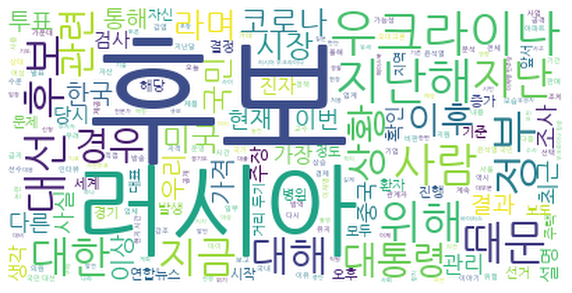

In [134]:
#text=open("text.txt").read()
from wordcloud import STOPWORDS
FONTPATH='NanumGothic.ttf'
stopwords=set(STOPWORDS)
stopwords.update(['기자','사진','뉴스'])
wordcloud=WordCloud( font_path=FONTPATH,max_font_size=100, max_words=200,stopwords = stopwords,background_color="white")
#wordcloud=WordCloud(max_font_size=100, max_words=200, background_color="white",random_state=10,stopwords=stopwords, mask=img_mask, color_func=image_colors, font_path=FONTPATH)
wc=wordcloud.generate(b1) #text 의 빈도를 보고 워드 클라우드를 생성한 것이다.
plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation="lanczos") # interpolation 은 이미지를 부드럽게 나타내는 정도이다.
plt.axis("off")
plt.show()

## TF-IDF 도출

### 각 형태소 분류기 별 문서 단어 행렬 생성( 각 뉴스의 본문 마다 형태소 분류기 별 noun을 뽑고 딕셔너리에 저장)

In [48]:
from konlpy.tag import Kkma, Hannanum, Komoran,Okt 
kkma = Kkma()
kkma_dict = dict()
k = 0
for i in df:
  words = []
  for j in i:
    words.extend(kkma.nouns(str(j)))
  kkma_dict[k] = words
  k+=1 

In [49]:
hannanum = Hannanum()
hannanum_dict = dict()
k = 0
for i in df:
  words = []
  for j in i:
    words.extend(hannanum.nouns(str(j)))
  hannanum_dict[k] = words
  k+=1 

In [50]:
komoran1 = Komoran()
komoran_dict = dict()
k = 0
for i in df:
  words = []
  for j in i:
    words.extend(komoran1.nouns(str(j)))
  komoran_dict[k] = words
  k+=1 

In [51]:
okt = Okt()
okt_dict = dict()
k = 0
for i in df:
  words = []
  for j in i:
    words.extend(okt.nouns(str(j)))
  okt_dict[k] = words
  k+=1 

#### 형태소 분류기 별 단어 사전 생성 후 DTM 행렬 생성

* 단어 사전 만들기

In [52]:
from collections import Counter 
word_counts_kkma = []
vocabulary_kkma = set()
for key,value in kkma_dict.items():
  vocabulary_kkma.update(value)
  word_count = Counter(value)
  word_counts_kkma.append(word_count) 
doc_dict_list_kkma = []

for word_count in word_counts_kkma:
    term_vec = {}
    for voca in vocabulary_kkma:
        term_vec[voca] = word_count.get(voca, 0)     
    doc_dict_list_kkma.append(term_vec)

In [53]:
word_counts_hannanum = []
vocabulary_hannanum = set()
for key,value in hannanum_dict.items():
  vocabulary_hannanum.update(value)
  word_count = Counter(value)
  word_counts_hannanum.append(word_count) 
doc_dict_list_hannanum = []

for word_count in word_counts_hannanum:
    term_vec = {}
    for voca in vocabulary_hannanum:
        term_vec[voca] = word_count.get(voca, 0)     
    doc_dict_list_hannanum.append(term_vec)

In [54]:
word_counts_komoran = []
vocabulary_komoran = set()
for key,value in komoran_dict.items():
  vocabulary_komoran.update(value)
  word_count = Counter(value)
  word_counts_komoran.append(word_count) 
doc_dict_list_komoran = []

for word_count in word_counts_komoran:
    term_vec = {}
    for voca in vocabulary_komoran:
        term_vec[voca] = word_count.get(voca, 0)     
    doc_dict_list_komoran.append(term_vec)

In [55]:
word_counts_okt = []
vocabulary_okt = set()
for key,value in okt_dict.items():
  vocabulary_okt.update(value)
  word_count = Counter(value)
  word_counts_okt.append(word_count) 
doc_dict_list_okt = []

for word_count in word_counts_okt:
    term_vec = {}
    for voca in vocabulary_okt:
        term_vec[voca] = word_count.get(voca, 0)     
    doc_dict_list_okt.append(term_vec)

* 빈도 행렬 생성

In [56]:
doc_vec_list_kkma = []
doc_vec_list_okt = []
doc_vec_list_hannanum = []
doc_vec_list_komoran = []
for word_count in word_counts_kkma:
    term_vec = []
    for voca in vocabulary_kkma:
        term_freq = word_count.get(voca, 0)
        term_vec.append(term_freq)
    doc_vec_list_kkma.append(term_vec)
doc_term_mat_kkma = np.array(doc_vec_list_kkma)   
for word_count in word_counts_okt:
    term_vec = []
    for voca in vocabulary_okt:
        term_freq = word_count.get(voca, 0)
        term_vec.append(term_freq)
    doc_vec_list_okt.append(term_vec)
doc_term_mat_okt = np.array(doc_vec_list_okt)   
for word_count in word_counts_hannanum:
    term_vec = []
    for voca in vocabulary_hannanum:
        term_freq = word_count.get(voca, 0)
        term_vec.append(term_freq)
    doc_vec_list_hannanum.append(term_vec)
doc_term_mat_hannanum = np.array(doc_vec_list_hannanum)   
for word_count in word_counts_komoran:
    term_vec = []
    for voca in vocabulary_komoran:
        term_freq = word_count.get(voca, 0)
        term_vec.append(term_freq)
    doc_vec_list_komoran.append(term_vec)
doc_term_mat_komoran = np.array(doc_vec_list_komoran)   

In [57]:
doc_term_mat_kkma.shape,doc_term_mat_okt.shape,doc_term_mat_hannanum.shape,doc_term_mat_komoran.shape

((350, 9391), (350, 6293), (350, 8971), (350, 6077))

### 사이킷런을 통한 각 형태소 분류기 별 TF-IDF 행렬 생성

In [58]:
kkma_word = list(kkma_dict.values())
kkma_words = []
for i in kkma_word:
  kkma_words.append(' '.join(i))
komoran_word = list(komoran_dict.values())
komoran_words = []
for i in komoran_word:
  komoran_words.append(' '.join(i))
okt_word = list(okt_dict.values())
okt_words = []
for i in okt_word:
  okt_words.append(' '.join(i))
hannanum_word = list(hannanum_dict.values())
hannanum_words = []
for i in hannanum_word:
  hannanum_words.append(' '.join(i))

In [59]:
from sklearn.feature_extraction.text import CountVectorizer   

vectorizer = CountVectorizer(tokenizer=str.split)       
#vectorizer = CountVectorizer() 

doc_term_mat_kkma1 = vectorizer.fit_transform(kkma_words)   # 각 형태소 분류기 별 문서별 단어 나열한 것을 학습
doc_term_mat_d_kkma1 = doc_term_mat_kkma1.toarray()                                                           
vocabulary_kkma = vectorizer.vocabulary_    
                                                                     
vectorizer1 = CountVectorizer(tokenizer=str.split)   
doc_term_mat_hannanum1 = vectorizer1.fit_transform(hannanum_words)  
doc_term_mat_d_hannanum1 = doc_term_mat_hannanum1.toarray()                                                          
vocabulary_hannanum = vectorizer1.vocabulary_

vectorizer2 = CountVectorizer(tokenizer=str.split)   
doc_term_mat_komoran1 = vectorizer2.fit_transform(komoran_words)  
doc_term_mat_d_komoran1 = doc_term_mat_komoran1.toarray()                                                          
vocabulary_komoran = vectorizer2.vocabulary_

vectorizer3 = CountVectorizer(tokenizer=str.split)   
doc_term_mat_okt1 = vectorizer3.fit_transform(okt_words)  
doc_term_mat_d_okt1 = doc_term_mat_okt1.toarray()                                                          
vocabulary_okt = vectorizer3.vocabulary_


* 각 분류기 별 단어 사전을 통해 TF-IDF 행렬 생성 후 단어 별 TF-IDF 최대 값 확인

(350, 6293)
(350, 9391)
(350, 9000)
(350, 6058)


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


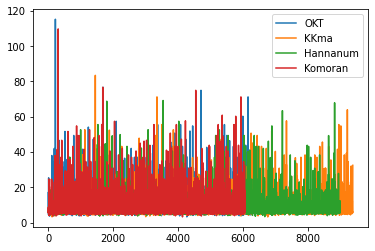

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(okt_words)
doc_term_mat_d1 = doc_term_mat.toarray()


print(doc_term_mat_d1.shape) 

plt.plot(doc_term_mat_d1.max(axis= 0),label = 'OKT')
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(kkma_words)
doc_term_mat_d2 = doc_term_mat.toarray()
print(doc_term_mat_d2.shape)
plt.plot(doc_term_mat_d2.max(axis= 0),label = 'KKma')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(hannanum_words)
doc_term_mat_d3 = doc_term_mat.toarray()
print(doc_term_mat_d3.shape)
plt.plot(doc_term_mat_d3.max(axis= 0),label = 'Hannanum')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(komoran_words)
doc_term_mat_d4 = doc_term_mat.toarray()
print(doc_term_mat_d4.shape)
plt.plot(doc_term_mat_d4.max(axis= 0),label = 'Komoran')
plt.legend()

* 각 문서 별 TF-IDF 편차 확인

(350, 6293)
(350, 9391)
(350, 9000)
(350, 6058)


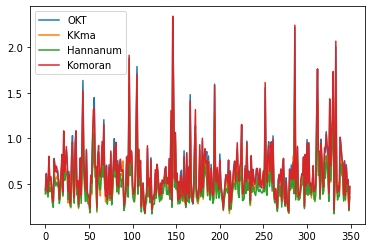

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(okt_words)
doc_term_mat_d1 = doc_term_mat.toarray()


print(doc_term_mat_d1.shape) 

plt.plot(doc_term_mat_d1.std(axis= 1),label = 'OKT')
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(kkma_words)
doc_term_mat_d2 = doc_term_mat.toarray()
print(doc_term_mat_d2.shape)
plt.plot(doc_term_mat_d2.std(axis= 1),label = 'KKma')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(hannanum_words)
doc_term_mat_d3 = doc_term_mat.toarray()
print(doc_term_mat_d3.shape)
plt.plot(doc_term_mat_d3.std(axis= 1),label = 'Hannanum')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(komoran_words)
doc_term_mat_d4 = doc_term_mat.toarray()
print(doc_term_mat_d4.shape)
plt.plot(doc_term_mat_d4.std(axis= 1),label = 'Komoran')
plt.legend()

(350, 6293)
(350, 9391)
(350, 9000)
(350, 6058)


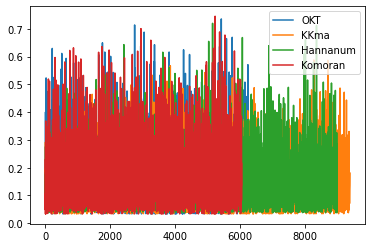

In [62]:
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(okt_words)
doc_term_mat_d5 = doc_term_mat.toarray()


print(doc_term_mat_d5.shape) 

plt.plot(doc_term_mat_d5.max(axis= 0),label = 'OKT')
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(kkma_words)
doc_term_mat_d6 = doc_term_mat.toarray()
print(doc_term_mat_d6.shape)
plt.plot(doc_term_mat_d6.max(axis= 0),label = 'KKma')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(hannanum_words)
doc_term_mat_d7 = doc_term_mat.toarray()
print(doc_term_mat_d7.shape)
plt.plot(doc_term_mat_d7.max(axis= 0),label = 'Hannanum')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(komoran_words)
doc_term_mat_d8 = doc_term_mat.toarray()
print(doc_term_mat_d8.shape)
plt.plot(doc_term_mat_d8.max(axis= 0),label = 'Komoran')
plt.legend()

### 사후 불용어 처리를 위해 저빈도, 고빈도 어휘 추출

In [63]:
df_kkma = pd.DataFrame(doc_term_mat_d_kkma1)
df_hannanum = pd.DataFrame(doc_term_mat_d_hannanum1)
df_okt =  pd.DataFrame(doc_term_mat_d_okt1)
df_komoran =  pd.DataFrame(doc_term_mat_d_komoran1)

* 각 단어의 출현 빈도를 살펴본 Series

In [64]:
values_df = pd.Series(doc_term_mat_d_kkma1.mean(axis = 0)).reset_index()
values_df = values_df.rename(columns = {0 : 'values'})
values_df.query('values <= 0.0029')

,index,values
0,0,0.002857
1,1,0.002857
2,2,0.002857
3,3,0.002857
4,4,0.002857
...,...,...
9383,9383,0.002857
9384,9384,0.002857
9386,9386,0.002857
9387,9387,0.002857


* 각 문서별 단어가 얼마나 나왔는지 확인

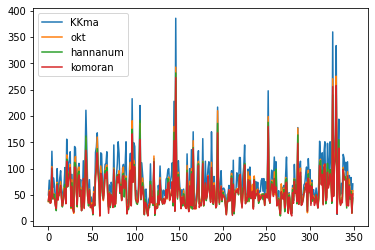

In [65]:
df_kkma.applymap(lambda x : x != 0).sum(axis = 1).plot(label = 'KKma')
df_okt.applymap(lambda x : x != 0).sum(axis = 1).plot(label = 'okt')
df_hannanum.applymap(lambda x : x != 0).sum(axis = 1).plot(label = 'hannanum')
df_komoran.applymap(lambda x : x != 0).sum(axis = 1).plot(label = 'komoran')
plt.legend() # 각 단어의 출현 빈도를 확인 한 것이다.

In [78]:
print('형태소 분류기 별 단어 빈도의 추이')
print(df_kkma.applymap(lambda x : x != 0).sum(axis = 1))
print(df_okt.applymap(lambda x : x != 0).sum(axis = 1))
print(df_komoran.applymap(lambda x : x != 0).sum(axis = 1))
print(df_hannanum.applymap(lambda x : x != 0).sum(axis = 1))

형태소 분류기 별 단어 빈도의 추이
0       50
1       78
2       49
3       50
4      133
      ... 
345     87
346     69
347     83
348     21
349     71
Length: 350, dtype: int64
0       37
1       59
2       39
3       38
4      104
      ... 
345     80
346     53
347     58
348     15
349     58
Length: 350, dtype: int64
0       39
1       56
2       34
3       35
4      101
      ... 
345     67
346     49
347     51
348     15
349     52
Length: 350, dtype: int64
0      38
1      53
2      35
3      37
4      99
       ..
345    69
346    42
347    57
348    16
349    44
Length: 350, dtype: int64


* 각 형태소 분류기 별 전체 문서에서 단어의 횟수가 1 이거나 345회 이상인 것 출력 후 제거

In [67]:
kkma_index = []
for i in range(df_kkma.columns.shape[0]):
  if df_kkma.iloc[:,i].apply(lambda x : x != 0).sum() >=345:
    kkma_index.append(i)
  elif df_kkma.iloc[:,i].apply(lambda x : x != 0).sum() == 1:
    kkma_index.append(i)

okt_index = []
for i in range(df_okt.columns.shape[0]):
  if df_okt.iloc[:,i].apply(lambda x : x != 0).sum() >=345:
    okt_index.append(i)
  elif df_okt.iloc[:,i].apply(lambda x : x != 0).sum() == 1:
    okt_index.append(i)

komoran_index = []
for i in range(df_komoran.columns.shape[0]):
  if df_komoran.iloc[:,i].apply(lambda x : x != 0).sum() >=345:
    komoran_index.append(i)
  elif df_komoran.iloc[:,i].apply(lambda x : x != 0).sum() == 1:
    komoran_index.append(i)

hannanum_index = []
for i in range(df_hannanum.columns.shape[0]):
  if df_hannanum.iloc[:,i].apply(lambda x : x != 0).sum() >=345:
    hannanum_index.append(i)
  elif df_hannanum.iloc[:,i].apply(lambda x : x != 0).sum() == 1:
   hannanum_index.append(i)

* 단어 사전 배열에서 각 인덱스 넘버를 제거 

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(okt_words)
real_word_okt = np.delete(vectorizer.get_feature_names(),okt_index)

vectorizer1 = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer1.fit_transform(kkma_words)
real_word_kkma = np.delete(vectorizer1.get_feature_names(),kkma_index)

vectorizer2 = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer2.fit_transform(komoran_words)
real_word_komoran = np.delete(vectorizer2.get_feature_names(),komoran_index)

vectorizer3 = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer3.fit_transform(hannanum_words)
real_word_hannanum = np.delete(vectorizer3.get_feature_names(),hannanum_index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

#### 고빈도 어휘와 저빈도 어휘를 빼고 TF-IDF 행렬 생성

In [69]:
new_word_okt = []
for i in okt_words:
  new = i.split(' ')
  for j in new:
    if j not in real_word_okt:
      new.remove(j)
  new_word_okt.append(new)

new_word_kkma = []
for i in kkma_words:
  new = i.split(' ')
  for j in new:
    if j not in real_word_kkma:
      new.remove(j)
  new_word_kkma.append(new)

new_word_hannanum = []
for i in kkma_words:
  new = i.split(' ')
  for j in new:
    if j not in real_word_hannanum:
      new.remove(j)
  new_word_hannanum.append(new)
new_word_komoran = []
for i in kkma_words:
  new = i.split(' ')
  for j in new:
    if j not in real_word_komoran:
      new.remove(j)
  new_word_komoran.append(new)

In [70]:
new_okt = []
for i in new_word_okt:
  new_okt.append(' '.join(i))


new_kkma = []
for i in new_word_kkma:
  new_kkma.append(' '.join(i))


new_komoran = []
for i in new_word_komoran:
  new_komoran.append(' '.join(i))

new_hannanum = []
for i in new_word_hannanum:
  new_hannanum.append(' '.join(i))

### 불용어 리스트 추출 후 분포 확인

* 각 단어 별 각 문서에 대해 TF-IDF 값 확인

(350, 3539)
(350, 4829)
(350, 4987)
(350, 4997)


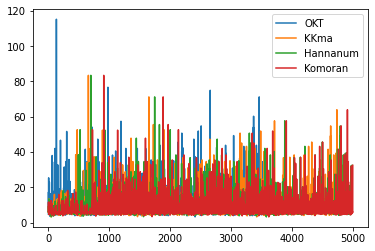

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_okt)
doc_term_mat_d1 = doc_term_mat.toarray()


print(doc_term_mat_d1.shape) 

plt.plot(doc_term_mat_d1.max(axis= 0),label = 'OKT')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_kkma)
doc_term_mat_d2 = doc_term_mat.toarray()
print(doc_term_mat_d2.shape)
plt.plot(doc_term_mat_d2.max(axis= 0),label = 'KKma')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_hannanum)
doc_term_mat_d3 = doc_term_mat.toarray()
print(doc_term_mat_d3.shape)
plt.plot(doc_term_mat_d3.max(axis= 0),label = 'Hannanum')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_komoran)
doc_term_mat_d4 = doc_term_mat.toarray()
print(doc_term_mat_d4.shape)
plt.plot(doc_term_mat_d4.max(axis= 0),label = 'Komoran')
plt.legend()

* 각 문서 별 TF-IDF 값의 평균 확인

(350, 3539)
(350, 4829)
(350, 4987)
(350, 4997)


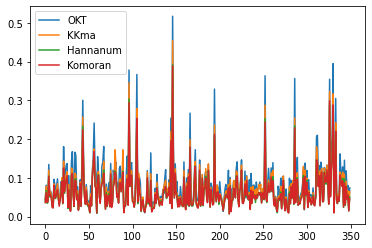

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_okt)
doc_term_mat_d1 = doc_term_mat.toarray()


print(doc_term_mat_d1.shape) 

plt.plot(doc_term_mat_d1.mean(axis= 1),label = 'OKT')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_kkma)
doc_term_mat_d2 = doc_term_mat.toarray()
print(doc_term_mat_d2.shape)
plt.plot(doc_term_mat_d2.mean(axis= 1),label = 'KKma')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_hannanum)
doc_term_mat_d3 = doc_term_mat.toarray()
print(doc_term_mat_d3.shape)
plt.plot(doc_term_mat_d3.mean(axis= 1),label = 'Hannanum')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_komoran)
doc_term_mat_d4 = doc_term_mat.toarray()
print(doc_term_mat_d4.shape)
plt.plot(doc_term_mat_d4.mean(axis= 1),label = 'Komoran')
plt.legend()

* 각 문서 별 TF-IDF 값의 표준 편차 확인

(350, 3539)
(350, 4829)
(350, 4987)
(350, 4997)


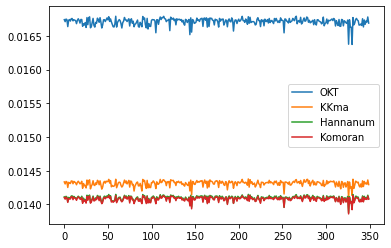

In [73]:
new_okt = []
for i in new_word_okt:
  new_okt.append(' '.join(i))
new_okt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_okt)
doc_term_mat_d1 = doc_term_mat.toarray()


print(doc_term_mat_d1.shape) 

plt.plot(doc_term_mat_d1.std(axis= 1),label = 'OKT')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_kkma)
doc_term_mat_d2 = doc_term_mat.toarray()
print(doc_term_mat_d2.shape)
plt.plot(doc_term_mat_d2.std(axis= 1),label = 'KKma')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_hannanum)
doc_term_mat_d3 = doc_term_mat.toarray()
print(doc_term_mat_d3.shape)
plt.plot(doc_term_mat_d3.std(axis= 1),label = 'Hannanum')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_komoran)
doc_term_mat_d4 = doc_term_mat.toarray()
print(doc_term_mat_d4.shape)
plt.plot(doc_term_mat_d4.std(axis= 1),label = 'Komoran')
plt.legend()

* 각 문서 별 TF-IDF 값 평균 확인

(350, 3539)
(350, 4829)
(350, 4987)
(350, 4997)


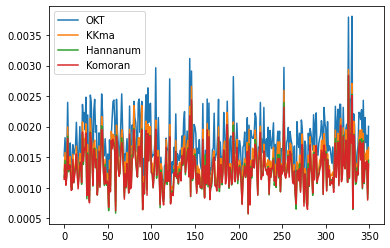

In [74]:
new_okt = []
for i in new_word_okt:
  new_okt.append(' '.join(i))
new_okt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_okt)
doc_term_mat_d1 = doc_term_mat.toarray()


print(doc_term_mat_d1.shape) 

plt.plot(doc_term_mat_d1.mean(axis= 1),label = 'OKT')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_kkma)
doc_term_mat_d2 = doc_term_mat.toarray()
print(doc_term_mat_d2.shape)
plt.plot(doc_term_mat_d2.mean(axis= 1),label = 'KKma')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_hannanum)
doc_term_mat_d3 = doc_term_mat.toarray()
print(doc_term_mat_d3.shape)
plt.plot(doc_term_mat_d3.mean(axis= 1),label = 'Hannanum')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_komoran)
doc_term_mat_d4 = doc_term_mat.toarray()
print(doc_term_mat_d4.shape)
plt.plot(doc_term_mat_d4.mean(axis= 1),label = 'Komoran')
plt.legend()

* 각 단어 별 TF-IDF 최댓값 확인

(350, 3539)
(350, 4829)
(350, 4987)
(350, 4997)


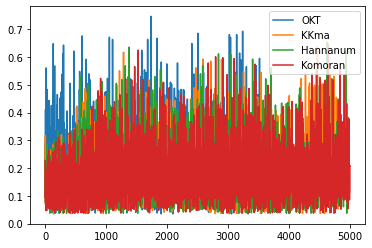

In [75]:
new_okt = []
for i in new_word_okt:
  new_okt.append(' '.join(i))
new_okt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_okt)
doc_term_mat_d1 = doc_term_mat.toarray()


print(doc_term_mat_d1.shape) 

plt.plot(doc_term_mat_d1.max(axis= 0),label = 'OKT')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_kkma)
doc_term_mat_d2 = doc_term_mat.toarray()
print(doc_term_mat_d2.shape)
plt.plot(doc_term_mat_d2.max(axis= 0),label = 'KKma')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_hannanum)
doc_term_mat_d3 = doc_term_mat.toarray()
print(doc_term_mat_d3.shape)
plt.plot(doc_term_mat_d3.max(axis= 0),label = 'Hannanum')

vectorizer = TfidfVectorizer(tokenizer=str.split,  norm = 'l2')             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(new_komoran)
doc_term_mat_d4 = doc_term_mat.toarray()
print(doc_term_mat_d4.shape)
plt.plot(doc_term_mat_d4.max(axis= 0),label = 'Komoran')
plt.legend()